# Sample Characteristics

In [1]:
suppressWarnings(suppressMessages(library(tidyverse)))
library(tableone)

# Load the data
load(file = "~/Documents/holding_gwu_dissertation/data/study2_data.RData")
paste0("Initial sample: ", nrow(vcf_data))

[1] "Initial sample: 371"

## Demographics

In [2]:
temp <- vcf_data %>%
              dplyr::select(age_cat, gender, race,
                            marital_status, employment2, education2, income,
                            political_view2, political_affiliation,
                            group) 

CreateTableOne(data = temp)

                                     
                                      Overall    
  n                                   371        
  age_cat (%)                                    
     30-49                            257 (69.3) 
     greater than 50                   38 (10.2) 
     less than 30                      76 (20.5) 
  gender = Female (%)                 268 (72.2) 
  race (%)                                       
     American Indian/Alaska Native      2 ( 0.5) 
     Asian                              7 ( 1.9) 
     Black or African American         41 (11.1) 
     Native Hawaiian/Pacific Islander   2 ( 0.5) 
     Other (please describe):           9 ( 2.4) 
     Prefer not to answer               4 ( 1.1) 
     White                            306 (82.5) 
  marital_status = Married (%)        153 (41.2) 
  employment2 = Working (%)           266 (71.7) 
  education2 = some college (%)       294 (79.2) 
  income (%)                                     
     $100,00

In [3]:
CreateTableOne(strat = c("group"), data = temp)

                                     Stratified by group
                                      Treatment   Control      p      test
  n                                   206         165                     
  age_cat (%)                                                   0.454     
     30-49                            138 (67.0)  119 ( 72.1)             
     greater than 50                   21 (10.2)   17 ( 10.3)             
     less than 30                      47 (22.8)   29 ( 17.6)             
  gender = Female (%)                 148 (71.8)  120 ( 72.7)   0.943     
  race (%)                                                      0.512     
     American Indian/Alaska Native      2 ( 1.0)    0 (  0.0)             
     Asian                              5 ( 2.4)    2 (  1.2)             
     Black or African American         22 (10.7)   19 ( 11.5)             
     Native Hawaiian/Pacific Islander   2 ( 1.0)    0 (  0.0)             
     Other (please describe):           6 (

In [4]:
vcf_data$income3 <- NA
vcf_data$income3[vcf_data$income == "Less than $15,000"] <- "Less than $34,999"
vcf_data$income3[vcf_data$income == "$15,000 - $19,999"] <- "Less than $34,999"
vcf_data$income3[vcf_data$income == "$20,000 - $24,999"] <- "Less than $34,999"
vcf_data$income3[vcf_data$income == "$25,000 - $34,999"] <- "Less than $34,999"
vcf_data$income3[vcf_data$income == "$35,000 - $49,999"] <- "$35,000 - $74,999"
vcf_data$income3[vcf_data$income == "$50,000 - $74,999"] <- "$35,000 - $74,999"
vcf_data$income3[vcf_data$income == "$75,000 - $99,999"] <- "$75,000 and above"
vcf_data$income3[vcf_data$income == "$100,000 and above"] <- "$75,000 and above"
vcf_data$income3 <- factor(vcf_data$income3, 
                           levels = c("Less than $34,999", "$35,000 - $74,999", 
                                      "$75,000 and above"))

temp <- vcf_data %>%
              dplyr::select(age, gender, white,
                            marital_status, employment2, education2, income3,
                            political_view2, political_affiliation,
                            group) 

CreateTableOne(data = temp)

                               
                                Overall      
  n                               371        
  age (mean (SD))               37.05 (9.57) 
  gender = Female (%)             268 (72.2) 
  white = white (%)               306 (82.5) 
  marital_status = Married (%)    153 (41.2) 
  employment2 = Working (%)       266 (71.7) 
  education2 = some college (%)   294 (79.2) 
  income3 (%)                                
     Less than $34,999            144 (39.2) 
     $35,000 - $74,999            152 (41.4) 
     $75,000 and above             71 (19.3) 
  political_view2 (%)                        
     Moderate                     114 (30.7) 
     Liberal                       78 (21.0) 
     Conservative                 168 (45.3) 
     No answer                     11 ( 3.0) 
  political_affiliation (%)                  
     Democrat                      73 (19.7) 
     Independent                  133 (35.8) 
     Other                         18 ( 4.9) 
  

In [5]:
CreateTableOne(strat = c("group"), data = temp)

                               Stratified by group
                                Treatment     Control        p      test
  n                               206           165                     
  age (mean (SD))               36.97 (9.97)  37.16 (9.07)    0.844     
  gender = Female (%)             148 (71.8)    120 ( 72.7)   0.943     
  white = white (%)               166 (80.6)    140 ( 84.8)   0.349     
  marital_status = Married (%)     85 (41.3)     68 ( 41.2)   1.000     
  employment2 = Working (%)       149 (72.3)    117 ( 70.9)   0.852     
  education2 = some college (%)   158 (76.7)    136 ( 82.4)   0.222     
  income3 (%)                                                 0.782     
     Less than $34,999             76 (37.6)     68 ( 41.2)             
     $35,000 - $74,999             86 (42.6)     66 ( 40.0)             
     $75,000 and above             40 (19.8)     31 ( 18.8)             
  political_view2 (%)                                         0.656     


## Baseline Trust Views

In [6]:
temp <- vcf_data %>%
              dplyr::select(fed_gov_trust, local_gov_trust, 
                            cdc_trust, fda_trust, doctor_trust,
                            group) %>%
              mutate(fed_gov_trust = fed_gov_trust %>% as.character(),
                     local_gov_trust = local_gov_trust %>% as.character(),
                     cdc_trust = cdc_trust %>% as.character(),
                     fda_trust = fda_trust %>% as.character(),
                     doctor_trust = doctor_trust %>% as.character())

temp$fed_gov_trust[temp$fed_gov_trust == "0"] <- "Not at all"
temp$local_gov_trust[temp$local_gov_trust == "0"] <- "Not at all"
temp$cdc_trust[temp$cdc_trust == "0"] <- "Not at all"
temp$fda_trust[temp$fda_trust == "0"] <- "Not at all"
temp$doctor_trust[temp$doctor_trust == "0"] <- "Not at all"

temp$fed_gov_trust[temp$fed_gov_trust == "1"] <- "A little"
temp$local_gov_trust[temp$local_gov_trust == "1"] <- "A little"
temp$cdc_trust[temp$cdc_trust == "1"] <- "A little"
temp$fda_trust[temp$fda_trust == "1"] <- "A little"
temp$doctor_trust[temp$doctor_trust == "1"] <- "A little"

temp$fed_gov_trust[temp$fed_gov_trust == "2"] <- "A great deal"
temp$local_gov_trust[temp$local_gov_trust == "2"] <- "A great deal"
temp$cdc_trust[temp$cdc_trust == "2"] <- "A great deal"
temp$fda_trust[temp$fda_trust == "2"] <- "A great deal"
temp$doctor_trust[temp$doctor_trust == "2"] <- "A great deal"

CreateTableOne(data = temp)

                     
                      Overall    
  n                   371        
  fed_gov_trust (%)              
     A great deal      30 ( 8.1) 
     A little         137 (36.9) 
     Not at all       204 (55.0) 
  local_gov_trust (%)            
     A great deal      33 ( 8.9) 
     A little         153 (41.2) 
     Not at all       185 (49.9) 
  cdc_trust (%)                  
     A great deal     100 (27.0) 
     A little         137 (36.9) 
     Not at all       134 (36.1) 
  fda_trust (%)                  
     A great deal      61 (16.4) 
     A little         162 (43.7) 
     Not at all       148 (39.9) 
  doctor_trust (%)               
     A great deal     206 (57.7) 
     A little         125 (35.0) 
     Not at all        26 ( 7.3) 
  group = Control (%) 165 (44.5) 

In [7]:
CreateTableOne(strat = c("group"), data = temp)

                     Stratified by group
                      Treatment   Control      p      test
  n                   206         165                     
  fed_gov_trust (%)                             0.525     
     A great deal      19 ( 9.2)   11 (  6.7)             
     A little          72 (35.0)   65 ( 39.4)             
     Not at all       115 (55.8)   89 ( 53.9)             
  local_gov_trust (%)                           0.205     
     A great deal      22 (10.7)   11 (  6.7)             
     A little          78 (37.9)   75 ( 45.5)             
     Not at all       106 (51.5)   79 ( 47.9)             
  cdc_trust (%)                                 0.550     
     A great deal      60 (29.1)   40 ( 24.2)             
     A little          75 (36.4)   62 ( 37.6)             
     Not at all        71 (34.5)   63 ( 38.2)             
  fda_trust (%)                                 0.012     
     A great deal      44 (21.4)   17 ( 10.3)             
     A little  

In [8]:
# Verify p-value reported by CreateTableOne
res <- chisq.test(table(vcf_data$fed_gov_trust, vcf_data$group))
res
round(res$p.value, 3)


	Pearson's Chi-squared test

data:  table(vcf_data$fed_gov_trust, vcf_data$group)
X-squared = 1.2895, df = 2, p-value = 0.5248


[1] 0.525

In [9]:
temp <- vcf_data %>%
              dplyr::select(fed_gov_trust, local_gov_trust, 
                            cdc_trust, fda_trust, doctor_trust,
                            group) %>%
              mutate(fed_gov_trust = fed_gov_trust %>% as.character(),
                     local_gov_trust = local_gov_trust %>% as.character(),
                     cdc_trust = cdc_trust %>% as.character(),
                     fda_trust = fda_trust %>% as.character(),
                     doctor_trust = doctor_trust %>% as.character())

temp$fed_gov_trust[temp$fed_gov_trust == "0"] <- "Not at all"
temp$local_gov_trust[temp$local_gov_trust == "0"] <- "Not at all"
temp$cdc_trust[temp$cdc_trust == "0"] <- "Not at all"
temp$fda_trust[temp$fda_trust == "0"] <- "Not at all"
temp$doctor_trust[temp$doctor_trust == "0"] <- "Not at all"

temp$fed_gov_trust[temp$fed_gov_trust == "1"] <- "A little/A great deal"
temp$local_gov_trust[temp$local_gov_trust == "1"] <- "A little/A great deal"
temp$cdc_trust[temp$cdc_trust == "1"] <- "A little/A great deal"
temp$fda_trust[temp$fda_trust == "1"] <- "A little/A great deal"
temp$doctor_trust[temp$doctor_trust == "1"] <- "A little/A great deal"

temp$fed_gov_trust[temp$fed_gov_trust == "2"] <- "A little/A great deal"
temp$local_gov_trust[temp$local_gov_trust == "2"] <- "A little/A great deal"
temp$cdc_trust[temp$cdc_trust == "2"] <- "A little/A great deal"
temp$fda_trust[temp$fda_trust == "2"] <- "A little/A great deal"
temp$doctor_trust[temp$doctor_trust == "2"] <- "A little/A great deal"

CreateTableOne(data = temp)

                                  
                                   Overall    
  n                                371        
  fed_gov_trust = Not at all (%)   204 (55.0) 
  local_gov_trust = Not at all (%) 185 (49.9) 
  cdc_trust = Not at all (%)       134 (36.1) 
  fda_trust = Not at all (%)       148 (39.9) 
  doctor_trust = Not at all (%)     26 ( 7.3) 
  group = Control (%)              165 (44.5) 

In [10]:
CreateTableOne(strat = c("group"), data = temp)

                                  Stratified by group
                                   Treatment   Control      p      test
  n                                206         165                     
  fed_gov_trust = Not at all (%)   115 (55.8)   89 ( 53.9)   0.797     
  local_gov_trust = Not at all (%) 106 (51.5)   79 ( 47.9)   0.562     
  cdc_trust = Not at all (%)        71 (34.5)   63 ( 38.2)   0.528     
  fda_trust = Not at all (%)        81 (39.3)   67 ( 40.6)   0.885     
  doctor_trust = Not at all (%)     16 ( 8.2)   10 (  6.2)   0.616     
  group = Control (%)                0 ( 0.0)  165 (100.0)  <0.001     

In [11]:
min(vcf_data$age)
max(vcf_data$age)

[1] 18

[1] 74

## Baseline Outcomes

In [12]:
temp <- vcf_data %>%
              dplyr::select(base_intention_n, base_encourage_n,
                            base_sp_confidence, base_sp_complacency,
                            group) 

CreateTableOne(data = temp)

                                 
                                  Overall     
  n                                371        
  base_intention_n (mean (SD))    1.75 (1.37) 
  base_encourage_n (mean (SD))    1.95 (1.52) 
  base_sp_confidence (mean (SD))  1.94 (0.96) 
  base_sp_complacency (mean (SD)) 2.13 (1.11) 
  group = Control (%)              165 (44.5) 

In [13]:
CreateTableOne(strat = c("group"), data = temp)

                                 Stratified by group
                                  Treatment   Control       p      test
  n                                206         165                     
  base_intention_n (mean (SD))    1.78 (1.43) 1.72 (1.29)    0.674     
  base_encourage_n (mean (SD))    2.01 (1.52) 1.88 (1.51)    0.431     
  base_sp_confidence (mean (SD))  2.02 (0.97) 1.84 (0.94)    0.082     
  base_sp_complacency (mean (SD)) 2.17 (1.08) 2.06 (1.14)    0.337     
  group = Control (%)                0 (0.0)   165 (100.0)  <0.001     

## Balance Test with Dichtomized Variables

In [14]:
temp <- vcf_data %>%
              dplyr::select(age, gender, white, afr_am, other, 
                            marital_status, employment2, education2, income2,
                            conservative, republican,
                            fed_gov_trust_di, local_gov_trust_di, 
                            cdc_trust_di, fda_trust_di, doctor_trust_di,
                            group)

temp$republican <- factor(temp$republican, levels = c("nonrep", "rep"))

CreateTableOne(data = temp)

                                   
                                    Overall      
  n                                   371        
  age (mean (SD))                   37.05 (9.57) 
  gender = Female (%)                 268 (72.2) 
  white = white (%)                   306 (82.5) 
  afr_am = afr_am (%)                  41 (11.1) 
  other = other (%)                    24 ( 6.5) 
  marital_status = Married (%)        153 (41.2) 
  employment2 = Working (%)           266 (71.7) 
  education2 = some college (%)       294 (79.2) 
  income2 = less than $50,000 (%)     214 (57.7) 
  conservative = conserv (%)          168 (45.3) 
  republican = rep (%)                147 (39.6) 
  fed_gov_trust_di = distrust (%)     204 (55.0) 
  local_gov_trust_di = distrust (%)   185 (49.9) 
  cdc_trust_di = distrust (%)         134 (36.1) 
  fda_trust_di = distrust (%)         148 (39.9) 
  doctor_trust_di = distrust (%)       26 ( 7.3) 
  group = Control (%)                 165 (44.5) 

In [15]:
temp <- vcf_data %>%
              dplyr::select(age, gender, white, afr_am, other, 
                            marital_status, employment2, education2, income2, 
                            conservative, republican,
                            fed_gov_trust_di, local_gov_trust_di, 
                            cdc_trust_di, fda_trust_di, doctor_trust_di,
                            group)
temp$republican <- factor(temp$republican, levels = c("nonrep", "rep"))

CreateTableOne(strat = c("group"), data = temp)

                                   Stratified by group
                                    Treatment     Control        p      test
  n                                   206           165                     
  age (mean (SD))                   36.97 (9.97)  37.16 (9.07)    0.844     
  gender = Female (%)                 148 (71.8)    120 ( 72.7)   0.943     
  white = white (%)                   166 (80.6)    140 ( 84.8)   0.349     
  afr_am = afr_am (%)                  22 (10.7)     19 ( 11.5)   0.930     
  other = other (%)                    18 ( 8.7)      6 (  3.6)   0.076     
  marital_status = Married (%)         85 (41.3)     68 ( 41.2)   1.000     
  employment2 = Working (%)           149 (72.3)    117 ( 70.9)   0.852     
  education2 = some college (%)       158 (76.7)    136 ( 82.4)   0.222     
  income2 = less than $50,000 (%)     122 (59.2)     92 ( 55.8)   0.572     
  conservative = conserv (%)           93 (45.1)     75 ( 45.5)   1.000     
  republican = rep (%

## Verify p-value reported by CreateTableOne

In [16]:
# Two sample t-test for continous variables
trt <- temp$age[temp$group == "Treatment"]
ctrl <- temp$age[temp$group == "Control"]
res <- t.test(trt, ctrl, var.equal = TRUE)
res
round(res$p.value, 3)

# Chi-squared test for categorical variables
res <- chisq.test(table(vcf_data$gender, vcf_data$group))
res
round(res$p.value, 3)

# Chi-squared test for categorical variables
res <- chisq.test(table(vcf_data$white, vcf_data$group))
res
round(res$p.value, 3)


	Two Sample t-test

data:  trt and ctrl
t = -0.19743, df = 369, p-value = 0.8436
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.165850  1.770616
sample estimates:
mean of x mean of y 
 36.96602  37.16364 


[1] 0.844


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$gender, vcf_data$group)
X-squared = 0.005184, df = 1, p-value = 0.9426


[1] 0.943


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$white, vcf_data$group)
X-squared = 0.87746, df = 1, p-value = 0.3489


[1] 0.349

# Overlap

In [17]:
temp <- vcf_data %>% group_by(republican, conservative) %>% 
        count() %>% spread(key = "conservative", value = "n")
sum(temp[,c(2,3)])
temp
chisq.test(temp[,c(2,3)])

[1] 371

republican nonconserv conserv
1 rep         13        134    
2 nonrep     190         34


	Pearson's Chi-squared test with Yates' continuity correction

data:  temp[, c(2, 3)]
X-squared = 203.72, df = 1, p-value < 2.2e-16


In [18]:
temp <- vcf_data %>% group_by(republican, gov_trust_cat) %>% 
        count() %>% spread(key = "gov_trust_cat", value = "n")

temp
chisq.test(temp[,c(2,3)])
83/(83+64)
83+64

republican distrusting trusting
1 rep        83           64     
2 nonrep     94          130


	Pearson's Chi-squared test with Yates' continuity correction

data:  temp[, c(2, 3)]
X-squared = 6.9084, df = 1, p-value = 0.008579


[1] 0.5646259

[1] 147

In [19]:
temp <- vcf_data %>% group_by(republican, phi_trust_cat) %>% 
        count() %>% spread(key = "phi_trust_cat", value = "n")

temp
chisq.test(temp[,c(2,3)])

republican distrusting trusting
1 rep        63           84     
2 nonrep     56          168


	Pearson's Chi-squared test with Yates' continuity correction

data:  temp[, c(2, 3)]
X-squared = 12.184, df = 1, p-value = 0.0004821


In [20]:
temp <- vcf_data %>% group_by(conservative, gov_trust_cat) %>% 
        count() %>% spread(key = "gov_trust_cat", value = "n")

temp
chisq.test(temp[,c(2,3)])

conservative distrusting trusting
1 nonconserv   86          117     
2 conserv      91           77


	Pearson's Chi-squared test with Yates' continuity correction

data:  temp[, c(2, 3)]
X-squared = 4.6703, df = 1, p-value = 0.03069


In [21]:
temp <- vcf_data %>% group_by(conservative, phi_trust_cat) %>% 
        count() %>% spread(key = "phi_trust_cat", value = "n")

temp
chisq.test(temp[,c(2,3)])

conservative distrusting trusting
1 nonconserv   52          151     
2 conserv      67          101


	Pearson's Chi-squared test with Yates' continuity correction

data:  temp[, c(2, 3)]
X-squared = 7.9436, df = 1, p-value = 0.004826


In [22]:
temp <- vcf_data %>% group_by(gov_trust_cat, phi_trust_cat) %>% 
        count() %>% spread(key = "phi_trust_cat", value = "n")

temp
chisq.test(temp[,c(2,3)])

gov_trust_cat distrusting trusting
1 distrusting   100          77     
2 trusting       19         175


	Pearson's Chi-squared test with Yates' continuity correction

data:  temp[, c(2, 3)]
X-squared = 90.53, df = 1, p-value < 2.2e-16


# Age distributions across subgroups and experimental groups

## Republican vs. Non-Republican

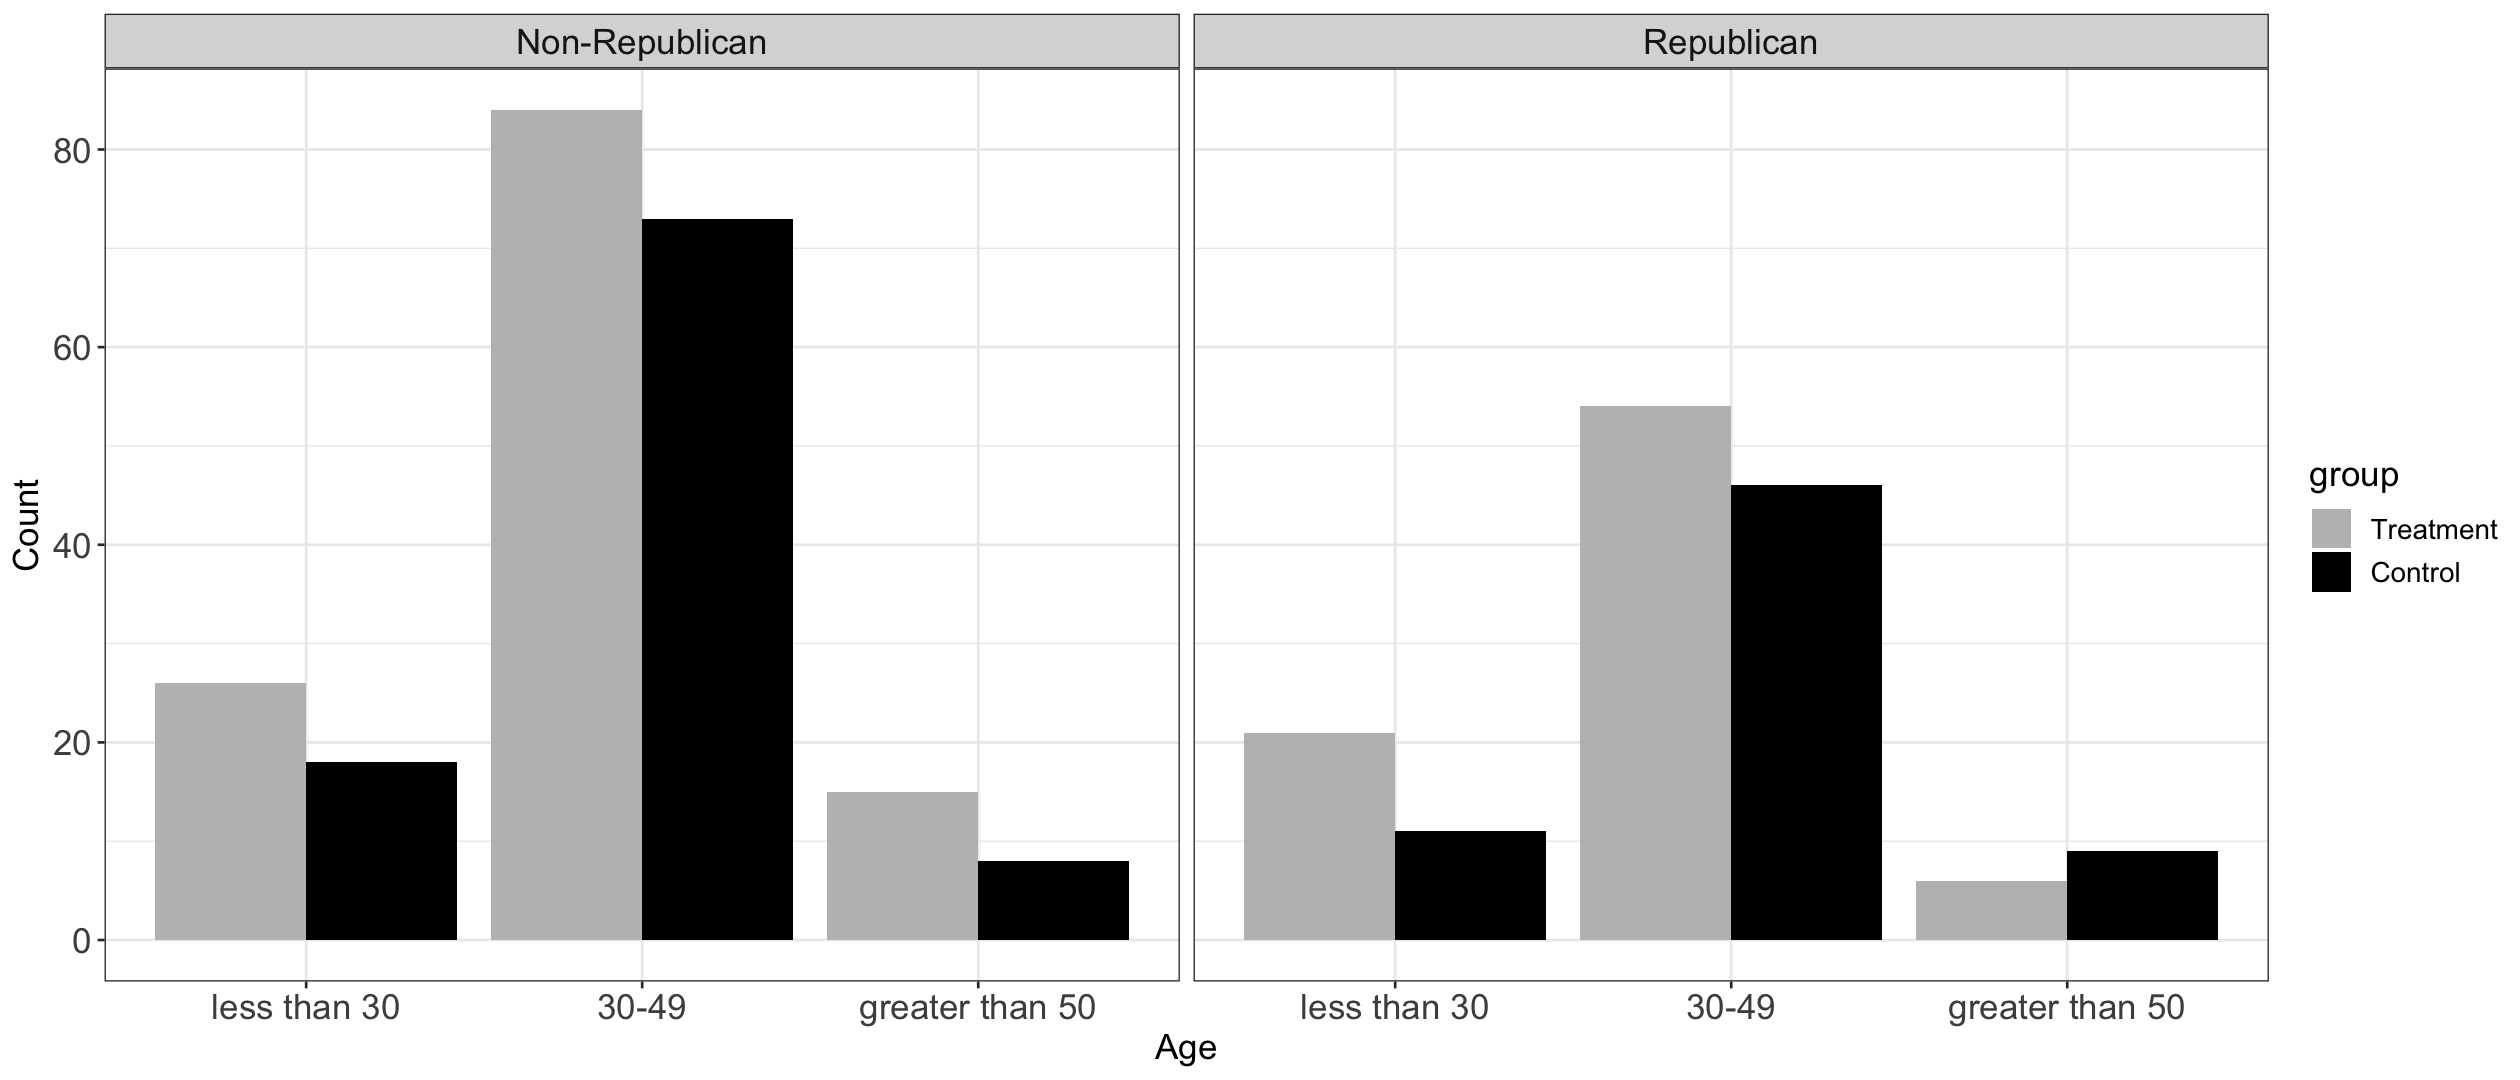

In [23]:
check_age = vcf_data %>% group_by(group, republican, age_cat) %>% tally() 
check_age$age_cat <- factor(check_age$age_cat, levels = c("less than 30", "30-49", "greater than 50"))
check_age$republican <- check_age$republican %>% as.character()
check_age$republican[check_age$republican == "rep"] <- "Republican"
check_age$republican[check_age$republican == "nonrep"] <- "Non-Republican"

options(repr.plot.width = 14, repr.plot.height = 6, repr.plot.res = 180)
check_age %>%
  ggplot(aes(x = age_cat, y=n, fill=group)) +
  geom_bar(stat ='identity', position = position_dodge()) +
  theme_bw() + scale_fill_manual(values = c('gray', 'black')) +
  labs(x = "Age" , y= "Count") + 
  facet_wrap(~republican, ncol = 2) +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        strip.text.x = element_text(size = 14),
        text = element_text(size = 14))

In [24]:
CreateTableOne(strat = c("group"), data = vcf_data %>% filter(republican == "rep") %>% 
               dplyr::select(age_cat, group))
chisq.test(table(vcf_data$age_cat[vcf_data$republican == "rep"], 
                 vcf_data$group[vcf_data$republican == "rep"]))

ks.test(check_age$n[(check_age$group == 'Control') & (check_age$republican == 'Republican')],
        check_age$n[(check_age$group == 'Treatment' )& (check_age$republican == 'Republican')] )

CreateTableOne(strat = c("group"), data = vcf_data %>% filter(republican == "nonrep") %>% 
               dplyr::select(age_cat, group))
chisq.test(table(vcf_data$age_cat[vcf_data$republican == "nonrep"], 
                 vcf_data$group[vcf_data$republican == "nonrep"]))

ks.test(check_age$n[(check_age$group == 'Control') & (check_age$republican == 'Non-Republican')],
        check_age$n[(check_age$group == 'Treatment' )& (check_age$republican == 'Non-Republican')] )

                     Stratified by group
                      Treatment  Control     p      test
  n                   81         66                     
  age_cat (%)                                 0.239     
     30-49            54 (66.7)  46 ( 69.7)             
     greater than 50   6 ( 7.4)   9 ( 13.6)             
     less than 30     21 (25.9)  11 ( 16.7)             
  group = Control (%)  0 ( 0.0)  66 (100.0)  <0.001     


	Pearson's Chi-squared test

data:  table(vcf_data$age_cat[vcf_data$republican == "rep"], vcf_data$group[vcf_data$republican ==     "rep"])
X-squared = 2.8642, df = 2, p-value = 0.2388



	Exact two-sample Kolmogorov-Smirnov test

data:  check_age$n[(check_age$group == "Control") & (check_age$republican == "Republican")] and check_age$n[(check_age$group == "Treatment") & (check_age$republican == "Republican")]
D = 0.33333, p-value = 1
alternative hypothesis: two-sided


                     Stratified by group
                      Treatment   Control     p      test
  n                   125         99                     
  age_cat (%)                                  0.508     
     30-49             84 (67.2)  73 ( 73.7)             
     greater than 50   15 (12.0)   8 (  8.1)             
     less than 30      26 (20.8)  18 ( 18.2)             
  group = Control (%)   0 ( 0.0)  99 (100.0)  <0.001     


	Pearson's Chi-squared test

data:  table(vcf_data$age_cat[vcf_data$republican == "nonrep"], vcf_data$group[vcf_data$republican ==     "nonrep"])
X-squared = 1.3561, df = 2, p-value = 0.5076



	Exact two-sample Kolmogorov-Smirnov test

data:  check_age$n[(check_age$group == "Control") & (check_age$republican == "Non-Republican")] and check_age$n[(check_age$group == "Treatment") & (check_age$republican == "Non-Republican")]
D = 0.33333, p-value = 1
alternative hypothesis: two-sided


## Conservatives vs. Non-Conservatives

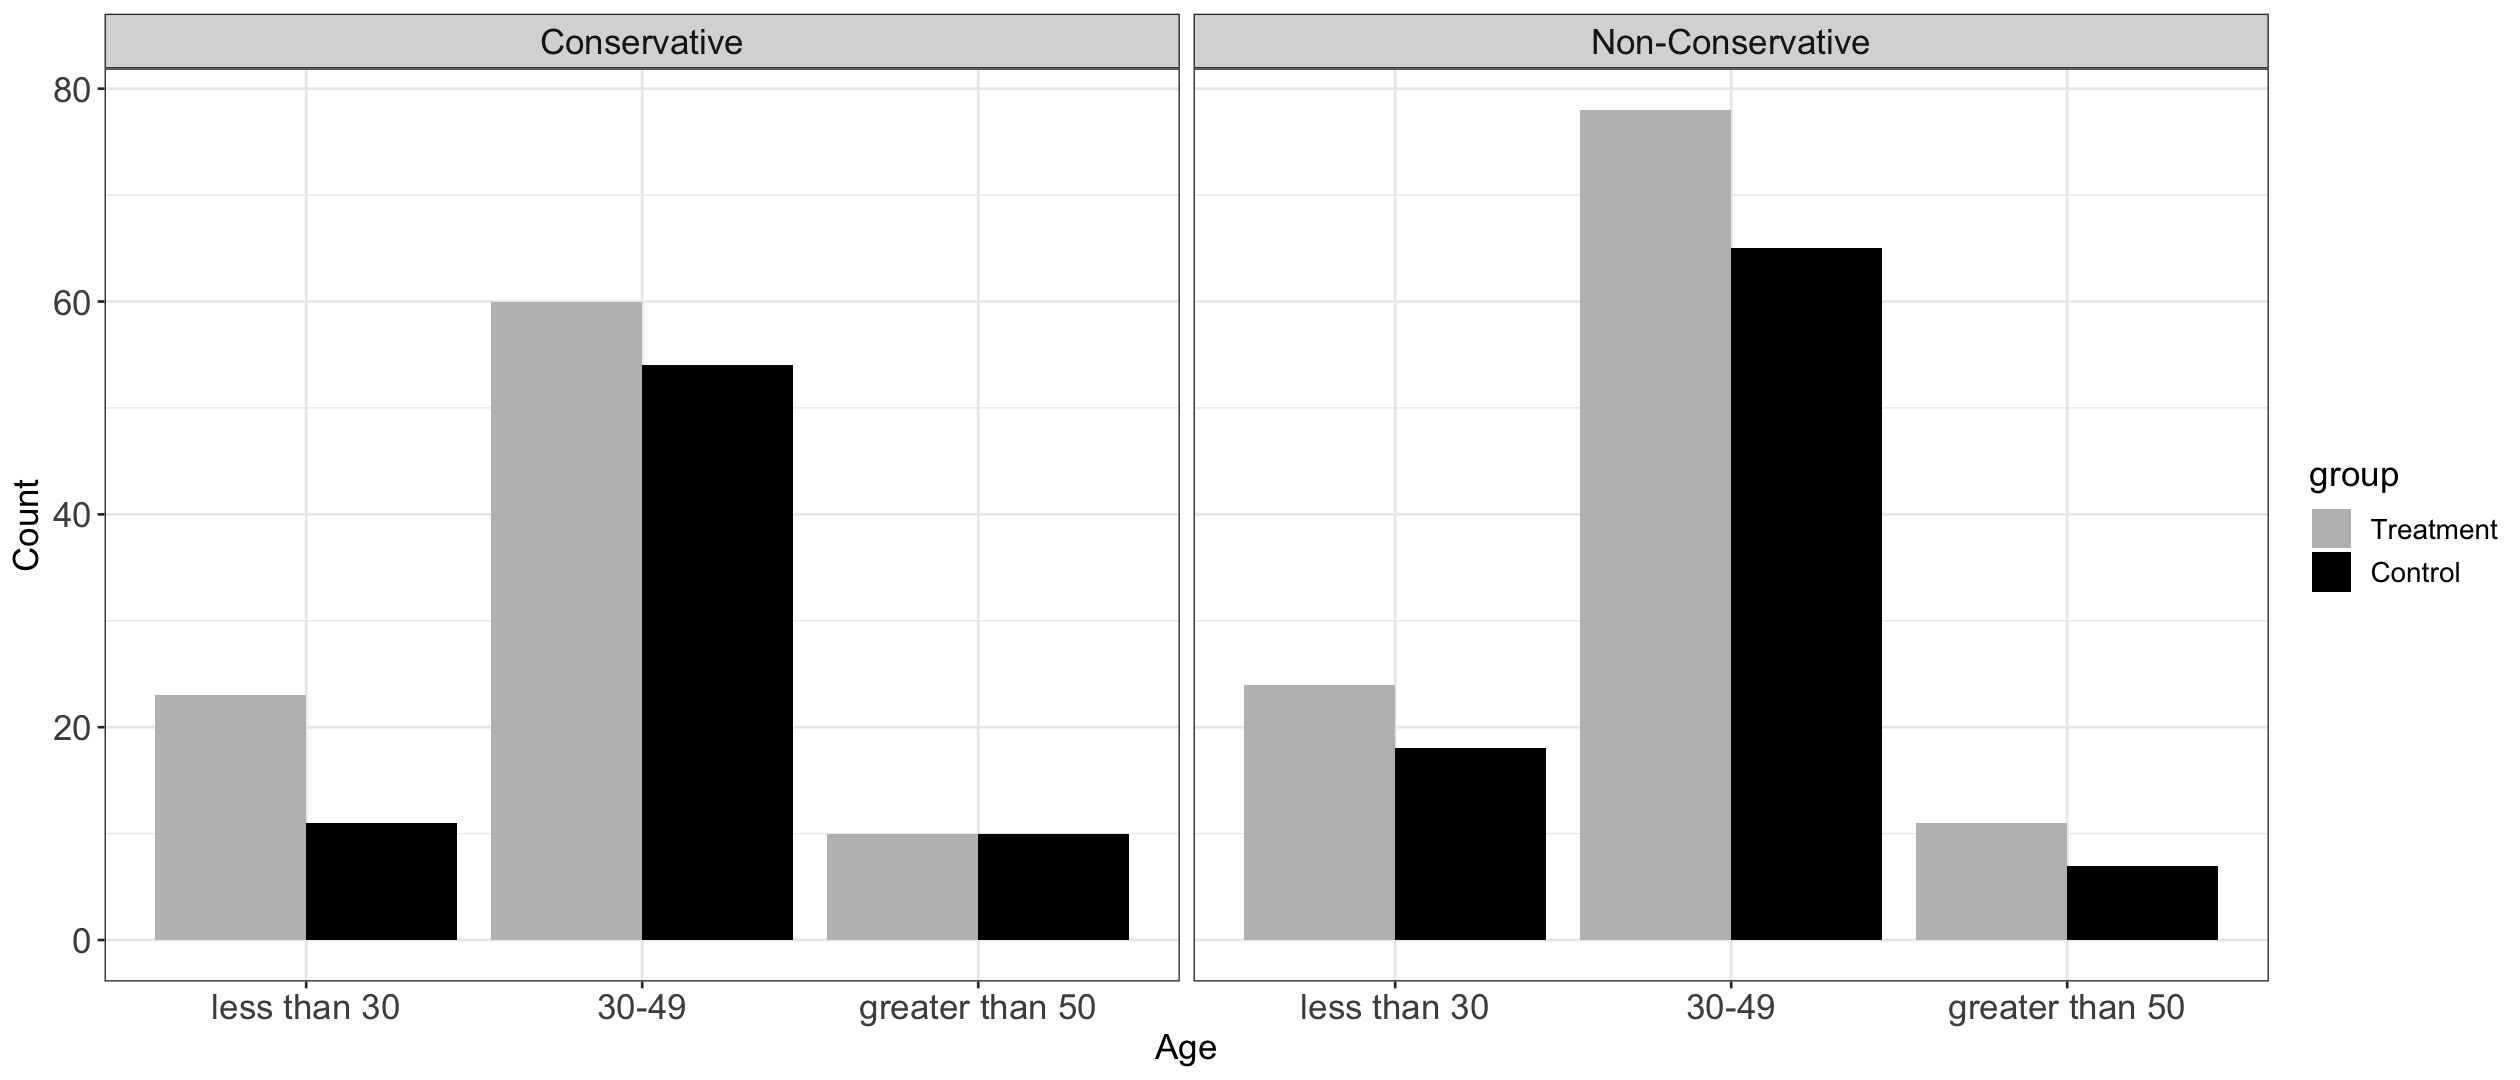

In [25]:
check_age = vcf_data %>% group_by(group, conservative, age_cat) %>% tally() 
check_age$age_cat <- factor(check_age$age_cat, levels = c("less than 30", "30-49", "greater than 50"))
check_age$conservative <- check_age$conservative %>% as.character()
check_age$conservative[check_age$conservative == "conserv"] <- "Conservative"
check_age$conservative[check_age$conservative == "nonconserv"] <- "Non-Conservative"

options(repr.plot.width = 14, repr.plot.height = 6, repr.plot.res = 180)
check_age %>%
  ggplot(aes(x = age_cat, y=n, fill=group)) +
  geom_bar(stat ='identity', position = position_dodge()) +
  theme_bw() + scale_fill_manual(values = c('gray', 'black')) +
  labs(x = "Age" , y= "Count") + 
  facet_wrap(~conservative, ncol = 2) +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        strip.text.x = element_text(size = 14),
        text = element_text(size = 14))

In [26]:
chisq.test(table(vcf_data$age_cat[vcf_data$conservative == "conserv"], 
                 vcf_data$group[vcf_data$conservative == "conserv"]))

ks.test(check_age$n[(check_age$group == 'Control') & (check_age$conservative == 'Conservative')],
        check_age$n[(check_age$group == 'Treatment' )& (check_age$conservative == 'Conservative')] )

chisq.test(table(vcf_data$age_cat[vcf_data$conservative == "nonconserv"], 
                 vcf_data$group[vcf_data$conservative == "nonconserv"]))

ks.test(check_age$n[(check_age$group == 'Control') & (check_age$conservative == 'Non-Conservative')],
        check_age$n[(check_age$group == 'Treatment' )& (check_age$conservative == 'Non-Conservative')] )


	Pearson's Chi-squared test

data:  table(vcf_data$age_cat[vcf_data$conservative == "conserv"], vcf_data$group[vcf_data$conservative ==     "conserv"])
X-squared = 2.653, df = 2, p-value = 0.2654



	Exact two-sample Kolmogorov-Smirnov test

data:  check_age$n[(check_age$group == "Control") & (check_age$conservative == "Conservative")] and check_age$n[(check_age$group == "Treatment") & (check_age$conservative == "Conservative")]
D = 0.33333, p-value = 1
alternative hypothesis: two-sided



	Pearson's Chi-squared test

data:  table(vcf_data$age_cat[vcf_data$conservative == "nonconserv"],     vcf_data$group[vcf_data$conservative == "nonconserv"])
X-squared = 0.32613, df = 2, p-value = 0.8495



	Exact two-sample Kolmogorov-Smirnov test

data:  check_age$n[(check_age$group == "Control") & (check_age$conservative == "Non-Conservative")] and check_age$n[(check_age$group == "Treatment") & (check_age$conservative == "Non-Conservative")]
D = 0.33333, p-value = 1
alternative hypothesis: two-sided


## Trusting vs. Distrusting PHIs

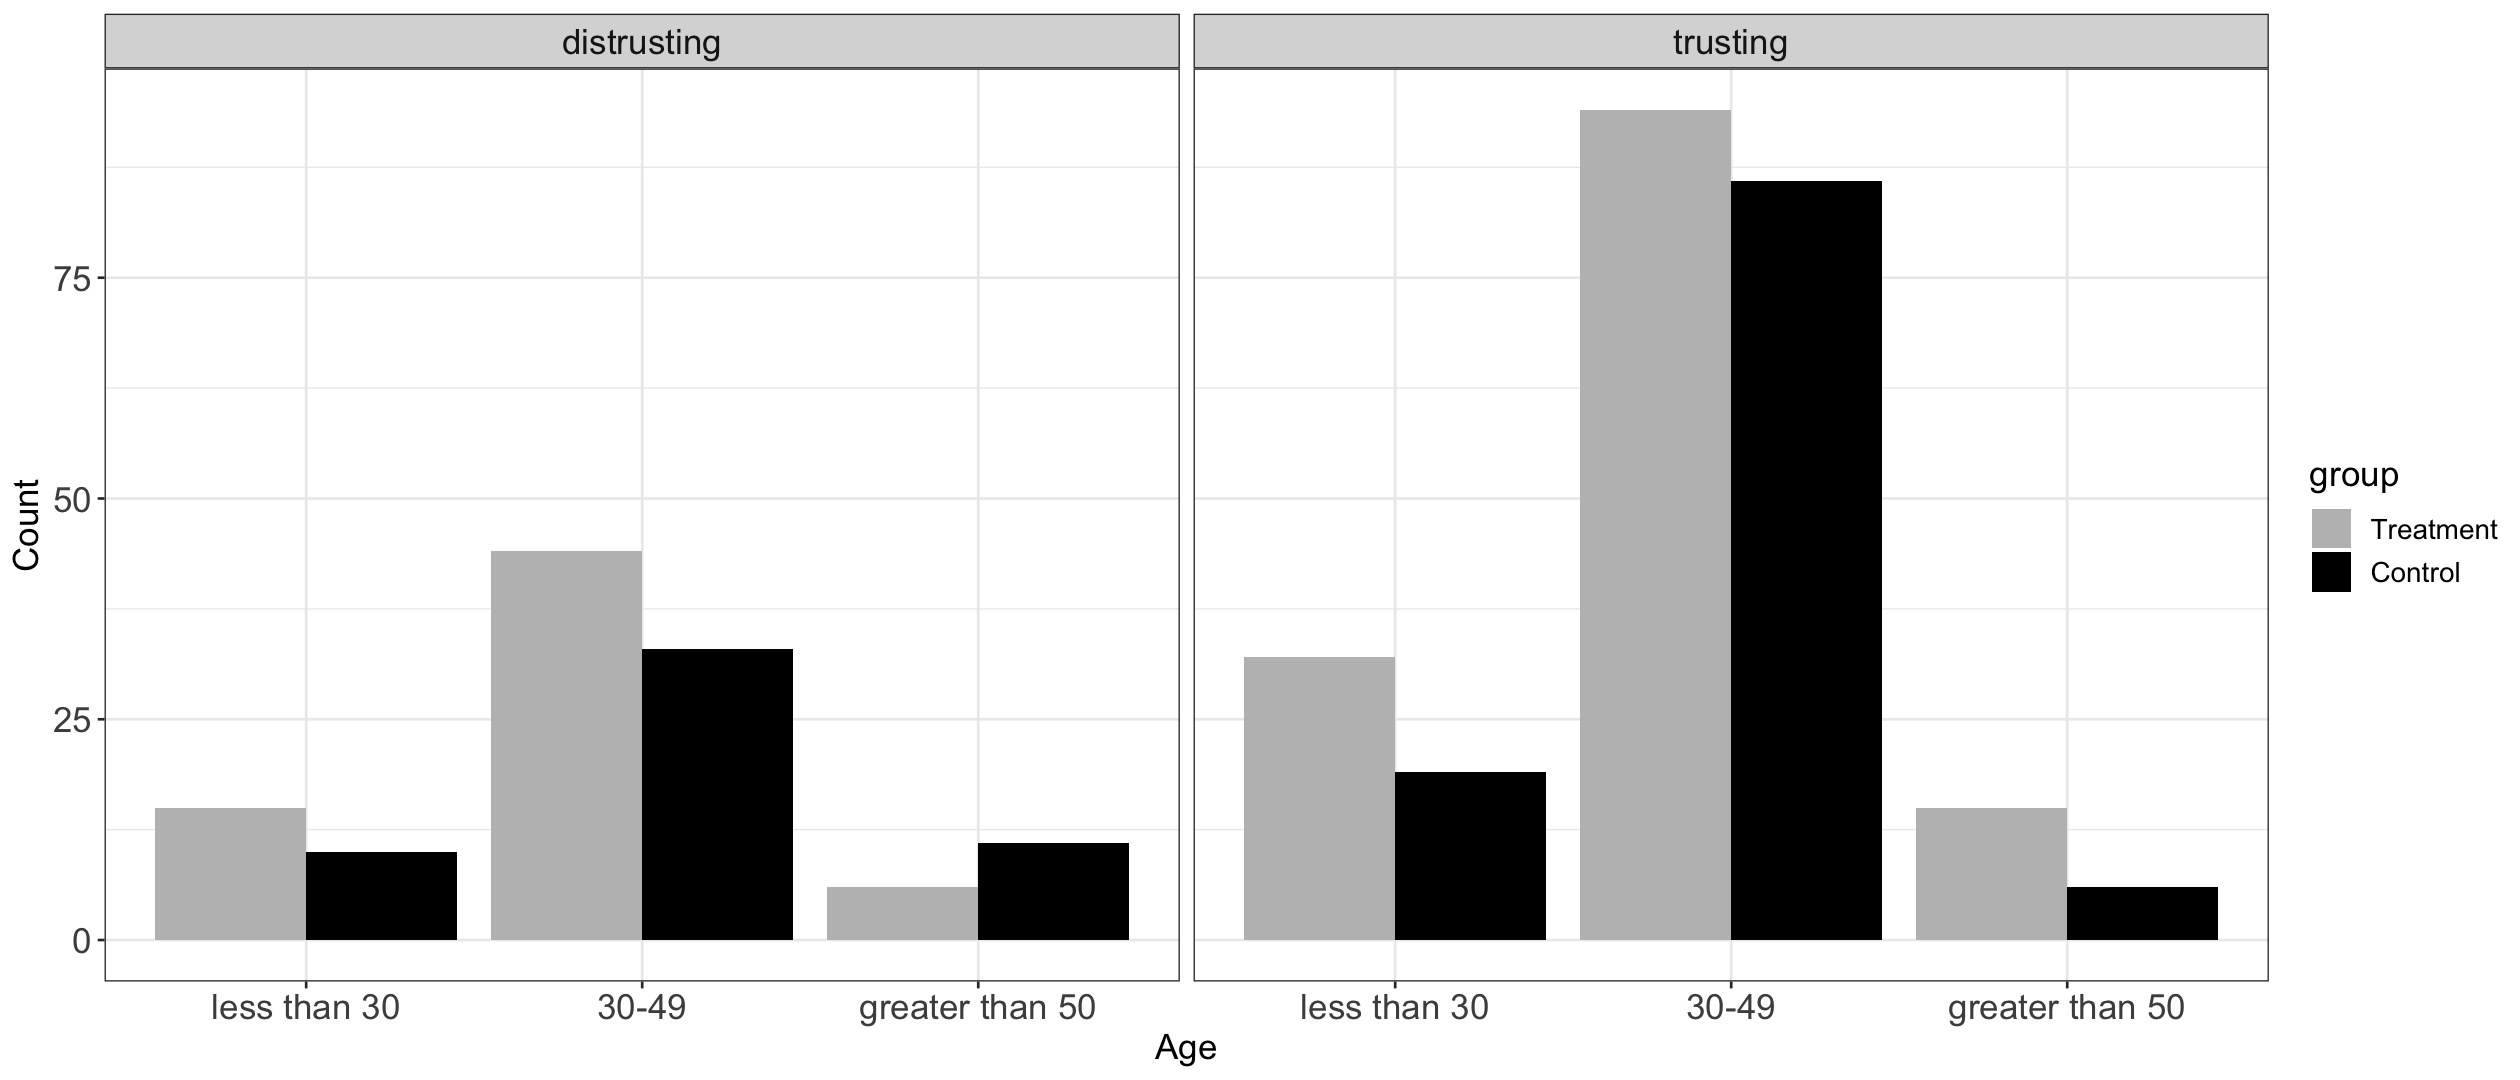

In [27]:
check_age = vcf_data %>% group_by(group, phi_trust_cat, age_cat) %>% tally() 
check_age$age_cat <- factor(check_age$age_cat, levels = c("less than 30", "30-49", "greater than 50"))

options(repr.plot.width = 14, repr.plot.height = 6, repr.plot.res = 180)
check_age %>%
  ggplot(aes(x = age_cat, y=n, fill=group)) +
  geom_bar(stat ='identity', position = position_dodge()) +
  theme_bw() + scale_fill_manual(values = c('gray', 'black')) +
  labs(x = "Age" , y= "Count") + 
  facet_wrap(~phi_trust_cat, ncol = 2) +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        strip.text.x = element_text(size = 14),
        text = element_text(size = 14)) 

In [28]:
chisq.test(table(vcf_data$age_cat[vcf_data$phi_trust_cat == "trusting"], 
                 vcf_data$group[vcf_data$phi_trust_cat == "trusting"]))

ks.test(check_age$n[(check_age$group == 'Control') & (check_age$phi_trust_cat == 'trusting')],
        check_age$n[(check_age$group == 'Treatment' )& (check_age$phi_trust_cat == 'trusting')])

chisq.test(table(vcf_data$age_cat[vcf_data$phi_trust_cat == "distrusting"], 
                 vcf_data$group[vcf_data$phi_trust_cat == "distrusting"]))

ks.test(check_age$n[(check_age$group == 'Control') & (check_age$phi_trust_cat == 'distrusting')],
        check_age$n[(check_age$group == 'Treatment' )& (check_age$phi_trust_cat == 'distrusting')])


	Pearson's Chi-squared test

data:  table(vcf_data$age_cat[vcf_data$phi_trust_cat == "trusting"],     vcf_data$group[vcf_data$phi_trust_cat == "trusting"])
X-squared = 4.0119, df = 2, p-value = 0.1345



	Exact two-sample Kolmogorov-Smirnov test

data:  check_age$n[(check_age$group == "Control") & (check_age$phi_trust_cat == "trusting")] and check_age$n[(check_age$group == "Treatment") & (check_age$phi_trust_cat == "trusting")]
D = 0.33333, p-value = 1
alternative hypothesis: two-sided



	Pearson's Chi-squared test

data:  table(vcf_data$age_cat[vcf_data$phi_trust_cat == "distrusting"],     vcf_data$group[vcf_data$phi_trust_cat == "distrusting"])
X-squared = 3.0513, df = 2, p-value = 0.2175



	Exact two-sample Kolmogorov-Smirnov test

data:  check_age$n[(check_age$group == "Control") & (check_age$phi_trust_cat == "distrusting")] and check_age$n[(check_age$group == "Treatment") & (check_age$phi_trust_cat == "distrusting")]
D = 0.33333, p-value = 1
alternative hypothesis: two-sided


## Trusting vs. Distrusting Governmental Institutions

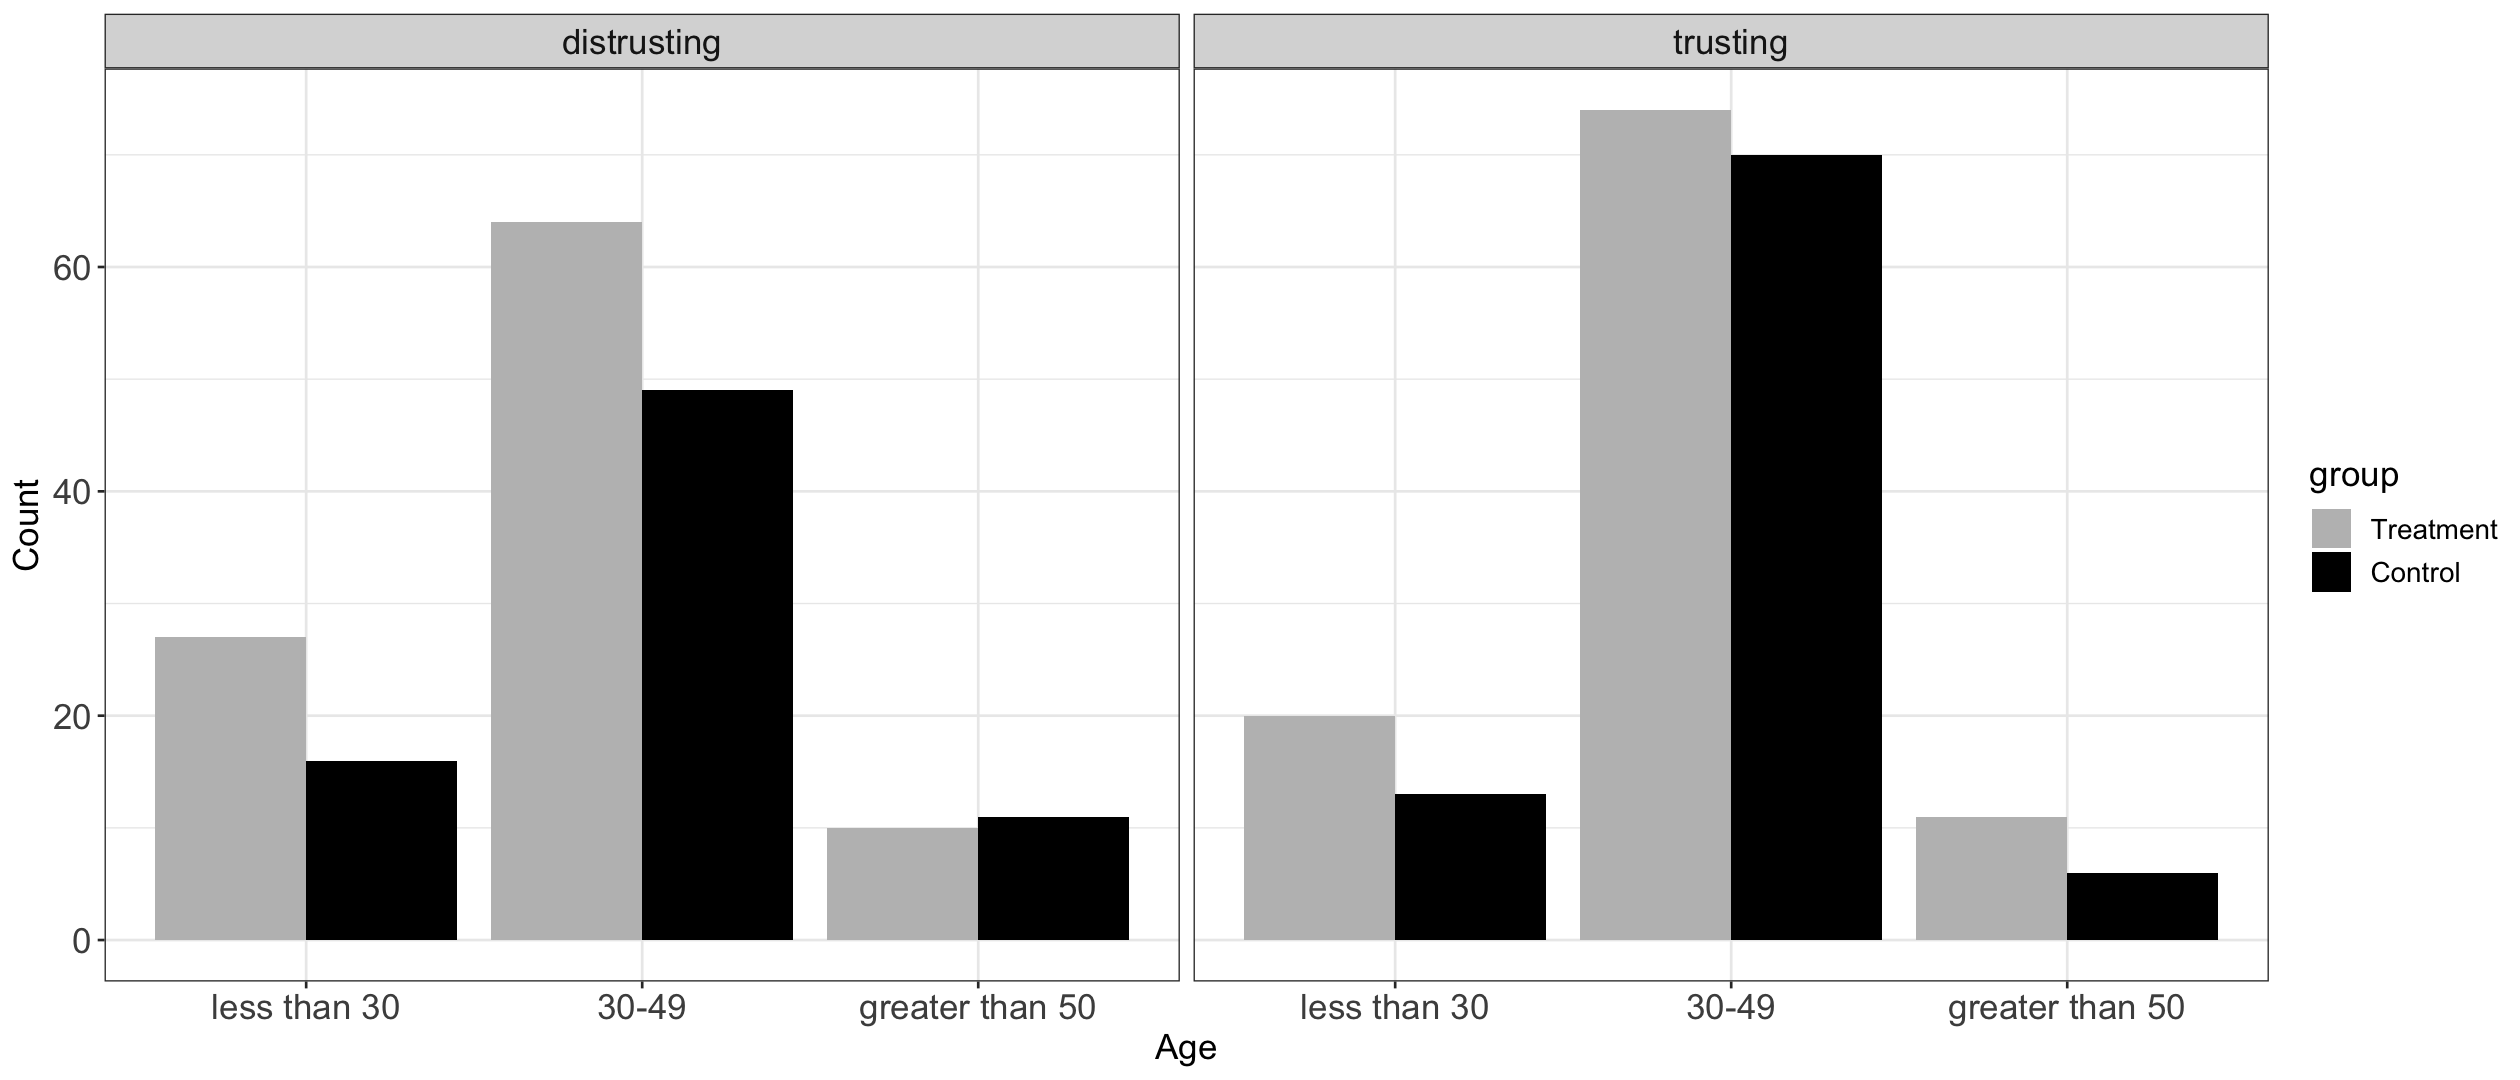

In [29]:
check_age = vcf_data %>% group_by(group, gov_trust_cat, age_cat) %>% tally() 
check_age$age_cat <- factor(check_age$age_cat, levels = c("less than 30", "30-49", "greater than 50"))

options(repr.plot.width = 14, repr.plot.height = 6, repr.plot.res = 180)
check_age %>%
  ggplot(aes(x = age_cat, y=n, fill=group)) +
  geom_bar(stat ='identity', position = position_dodge()) +
  theme_bw() + scale_fill_manual(values = c('gray', 'black')) +
  labs(x = "Age" , y= "Count") + 
  facet_wrap(~gov_trust_cat, ncol = 2) +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        strip.text.x = element_text(size = 14),
        text = element_text(size = 14)) 

In [30]:
chisq.test(table(vcf_data$age_cat[vcf_data$gov_trust_cat == "trusting"], 
                 vcf_data$group[vcf_data$gov_trust_cat == "trusting"]))

ks.test(check_age$n[(check_age$group == 'Control') & (check_age$gov_trust_cat == 'trusting')],
        check_age$n[(check_age$group == 'Treatment' )& (check_age$gov_trust_cat == 'trusting')])

chisq.test(table(vcf_data$age_cat[vcf_data$gov_trust_cat == "distrusting"], 
                 vcf_data$group[vcf_data$gov_trust_cat == "distrusting"]))

ks.test(check_age$n[(check_age$group == 'Control') & (check_age$gov_trust_cat == 'distrusting')],
        check_age$n[(check_age$group == 'Treatment' )& (check_age$gov_trust_cat == 'distrusting')])


	Pearson's Chi-squared test

data:  table(vcf_data$age_cat[vcf_data$gov_trust_cat == "trusting"],     vcf_data$group[vcf_data$gov_trust_cat == "trusting"])
X-squared = 1.7589, df = 2, p-value = 0.415



	Exact two-sample Kolmogorov-Smirnov test

data:  check_age$n[(check_age$group == "Control") & (check_age$gov_trust_cat == "trusting")] and check_age$n[(check_age$group == "Treatment") & (check_age$gov_trust_cat == "trusting")]
D = 0.33333, p-value = 1
alternative hypothesis: two-sided



	Pearson's Chi-squared test

data:  table(vcf_data$age_cat[vcf_data$gov_trust_cat == "distrusting"],     vcf_data$group[vcf_data$gov_trust_cat == "distrusting"])
X-squared = 1.3486, df = 2, p-value = 0.5095



	Exact two-sample Kolmogorov-Smirnov test

data:  check_age$n[(check_age$group == "Control") & (check_age$gov_trust_cat == "distrusting")] and check_age$n[(check_age$group == "Treatment") & (check_age$gov_trust_cat == "distrusting")]
D = 0.33333, p-value = 1
alternative hypothesis: two-sided


# Race distributions across subgroups and experimental groups

## Republican vs. Non-Republican

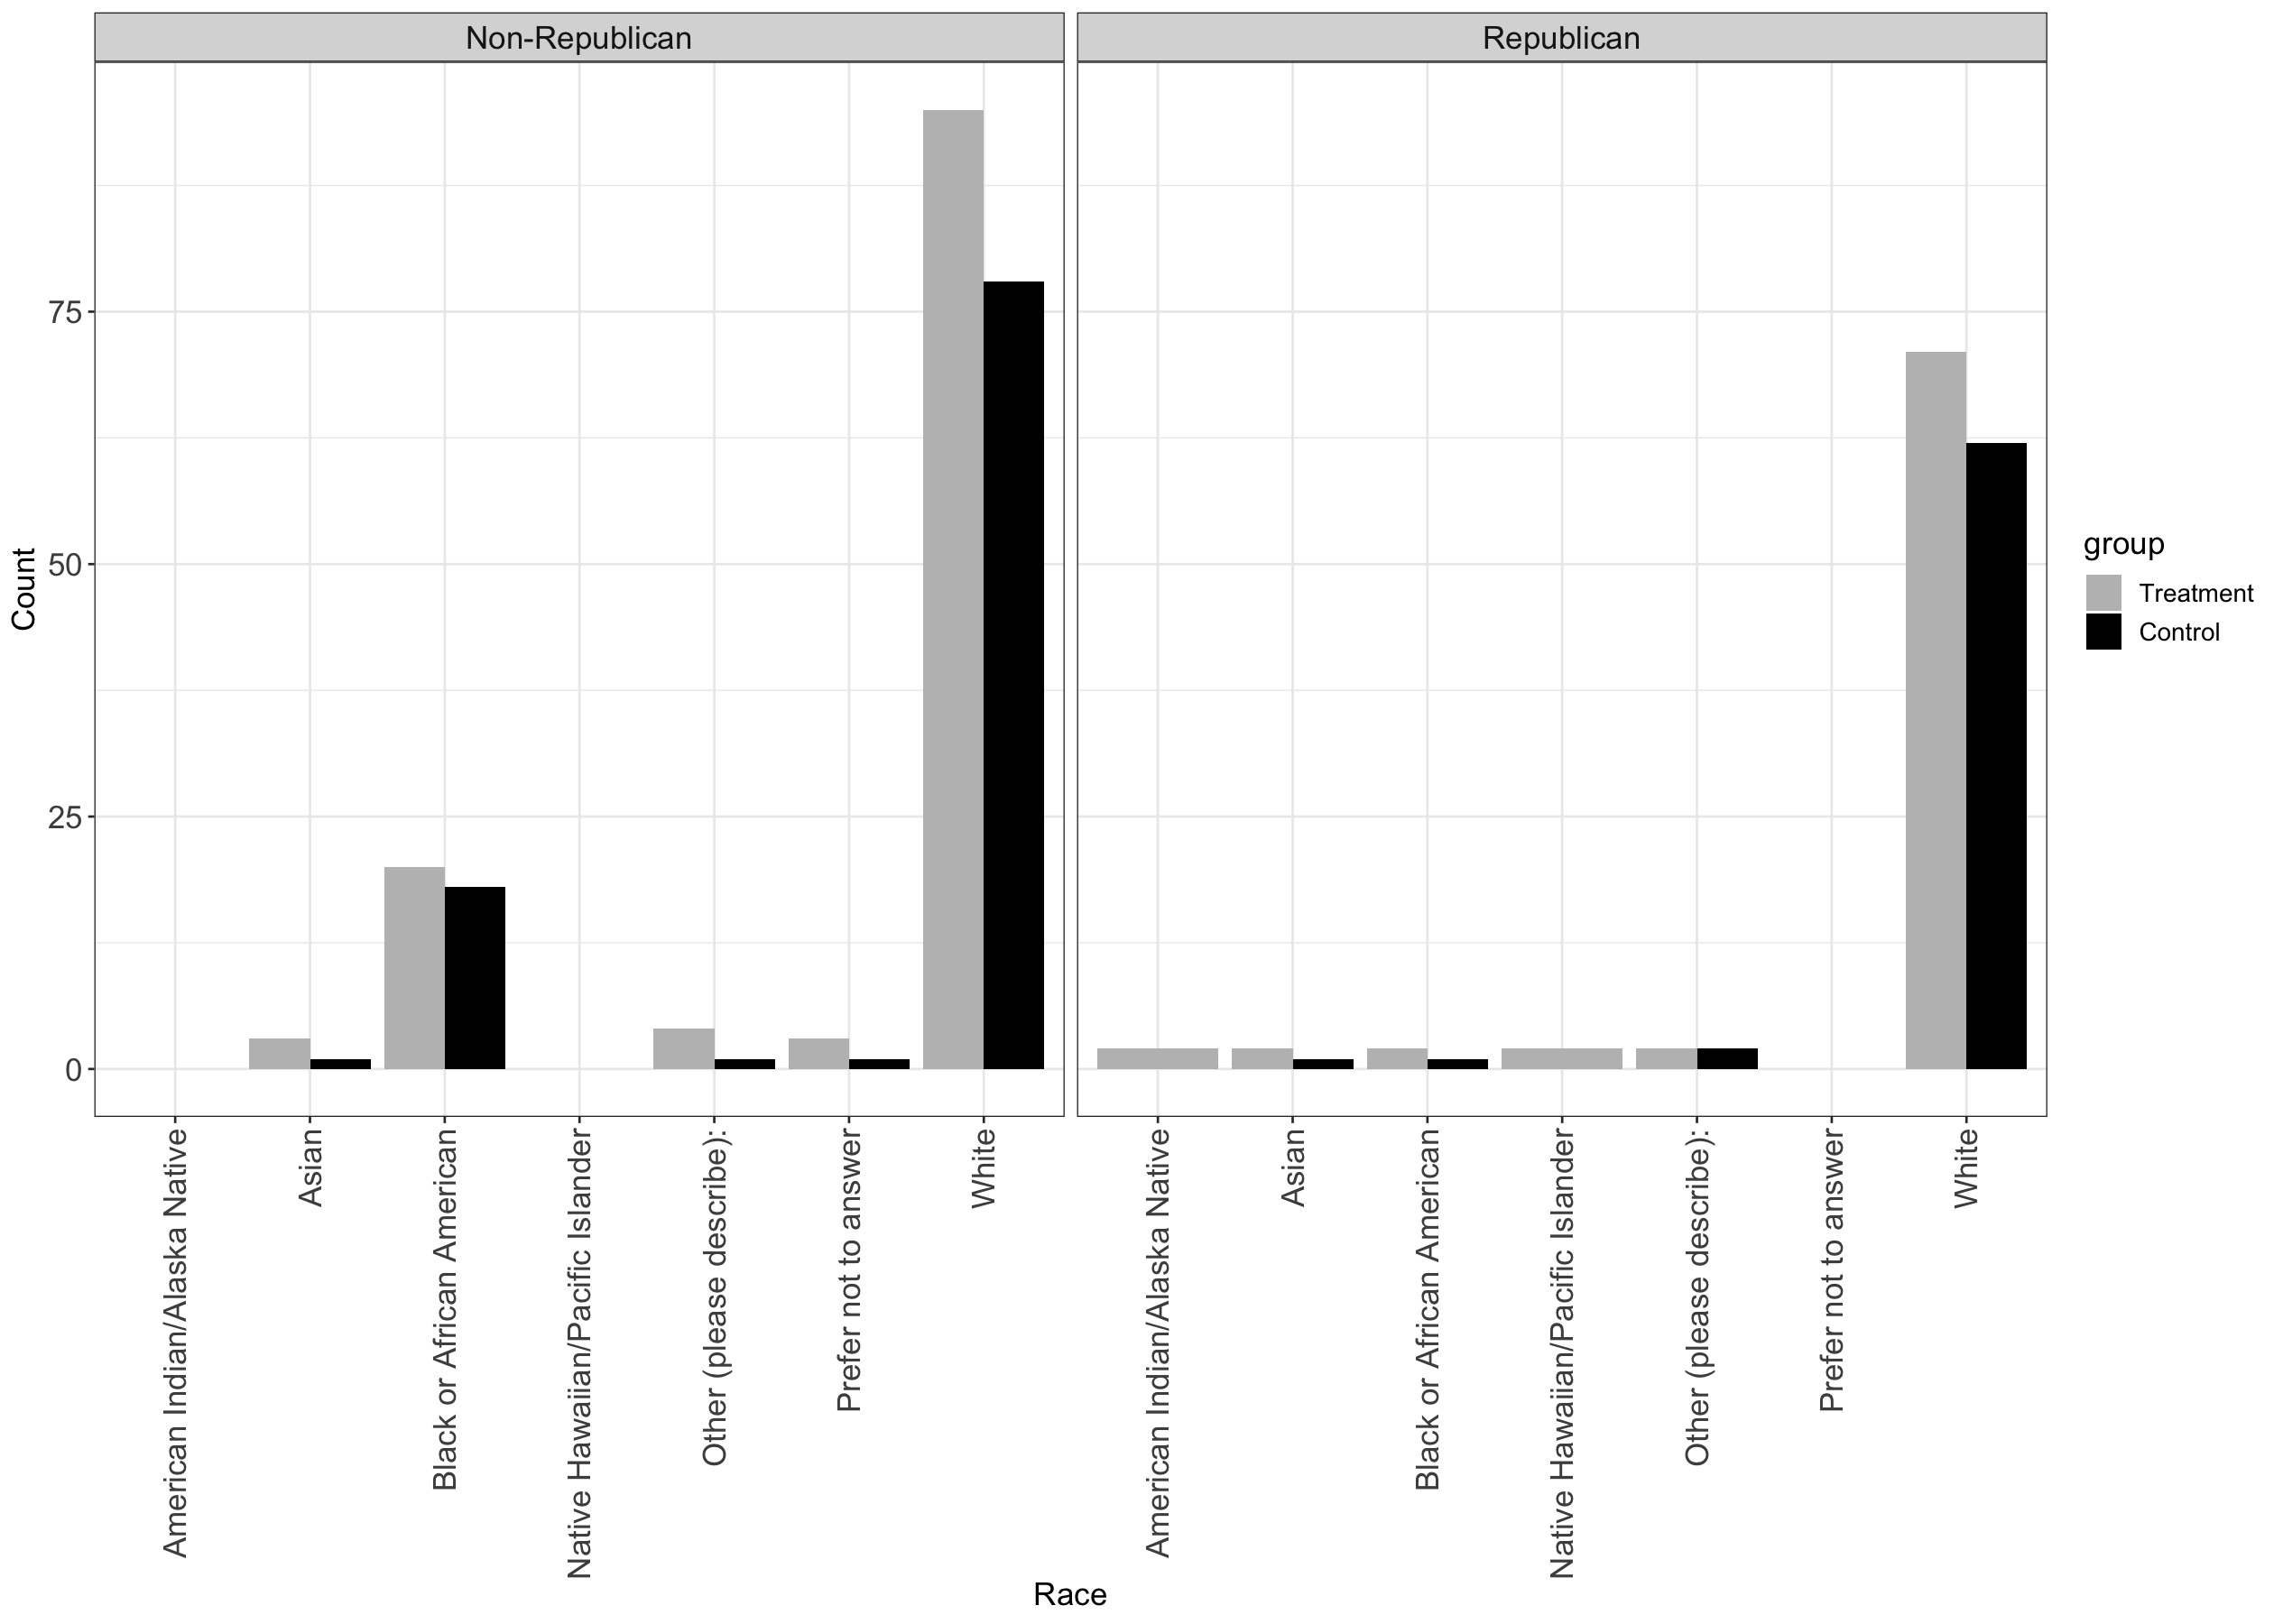

In [31]:
check_race = vcf_data %>% group_by(group, republican, race) %>% tally() 
check_race$republican <- check_race$republican %>% as.character()
check_race$republican[check_race$republican == "rep"] <- "Republican"
check_race$republican[check_race$republican == "nonrep"] <- "Non-Republican"

options(repr.plot.width = 14, repr.plot.height = 10, repr.plot.res = 180)
check_race %>%
  ggplot(aes(x = race, y=n, fill=group)) +
  geom_bar(stat ='identity', position = position_dodge()) +
  theme_bw() + scale_fill_manual(values = c('gray', 'black')) +
  labs(x = "Race" , y= "Count") + 
  facet_wrap(~republican, ncol = 2) +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        strip.text.x = element_text(size = 14),
        text = element_text(size = 14)) + 
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) 

In [32]:
chisq.test(table(vcf_data$race[vcf_data$republican == "rep"], 
                 vcf_data$group[vcf_data$republican == "rep"]))

ks.test(check_race$n[(check_race$group == 'Control') & (check_race$republican == 'Republican')],
        check_race$n[(check_race$group == 'Treatment' )& (check_race$republican == 'Republican')])

chisq.test(table(vcf_data$race[vcf_data$republican == "nonrep"], 
                 vcf_data$group[vcf_data$republican == "nonrep"]))

ks.test(check_race$n[(check_race$group == 'Control') & (check_race$republican == 'Non-Republican')],
        check_race$n[(check_race$group == 'Treatment' )& (check_race$republican == 'Non-Republican')])

Warning message in chisq.test(table(vcf_data$race[vcf_data$republican == "rep"], :
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(vcf_data$race[vcf_data$republican == "rep"], vcf_data$group[vcf_data$republican ==     "rep"])
X-squared = 3.7845, df = 5, p-value = 0.5808



	Exact two-sample Kolmogorov-Smirnov test

data:  check_race$n[(check_race$group == "Control") & (check_race$republican == "Republican")] and check_race$n[(check_race$group == "Treatment") & (check_race$republican == "Republican")]
D = 0.5, p-value = 0.2619
alternative hypothesis: two-sided


Warning message in chisq.test(table(vcf_data$race[vcf_data$republican == "nonrep"], :
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(vcf_data$race[vcf_data$republican == "nonrep"], vcf_data$group[vcf_data$republican ==     "nonrep"])
X-squared = 2.5929, df = 4, p-value = 0.6281



	Exact two-sample Kolmogorov-Smirnov test

data:  check_race$n[(check_race$group == "Control") & (check_race$republican == "Non-Republican")] and check_race$n[(check_race$group == "Treatment") & (check_race$republican == "Non-Republican")]
D = 0.6, p-value = 0.3571
alternative hypothesis: two-sided


## Conservatives vs. Non-Conservatives

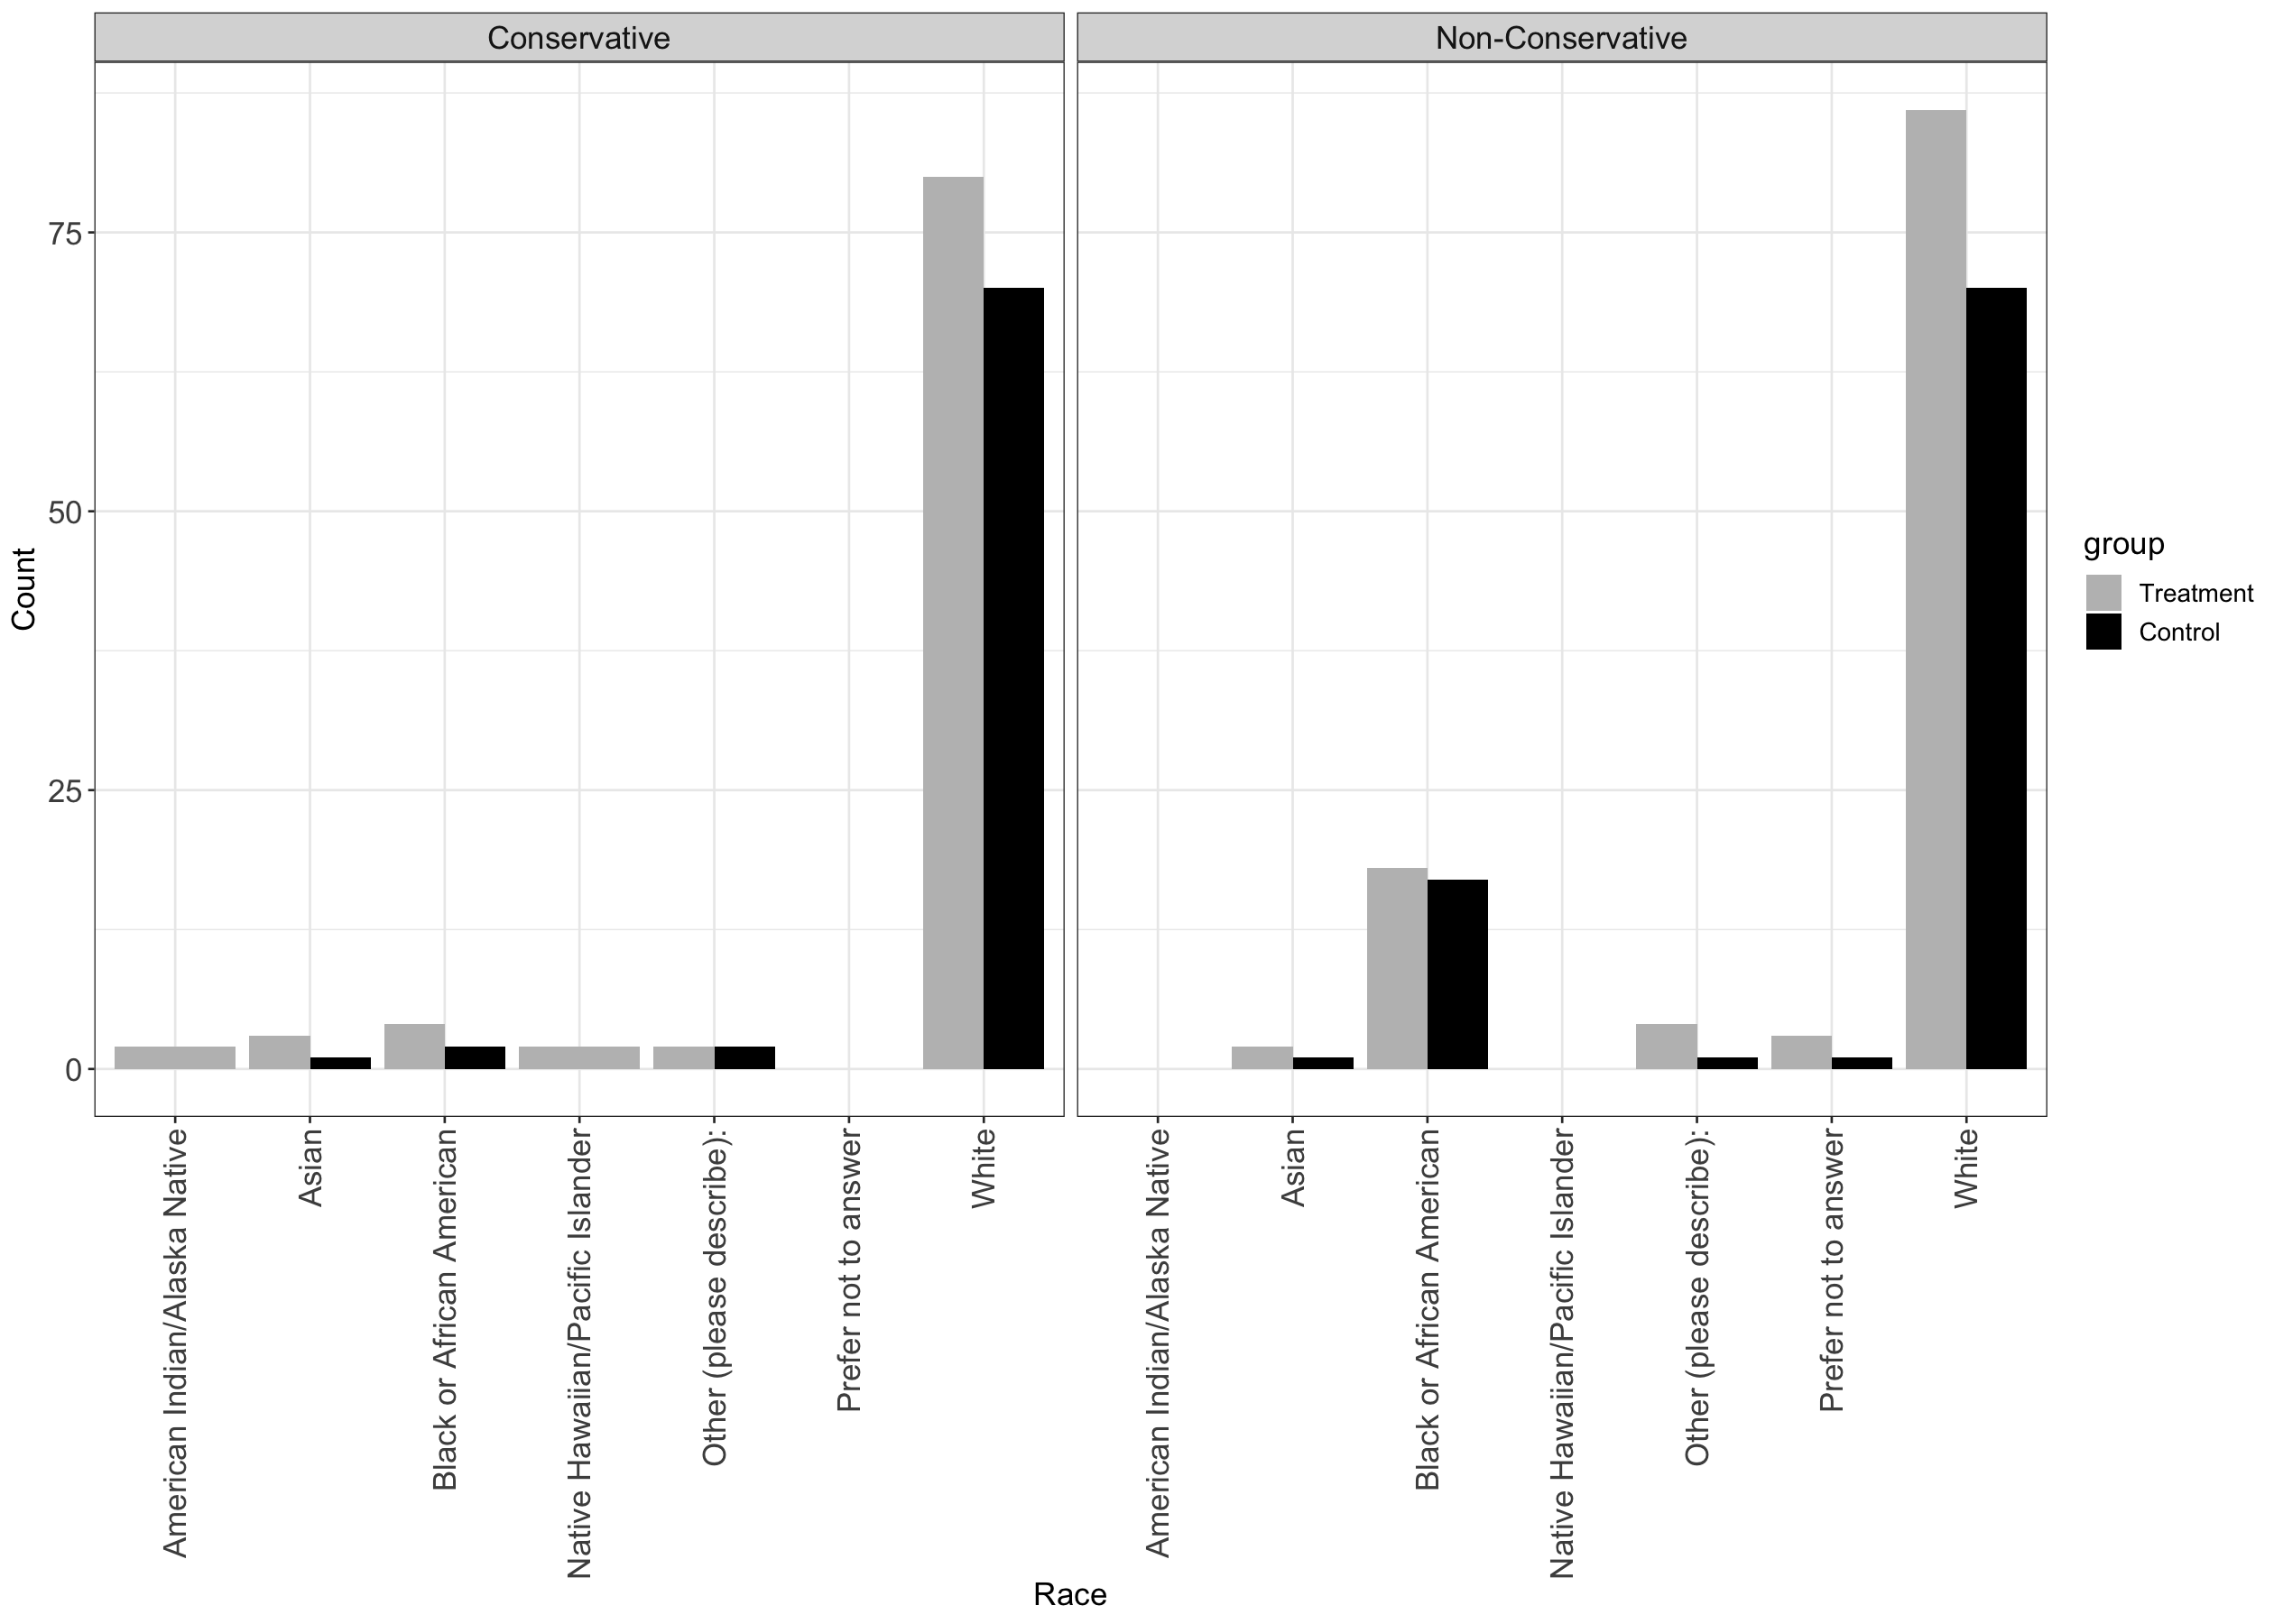

In [33]:
check_race = vcf_data %>% group_by(group, conservative, race) %>% tally() 
check_race$conservative <- check_race$conservative %>% as.character()
check_race$conservative[check_race$conservative == "conserv"] <- "Conservative"
check_race$conservative[check_race$conservative == "nonconserv"] <- "Non-Conservative"

options(repr.plot.width = 14, repr.plot.height = 10, repr.plot.res = 180)
check_race %>%
  ggplot(aes(x = race, y=n, fill=group)) +
  geom_bar(stat ='identity', position = position_dodge()) +
  theme_bw() + scale_fill_manual(values = c('gray', 'black')) +
  labs(x = "Race" , y= "Count") + 
  facet_wrap(~conservative, ncol = 2) +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        strip.text.x = element_text(size = 14),
        text = element_text(size = 14)) + 
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) 

In [34]:
chisq.test(table(vcf_data$race[vcf_data$conservative == "conserv"], 
                 vcf_data$group[vcf_data$conservative == "conserv"]))

ks.test(check_race$n[(check_race$group == 'Control') & (check_race$conservative == 'Conservative')],
        check_race$n[(check_race$group == 'Treatment' )& (check_race$conservative == 'Conservative')])

chisq.test(table(vcf_data$race[vcf_data$conservative == "nonconserv"], 
                 vcf_data$group[vcf_data$conservative == "nonconserv"]))

ks.test(check_race$n[(check_race$group == 'Control') & (check_race$conservative == 'Non-Conservative')],
        check_race$n[(check_race$group == 'Treatment' )& (check_race$conservative == 'Non-Conservative')])

Warning message in chisq.test(table(vcf_data$race[vcf_data$conservative == "conserv"], :
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(vcf_data$race[vcf_data$conservative == "conserv"], vcf_data$group[vcf_data$conservative ==     "conserv"])
X-squared = 4.4559, df = 5, p-value = 0.4858



	Exact two-sample Kolmogorov-Smirnov test

data:  check_race$n[(check_race$group == "Control") & (check_race$conservative == "Conservative")] and check_race$n[(check_race$group == "Treatment") & (check_race$conservative == "Conservative")]
D = 0.25, p-value = 0.9524
alternative hypothesis: two-sided


Warning message in chisq.test(table(vcf_data$race[vcf_data$conservative == "nonconserv"], :
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(vcf_data$race[vcf_data$conservative == "nonconserv"], vcf_data$group[vcf_data$conservative ==     "nonconserv"])
X-squared = 2.2256, df = 4, p-value = 0.6943



	Exact two-sample Kolmogorov-Smirnov test

data:  check_race$n[(check_race$group == "Control") & (check_race$conservative == "Non-Conservative")] and check_race$n[(check_race$group == "Treatment") & (check_race$conservative == "Non-Conservative")]
D = 0.6, p-value = 0.3571
alternative hypothesis: two-sided


## Trusting vs. Distrusting PHIs

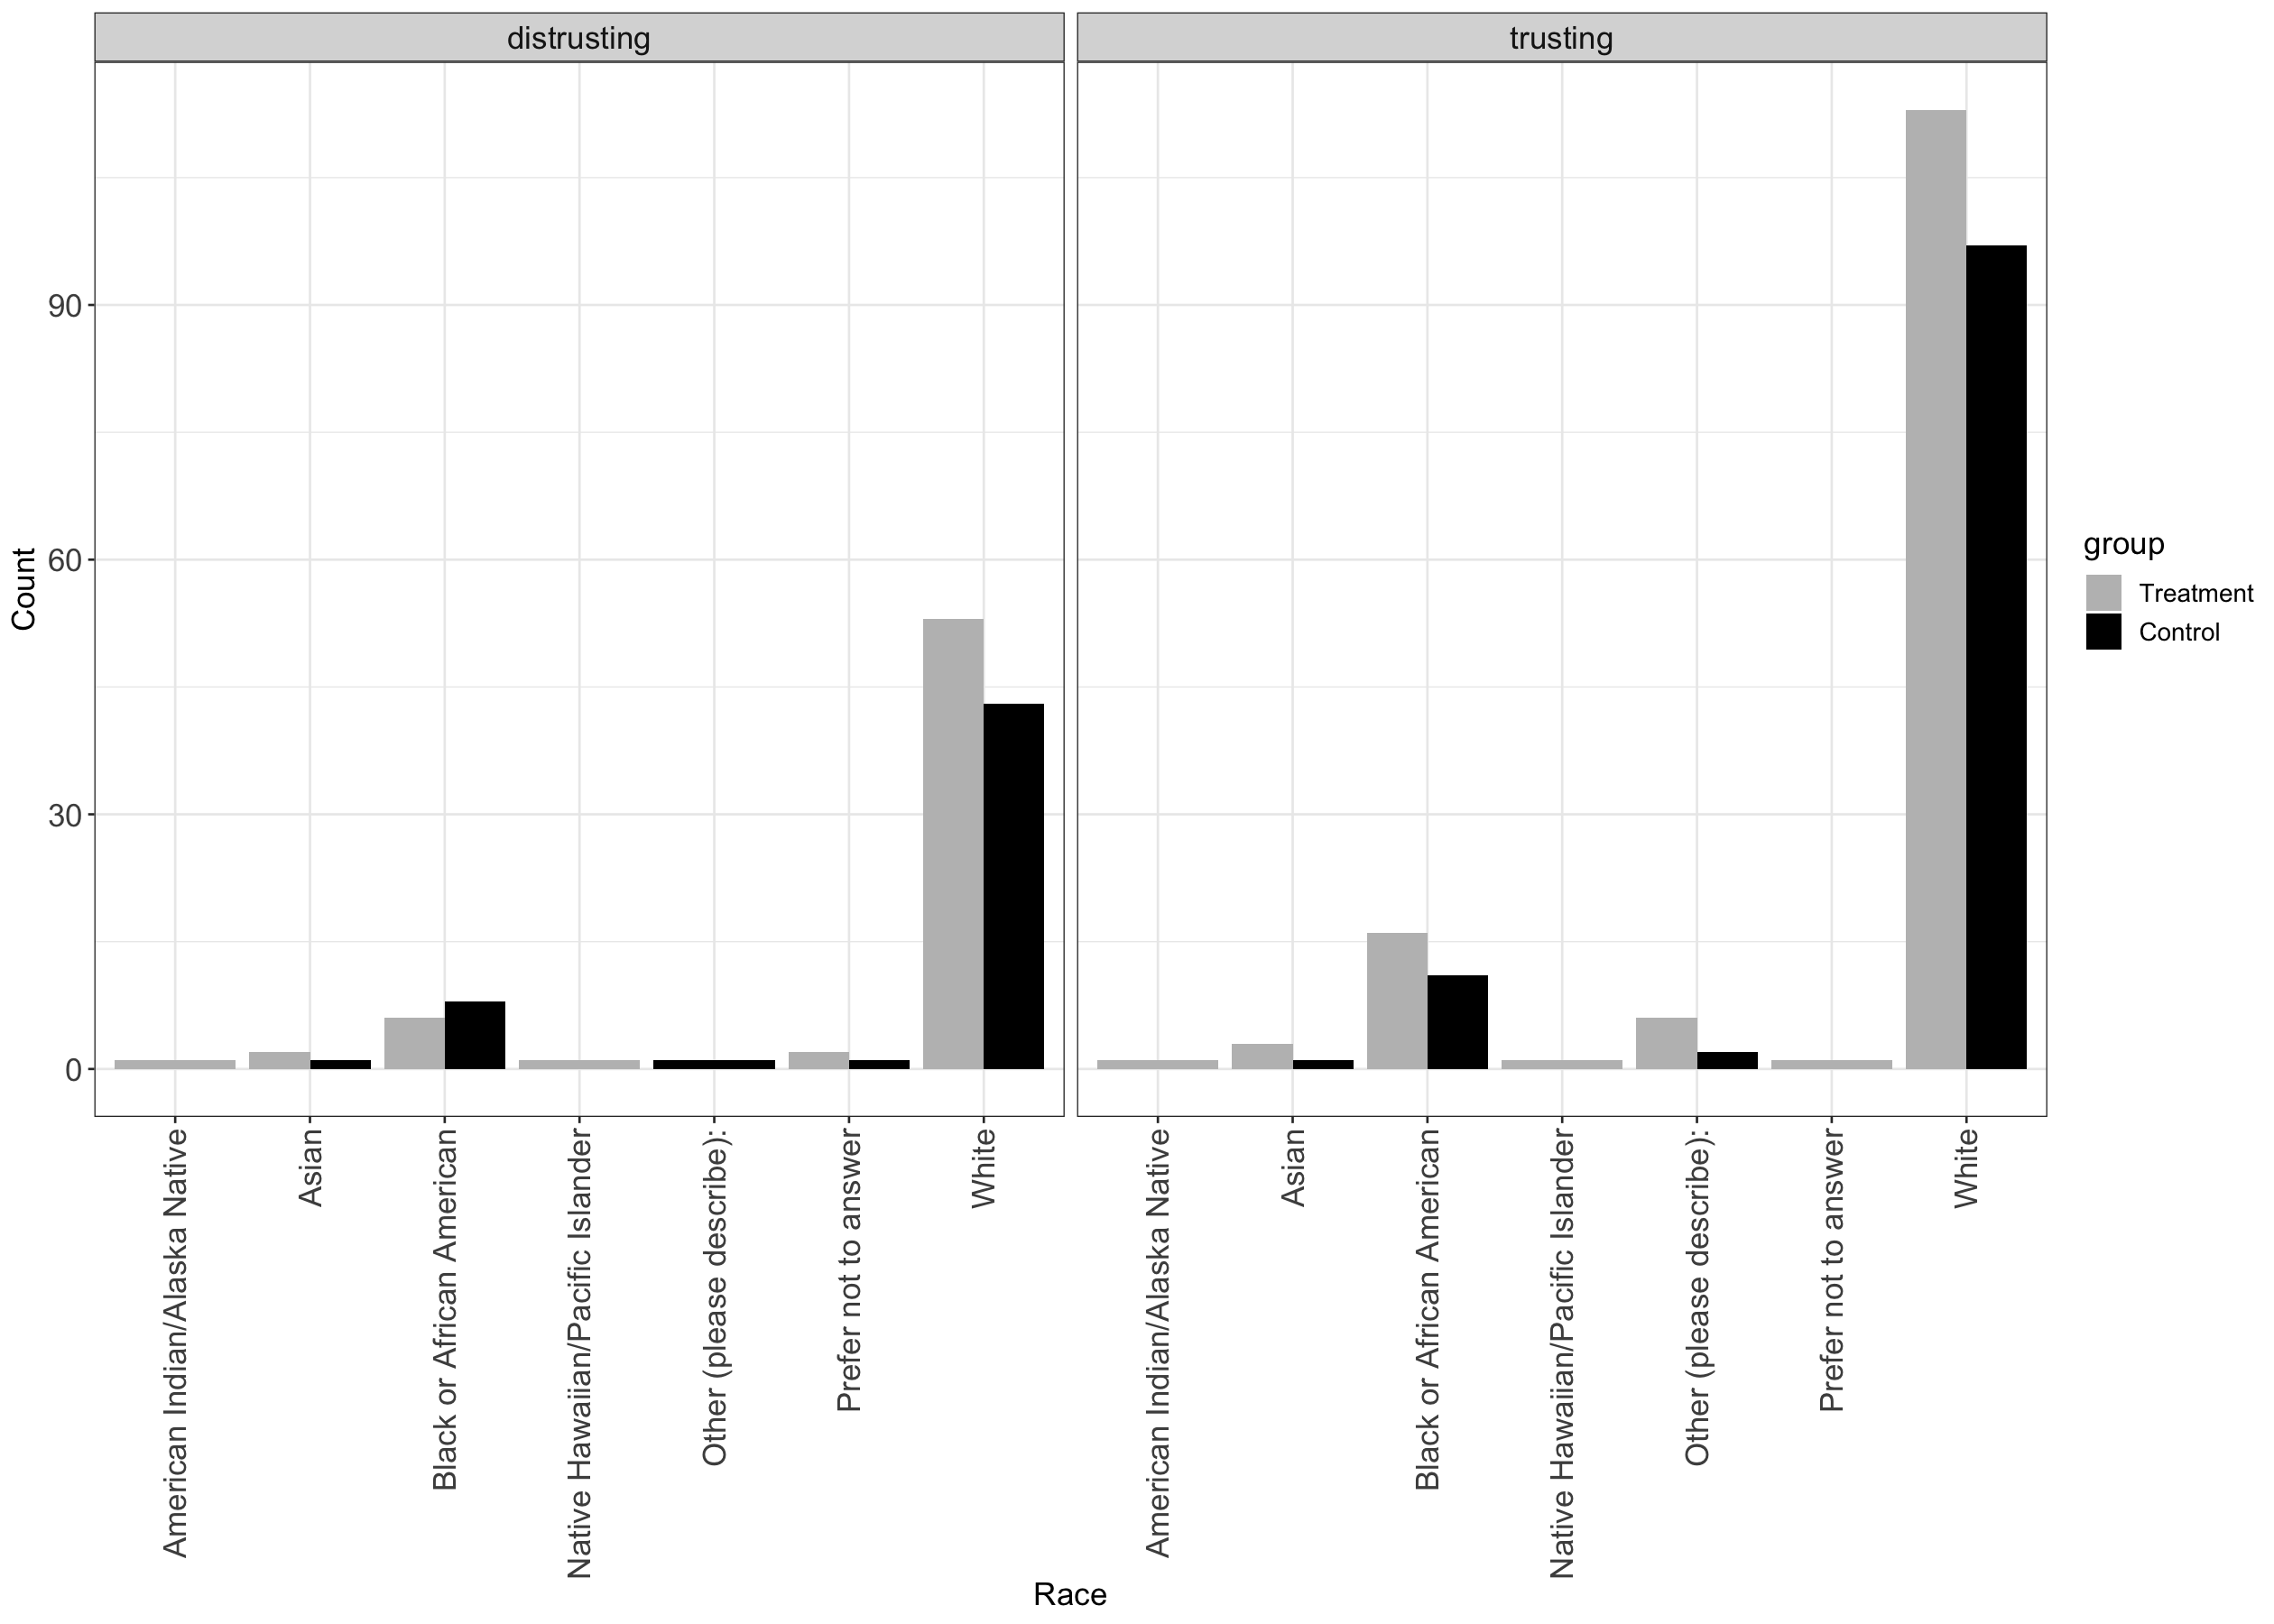

In [35]:
check_race = vcf_data %>% group_by(group, phi_trust_cat, race) %>% tally() 

options(repr.plot.width = 14, repr.plot.height = 10, repr.plot.res = 180)
check_race %>%
  ggplot(aes(x = race, y=n, fill=group)) +
  geom_bar(stat ='identity', position = position_dodge()) +
  theme_bw() + scale_fill_manual(values = c('gray', 'black')) +
  labs(x = "Race" , y= "Count") + 
  facet_wrap(~phi_trust_cat, ncol = 2) +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        strip.text.x = element_text(size = 14),
        text = element_text(size = 14)) + 
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) 

In [36]:
chisq.test(table(vcf_data$race[vcf_data$phi_trust_cat == "trusting"], 
                 vcf_data$group[vcf_data$phi_trust_cat == "trusting"]))

ks.test(check_race$n[(check_race$group == 'Control') & (check_race$phi_trust_cat == 'trusting')],
        check_race$n[(check_race$group == 'Treatment' )& (check_race$phi_trust_cat == 'trusting')])

chisq.test(table(vcf_data$race[vcf_data$phi_trust_cat == "distrusting"], 
                 vcf_data$group[vcf_data$phi_trust_cat == "distrusting"]))

ks.test(check_race$n[(check_race$group == 'Control') & (check_race$phi_trust_cat == 'distrusting')],
        check_race$n[(check_race$group == 'Treatment' )& (check_race$phi_trust_cat == 'distrusting')])

Warning message in chisq.test(table(vcf_data$race[vcf_data$phi_trust_cat == "trusting"], :
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(vcf_data$race[vcf_data$phi_trust_cat == "trusting"], vcf_data$group[vcf_data$phi_trust_cat ==     "trusting"])
X-squared = 4.6393, df = 6, p-value = 0.5908



	Exact two-sample Kolmogorov-Smirnov test

data:  check_race$n[(check_race$group == "Control") & (check_race$phi_trust_cat == "trusting")] and check_race$n[(check_race$group == "Treatment") & (check_race$phi_trust_cat == "trusting")]
D = 0.21429, p-value = 0.9879
alternative hypothesis: two-sided


Warning message in chisq.test(table(vcf_data$race[vcf_data$phi_trust_cat == "distrusting"], :
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(vcf_data$race[vcf_data$phi_trust_cat == "distrusting"],     vcf_data$group[vcf_data$phi_trust_cat == "distrusting"])
X-squared = 4.0115, df = 6, p-value = 0.6751



	Exact two-sample Kolmogorov-Smirnov test

data:  check_race$n[(check_race$group == "Control") & (check_race$phi_trust_cat == "distrusting")] and check_race$n[(check_race$group == "Treatment") & (check_race$phi_trust_cat == "distrusting")]
D = 0.26667, p-value = 0.8268
alternative hypothesis: two-sided


## Trusting vs. Distrusting Governmental Institutions

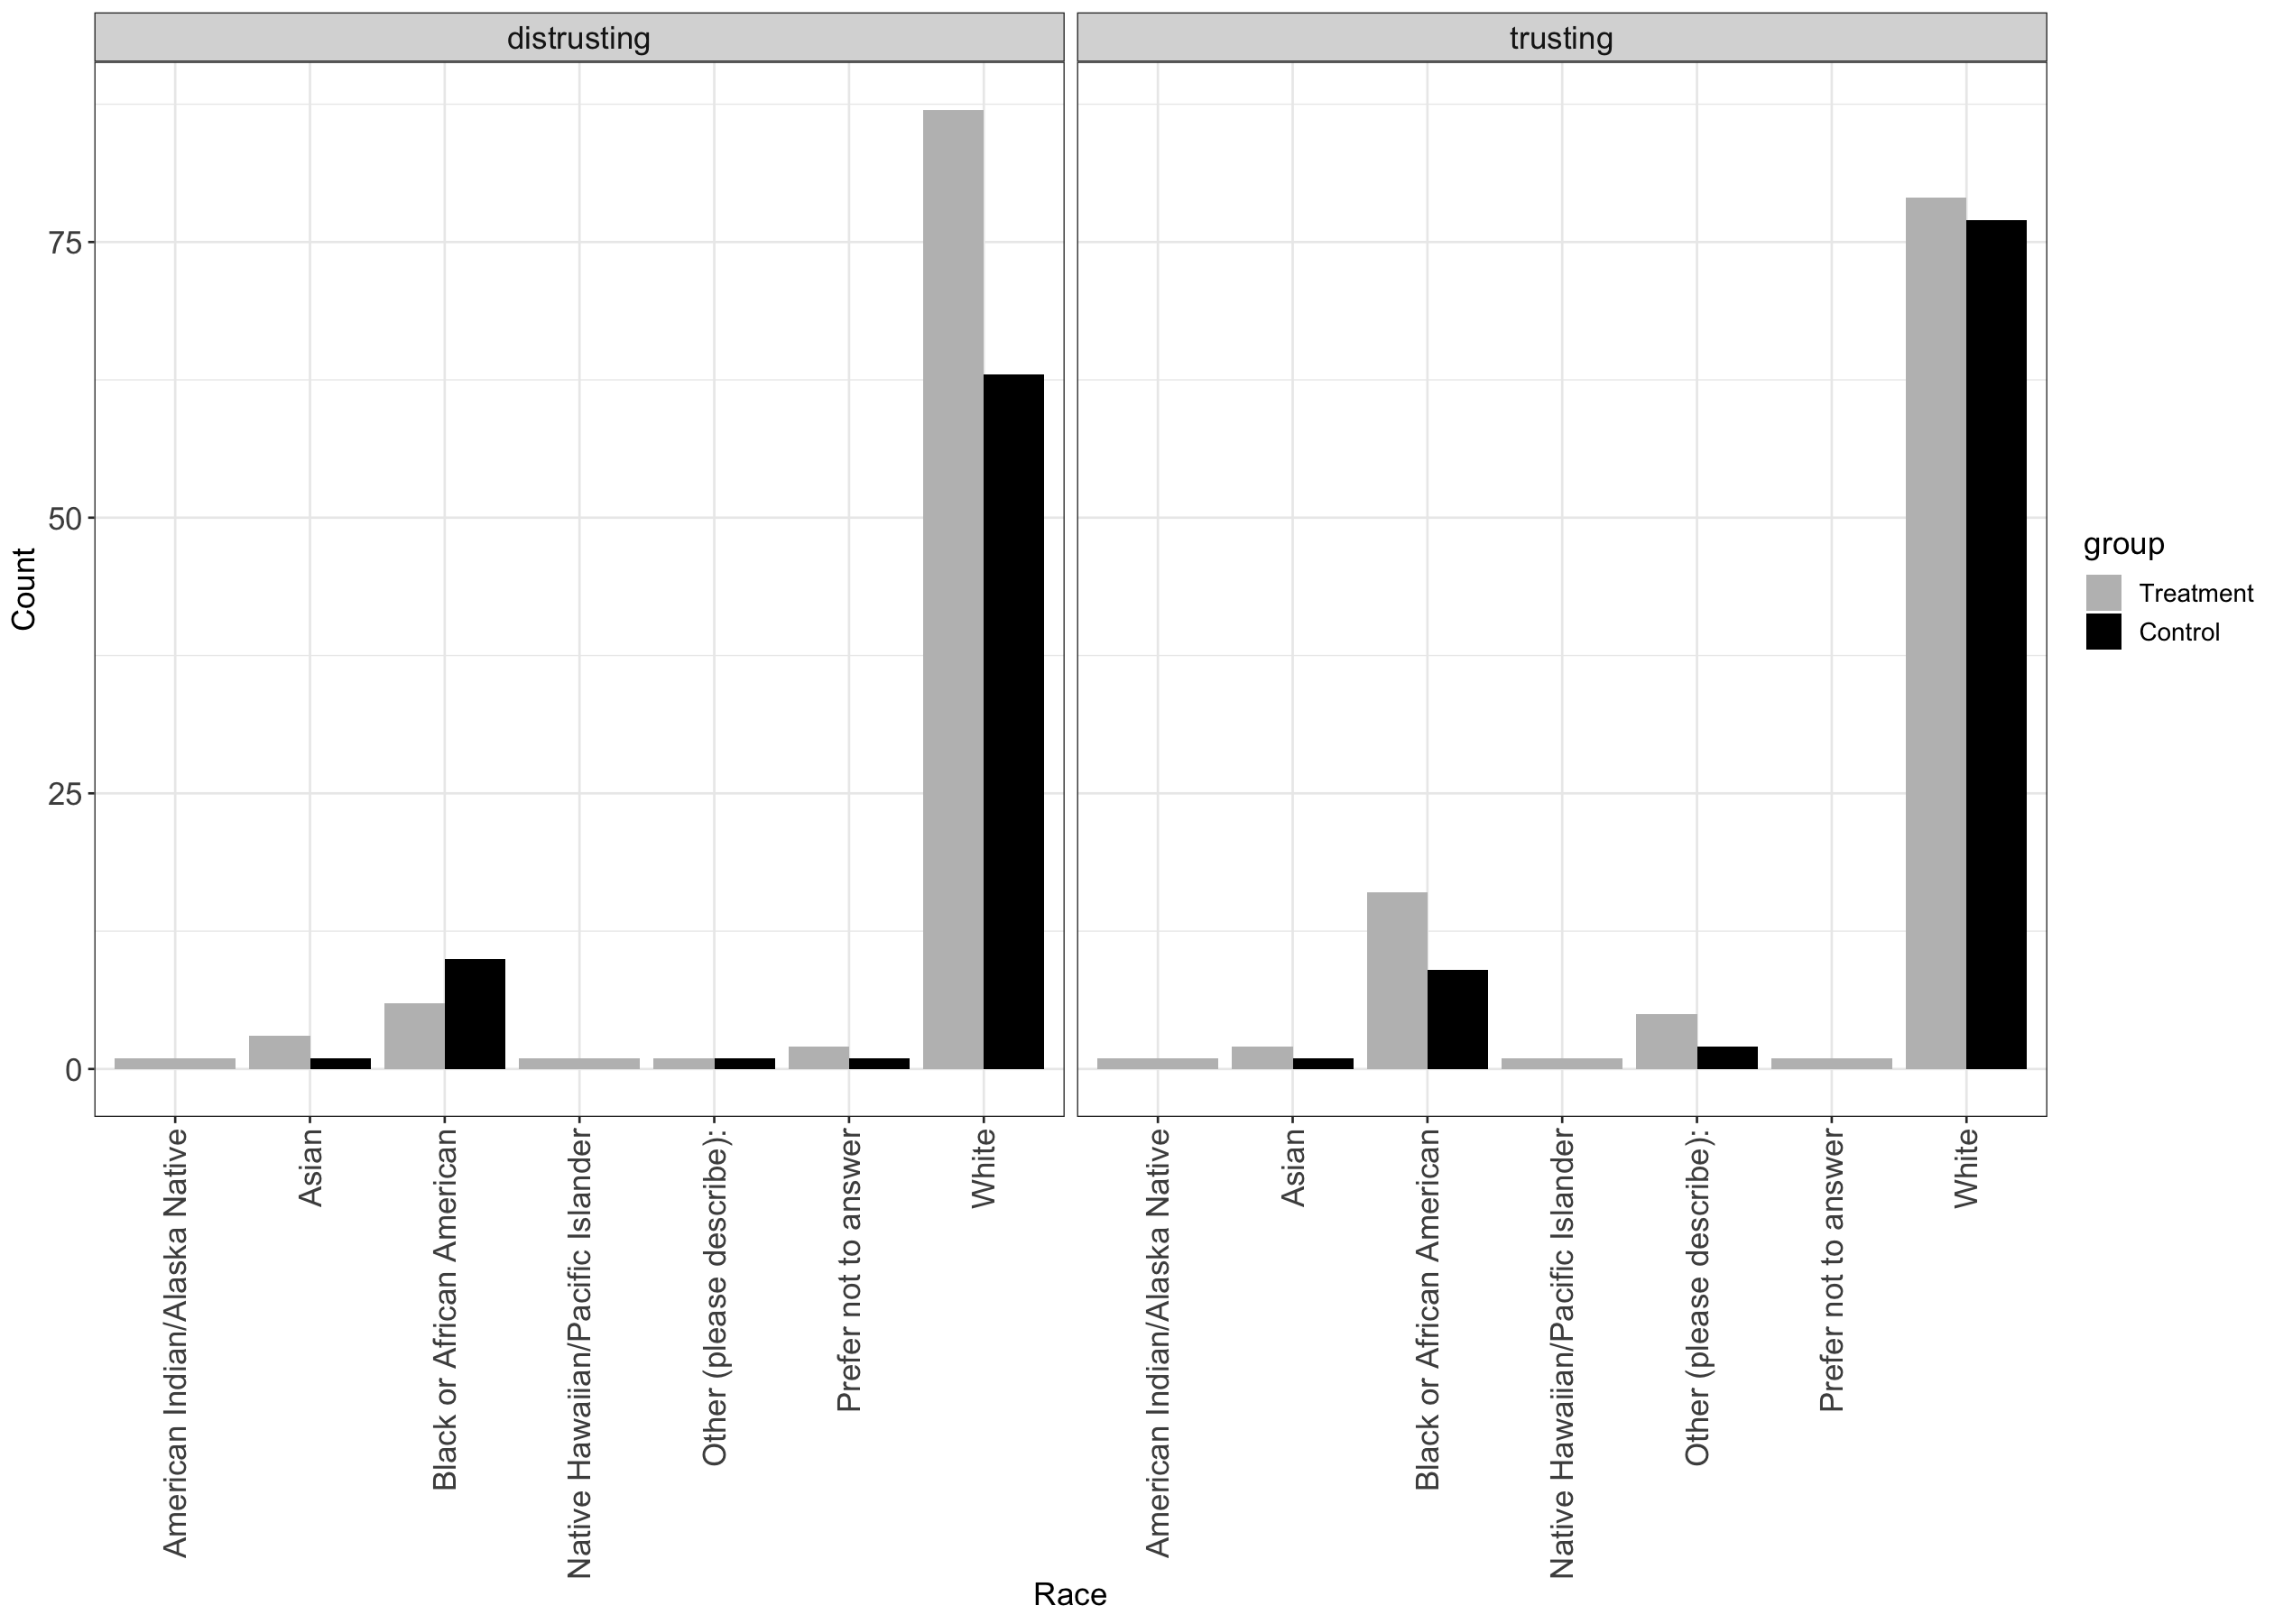

In [37]:
check_race = vcf_data %>% group_by(group, gov_trust_cat, race) %>% tally() 

options(repr.plot.width = 14, repr.plot.height = 10, repr.plot.res = 180)
check_race %>%
  ggplot(aes(x = race, y=n, fill=group)) +
  geom_bar(stat ='identity', position = position_dodge()) +
  theme_bw() + scale_fill_manual(values = c('gray', 'black')) +
  labs(x = "Race" , y= "Count") + 
  facet_wrap(~gov_trust_cat, ncol = 2) +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        strip.text.x = element_text(size = 14),
        text = element_text(size = 14)) + 
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) 

In [38]:
chisq.test(table(vcf_data$race[vcf_data$gov_trust_cat == "trusting"], 
                 vcf_data$group[vcf_data$gov_trust_cat == "trusting"]))

ks.test(check_race$n[(check_race$group == 'Control') & (check_race$gov_trust_cat == 'trusting')],
        check_race$n[(check_race$group == 'Treatment' )& (check_race$gov_trust_cat == 'trusting')])

chisq.test(table(vcf_data$race[vcf_data$gov_trust_cat == "distrusting"], 
                 vcf_data$group[vcf_data$gov_trust_cat == "distrusting"]))

ks.test(check_race$n[(check_race$group == 'Control') & (check_race$gov_trust_cat == 'distrusting')],
        check_race$n[(check_race$group == 'Treatment' )& (check_race$gov_trust_cat == 'distrusting')])

Warning message in chisq.test(table(vcf_data$race[vcf_data$gov_trust_cat == "trusting"], :
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(vcf_data$race[vcf_data$gov_trust_cat == "trusting"], vcf_data$group[vcf_data$gov_trust_cat ==     "trusting"])
X-squared = 5.3213, df = 6, p-value = 0.5033



	Exact two-sample Kolmogorov-Smirnov test

data:  check_race$n[(check_race$group == "Control") & (check_race$gov_trust_cat == "trusting")] and check_race$n[(check_race$group == "Treatment") & (check_race$gov_trust_cat == "trusting")]
D = 0.21429, p-value = 0.9758
alternative hypothesis: two-sided


Warning message in chisq.test(table(vcf_data$race[vcf_data$gov_trust_cat == "distrusting"], :
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(vcf_data$race[vcf_data$gov_trust_cat == "distrusting"],     vcf_data$group[vcf_data$gov_trust_cat == "distrusting"])
X-squared = 4.7368, df = 6, p-value = 0.578



	Exact two-sample Kolmogorov-Smirnov test

data:  check_race$n[(check_race$group == "Control") & (check_race$gov_trust_cat == "distrusting")] and check_race$n[(check_race$group == "Treatment") & (check_race$gov_trust_cat == "distrusting")]
D = 0.25714, p-value = 0.8232
alternative hypothesis: two-sided


# Gender distributions across subgroups and experimental groups

## Republican vs. Non-Republican

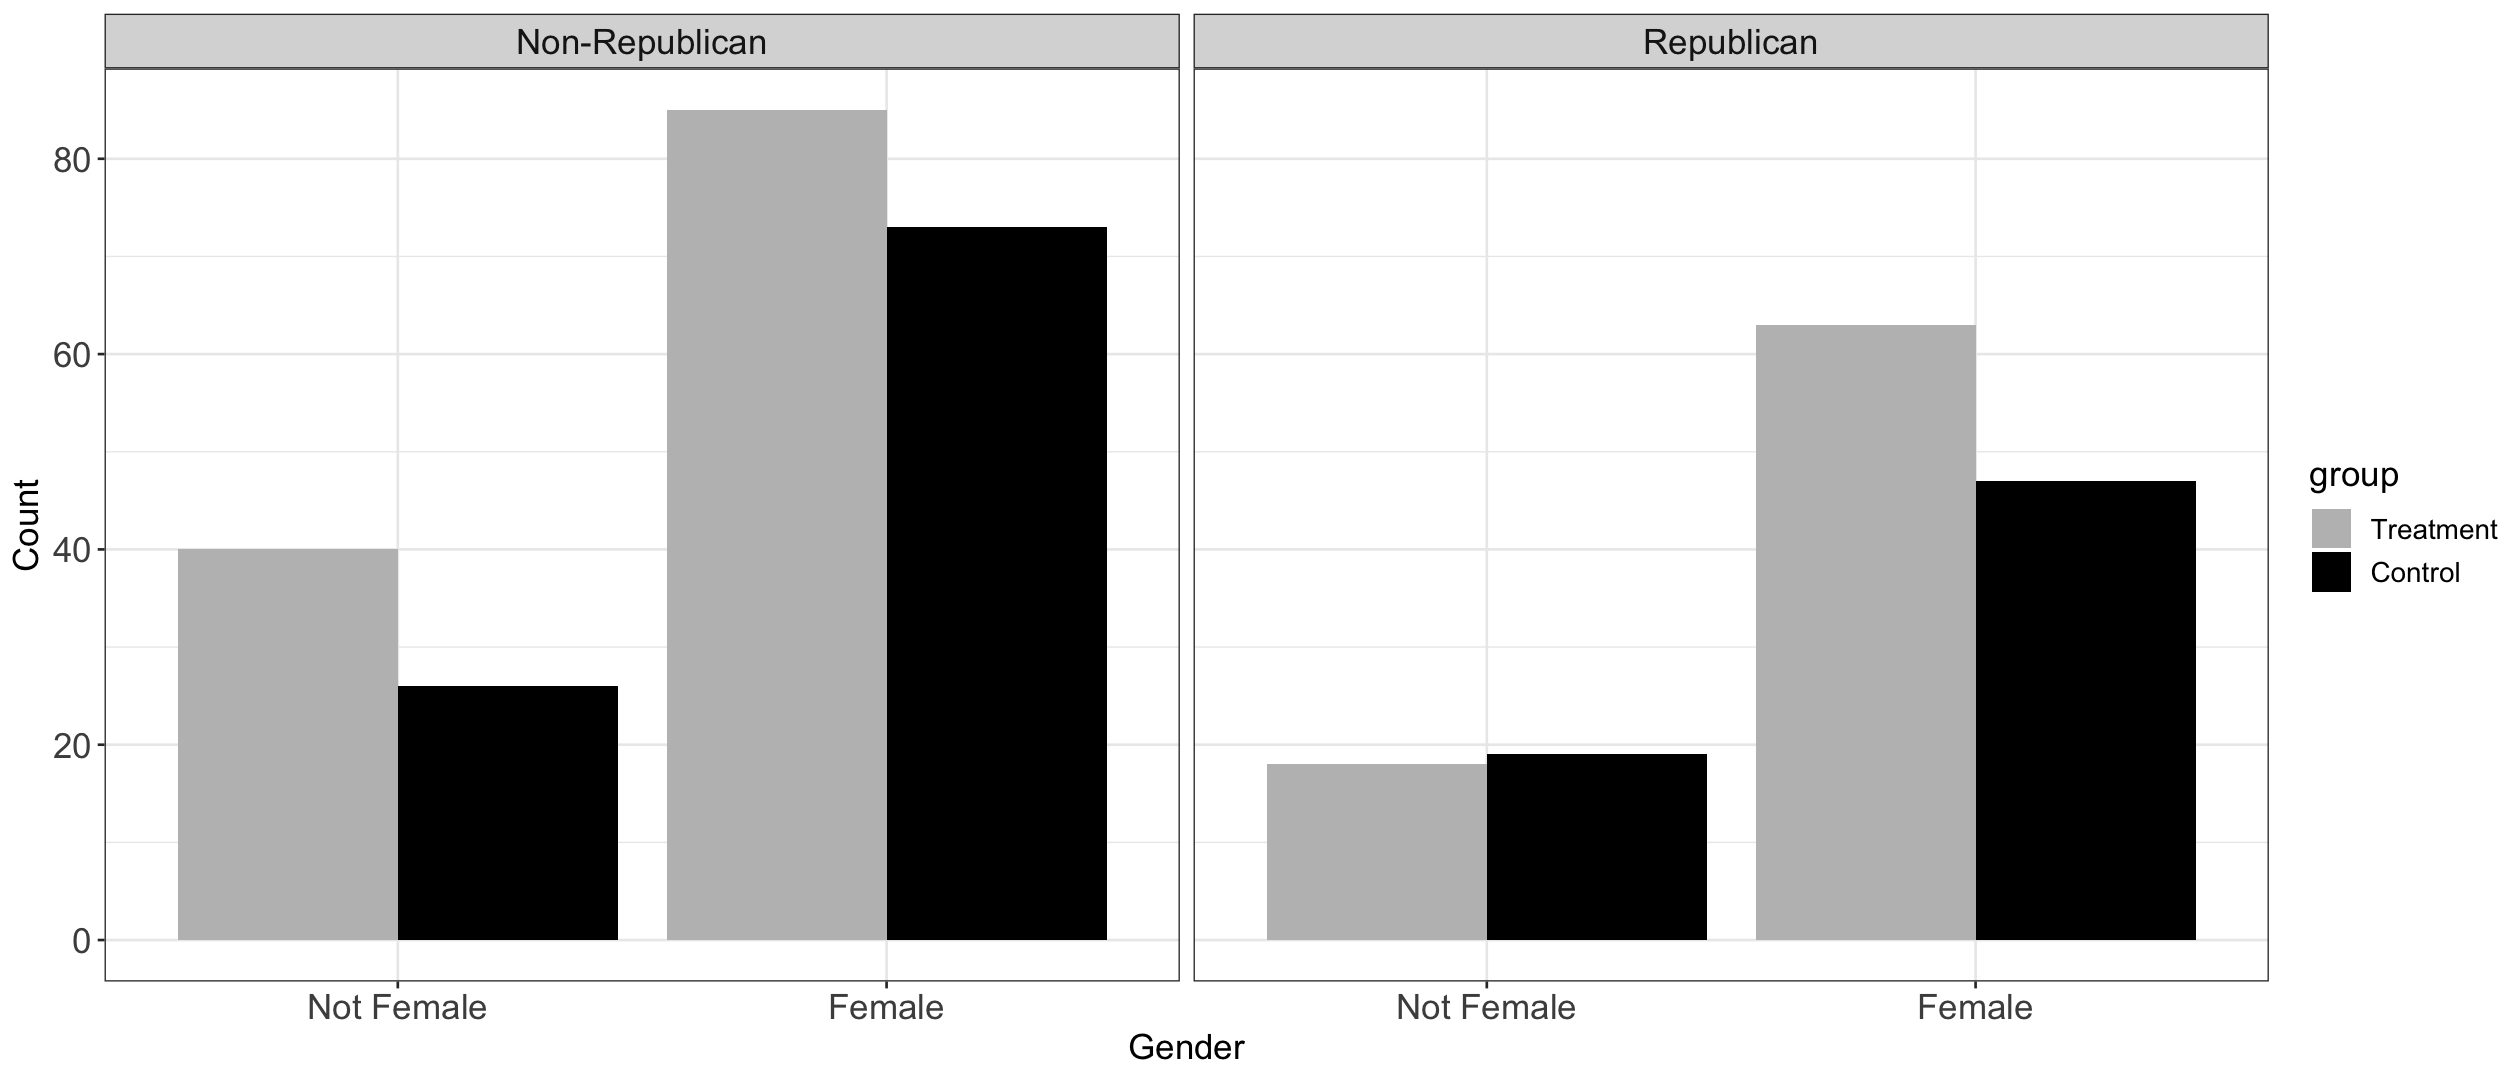

In [39]:
check_gender = vcf_data %>% group_by(group, republican, gender) %>% tally() 
check_gender$republican <- check_gender$republican %>% as.character()
check_gender$republican[check_gender$republican == "rep"] <- "Republican"
check_gender$republican[check_gender$republican == "nonrep"] <- "Non-Republican"

options(repr.plot.width = 14, repr.plot.height = 6, repr.plot.res = 180)
check_gender %>%
  ggplot(aes(x = gender, y=n, fill=group)) +
  geom_bar(stat ='identity', position = position_dodge()) +
  theme_bw() + scale_fill_manual(values = c('gray', 'black')) +
  labs(x = "Gender" , y= "Count") + 
  facet_wrap(~republican, ncol = 2) +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        strip.text.x = element_text(size = 14),
        text = element_text(size = 14)) 

In [40]:
chisq.test(table(vcf_data$gender[vcf_data$republican == "rep"], 
                 vcf_data$group[vcf_data$republican == "rep"]))

ks.test(check_gender$n[(check_gender$group == 'Control') & (check_gender$republican == 'Republican')],
        check_gender$n[(check_gender$group == 'Treatment' )& (check_gender$republican == 'Republican')])

chisq.test(table(vcf_data$gender[vcf_data$republican == "nonrep"], 
                 vcf_data$group[vcf_data$republican == "nonrep"]))

ks.test(check_gender$n[(check_gender$group == 'Control') & (check_gender$republican == 'Non-Republican')],
        check_gender$n[(check_gender$group == 'Treatment' )& (check_gender$republican == 'Non-Republican')])


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$gender[vcf_data$republican == "rep"], vcf_data$group[vcf_data$republican ==     "rep"])
X-squared = 0.52026, df = 1, p-value = 0.4707



	Exact two-sample Kolmogorov-Smirnov test

data:  check_gender$n[(check_gender$group == "Control") & (check_gender$republican == "Republican")] and check_gender$n[(check_gender$group == "Treatment") & (check_gender$republican == "Republican")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided



	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$gender[vcf_data$republican == "nonrep"], vcf_data$group[vcf_data$republican ==     "nonrep"])
X-squared = 0.62073, df = 1, p-value = 0.4308



	Exact two-sample Kolmogorov-Smirnov test

data:  check_gender$n[(check_gender$group == "Control") & (check_gender$republican == "Non-Republican")] and check_gender$n[(check_gender$group == "Treatment") & (check_gender$republican == "Non-Republican")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided


## Conservatives vs. Non-Conservatives

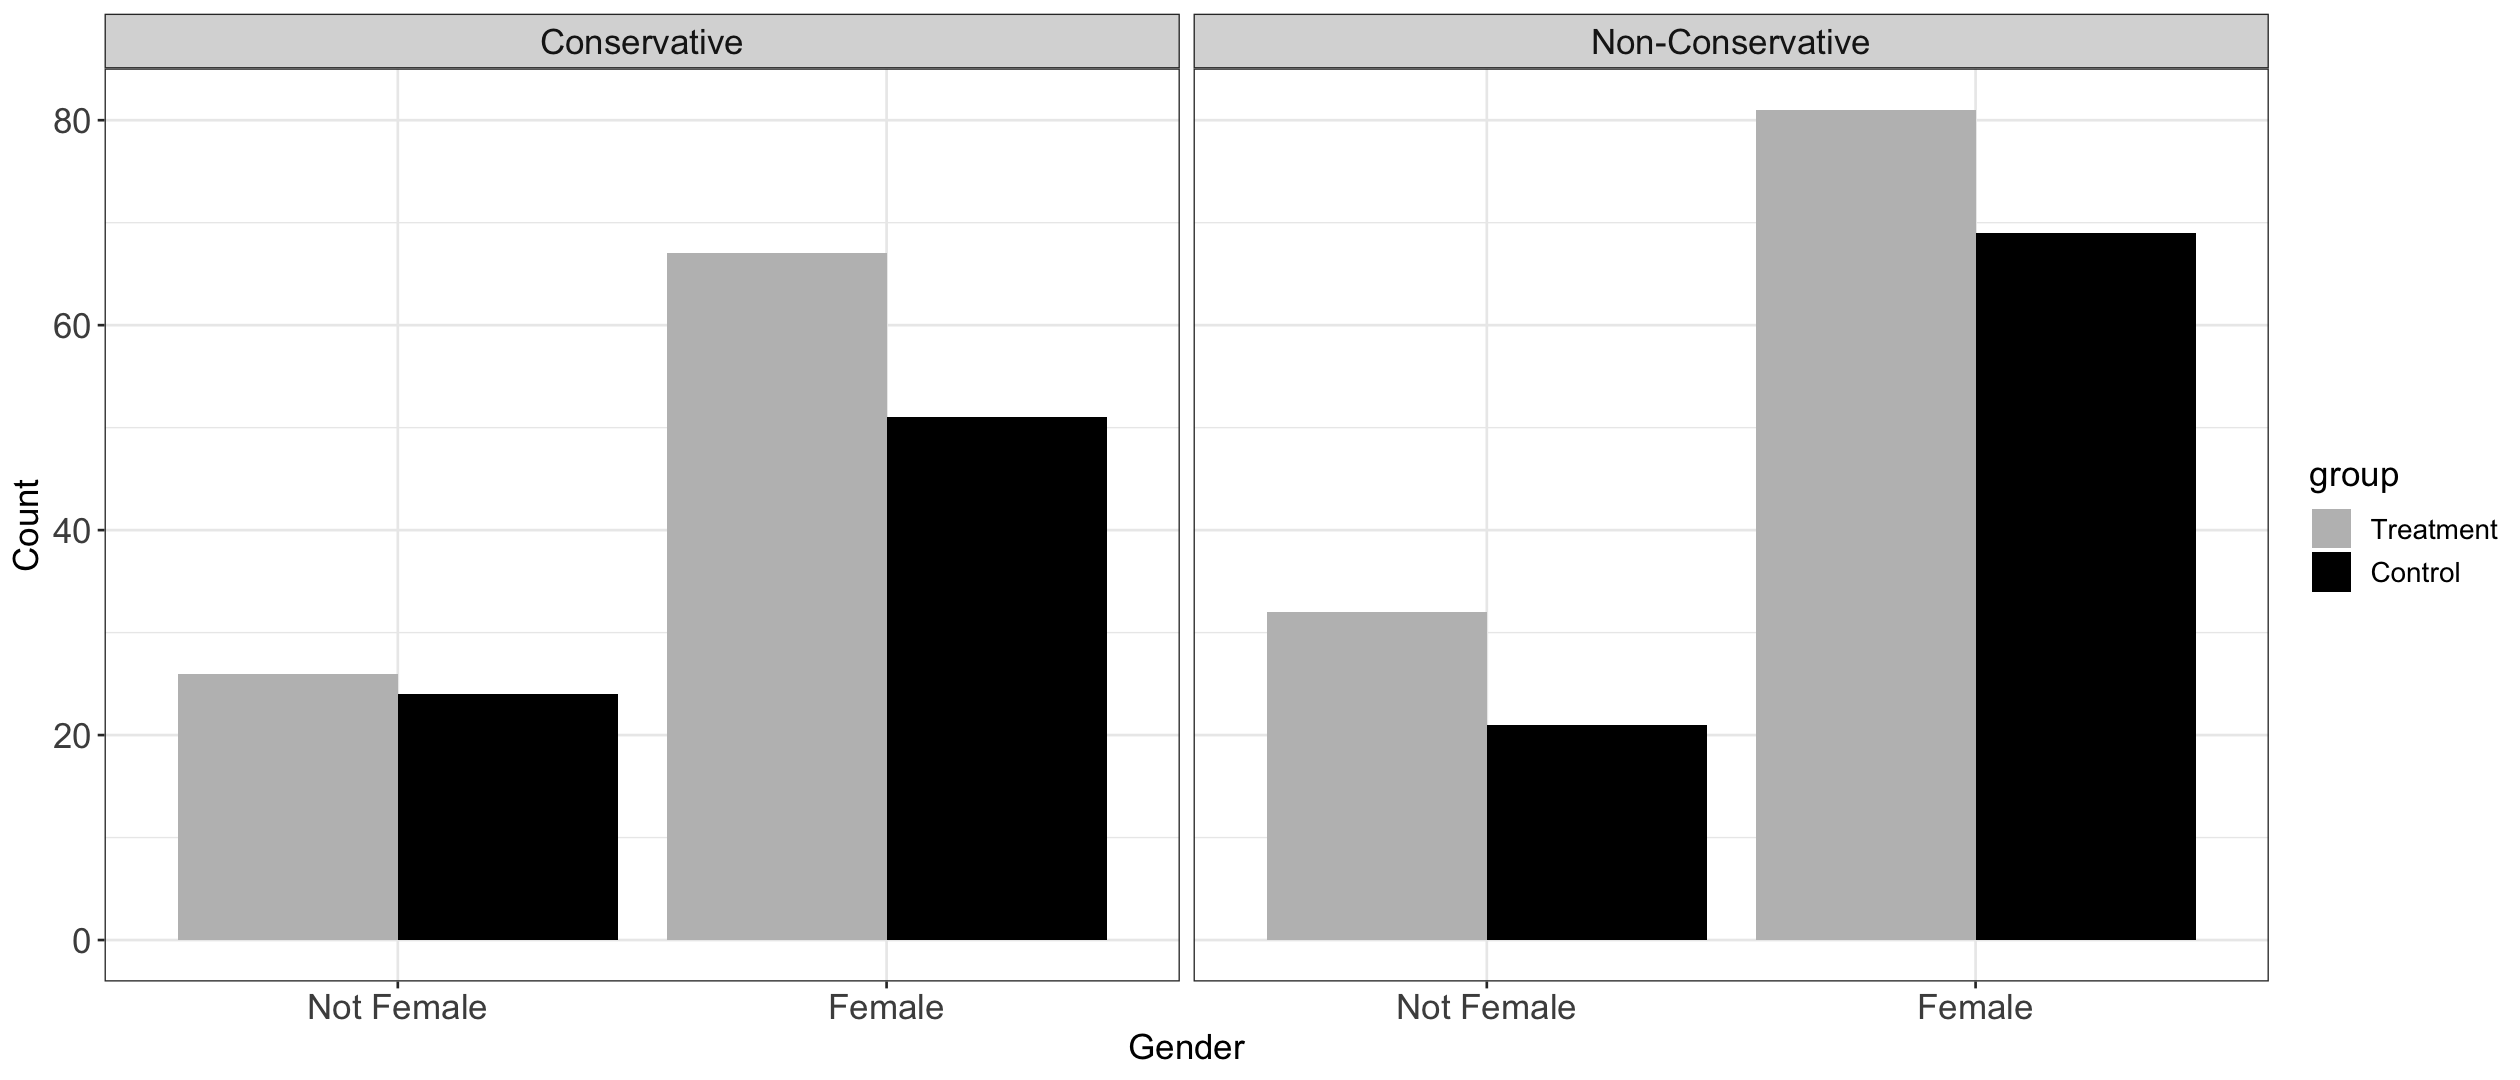

In [41]:
check_gender = vcf_data %>% group_by(group, conservative, gender) %>% tally() 
check_gender$conservative <- check_gender$conservative %>% as.character()
check_gender$conservative[check_gender$conservative == "conserv"] <- "Conservative"
check_gender$conservative[check_gender$conservative == "nonconserv"] <- "Non-Conservative"

options(repr.plot.width = 14, repr.plot.height = 6, repr.plot.res = 180)
check_gender %>%
  ggplot(aes(x = gender, y=n, fill=group)) +
  geom_bar(stat ='identity', position = position_dodge()) +
  theme_bw() + scale_fill_manual(values = c('gray', 'black')) +
  labs(x = "Gender" , y= "Count") + 
  facet_wrap(~conservative, ncol = 2) +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        strip.text.x = element_text(size = 14),
        text = element_text(size = 14)) 

In [42]:
chisq.test(table(vcf_data$gender[vcf_data$conservative == "conserv"], 
                 vcf_data$group[vcf_data$conservative == "conserv"]))

ks.test(check_gender$n[(check_gender$group == 'Control') & (check_gender$conservative == 'Conservative')],
        check_gender$n[(check_gender$group == 'Treatment' )& (check_gender$conservative == 'Conservative')])

chisq.test(table(vcf_data$gender[vcf_data$conservative == "nonconserv"], 
                 vcf_data$group[vcf_data$conservative == "nonconserv"]))

ks.test(check_gender$n[(check_gender$group == 'Control') & (check_gender$conservative == 'Non-Conservative')],
        check_gender$n[(check_gender$group == 'Treatment' )& (check_gender$conservative == 'Non-Conservative')])


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$gender[vcf_data$conservative == "conserv"], vcf_data$group[vcf_data$conservative ==     "conserv"])
X-squared = 0.16005, df = 1, p-value = 0.6891



	Exact two-sample Kolmogorov-Smirnov test

data:  check_gender$n[(check_gender$group == "Control") & (check_gender$conservative == "Conservative")] and check_gender$n[(check_gender$group == "Treatment") & (check_gender$conservative == "Conservative")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided



	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$gender[vcf_data$conservative == "nonconserv"],     vcf_data$group[vcf_data$conservative == "nonconserv"])
X-squared = 0.41285, df = 1, p-value = 0.5205



	Exact two-sample Kolmogorov-Smirnov test

data:  check_gender$n[(check_gender$group == "Control") & (check_gender$conservative == "Non-Conservative")] and check_gender$n[(check_gender$group == "Treatment") & (check_gender$conservative == "Non-Conservative")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided


## Trusting vs. Distrusting PHIs

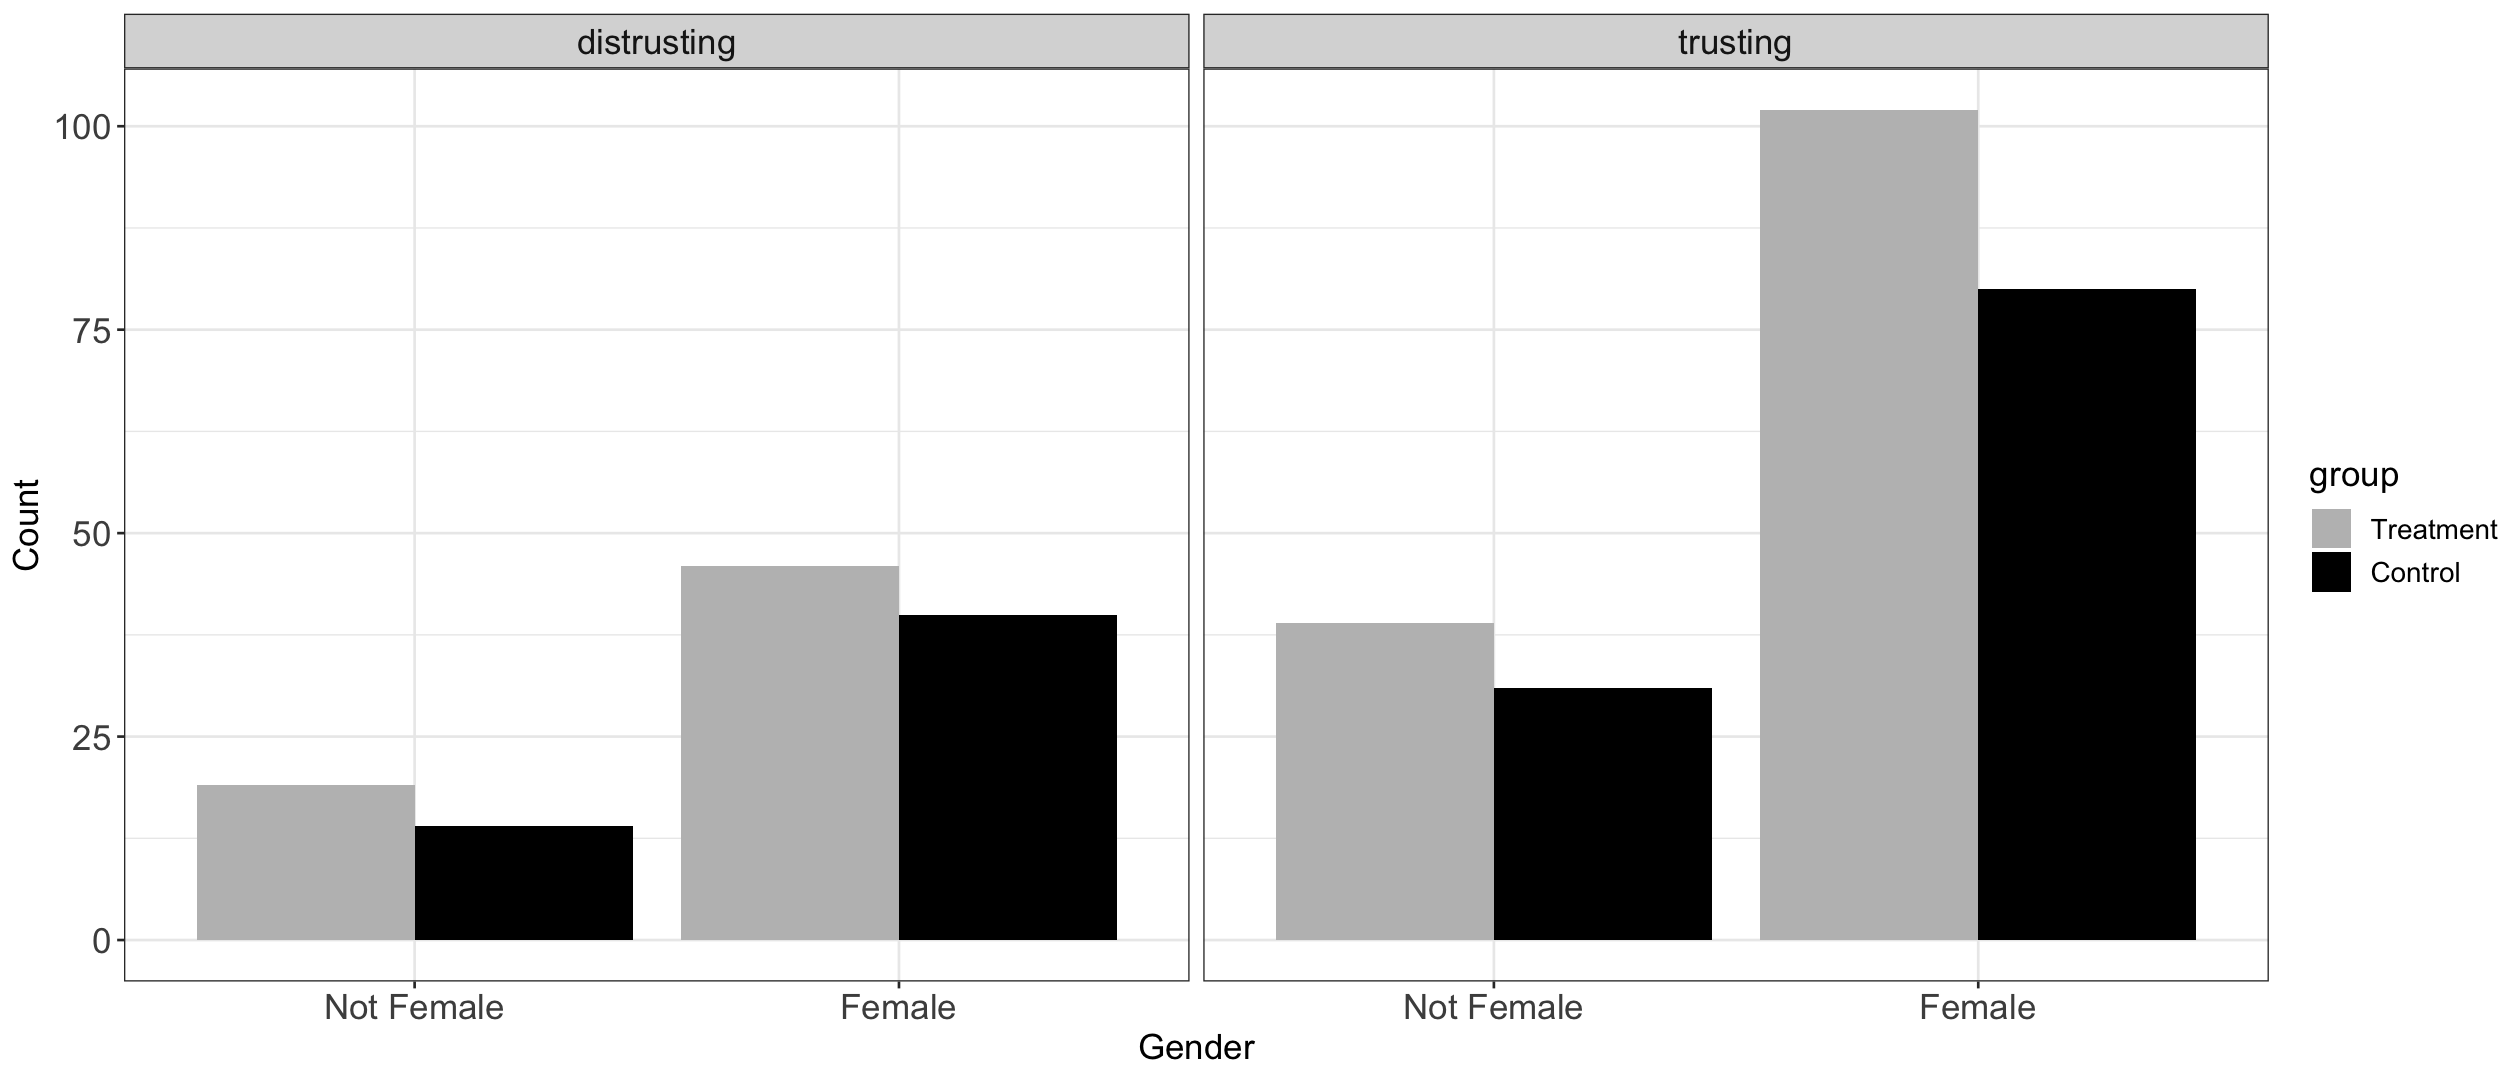

In [43]:
check_gender = vcf_data %>% group_by(group, phi_trust_cat, gender) %>% tally() 

options(repr.plot.width = 14, repr.plot.height = 6, repr.plot.res = 180)
check_gender %>%
  ggplot(aes(x = gender, y=n, fill=group)) +
  geom_bar(stat ='identity', position = position_dodge()) +
  theme_bw() + scale_fill_manual(values = c('gray', 'black')) +
  labs(x = "Gender" , y= "Count") + 
  facet_wrap(~phi_trust_cat, ncol = 2) +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        strip.text.x = element_text(size = 14),
        text = element_text(size = 14)) 

In [44]:
chisq.test(table(vcf_data$gender[vcf_data$phi_trust_cat == "trusting"], 
                 vcf_data$group[vcf_data$phi_trust_cat == "trusting"]))

ks.test(check_gender$n[(check_gender$group == 'Control') & (check_gender$phi_trust_cat == 'trusting')],
        check_gender$n[(check_gender$group == 'Treatment' )& (check_gender$phi_trust_cat == 'trusting')])

chisq.test(table(vcf_data$gender[vcf_data$phi_trust_cat == "distrusting"], 
                 vcf_data$group[vcf_data$phi_trust_cat == "distrusting"]))

ks.test(check_gender$n[(check_gender$group == 'Control') & (check_gender$phi_trust_cat == 'distrusting')],
        check_gender$n[(check_gender$group == 'Treatment' )& (check_gender$phi_trust_cat == 'distrusting')])


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$gender[vcf_data$phi_trust_cat == "trusting"],     vcf_data$group[vcf_data$phi_trust_cat == "trusting"])
X-squared = 1.5349e-30, df = 1, p-value = 1



	Exact two-sample Kolmogorov-Smirnov test

data:  check_gender$n[(check_gender$group == "Control") & (check_gender$phi_trust_cat == "trusting")] and check_gender$n[(check_gender$group == "Treatment") & (check_gender$phi_trust_cat == "trusting")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided



	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$gender[vcf_data$phi_trust_cat == "distrusting"],     vcf_data$group[vcf_data$phi_trust_cat == "distrusting"])
X-squared = 0.038135, df = 1, p-value = 0.8452



	Exact two-sample Kolmogorov-Smirnov test

data:  check_gender$n[(check_gender$group == "Control") & (check_gender$phi_trust_cat == "distrusting")] and check_gender$n[(check_gender$group == "Treatment") & (check_gender$phi_trust_cat == "distrusting")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided


## Trusting vs. Distrusting Governmental Institutions

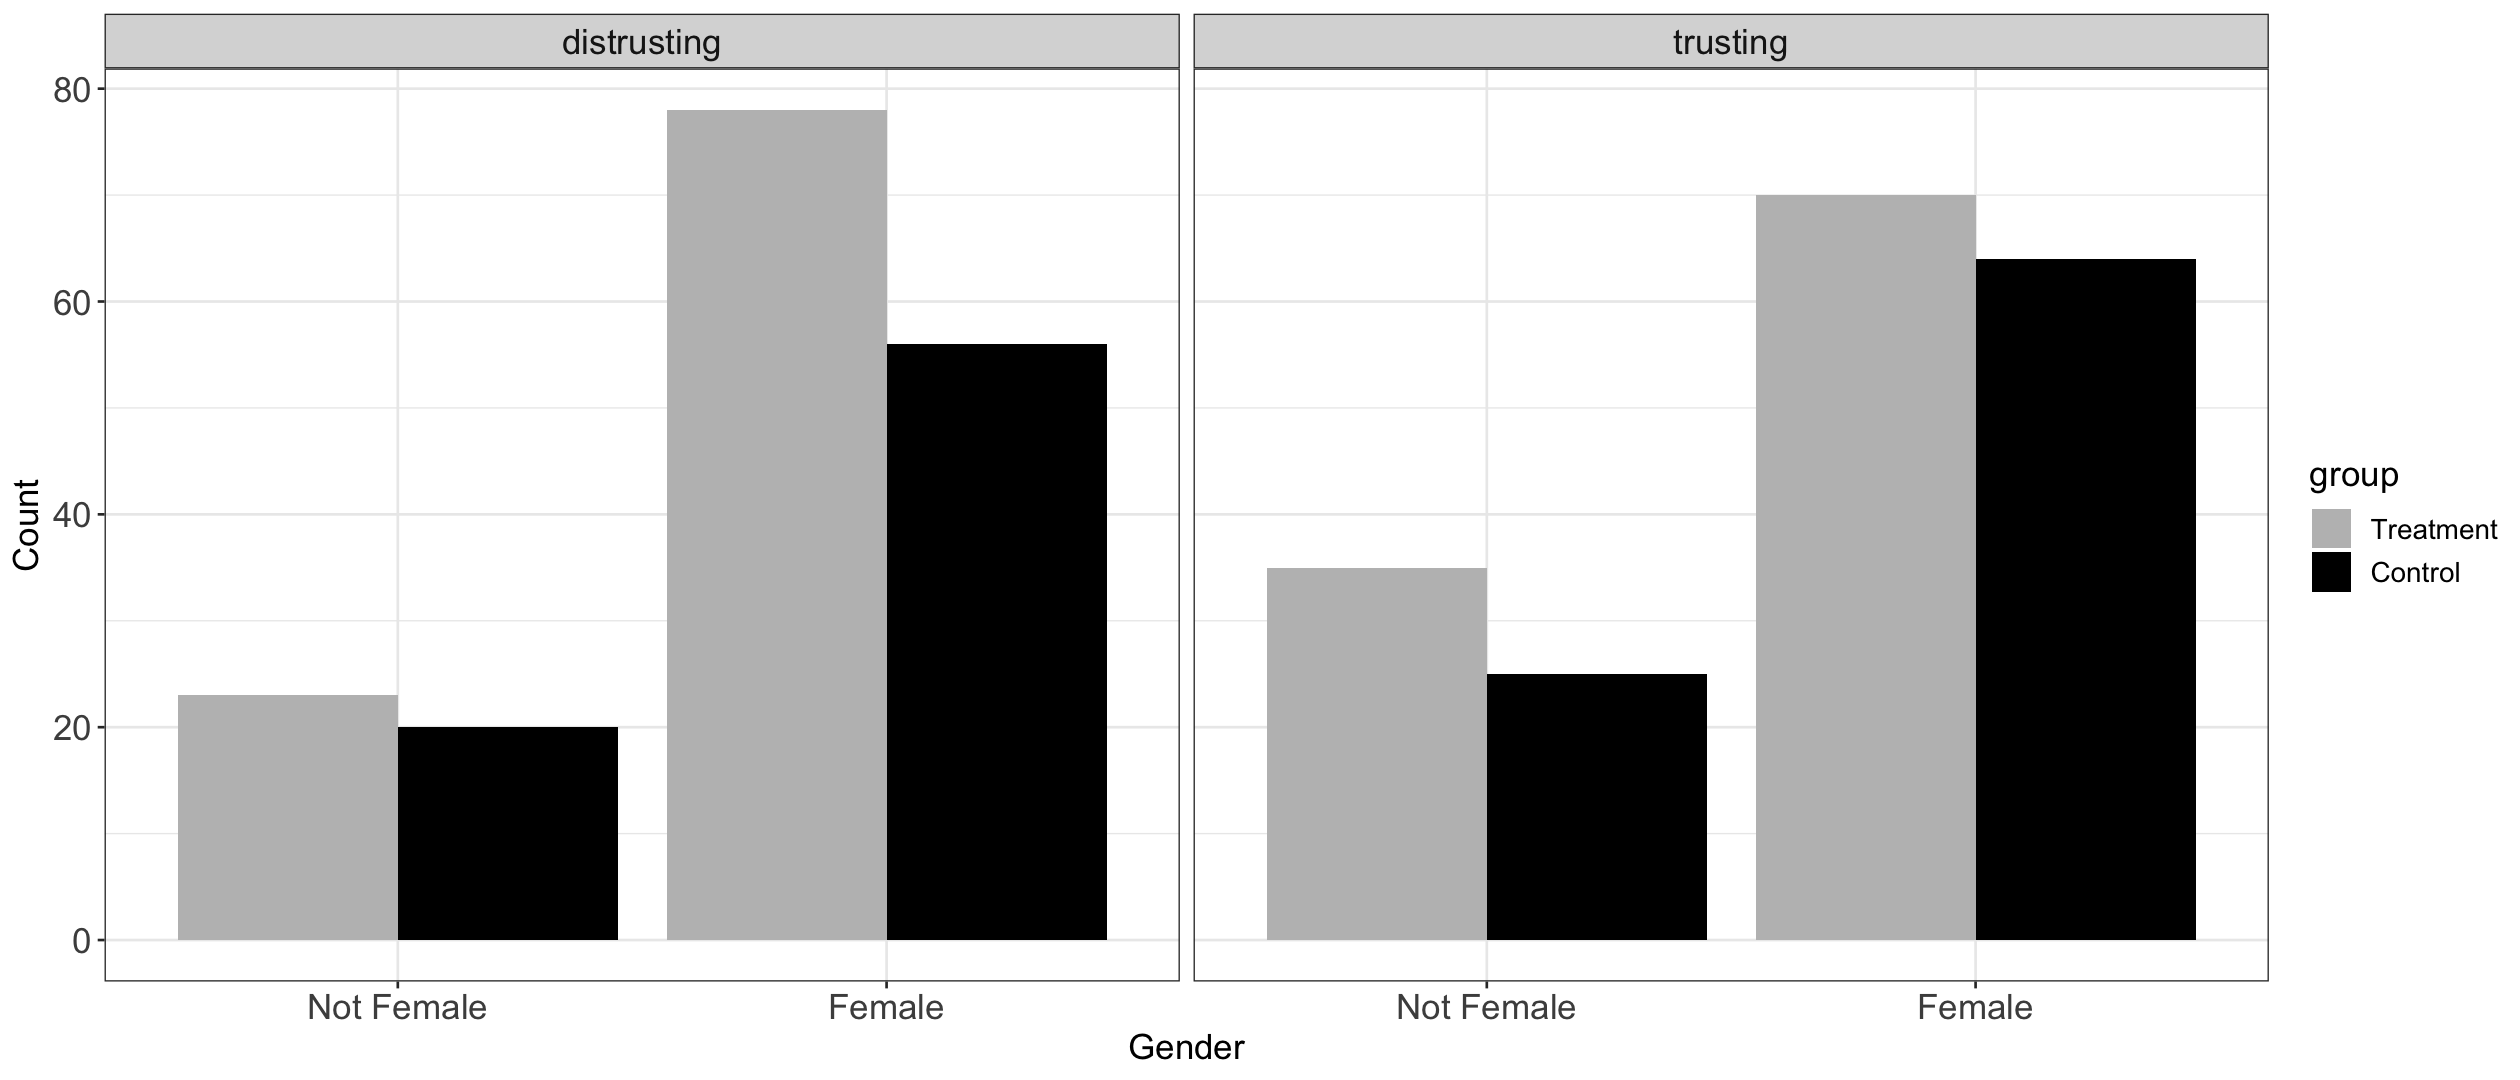

In [45]:
check_gender = vcf_data %>% group_by(group, gov_trust_cat, gender) %>% tally() 

options(repr.plot.width = 14, repr.plot.height = 6, repr.plot.res = 180)
check_gender %>%
  ggplot(aes(x = gender, y=n, fill=group)) +
  geom_bar(stat ='identity', position = position_dodge()) +
  theme_bw() + scale_fill_manual(values = c('gray', 'black')) +
  labs(x = "Gender" , y= "Count") + 
  facet_wrap(~gov_trust_cat, ncol = 2) +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        strip.text.x = element_text(size = 14),
        text = element_text(size = 14)) 

In [46]:
chisq.test(table(vcf_data$gender[vcf_data$gov_trust_cat == "trusting"], 
                 vcf_data$group[vcf_data$gov_trust_cat == "trusting"]))

ks.test(check_gender$n[(check_gender$group == 'Control') & (check_gender$gov_trust_cat == 'trusting')],
        check_gender$n[(check_gender$group == 'Treatment' )& (check_gender$gov_trust_cat == 'trusting')])

chisq.test(table(vcf_data$gender[vcf_data$gov_trust_cat == "distrusting"], 
                 vcf_data$group[vcf_data$gov_trust_cat == "distrusting"]))

ks.test(check_gender$n[(check_gender$group == 'Control') & (check_gender$gov_trust_cat == 'distrusting')],
        check_gender$n[(check_gender$group == 'Treatment' )& (check_gender$gov_trust_cat == 'distrusting')])


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$gender[vcf_data$gov_trust_cat == "trusting"],     vcf_data$group[vcf_data$gov_trust_cat == "trusting"])
X-squared = 0.3988, df = 1, p-value = 0.5277



	Exact two-sample Kolmogorov-Smirnov test

data:  check_gender$n[(check_gender$group == "Control") & (check_gender$gov_trust_cat == "trusting")] and check_gender$n[(check_gender$group == "Treatment") & (check_gender$gov_trust_cat == "trusting")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided



	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$gender[vcf_data$gov_trust_cat == "distrusting"],     vcf_data$group[vcf_data$gov_trust_cat == "distrusting"])
X-squared = 0.13475, df = 1, p-value = 0.7136



	Exact two-sample Kolmogorov-Smirnov test

data:  check_gender$n[(check_gender$group == "Control") & (check_gender$gov_trust_cat == "distrusting")] and check_gender$n[(check_gender$group == "Treatment") & (check_gender$gov_trust_cat == "distrusting")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided


# Marital Status distributions across subgroups and experimental groups

## Republican vs. Non-Republican

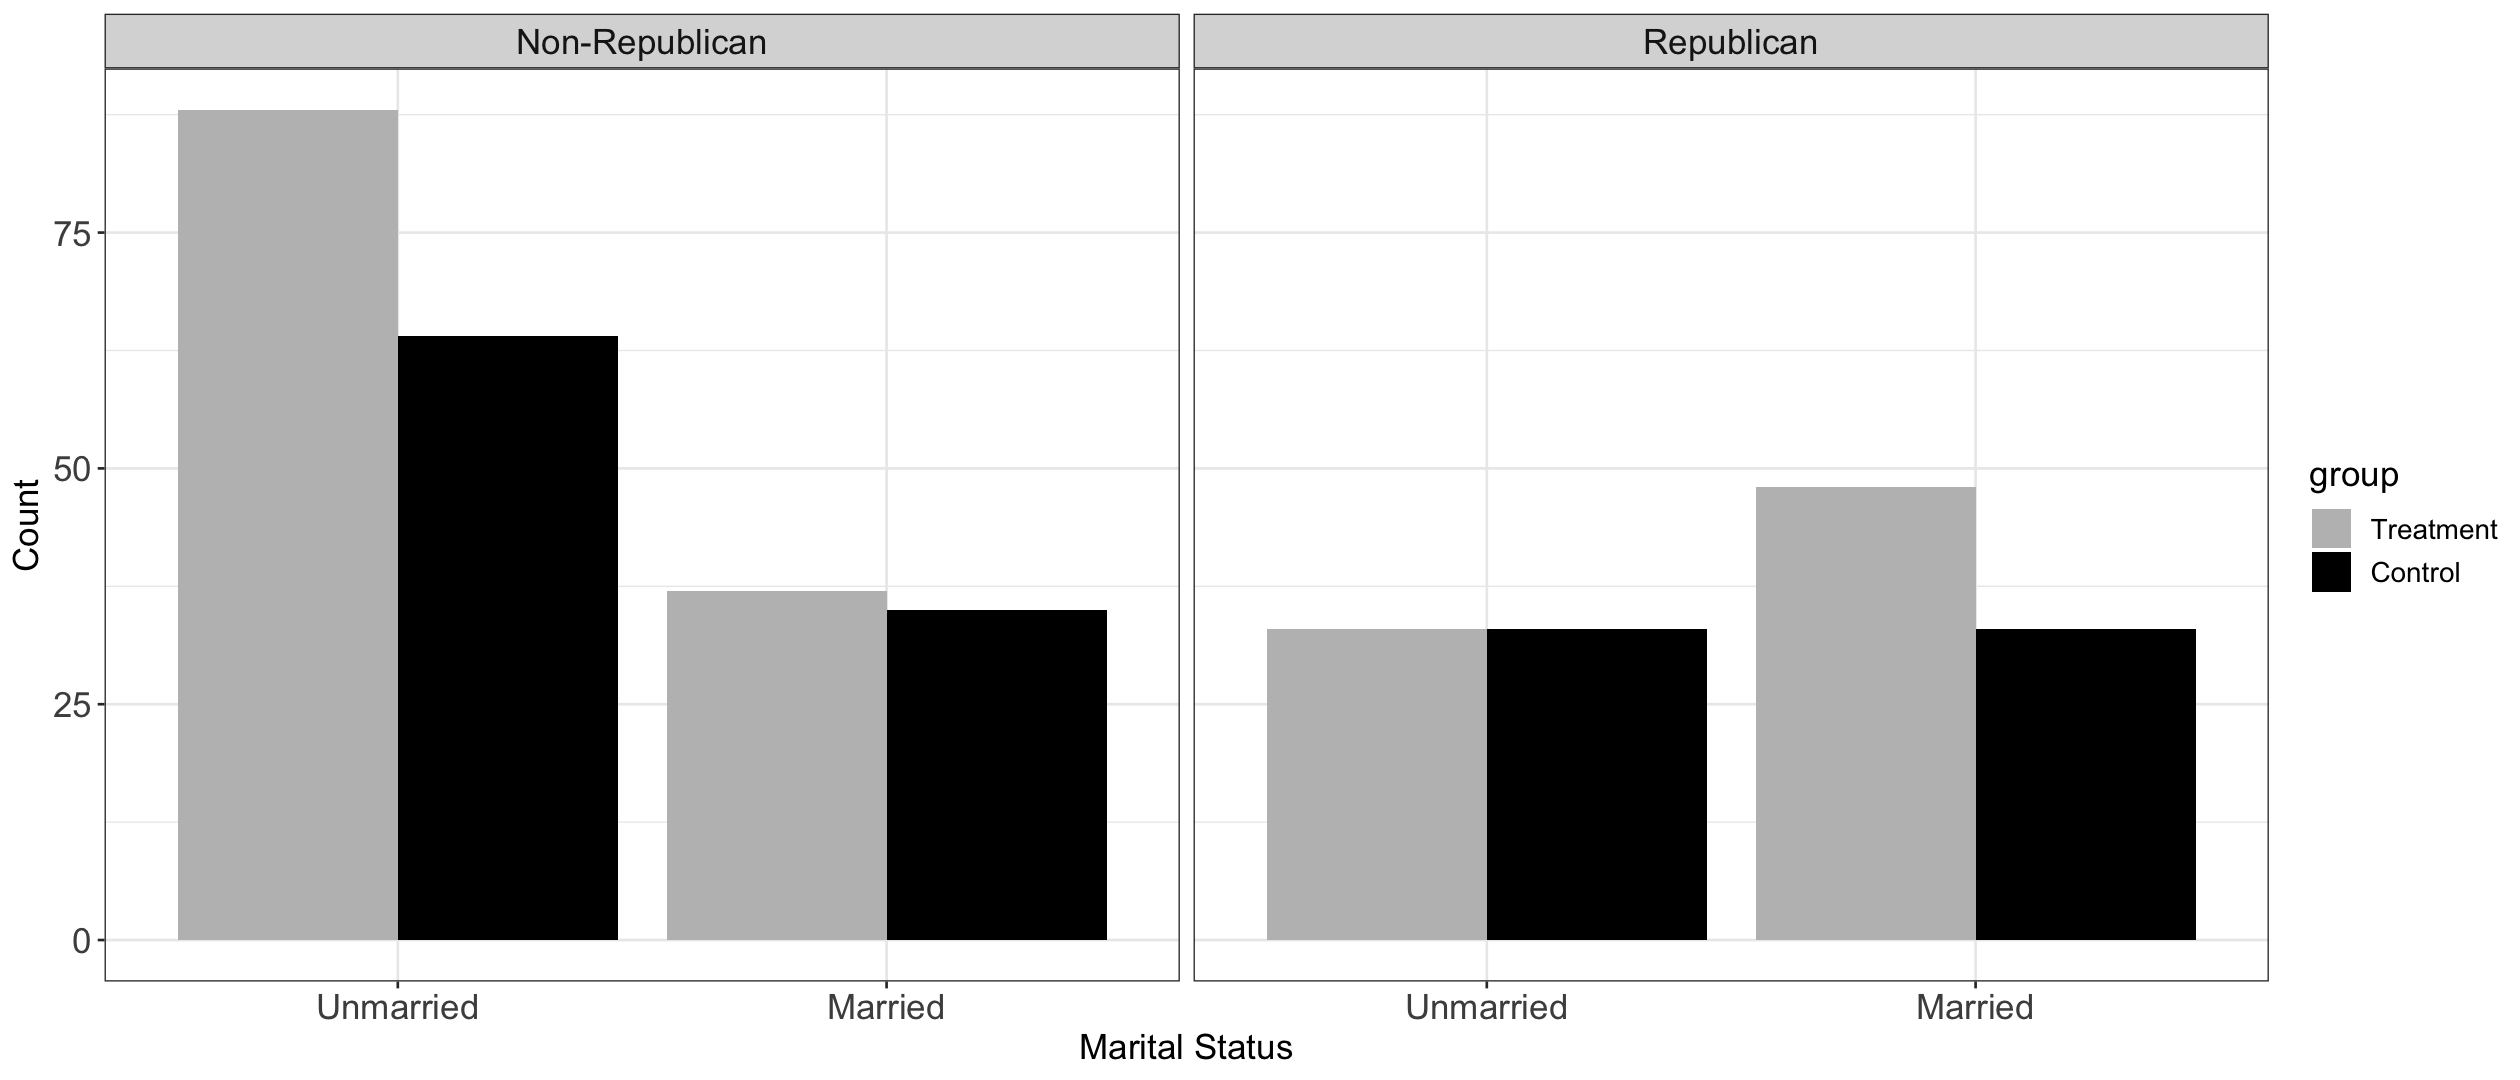

In [47]:
check_marital_status = vcf_data %>% group_by(group, republican, marital_status) %>% tally() 
check_marital_status$republican <- check_marital_status$republican %>% as.character()
check_marital_status$republican[check_marital_status$republican == "rep"] <- "Republican"
check_marital_status$republican[check_marital_status$republican == "nonrep"] <- "Non-Republican"

options(repr.plot.width = 14, repr.plot.height = 6, repr.plot.res = 180)
check_marital_status %>%
  ggplot(aes(x = marital_status, y=n, fill=group)) +
  geom_bar(stat ='identity', position = position_dodge()) +
  theme_bw() + scale_fill_manual(values = c('gray', 'black')) +
  labs(x = "Marital Status" , y= "Count") + 
  facet_wrap(~republican, ncol = 2) +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        strip.text.x = element_text(size = 14),
        text = element_text(size = 14)) 

In [48]:
chisq.test(table(vcf_data$marital_status[vcf_data$republican == "rep"], 
                 vcf_data$group[vcf_data$republican == "rep"]))

ks.test(check_marital_status$n[(check_marital_status$group == 'Control') & (check_marital_status$republican == 'Republican')],
        check_marital_status$n[(check_marital_status$group == 'Treatment' )& (check_marital_status$republican == 'Republican')])

chisq.test(table(vcf_data$marital_status[vcf_data$republican == "nonrep"], 
                 vcf_data$group[vcf_data$republican == "nonrep"]))

ks.test(check_marital_status$n[(check_marital_status$group == 'Control') & (check_marital_status$republican == 'Non-Republican')],
        check_marital_status$n[(check_marital_status$group == 'Treatment' )& (check_marital_status$republican == 'Non-Republican')])


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$marital_status[vcf_data$republican == "rep"],     vcf_data$group[vcf_data$republican == "rep"])
X-squared = 0.91381, df = 1, p-value = 0.3391



	Exact two-sample Kolmogorov-Smirnov test

data:  check_marital_status$n[(check_marital_status$group == "Control") & (check_marital_status$republican == "Republican")] and check_marital_status$n[(check_marital_status$group == "Treatment") & (check_marital_status$republican == "Republican")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided



	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$marital_status[vcf_data$republican == "nonrep"],     vcf_data$group[vcf_data$republican == "nonrep"])
X-squared = 0.59543, df = 1, p-value = 0.4403



	Exact two-sample Kolmogorov-Smirnov test

data:  check_marital_status$n[(check_marital_status$group == "Control") & (check_marital_status$republican == "Non-Republican")] and check_marital_status$n[(check_marital_status$group == "Treatment") & (check_marital_status$republican == "Non-Republican")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided


## Conservatives vs. Non-Conservatives

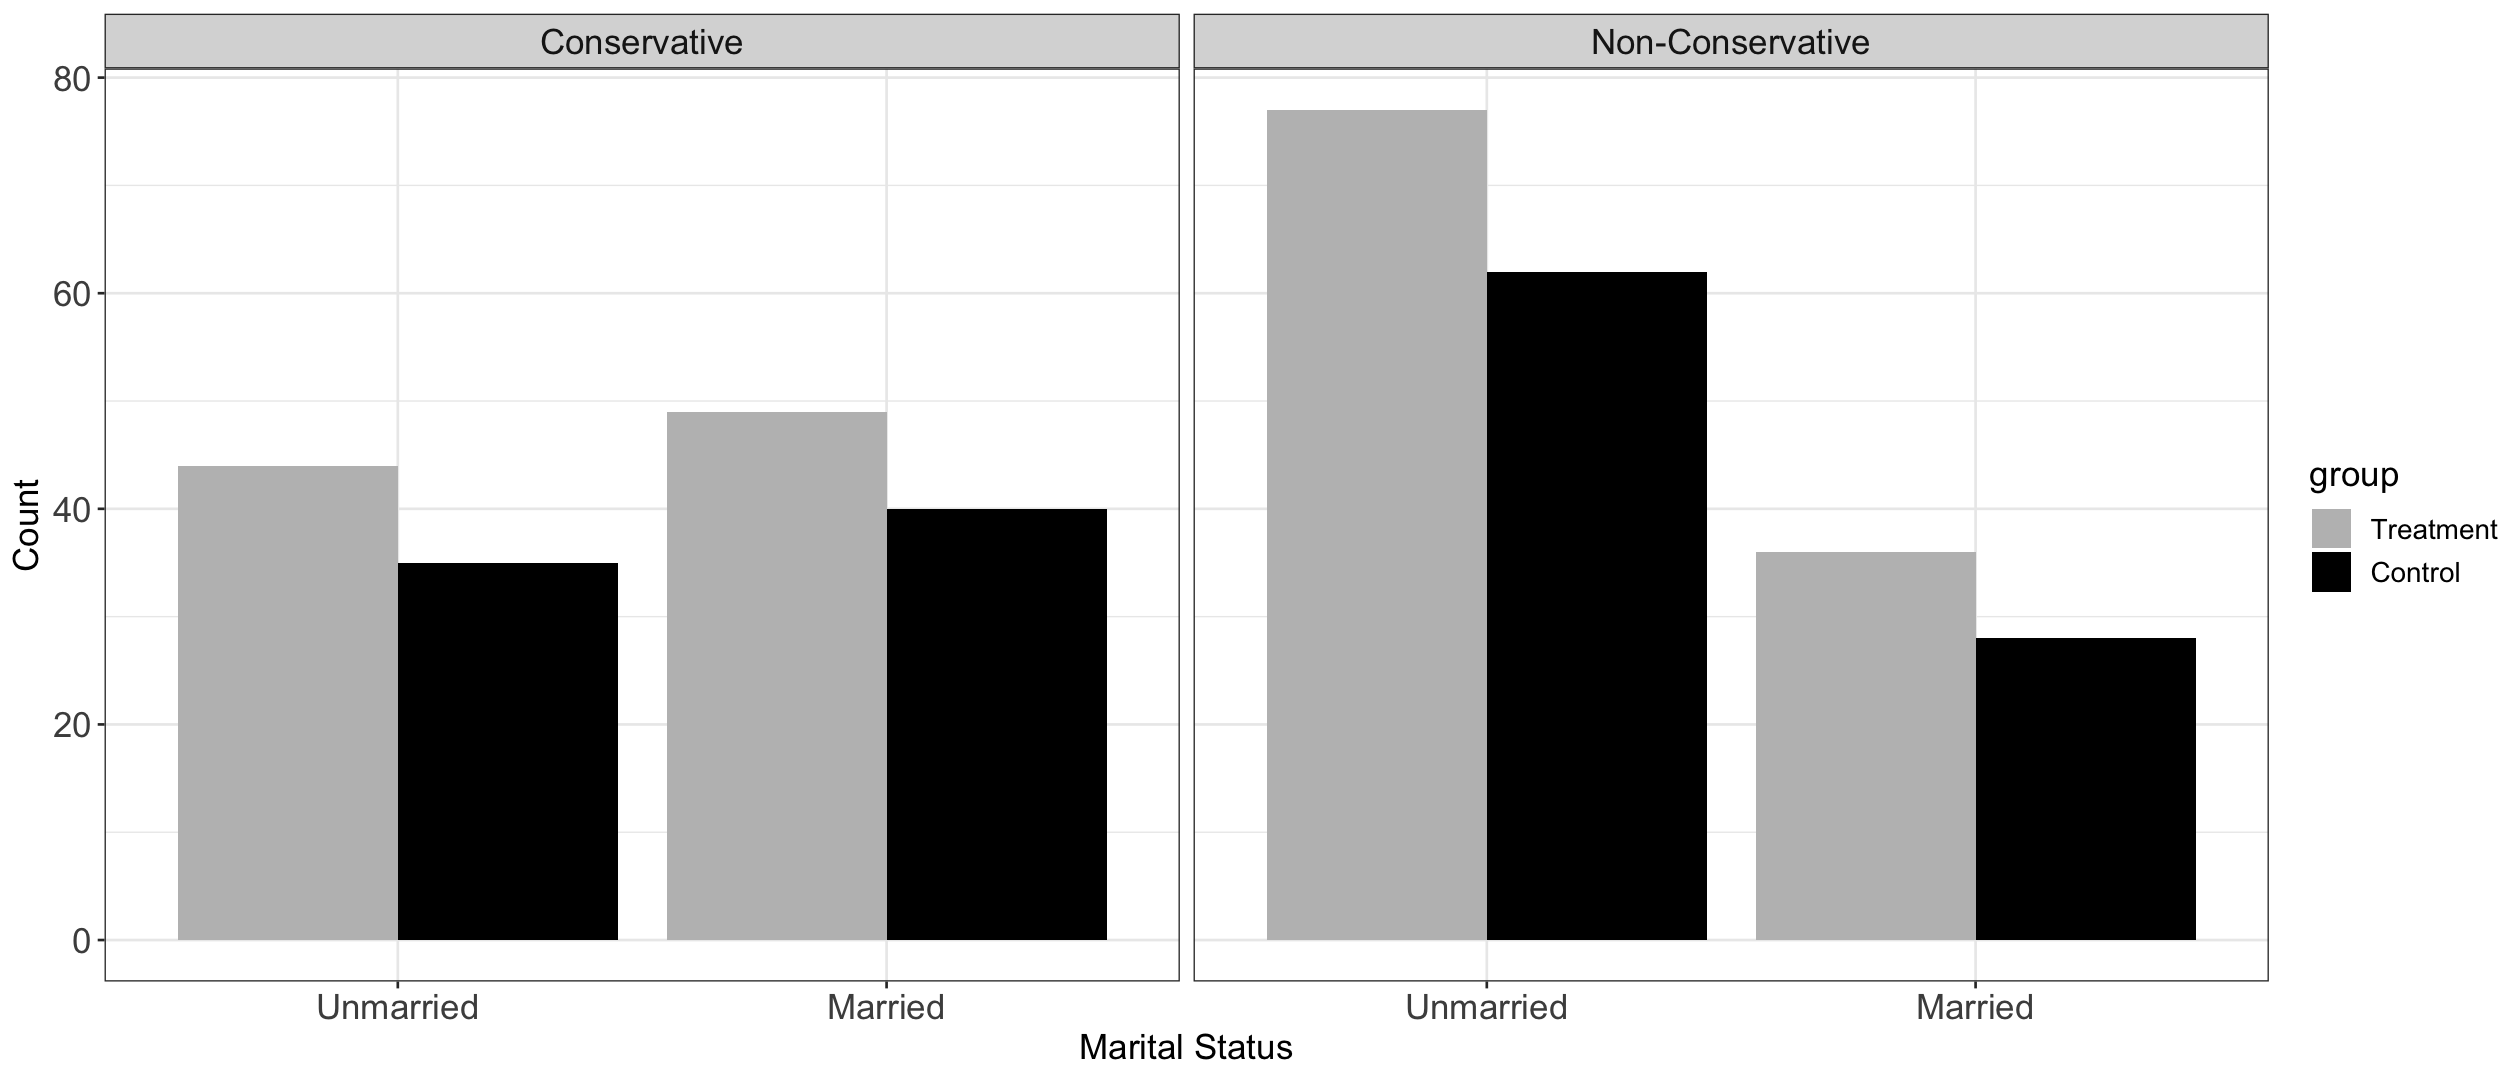

In [49]:
check_marital_status = vcf_data %>% group_by(group, conservative, marital_status) %>% tally() 
check_marital_status$conservative <- check_marital_status$conservative %>% as.character()
check_marital_status$conservative[check_marital_status$conservative == "conserv"] <- "Conservative"
check_marital_status$conservative[check_marital_status$conservative == "nonconserv"] <- "Non-Conservative"

options(repr.plot.width = 14, repr.plot.height = 6, repr.plot.res = 180)
check_marital_status %>%
  ggplot(aes(x = marital_status, y=n, fill=group)) +
  geom_bar(stat ='identity', position = position_dodge()) +
  theme_bw() + scale_fill_manual(values = c('gray', 'black')) +
  labs(x = "Marital Status" , y= "Count") + 
  facet_wrap(~conservative, ncol = 2) +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        strip.text.x = element_text(size = 14),
        text = element_text(size = 14)) 

In [50]:
chisq.test(table(vcf_data$marital_status[vcf_data$conservative == "conserv"], 
                 vcf_data$group[vcf_data$conservative == "conserv"]))

ks.test(check_marital_status$n[(check_marital_status$group == 'Control') & (check_marital_status$conservative == 'Conservative')],
        check_marital_status$n[(check_marital_status$group == 'Treatment' )& (check_marital_status$conservative == 'Conservative')])

chisq.test(table(vcf_data$marital_status[vcf_data$conservative == "nonconserv"], 
                 vcf_data$group[vcf_data$conservative == "nonconserv"]))

ks.test(check_marital_status$n[(check_marital_status$group == 'Control') & (check_marital_status$conservative == 'Non-Conservative')],
        check_marital_status$n[(check_marital_status$group == 'Treatment' )& (check_marital_status$conservative == 'Non-Conservative')])


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$marital_status[vcf_data$conservative == "conserv"],     vcf_data$group[vcf_data$conservative == "conserv"])
X-squared = 0, df = 1, p-value = 1



	Exact two-sample Kolmogorov-Smirnov test

data:  check_marital_status$n[(check_marital_status$group == "Control") & (check_marital_status$conservative == "Conservative")] and check_marital_status$n[(check_marital_status$group == "Treatment") & (check_marital_status$conservative == "Conservative")]
D = 1, p-value = 0.3333
alternative hypothesis: two-sided



	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$marital_status[vcf_data$conservative == "nonconserv"],     vcf_data$group[vcf_data$conservative == "nonconserv"])
X-squared = 4.0157e-30, df = 1, p-value = 1



	Exact two-sample Kolmogorov-Smirnov test

data:  check_marital_status$n[(check_marital_status$group == "Control") & (check_marital_status$conservative == "Non-Conservative")] and check_marital_status$n[(check_marital_status$group == "Treatment") & (check_marital_status$conservative == "Non-Conservative")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided


## Trusting vs. Distrusting PHIs

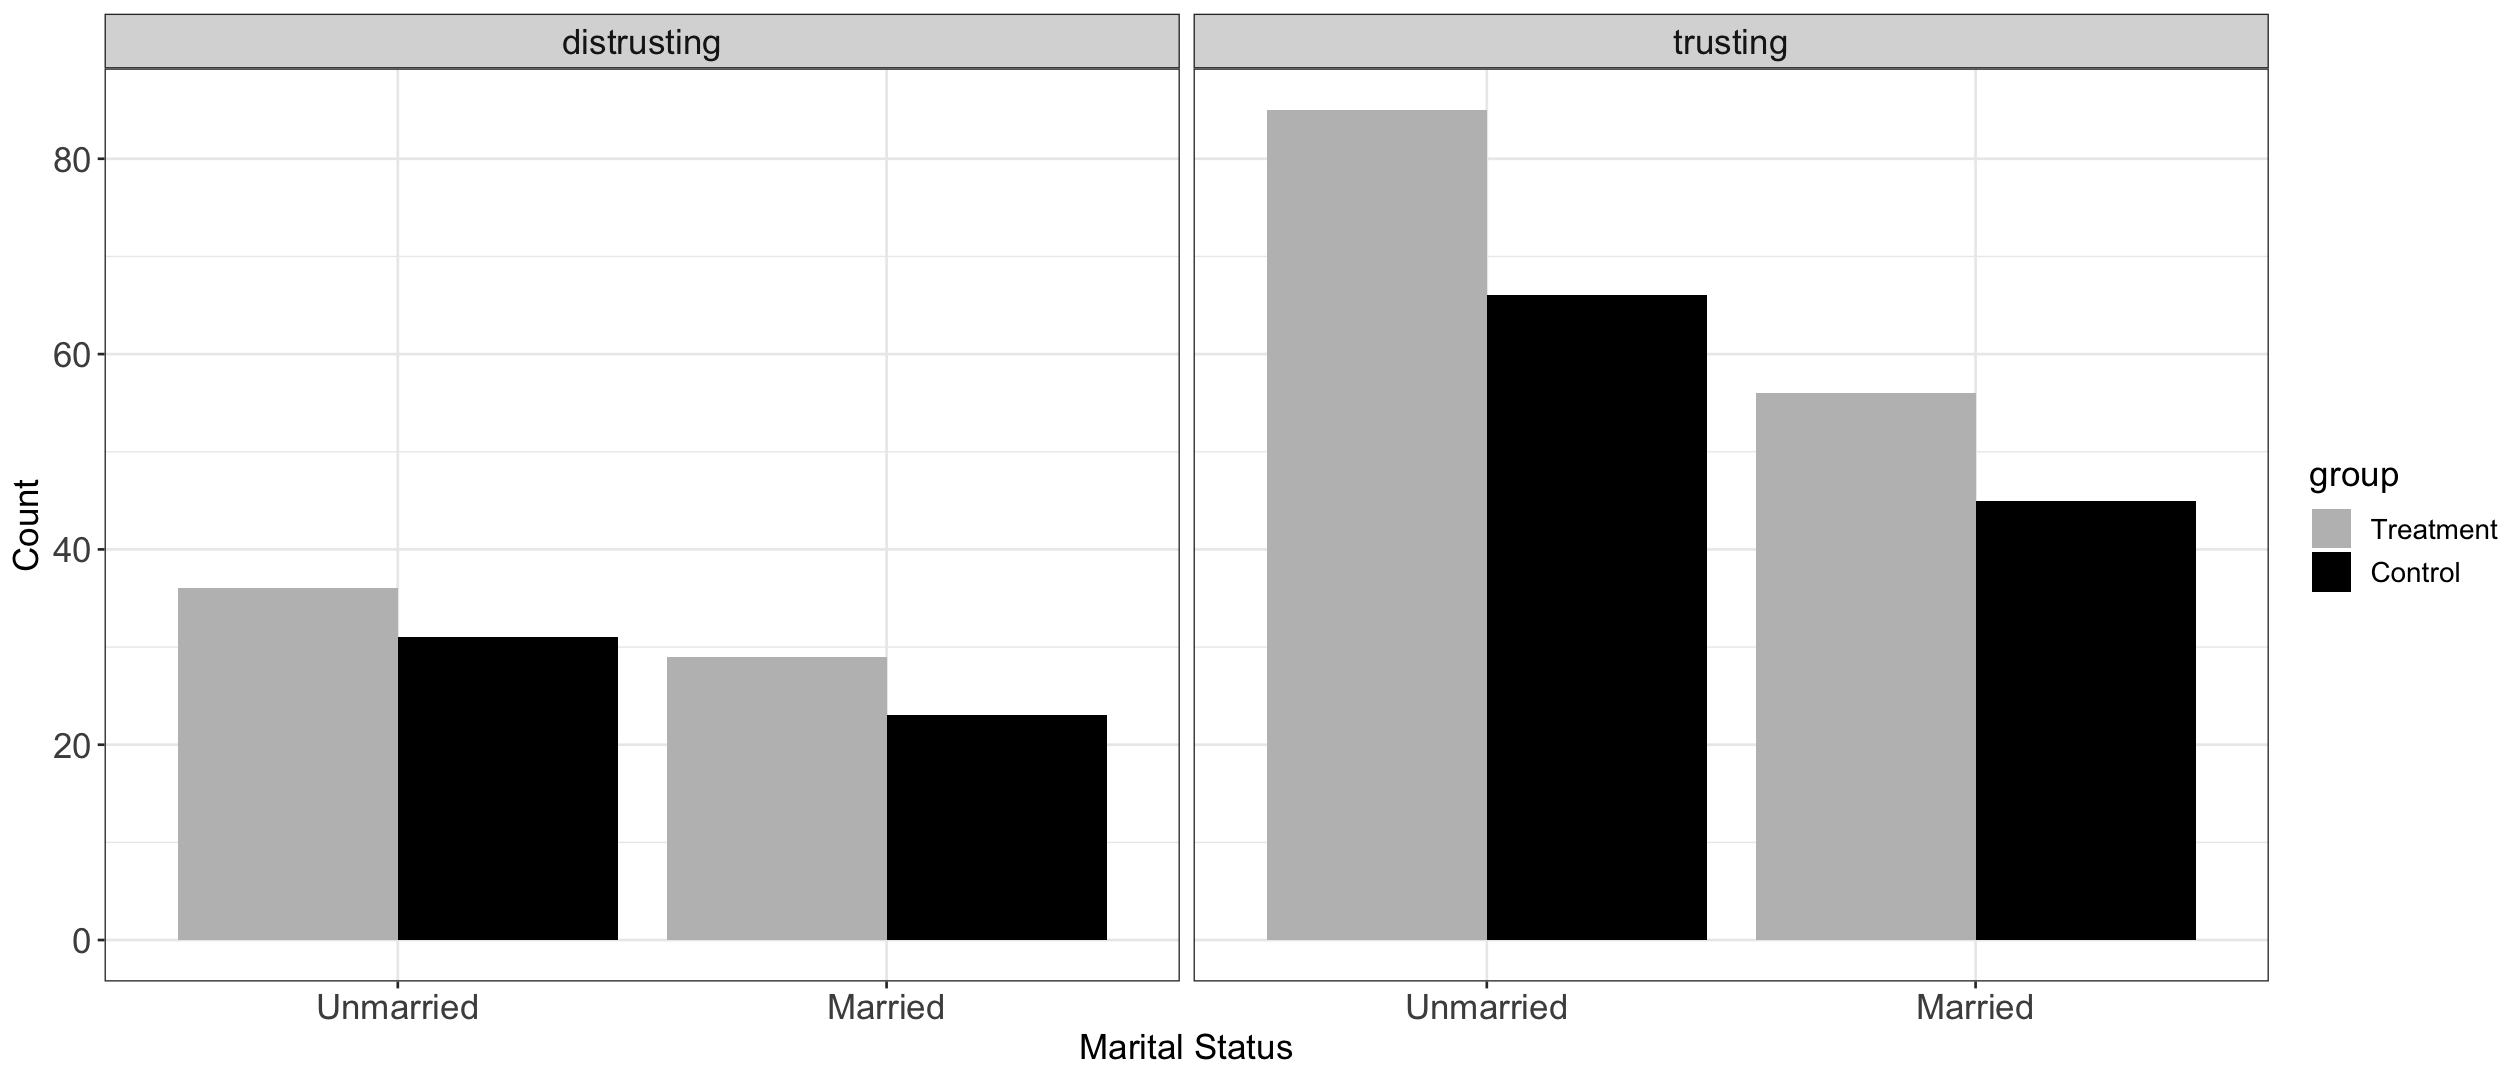

In [51]:
check_marital_status = vcf_data %>% group_by(group, phi_trust_cat, marital_status) %>% tally() 

options(repr.plot.width = 14, repr.plot.height = 6, repr.plot.res = 180)
check_marital_status %>%
  ggplot(aes(x = marital_status, y=n, fill=group)) +
  geom_bar(stat ='identity', position = position_dodge()) +
  theme_bw() + scale_fill_manual(values = c('gray', 'black')) +
  labs(x = "Marital Status" , y= "Count") + 
  facet_wrap(~phi_trust_cat, ncol = 2) +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        strip.text.x = element_text(size = 14),
        text = element_text(size = 14)) 

In [52]:
chisq.test(table(vcf_data$marital_status[vcf_data$phi_trust_cat == "trusting"], 
                 vcf_data$group[vcf_data$phi_trust_cat == "trusting"]))

ks.test(check_marital_status$n[(check_marital_status$group == 'Control') & (check_marital_status$phi_trust_cat == 'trusting')],
        check_marital_status$n[(check_marital_status$group == 'Treatment' )& (check_marital_status$phi_trust_cat == 'trusting')])

chisq.test(table(vcf_data$marital_status[vcf_data$phi_trust_cat == "distrusting"], 
                 vcf_data$group[vcf_data$phi_trust_cat == "distrusting"]))

ks.test(check_marital_status$n[(check_marital_status$group == 'Control') & (check_marital_status$phi_trust_cat == 'distrusting')],
        check_marital_status$n[(check_marital_status$group == 'Treatment' )& (check_marital_status$phi_trust_cat == 'distrusting')])


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$marital_status[vcf_data$phi_trust_cat == "trusting"],     vcf_data$group[vcf_data$phi_trust_cat == "trusting"])
X-squared = 9.5017e-06, df = 1, p-value = 0.9975



	Exact two-sample Kolmogorov-Smirnov test

data:  check_marital_status$n[(check_marital_status$group == "Control") & (check_marital_status$phi_trust_cat == "trusting")] and check_marital_status$n[(check_marital_status$group == "Treatment") & (check_marital_status$phi_trust_cat == "trusting")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided



	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$marital_status[vcf_data$phi_trust_cat == "distrusting"],     vcf_data$group[vcf_data$phi_trust_cat == "distrusting"])
X-squared = 0.0012869, df = 1, p-value = 0.9714



	Exact two-sample Kolmogorov-Smirnov test

data:  check_marital_status$n[(check_marital_status$group == "Control") & (check_marital_status$phi_trust_cat == "distrusting")] and check_marital_status$n[(check_marital_status$group == "Treatment") & (check_marital_status$phi_trust_cat == "distrusting")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided


## Trusting vs. Distrusting Governmental Institutions

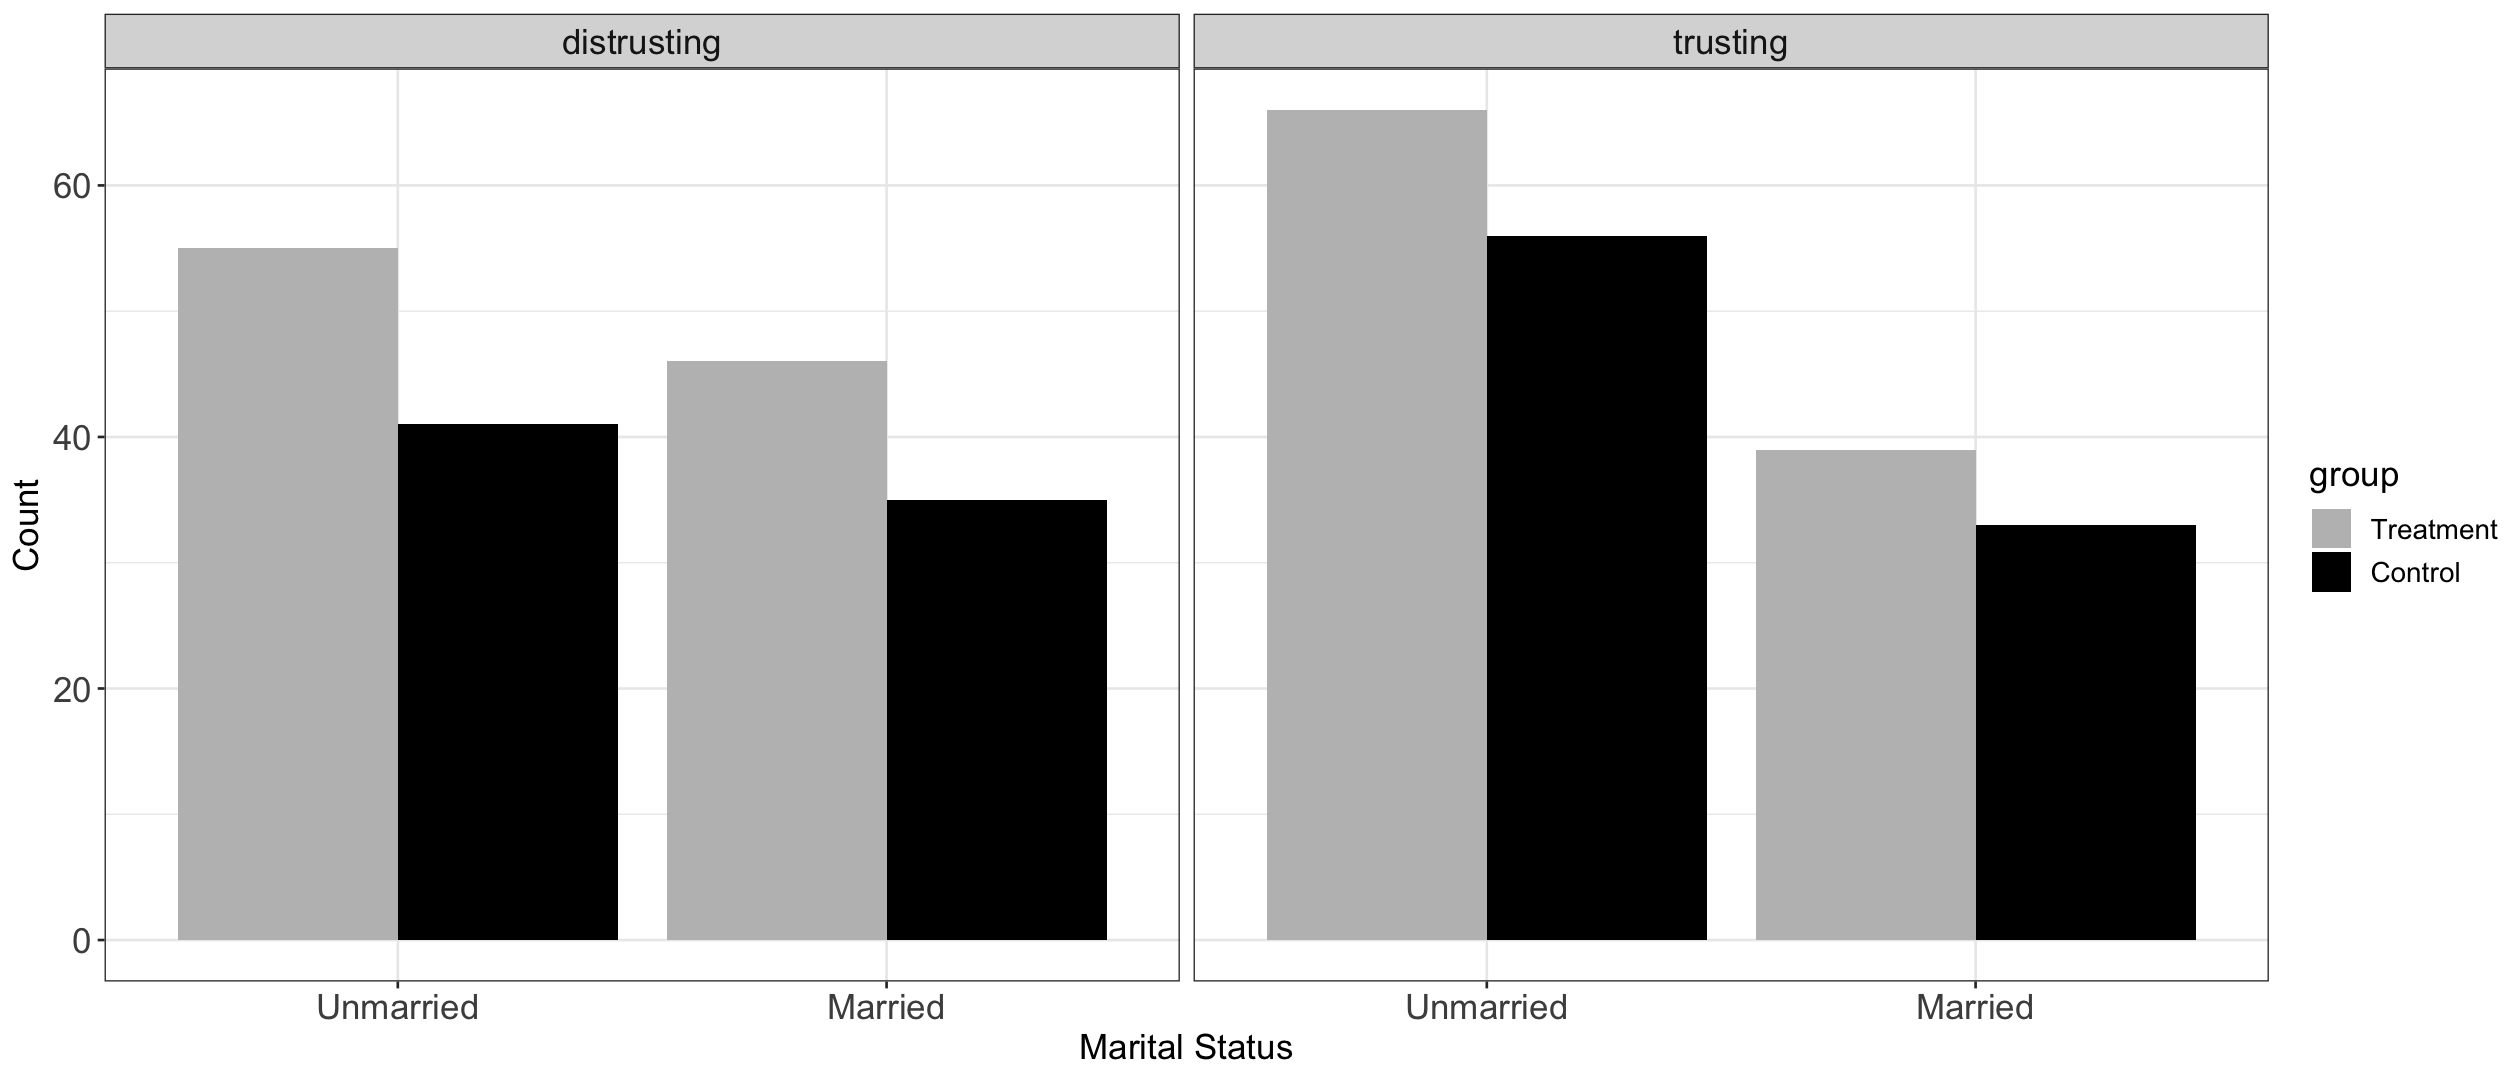

In [53]:
check_marital_status = vcf_data %>% group_by(group, gov_trust_cat, marital_status) %>% tally() 

options(repr.plot.width = 14, repr.plot.height = 6, repr.plot.res = 180)
check_marital_status %>%
  ggplot(aes(x = marital_status, y=n, fill=group)) +
  geom_bar(stat ='identity', position = position_dodge()) +
  theme_bw() + scale_fill_manual(values = c('gray', 'black')) +
  labs(x = "Marital Status" , y= "Count") + 
  facet_wrap(~gov_trust_cat, ncol = 2) +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        strip.text.x = element_text(size = 14),
        text = element_text(size = 14)) 

In [54]:
chisq.test(table(vcf_data$marital_status[vcf_data$gov_trust_cat == "trusting"], 
                 vcf_data$group[vcf_data$gov_trust_cat == "trusting"]))

ks.test(check_marital_status$n[(check_marital_status$group == 'Control') & (check_marital_status$gov_trust_cat == 'trusting')],
        check_marital_status$n[(check_marital_status$group == 'Treatment' )& (check_marital_status$gov_trust_cat == 'trusting')])

chisq.test(table(vcf_data$marital_status[vcf_data$gov_trust_cat == "distrusting"], 
                 vcf_data$group[vcf_data$gov_trust_cat == "distrusting"]))

ks.test(check_marital_status$n[(check_marital_status$group == 'Control') & (check_marital_status$gov_trust_cat == 'distrusting')],
        check_marital_status$n[(check_marital_status$group == 'Treatment' )& (check_marital_status$gov_trust_cat == 'distrusting')])


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$marital_status[vcf_data$gov_trust_cat == "trusting"],     vcf_data$group[vcf_data$gov_trust_cat == "trusting"])
X-squared = 3.7261e-30, df = 1, p-value = 1



	Exact two-sample Kolmogorov-Smirnov test

data:  check_marital_status$n[(check_marital_status$group == "Control") & (check_marital_status$gov_trust_cat == "trusting")] and check_marital_status$n[(check_marital_status$group == "Treatment") & (check_marital_status$gov_trust_cat == "trusting")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided



	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$marital_status[vcf_data$gov_trust_cat == "distrusting"],     vcf_data$group[vcf_data$gov_trust_cat == "distrusting"])
X-squared = 0, df = 1, p-value = 1



	Exact two-sample Kolmogorov-Smirnov test

data:  check_marital_status$n[(check_marital_status$group == "Control") & (check_marital_status$gov_trust_cat == "distrusting")] and check_marital_status$n[(check_marital_status$group == "Treatment") & (check_marital_status$gov_trust_cat == "distrusting")]
D = 1, p-value = 0.3333
alternative hypothesis: two-sided


# Check Employment

## Republican vs. Non-Republican

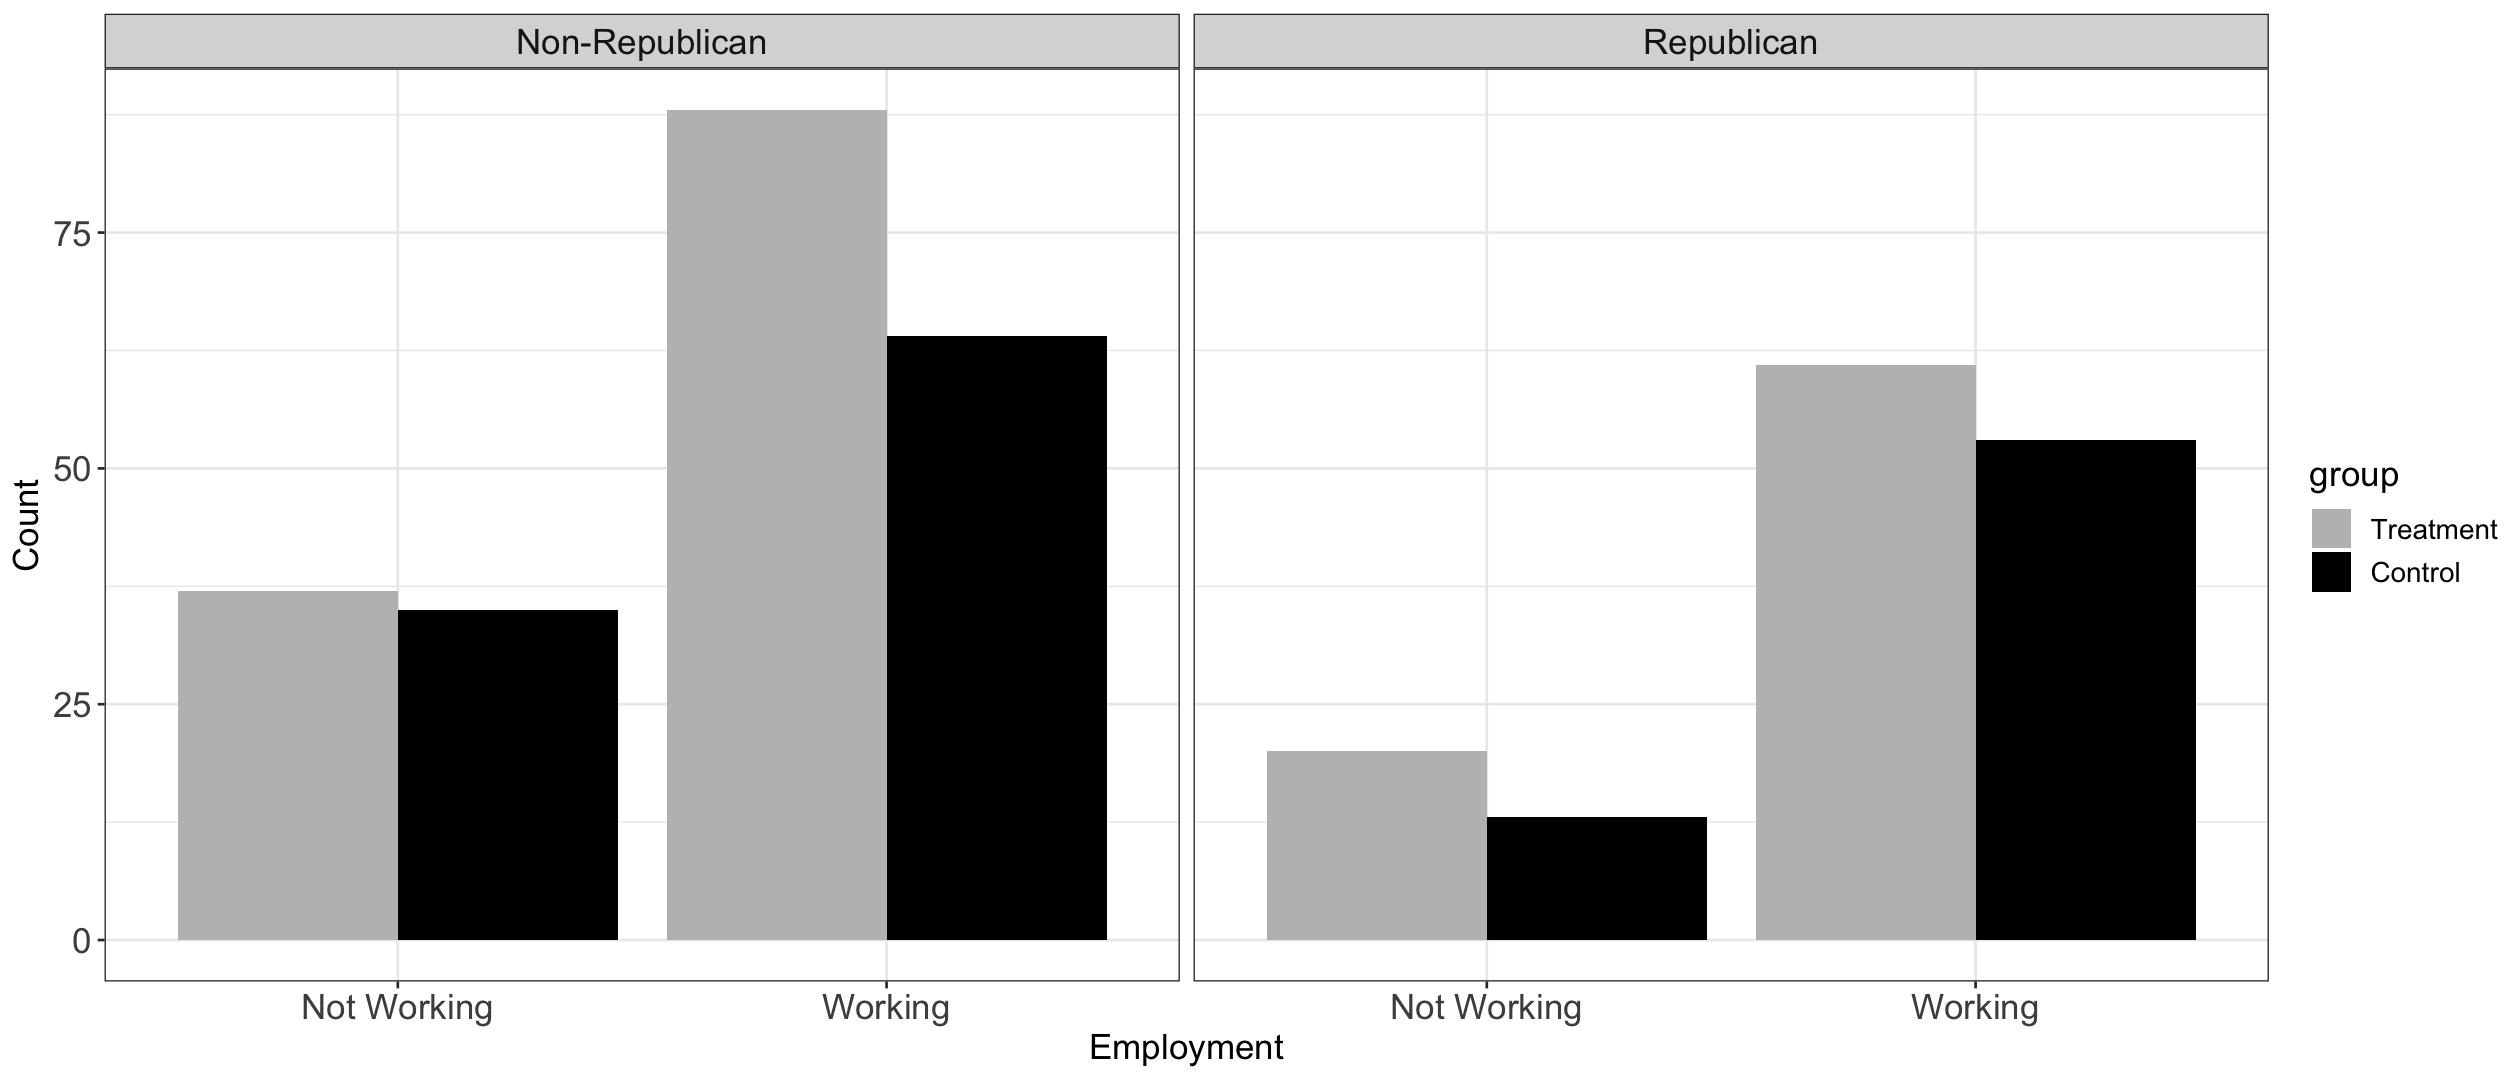

In [55]:
check_employment = vcf_data %>% group_by(group, republican, employment2) %>% tally() 
check_employment$republican <- check_employment$republican %>% as.character()
check_employment$republican[check_employment$republican == "rep"] <- "Republican"
check_employment$republican[check_employment$republican == "nonrep"] <- "Non-Republican"

options(repr.plot.width = 14, repr.plot.height = 6, repr.plot.res = 180)
check_employment %>%
  ggplot(aes(x = employment2, y=n, fill=group)) +
  geom_bar(stat ='identity', position = position_dodge()) +
  theme_bw() + scale_fill_manual(values = c('gray', 'black')) +
  labs(x = "Employment" , y= "Count") + 
  facet_wrap(~republican, ncol = 2) +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        strip.text.x = element_text(size = 14),
        text = element_text(size = 14)) 

In [56]:
chisq.test(table(vcf_data$employment2[vcf_data$republican == "rep"], 
                 vcf_data$group[vcf_data$republican == "rep"]))

ks.test(check_employment$n[(check_employment$group == 'Control') & (check_employment$republican == 'Republican')],
        check_employment$n[(check_employment$group == 'Treatment' )& (check_employment$republican == 'Republican')])

chisq.test(table(vcf_data$employment2[vcf_data$republican == "nonrep"], 
                 vcf_data$group[vcf_data$republican == "nonrep"]))

ks.test(check_employment$n[(check_employment$group == 'Control') & (check_employment$republican == 'Non-Republican')],
        check_employment$n[(check_employment$group == 'Treatment' )& (check_employment$republican == 'Non-Republican')])


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$employment2[vcf_data$republican == "rep"], vcf_data$group[vcf_data$republican ==     "rep"])
X-squared = 0.27367, df = 1, p-value = 0.6009



	Exact two-sample Kolmogorov-Smirnov test

data:  check_employment$n[(check_employment$group == "Control") & (check_employment$republican == "Republican")] and check_employment$n[(check_employment$group == "Treatment") & (check_employment$republican == "Republican")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided



	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$employment2[vcf_data$republican == "nonrep"],     vcf_data$group[vcf_data$republican == "nonrep"])
X-squared = 0.59543, df = 1, p-value = 0.4403



	Exact two-sample Kolmogorov-Smirnov test

data:  check_employment$n[(check_employment$group == "Control") & (check_employment$republican == "Non-Republican")] and check_employment$n[(check_employment$group == "Treatment") & (check_employment$republican == "Non-Republican")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided


## Conservatives vs. Non-Conservatives

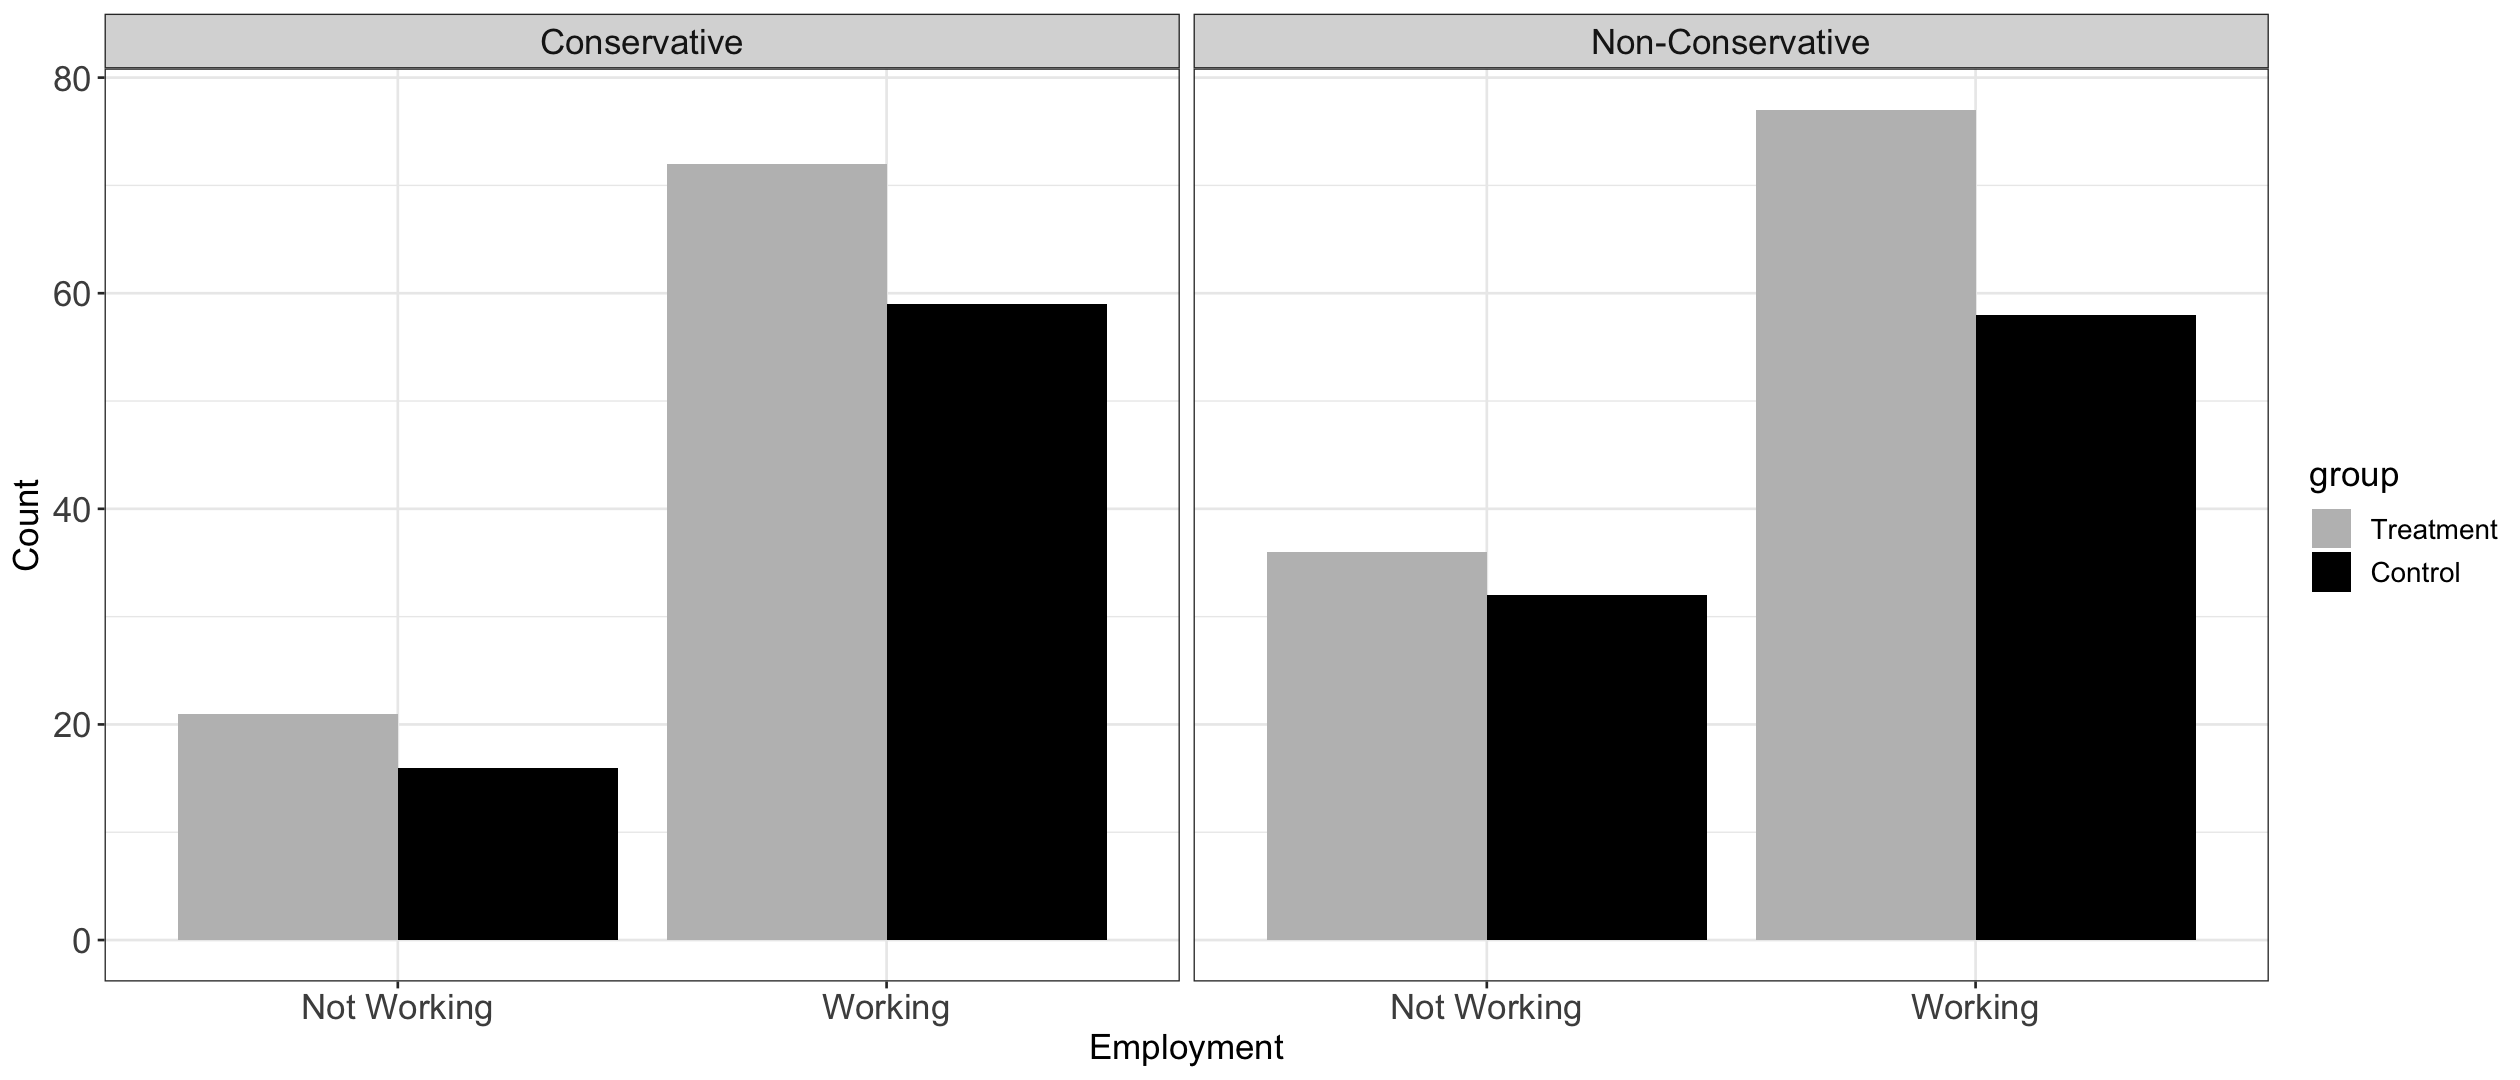

In [57]:
check_employment = vcf_data %>% group_by(group, conservative, employment2) %>% tally() 
check_employment$conservative <- check_employment$conservative %>% as.character()
check_employment$conservative[check_employment$conservative == "conserv"] <- "Conservative"
check_employment$conservative[check_employment$conservative == "nonconserv"] <- "Non-Conservative"

options(repr.plot.width = 14, repr.plot.height = 6, repr.plot.res = 180)
check_employment %>%
  ggplot(aes(x = employment2, y=n, fill=group)) +
  geom_bar(stat ='identity', position = position_dodge()) +
  theme_bw() + scale_fill_manual(values = c('gray', 'black')) +
  labs(x = "Employment" , y= "Count") + 
  facet_wrap(~conservative, ncol = 2) +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        strip.text.x = element_text(size = 14),
        text = element_text(size = 14)) 

In [58]:
chisq.test(table(vcf_data$employment2[vcf_data$conservative == "conserv"], 
                 vcf_data$group[vcf_data$conservative == "conserv"]))

ks.test(check_employment$n[(check_employment$group == 'Control') & (check_employment$conservative == 'Conservative')],
        check_employment$n[(check_employment$group == 'Treatment' )& (check_employment$conservative == 'Conservative')])

chisq.test(table(vcf_data$employment2[vcf_data$conservative == "nonconserv"], 
                 vcf_data$group[vcf_data$conservative == "nonconserv"]))

ks.test(check_employment$n[(check_employment$group == 'Control') & (check_employment$conservative == 'Non-Conservative')],
        check_employment$n[(check_employment$group == 'Treatment' )& (check_employment$conservative == 'Non-Conservative')])


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$employment2[vcf_data$conservative == "conserv"],     vcf_data$group[vcf_data$conservative == "conserv"])
X-squared = 4.4723e-05, df = 1, p-value = 0.9947



	Exact two-sample Kolmogorov-Smirnov test

data:  check_employment$n[(check_employment$group == "Control") & (check_employment$conservative == "Conservative")] and check_employment$n[(check_employment$group == "Treatment") & (check_employment$conservative == "Conservative")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided



	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$employment2[vcf_data$conservative == "nonconserv"],     vcf_data$group[vcf_data$conservative == "nonconserv"])
X-squared = 0.16384, df = 1, p-value = 0.6856



	Exact two-sample Kolmogorov-Smirnov test

data:  check_employment$n[(check_employment$group == "Control") & (check_employment$conservative == "Non-Conservative")] and check_employment$n[(check_employment$group == "Treatment") & (check_employment$conservative == "Non-Conservative")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided


## Trusting vs. Distrusting PHIs

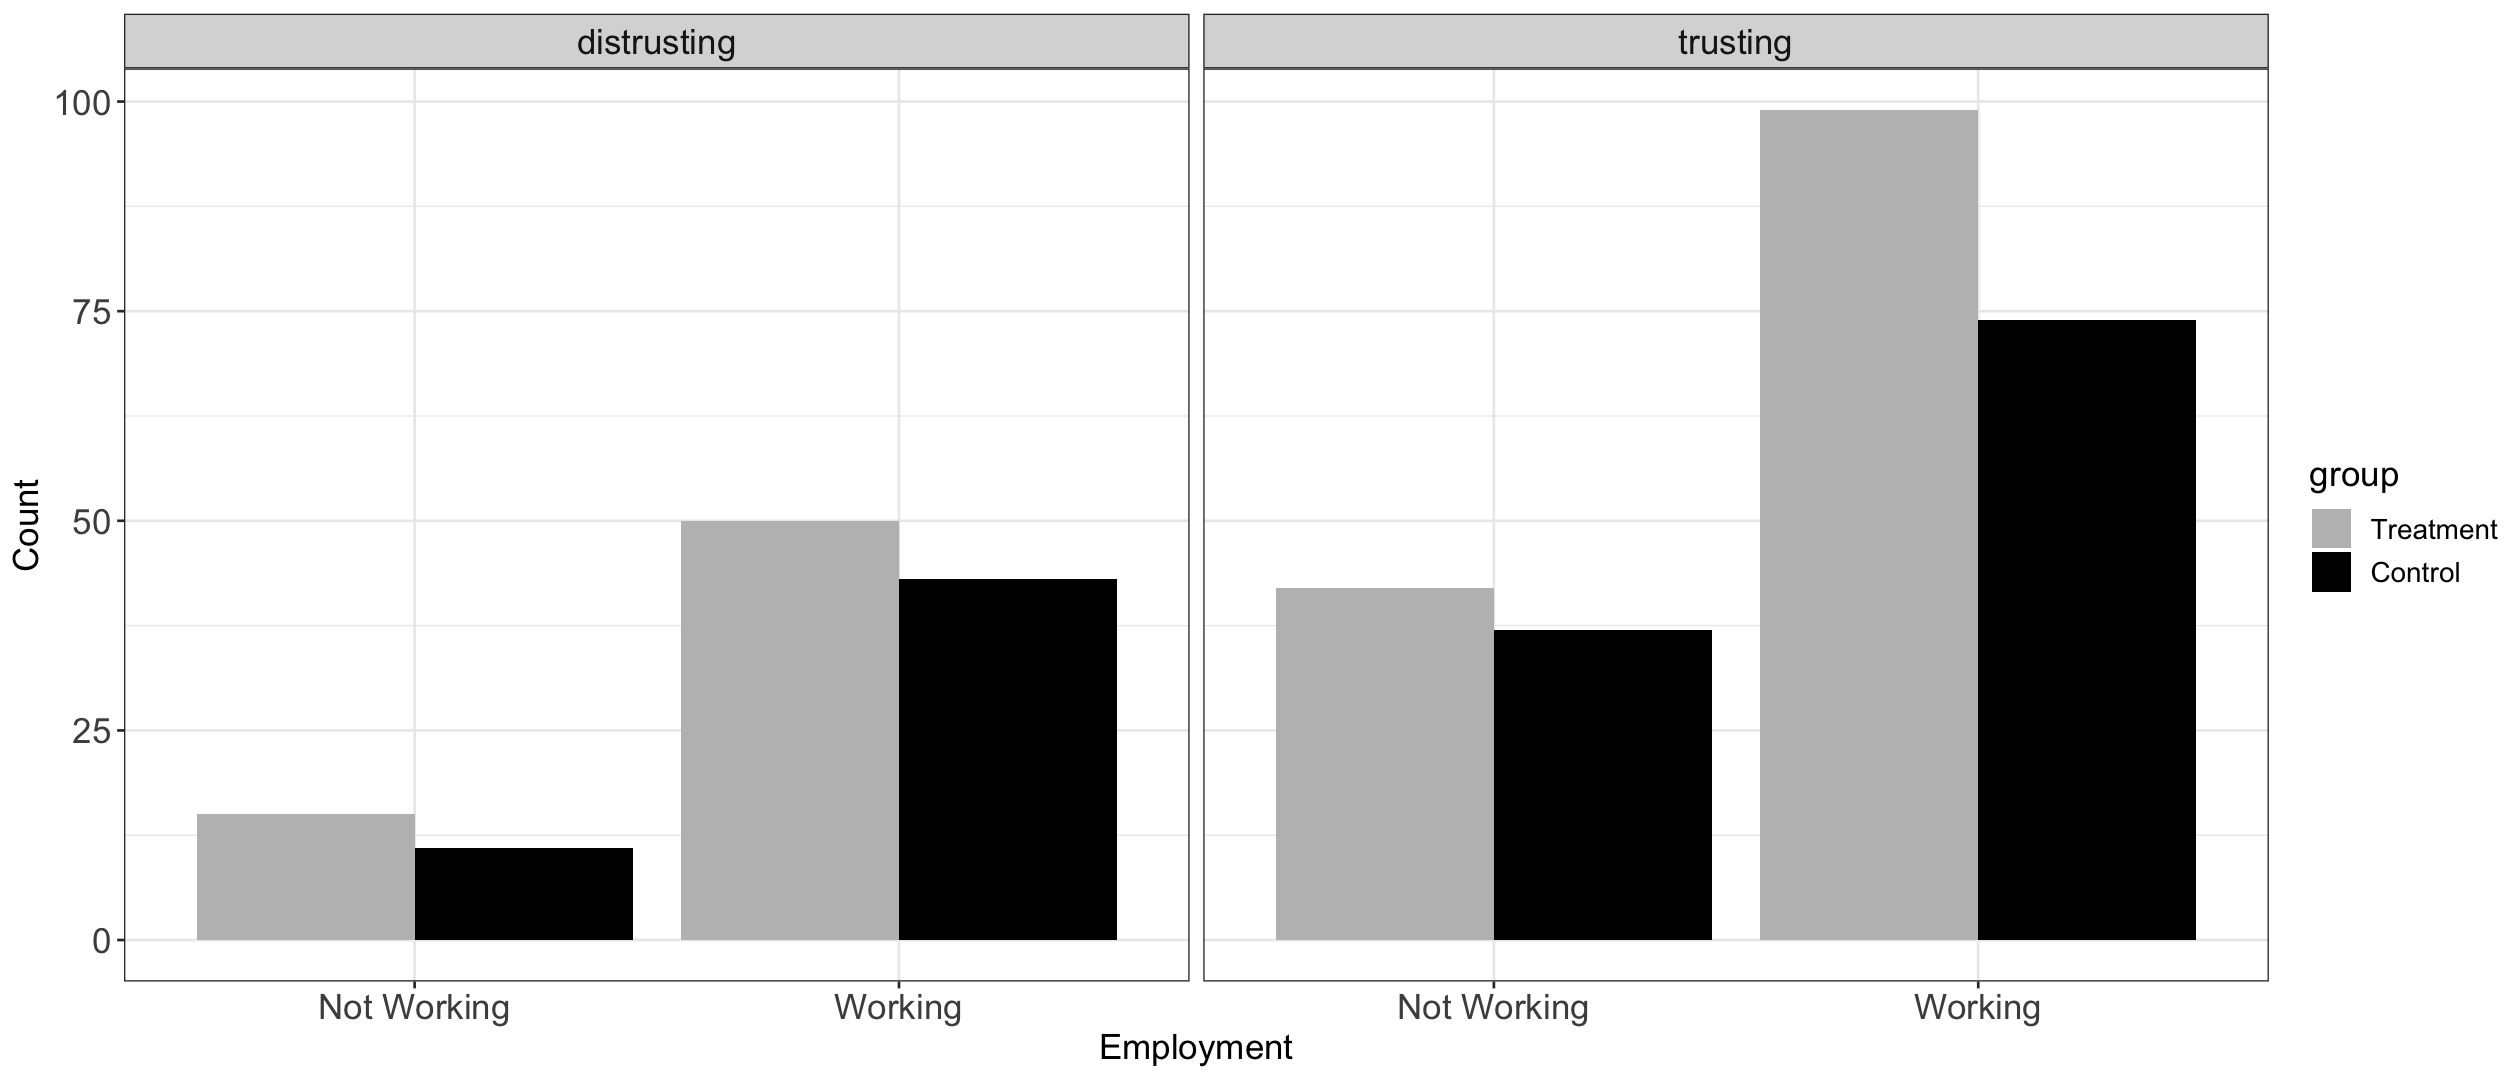

In [59]:
check_employment = vcf_data %>% group_by(group, phi_trust_cat, employment2) %>% tally() 

options(repr.plot.width = 14, repr.plot.height = 6, repr.plot.res = 180)
check_employment %>%
  ggplot(aes(x = employment2, y=n, fill=group)) +
  geom_bar(stat ='identity', position = position_dodge()) +
  theme_bw() + scale_fill_manual(values = c('gray', 'black')) +
  labs(x = "Employment" , y= "Count") + 
  facet_wrap(~phi_trust_cat, ncol = 2) +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        strip.text.x = element_text(size = 14),
        text = element_text(size = 14))

In [60]:
chisq.test(table(vcf_data$employment2[vcf_data$phi_trust_cat == "trusting"], 
                 vcf_data$group[vcf_data$phi_trust_cat == "trusting"]))

ks.test(check_employment$n[(check_employment$group == 'Control') & (check_employment$phi_trust_cat == 'trusting')],
        check_employment$n[(check_employment$group == 'Treatment' )& (check_employment$phi_trust_cat == 'trusting')])

chisq.test(table(vcf_data$employment2[vcf_data$phi_trust_cat == "distrusting"], 
                 vcf_data$group[vcf_data$phi_trust_cat == "distrusting"]))

ks.test(check_employment$n[(check_employment$group == 'Control') & (check_employment$phi_trust_cat == 'distrusting')],
        check_employment$n[(check_employment$group == 'Treatment' )& (check_employment$phi_trust_cat == 'distrusting')])


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$employment2[vcf_data$phi_trust_cat == "trusting"],     vcf_data$group[vcf_data$phi_trust_cat == "trusting"])
X-squared = 0.21682, df = 1, p-value = 0.6415



	Exact two-sample Kolmogorov-Smirnov test

data:  check_employment$n[(check_employment$group == "Control") & (check_employment$phi_trust_cat == "trusting")] and check_employment$n[(check_employment$group == "Treatment") & (check_employment$phi_trust_cat == "trusting")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided



	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$employment2[vcf_data$phi_trust_cat == "distrusting"],     vcf_data$group[vcf_data$phi_trust_cat == "distrusting"])
X-squared = 0.01767, df = 1, p-value = 0.8942



	Exact two-sample Kolmogorov-Smirnov test

data:  check_employment$n[(check_employment$group == "Control") & (check_employment$phi_trust_cat == "distrusting")] and check_employment$n[(check_employment$group == "Treatment") & (check_employment$phi_trust_cat == "distrusting")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided


## Trusting vs. Distrusting Governmental Institutions

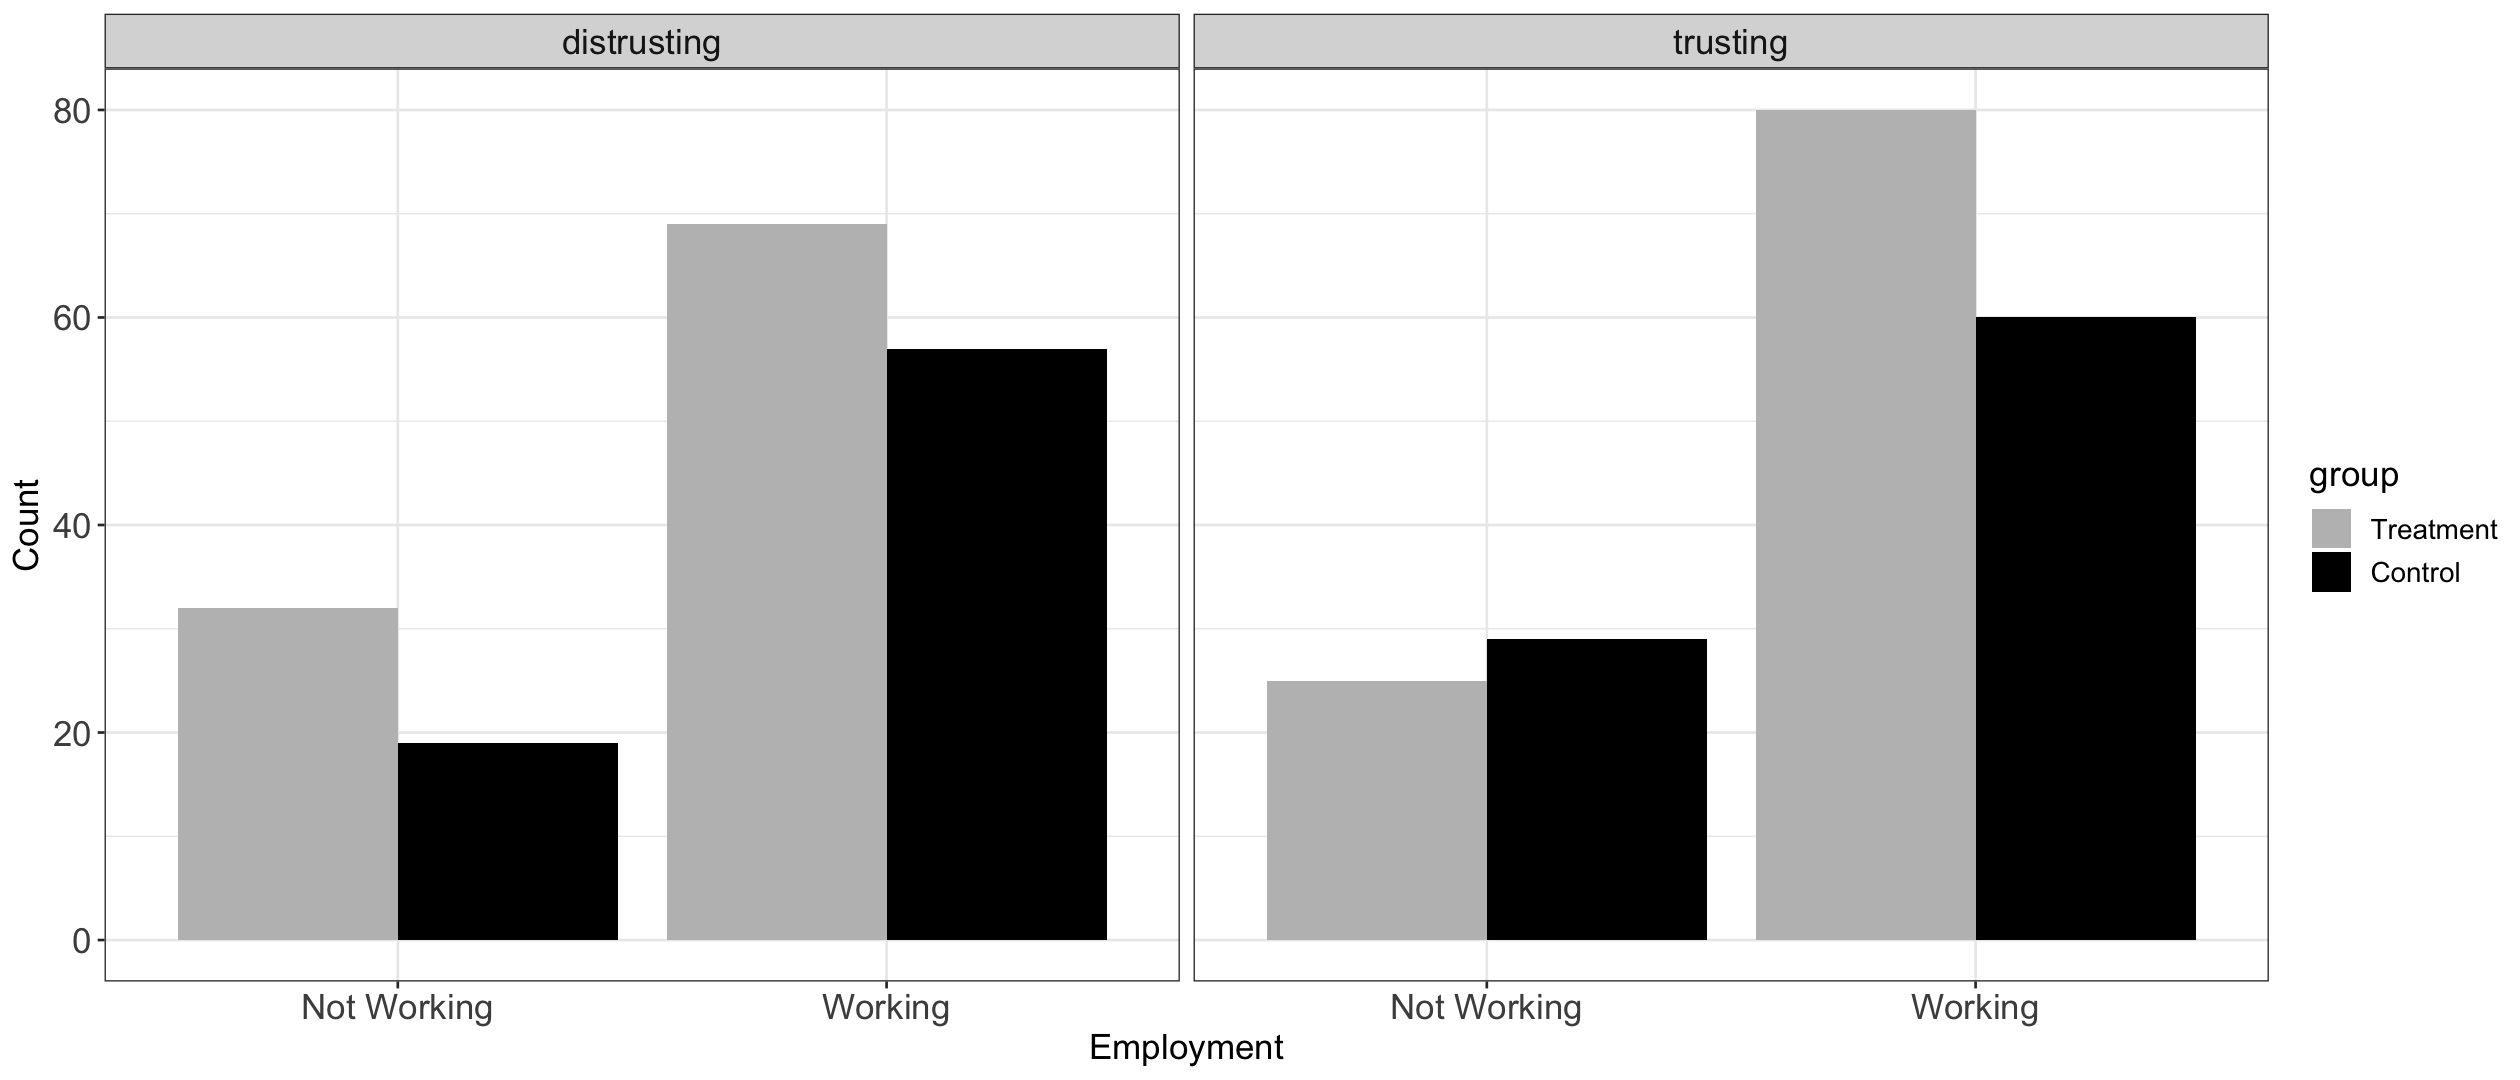

In [61]:
check_employment = vcf_data %>% group_by(group, gov_trust_cat, employment2) %>% tally() 

options(repr.plot.width = 14, repr.plot.height = 6, repr.plot.res = 180)
check_employment %>%
  ggplot(aes(x = employment2, y=n, fill=group)) +
  geom_bar(stat ='identity', position = position_dodge()) +
  theme_bw() + scale_fill_manual(values = c('gray', 'black')) +
  labs(x = "Employment" , y= "Count") + 
  facet_wrap(~gov_trust_cat, ncol = 2) +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        strip.text.x = element_text(size = 14),
        text = element_text(size = 14)) 

In [62]:
chisq.test(table(vcf_data$employment2[vcf_data$gov_trust_cat == "trusting"], 
                 vcf_data$group[vcf_data$gov_trust_cat == "trusting"]))

ks.test(check_employment$n[(check_employment$group == 'Control') & (check_employment$gov_trust_cat == 'trusting')],
        check_employment$n[(check_employment$group == 'Treatment' )& (check_employment$gov_trust_cat == 'trusting')])

chisq.test(table(vcf_data$employment2[vcf_data$gov_trust_cat == "distrusting"], 
                 vcf_data$group[vcf_data$gov_trust_cat == "distrusting"]))

ks.test(check_employment$n[(check_employment$group == 'Control') & (check_employment$gov_trust_cat == 'distrusting')],
        check_employment$n[(check_employment$group == 'Treatment' )& (check_employment$gov_trust_cat == 'distrusting')])


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$employment2[vcf_data$gov_trust_cat == "trusting"],     vcf_data$group[vcf_data$gov_trust_cat == "trusting"])
X-squared = 1.4354, df = 1, p-value = 0.2309



	Exact two-sample Kolmogorov-Smirnov test

data:  check_employment$n[(check_employment$group == "Control") & (check_employment$gov_trust_cat == "trusting")] and check_employment$n[(check_employment$group == "Treatment") & (check_employment$gov_trust_cat == "trusting")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided



	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$employment2[vcf_data$gov_trust_cat == "distrusting"],     vcf_data$group[vcf_data$gov_trust_cat == "distrusting"])
X-squared = 0.64663, df = 1, p-value = 0.4213



	Exact two-sample Kolmogorov-Smirnov test

data:  check_employment$n[(check_employment$group == "Control") & (check_employment$gov_trust_cat == "distrusting")] and check_employment$n[(check_employment$group == "Treatment") & (check_employment$gov_trust_cat == "distrusting")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided


# Check Education

## Republican vs. Non-Republican

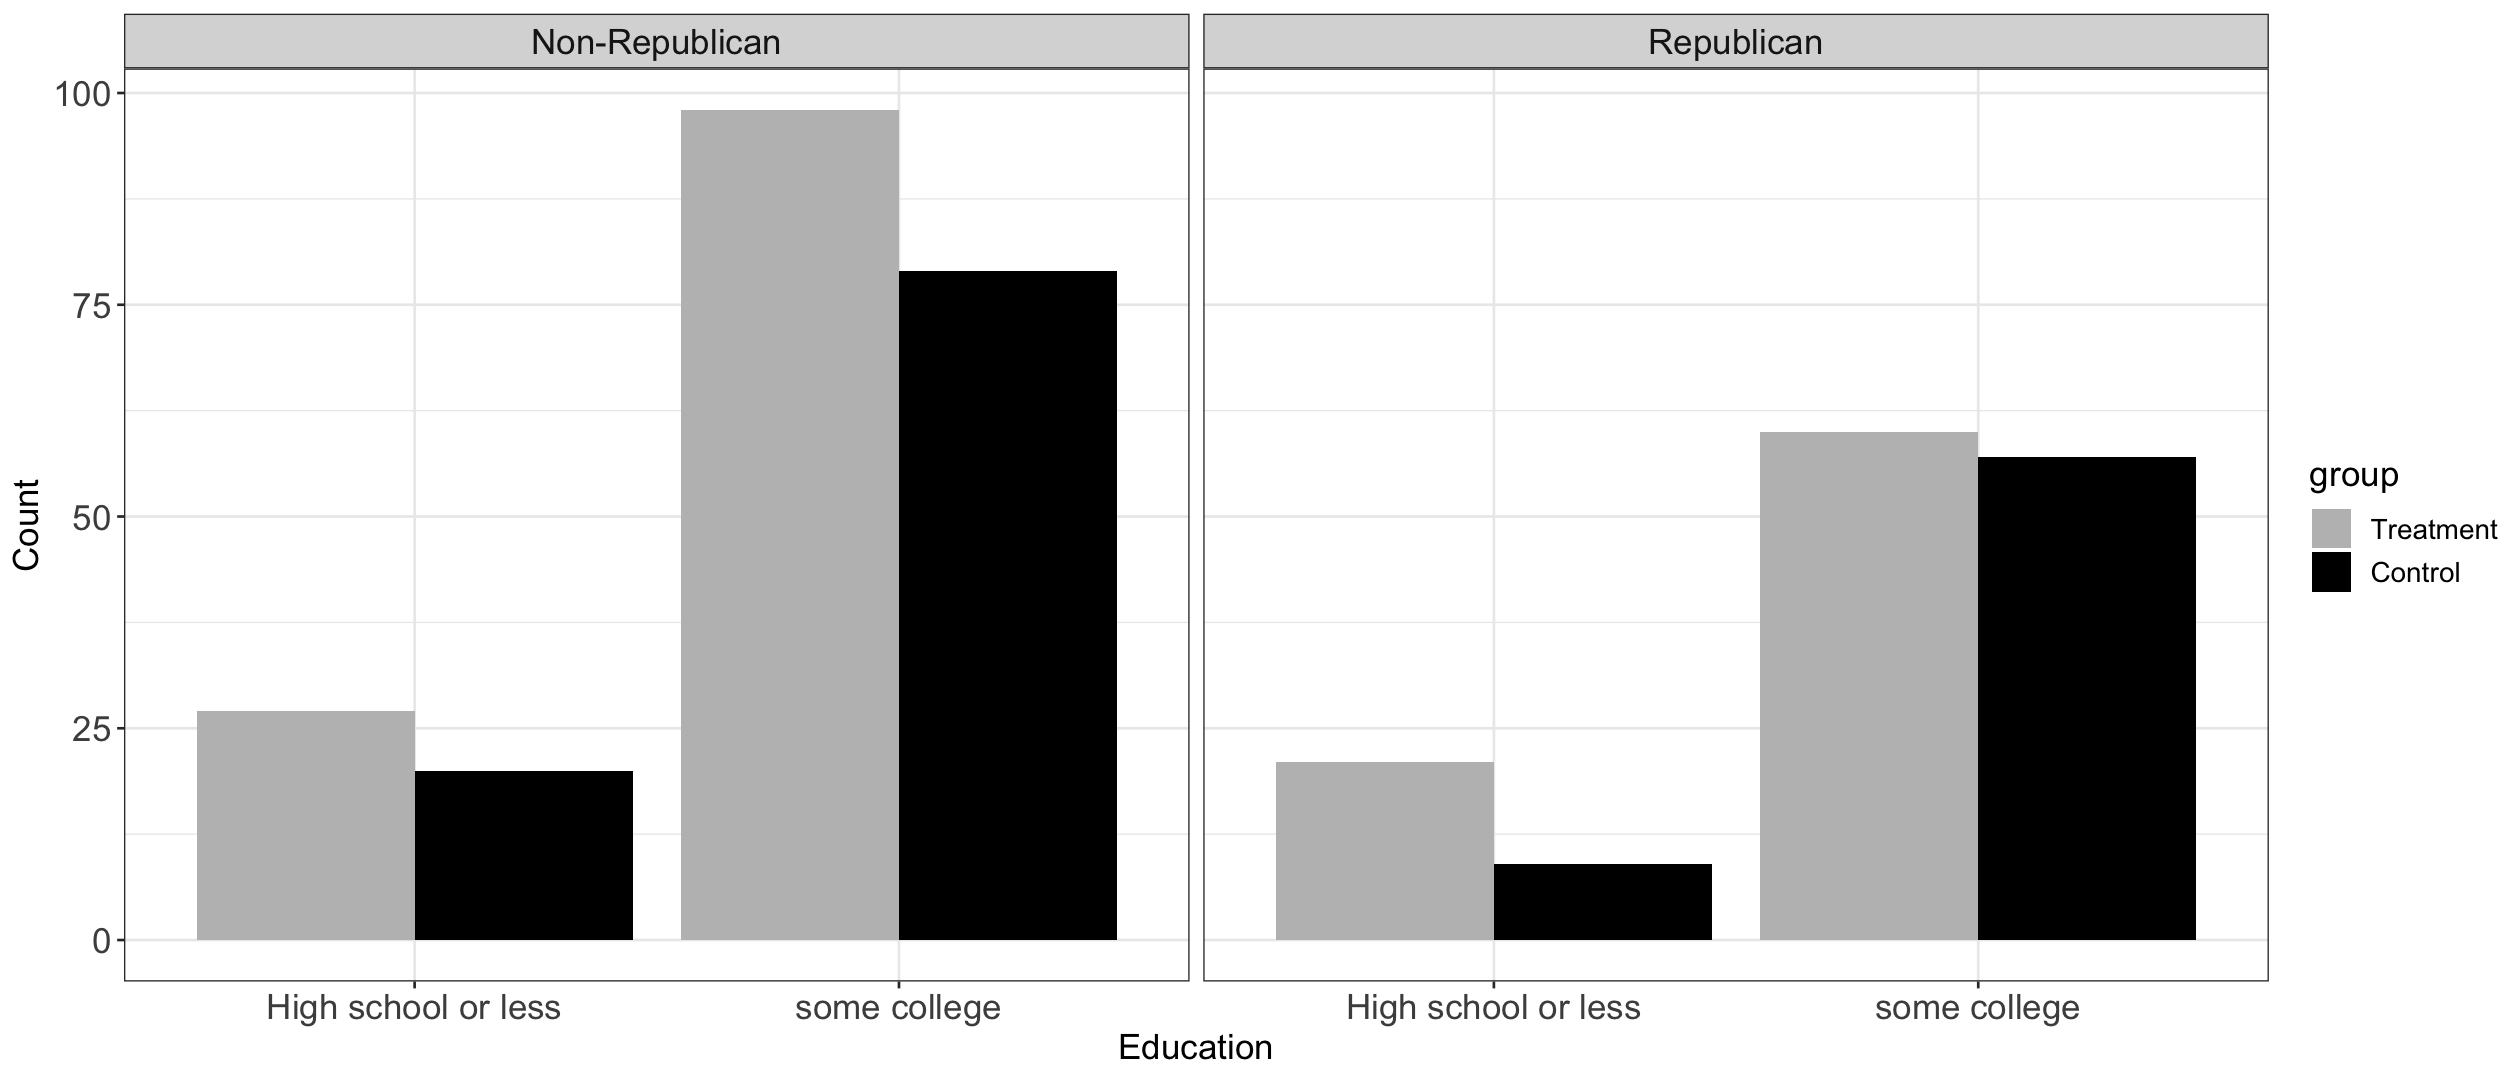

In [63]:
check_education = vcf_data %>% group_by(group, republican, education2) %>% tally() 
check_education$republican <- check_education$republican %>% as.character()
check_education$republican[check_education$republican == "rep"] <- "Republican"
check_education$republican[check_education$republican == "nonrep"] <- "Non-Republican"

options(repr.plot.width = 14, repr.plot.height = 6, repr.plot.res = 180)
check_education %>%
  ggplot(aes(x = education2, y=n, fill=group)) +
  geom_bar(stat ='identity', position = position_dodge()) +
  theme_bw() + scale_fill_manual(values = c('gray', 'black')) +
  labs(x = "Education" , y= "Count") + 
  facet_wrap(~republican, ncol = 2) +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        strip.text.x = element_text(size = 14),
        text = element_text(size = 14)) 

In [64]:
chisq.test(table(vcf_data$education2[vcf_data$republican == "rep"], 
                 vcf_data$group[vcf_data$republican == "rep"]))

ks.test(check_education$n[(check_education$group == 'Control') & (check_education$republican == 'Republican')],
        check_education$n[(check_education$group == 'Treatment' )& (check_education$republican == 'Republican')])

chisq.test(table(vcf_data$education2[vcf_data$republican == "nonrep"], 
                 vcf_data$group[vcf_data$republican == "nonrep"]))

ks.test(check_education$n[(check_education$group == 'Control') & (check_education$republican == 'Non-Republican')],
        check_education$n[(check_education$group == 'Treatment' )& (check_education$republican == 'Non-Republican')])


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$education2[vcf_data$republican == "rep"], vcf_data$group[vcf_data$republican ==     "rep"])
X-squared = 2.6672, df = 1, p-value = 0.1024



	Exact two-sample Kolmogorov-Smirnov test

data:  check_education$n[(check_education$group == "Control") & (check_education$republican == "Republican")] and check_education$n[(check_education$group == "Treatment") & (check_education$republican == "Republican")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided



	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$education2[vcf_data$republican == "nonrep"], vcf_data$group[vcf_data$republican ==     "nonrep"])
X-squared = 0.0080964, df = 1, p-value = 0.9283



	Exact two-sample Kolmogorov-Smirnov test

data:  check_education$n[(check_education$group == "Control") & (check_education$republican == "Non-Republican")] and check_education$n[(check_education$group == "Treatment") & (check_education$republican == "Non-Republican")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided


## Conservatives vs. Non-Conservatives

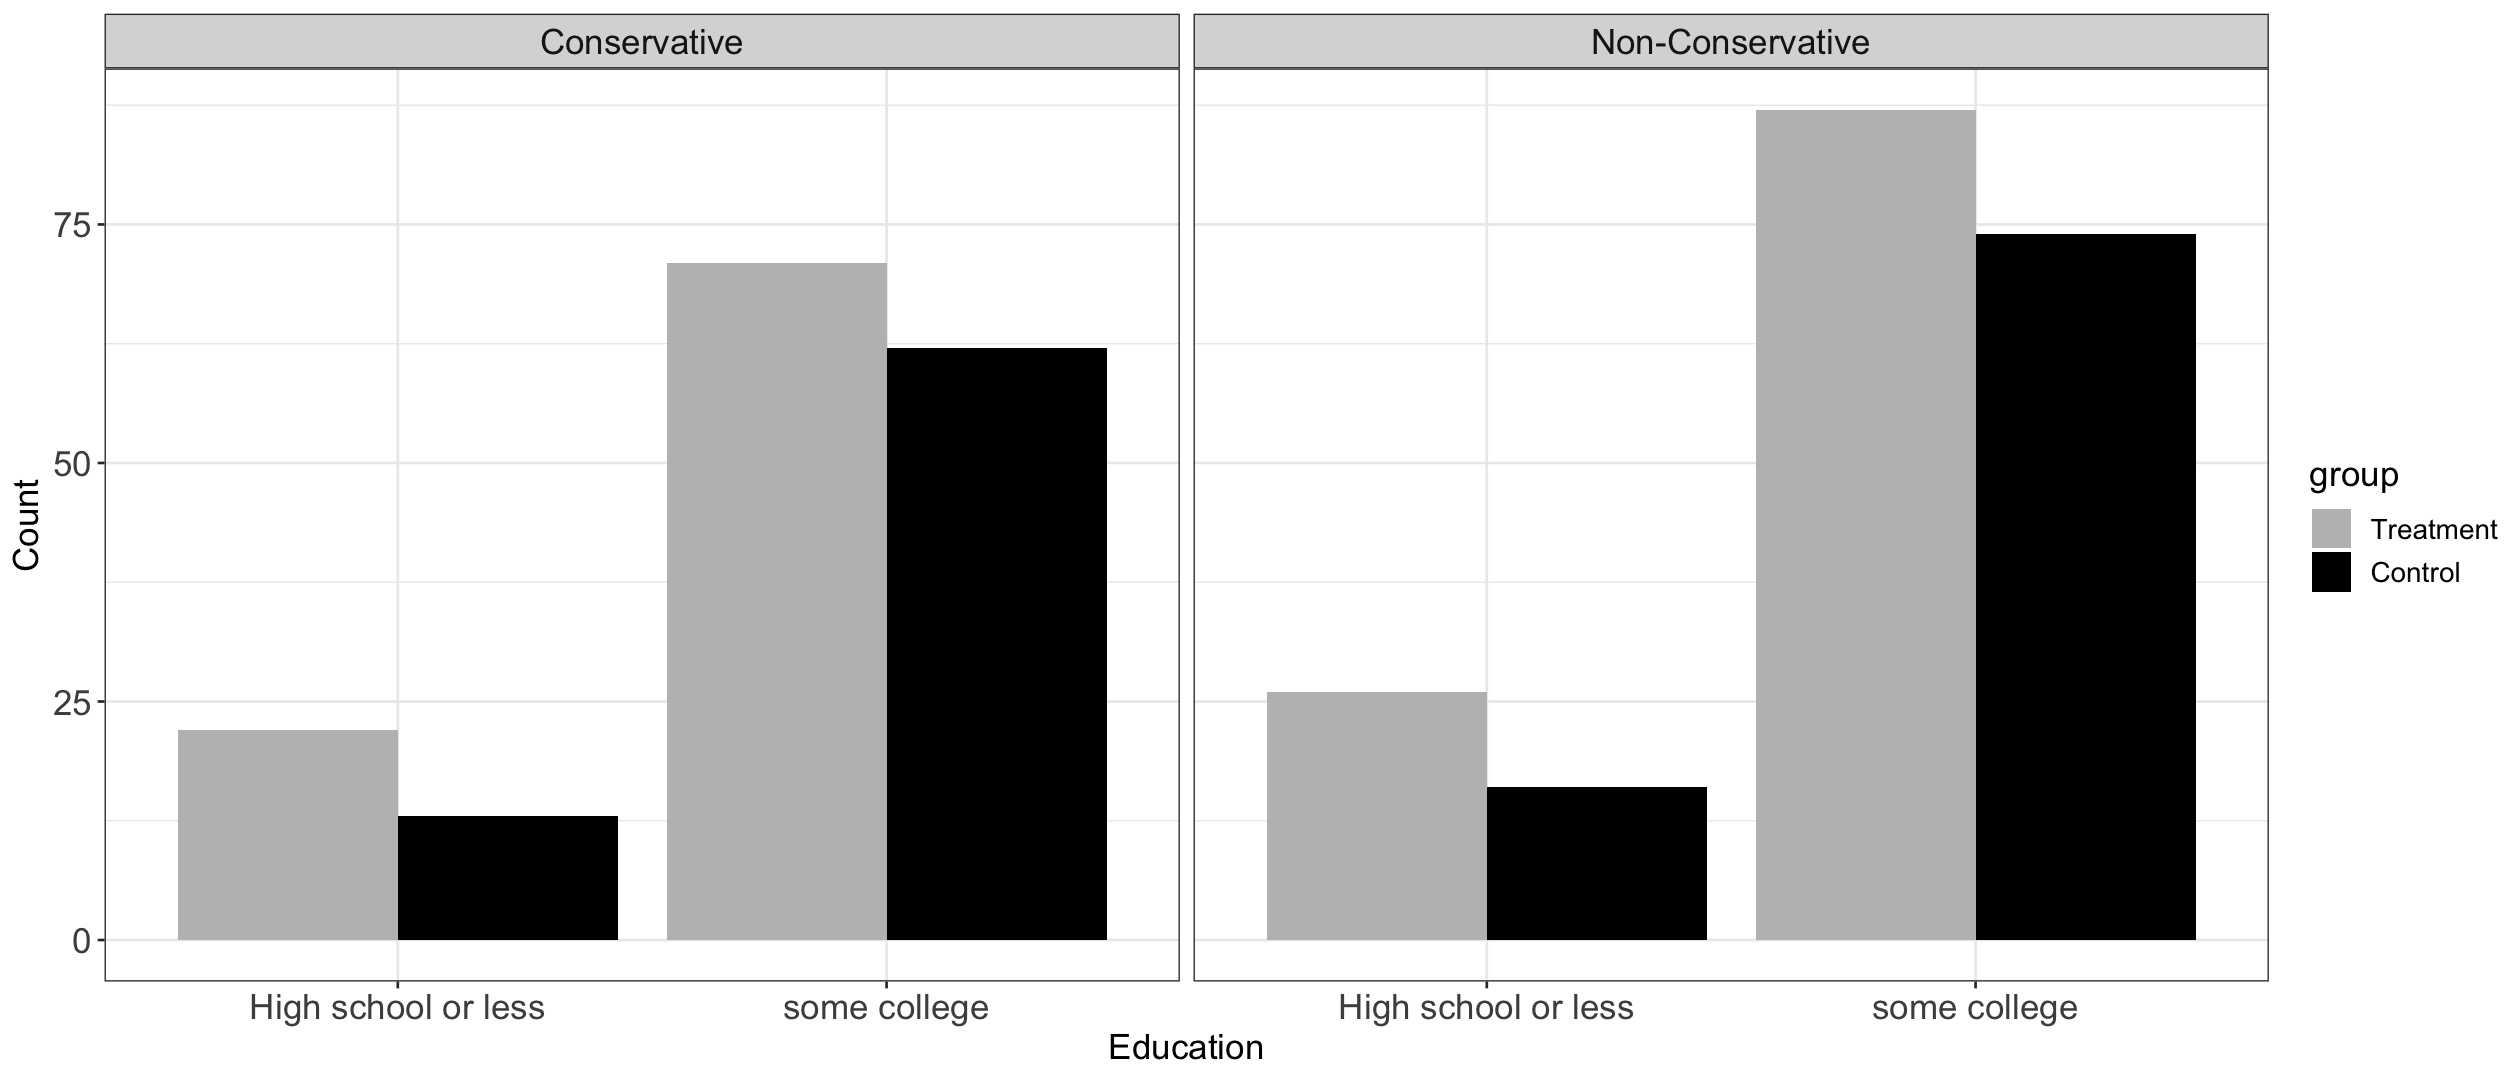

In [65]:
check_education = vcf_data %>% group_by(group, conservative, education2) %>% tally() 
check_education$conservative <- check_education$conservative %>% as.character()
check_education$conservative[check_education$conservative == "conserv"] <- "Conservative"
check_education$conservative[check_education$conservative == "nonconserv"] <- "Non-Conservative"

options(repr.plot.width = 14, repr.plot.height = 6, repr.plot.res = 180)
check_education %>%
  ggplot(aes(x = education2, y=n, fill=group)) +
  geom_bar(stat ='identity', position = position_dodge()) +
  theme_bw() + scale_fill_manual(values = c('gray', 'black')) +
  labs(x = "Education" , y= "Count") + 
  facet_wrap(~conservative, ncol = 2) +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        strip.text.x = element_text(size = 14),
        text = element_text(size = 14))  

In [66]:
chisq.test(table(vcf_data$education2[vcf_data$conservative == "conserv"], 
                 vcf_data$group[vcf_data$conservative == "conserv"]))

ks.test(check_education$n[(check_education$group == 'Control') & (check_education$conservative == 'Conservative')],
        check_education$n[(check_education$group == 'Treatment' )& (check_education$conservative == 'Conservative')])

chisq.test(table(vcf_data$education2[vcf_data$conservative == "nonconserv"], 
                 vcf_data$group[vcf_data$conservative == "nonconserv"]))

ks.test(check_education$n[(check_education$group == 'Control') & (check_education$conservative == 'Non-Conservative')],
        check_education$n[(check_education$group == 'Treatment' )& (check_education$conservative == 'Non-Conservative')])


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$education2[vcf_data$conservative == "conserv"],     vcf_data$group[vcf_data$conservative == "conserv"])
X-squared = 0.65945, df = 1, p-value = 0.4168



	Exact two-sample Kolmogorov-Smirnov test

data:  check_education$n[(check_education$group == "Control") & (check_education$conservative == "Conservative")] and check_education$n[(check_education$group == "Treatment") & (check_education$conservative == "Conservative")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided



	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$education2[vcf_data$conservative == "nonconserv"],     vcf_data$group[vcf_data$conservative == "nonconserv"])
X-squared = 0.54707, df = 1, p-value = 0.4595



	Exact two-sample Kolmogorov-Smirnov test

data:  check_education$n[(check_education$group == "Control") & (check_education$conservative == "Non-Conservative")] and check_education$n[(check_education$group == "Treatment") & (check_education$conservative == "Non-Conservative")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided


## Trusting vs. Distrusting PHIs

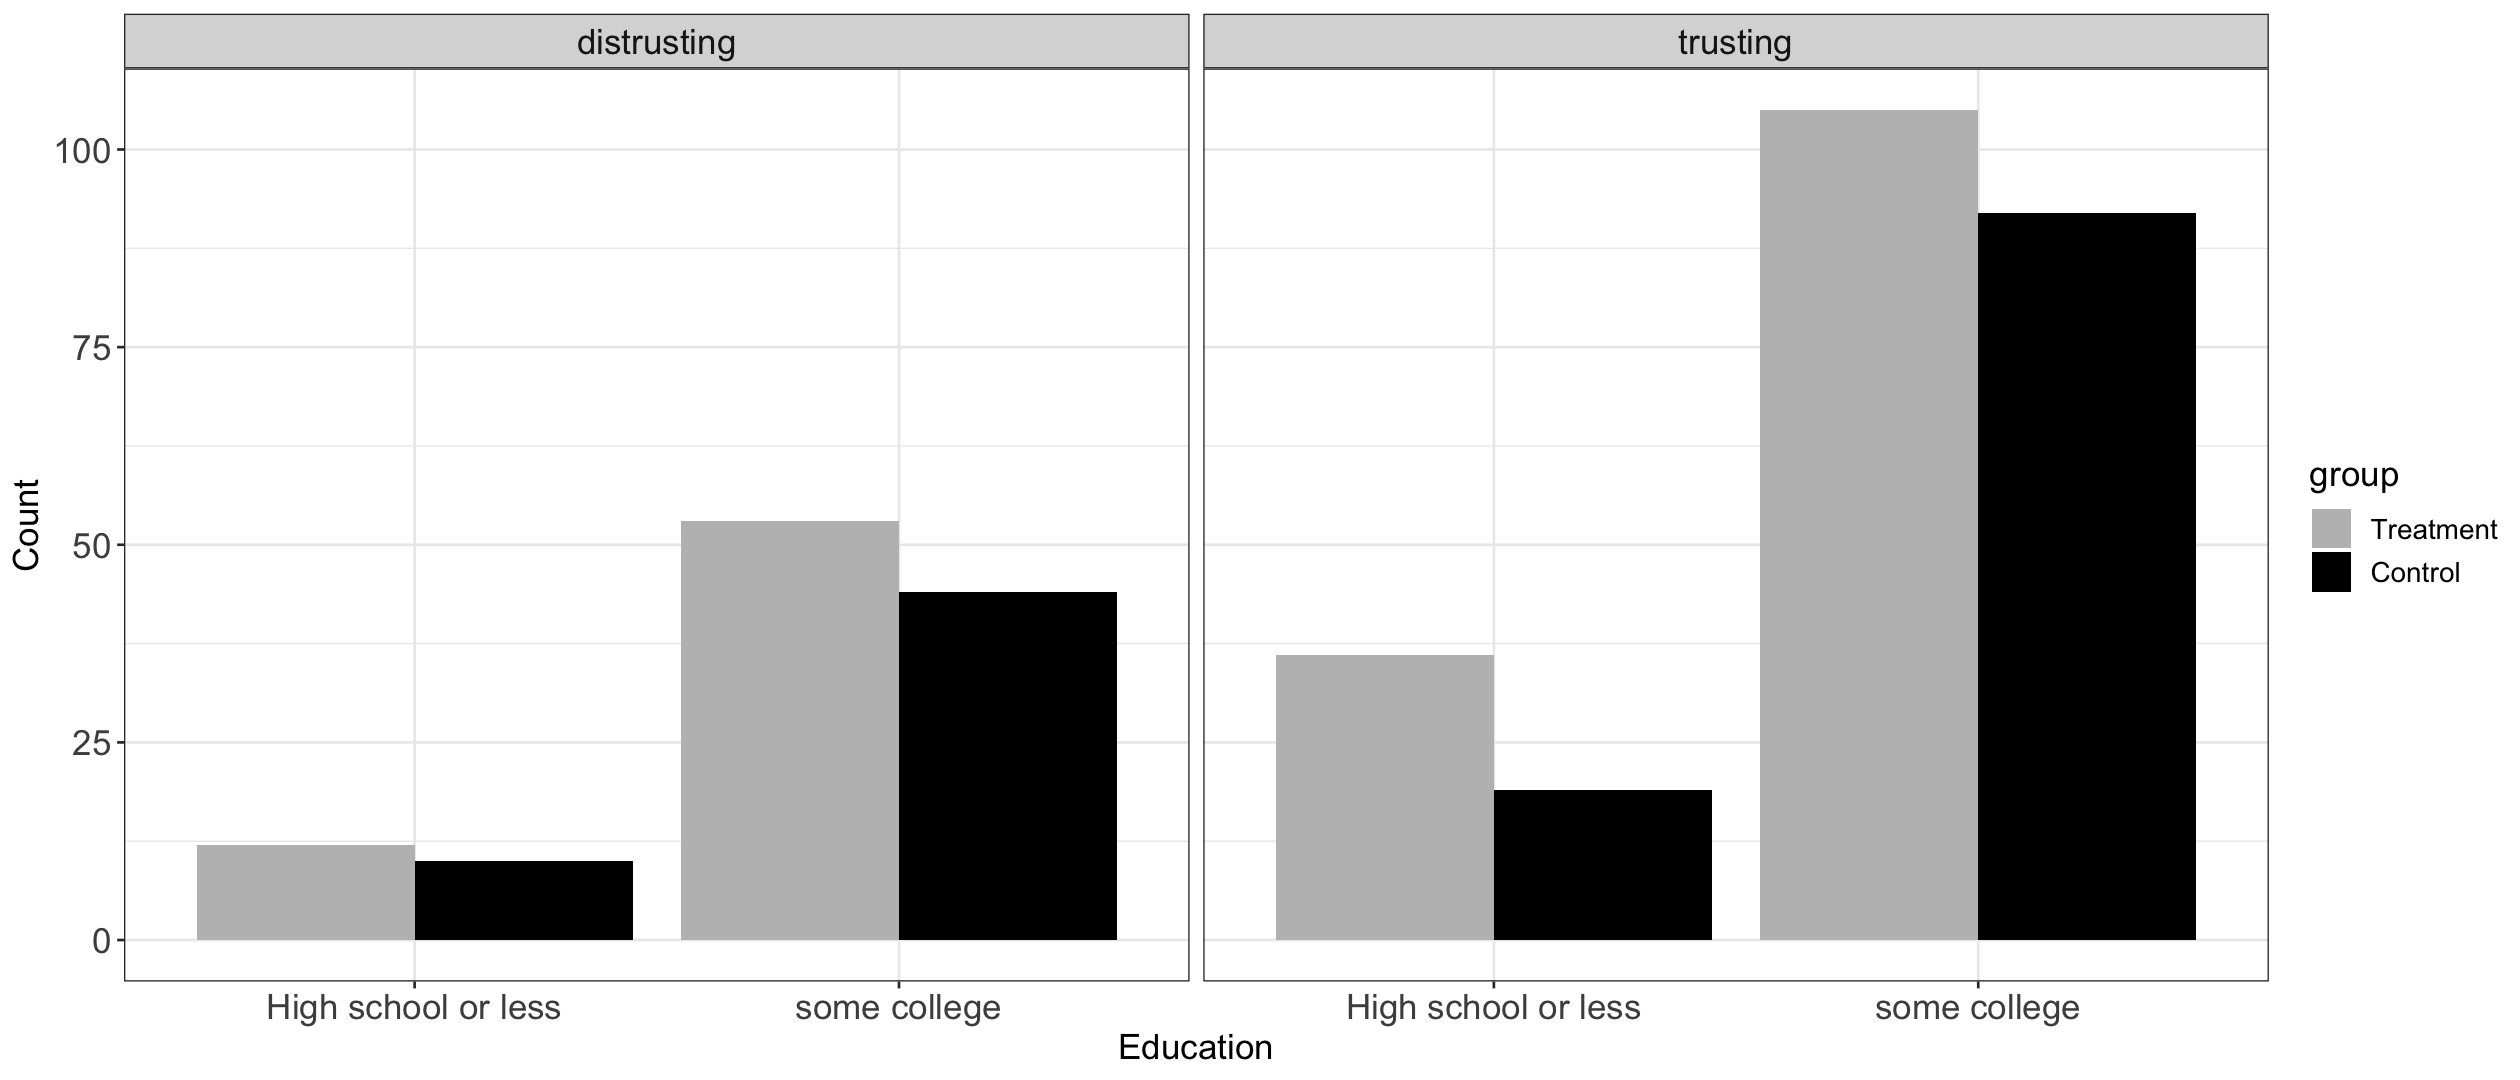

In [67]:
check_education = vcf_data %>% group_by(group, phi_trust_cat, education2) %>% tally() 

options(repr.plot.width = 14, repr.plot.height = 6, repr.plot.res = 180)
check_education %>%
  ggplot(aes(x = education2, y=n, fill=group)) +
  geom_bar(stat ='identity', position = position_dodge()) +
  theme_bw() + scale_fill_manual(values = c('gray', 'black')) +
  labs(x = "Education" , y= "Count") + 
  facet_wrap(~phi_trust_cat, ncol = 2) +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        strip.text.x = element_text(size = 14),
        text = element_text(size = 14)) 

In [68]:
chisq.test(table(vcf_data$education2[vcf_data$phi_trust_cat == "trusting"], 
                 vcf_data$group[vcf_data$phi_trust_cat == "trusting"]))

ks.test(check_education$n[(check_education$group == 'Control') & (check_education$phi_trust_cat == 'trusting')],
        check_education$n[(check_education$group == 'Treatment' )& (check_education$phi_trust_cat == 'trusting')])

chisq.test(table(vcf_data$education2[vcf_data$phi_trust_cat == "distrusting"], 
                 vcf_data$group[vcf_data$phi_trust_cat == "distrusting"]))

ks.test(check_education$n[(check_education$group == 'Control') & (check_education$phi_trust_cat == 'distrusting')],
        check_education$n[(check_education$group == 'Treatment' )& (check_education$phi_trust_cat == 'distrusting')])


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$education2[vcf_data$phi_trust_cat == "trusting"],     vcf_data$group[vcf_data$phi_trust_cat == "trusting"])
X-squared = 2.1079, df = 1, p-value = 0.1465



	Exact two-sample Kolmogorov-Smirnov test

data:  check_education$n[(check_education$group == "Control") & (check_education$phi_trust_cat == "trusting")] and check_education$n[(check_education$group == "Treatment") & (check_education$phi_trust_cat == "trusting")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided



	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$education2[vcf_data$phi_trust_cat == "distrusting"],     vcf_data$group[vcf_data$phi_trust_cat == "distrusting"])
X-squared = 0, df = 1, p-value = 1



	Exact two-sample Kolmogorov-Smirnov test

data:  check_education$n[(check_education$group == "Control") & (check_education$phi_trust_cat == "distrusting")] and check_education$n[(check_education$group == "Treatment") & (check_education$phi_trust_cat == "distrusting")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided


## Trusting vs. Distrusting Governmental Institutions

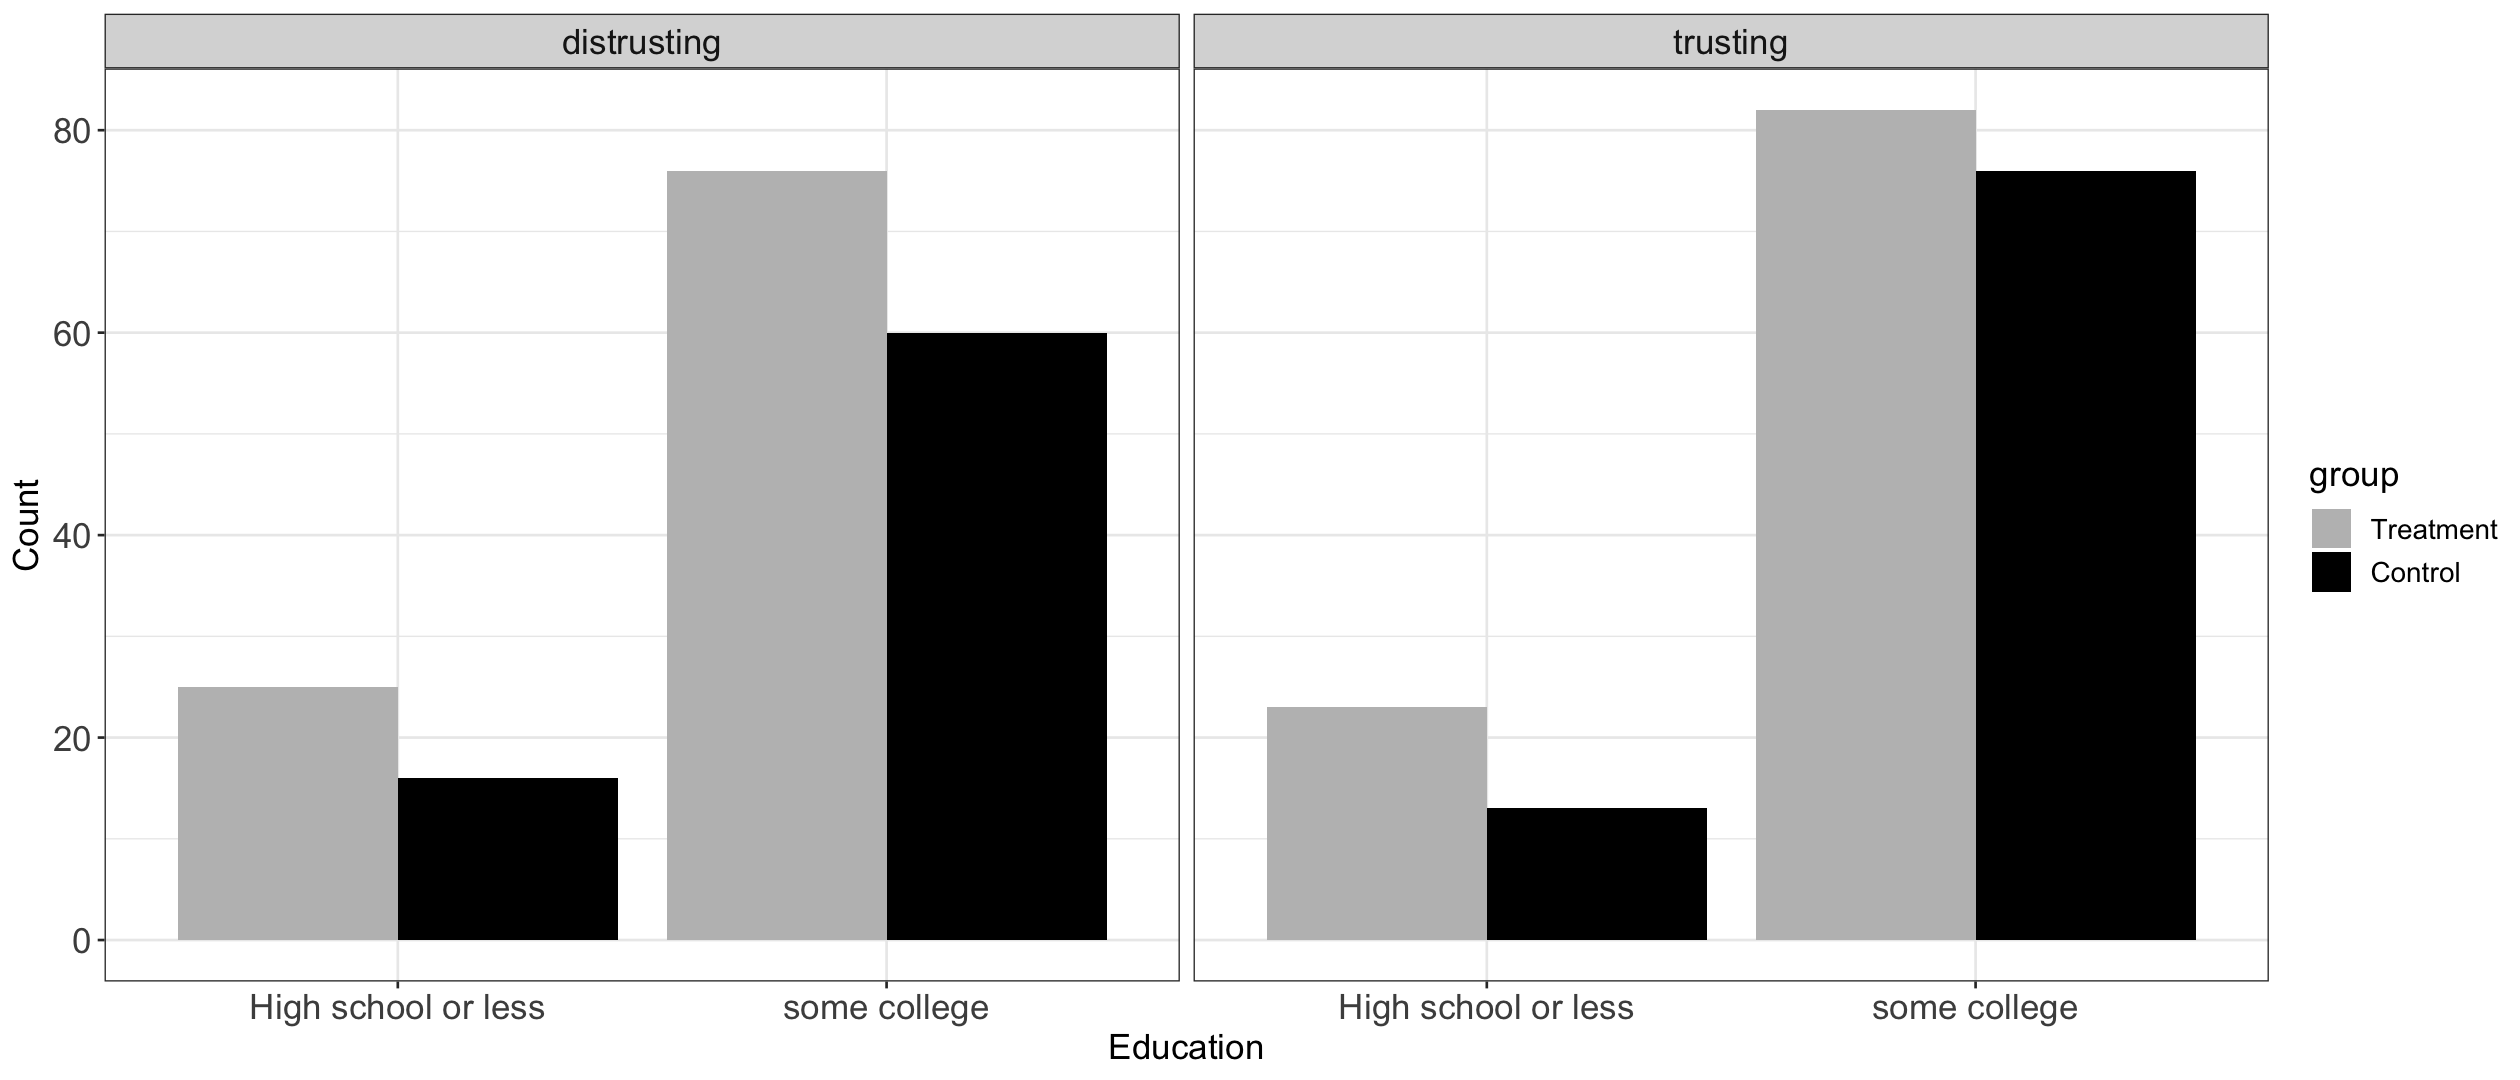

In [69]:
check_education = vcf_data %>% group_by(group, gov_trust_cat, education2) %>% tally() 

options(repr.plot.width = 14, repr.plot.height = 6, repr.plot.res = 180)
check_education %>%
  ggplot(aes(x = education2, y=n, fill=group)) +
  geom_bar(stat ='identity', position = position_dodge()) +
  theme_bw() + scale_fill_manual(values = c('gray', 'black')) +
  labs(x = "Education" , y= "Count") + 
  facet_wrap(~gov_trust_cat, ncol = 2) +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        strip.text.x = element_text(size = 14),
        text = element_text(size = 14)) 

In [70]:
chisq.test(table(vcf_data$education2[vcf_data$gov_trust_cat == "trusting"], 
                 vcf_data$group[vcf_data$gov_trust_cat == "trusting"]))

ks.test(check_education$n[(check_education$group == 'Control') & (check_education$gov_trust_cat == 'trusting')],
        check_education$n[(check_education$group == 'Treatment' )& (check_education$gov_trust_cat == 'trusting')])

chisq.test(table(vcf_data$education2[vcf_data$gov_trust_cat == "distrusting"], 
                 vcf_data$group[vcf_data$gov_trust_cat == "distrusting"]))

ks.test(check_education$n[(check_education$group == 'Control') & (check_education$gov_trust_cat == 'distrusting')],
        check_education$n[(check_education$group == 'Treatment' )& (check_education$gov_trust_cat == 'distrusting')])


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$education2[vcf_data$gov_trust_cat == "trusting"],     vcf_data$group[vcf_data$gov_trust_cat == "trusting"])
X-squared = 1.249, df = 1, p-value = 0.2637



	Exact two-sample Kolmogorov-Smirnov test

data:  check_education$n[(check_education$group == "Control") & (check_education$gov_trust_cat == "trusting")] and check_education$n[(check_education$group == "Treatment") & (check_education$gov_trust_cat == "trusting")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided



	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$education2[vcf_data$gov_trust_cat == "distrusting"],     vcf_data$group[vcf_data$gov_trust_cat == "distrusting"])
X-squared = 0.15806, df = 1, p-value = 0.691



	Exact two-sample Kolmogorov-Smirnov test

data:  check_education$n[(check_education$group == "Control") & (check_education$gov_trust_cat == "distrusting")] and check_education$n[(check_education$group == "Treatment") & (check_education$gov_trust_cat == "distrusting")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided


# Check Income

## Republican vs. Non-Republican

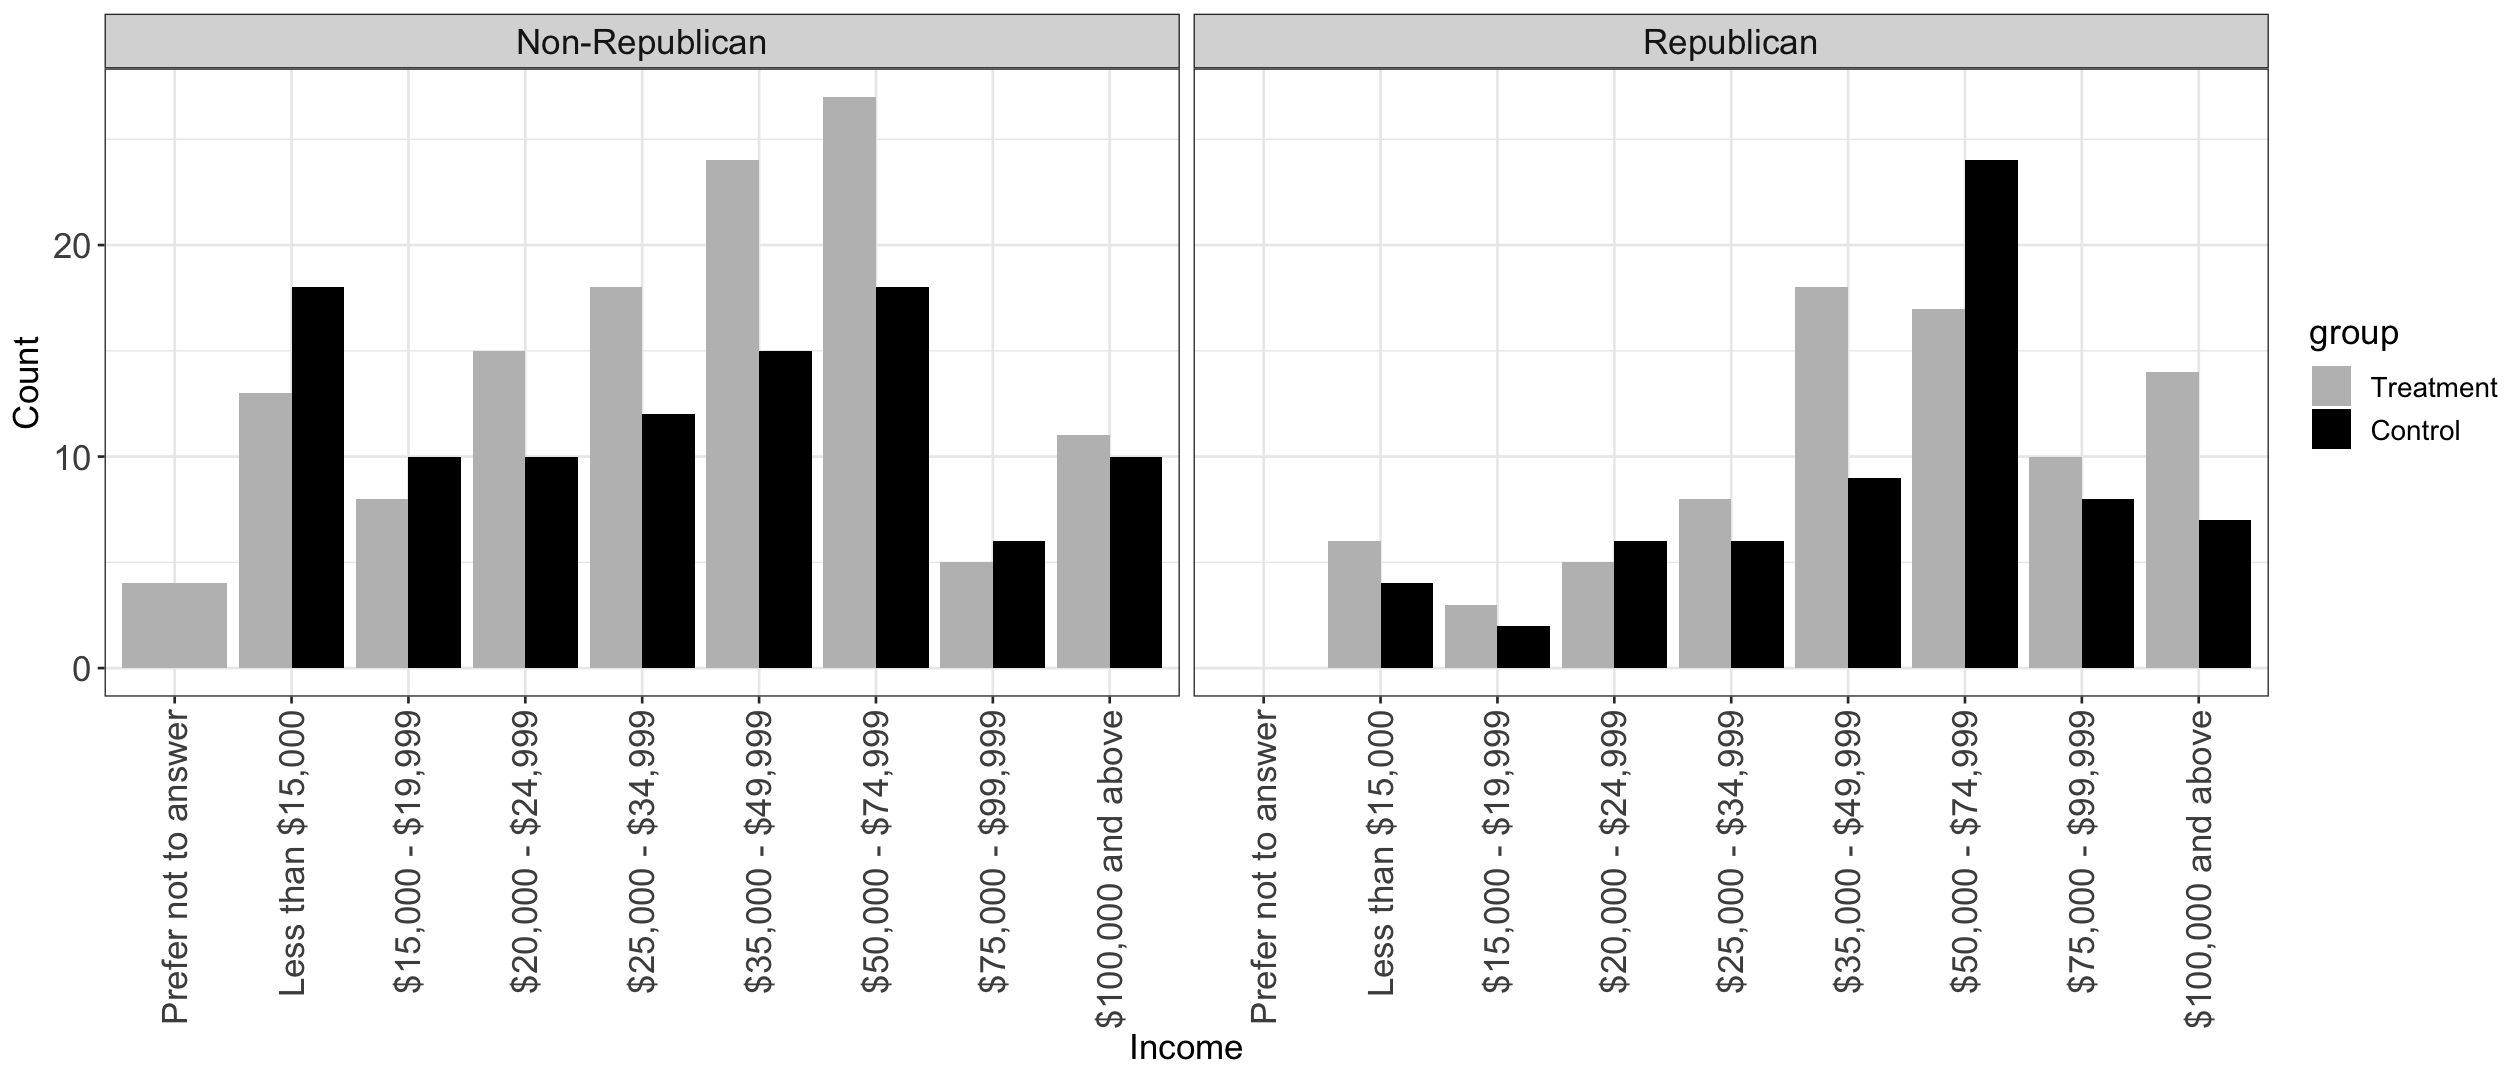

In [71]:
check_income = vcf_data %>% group_by(group, republican, income) %>% tally() 
check_income$republican <- check_income$republican %>% as.character()
check_income$republican[check_income$republican == "rep"] <- "Republican"
check_income$republican[check_income$republican == "nonrep"] <- "Non-Republican"
check_income$income <- factor(check_income$income, 
                             levels = c("Prefer not to answer", "Less than $15,000",
                                        "$15,000 - $19,999", "$20,000 - $24,999",
                                        "$25,000 - $34,999", "$35,000 - $49,999", 
                                        "$50,000 - $74,999", "$75,000 - $99,999", 
                                        "$100,000 and above"))

options(repr.plot.width = 14, repr.plot.height = 6, repr.plot.res = 180)
check_income %>%
  ggplot(aes(x = income, y=n, fill=group)) +
  geom_bar(stat ='identity', position = position_dodge()) +
  theme_bw() + scale_fill_manual(values = c('gray', 'black')) +
  labs(x = "Income" , y= "Count") + 
  facet_wrap(~republican, ncol = 2) +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        strip.text.x = element_text(size = 14),
        text = element_text(size = 14)) + 
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) 

In [72]:
chisq.test(table(vcf_data$income[vcf_data$republican == "rep"], 
                 vcf_data$group[vcf_data$republican == "rep"]))

ks.test(check_income$n[(check_income$group == 'Control') & (check_income$republican == 'Republican')],
        check_income$n[(check_income$group == 'Treatment' )& (check_income$republican == 'Republican')])

chisq.test(table(vcf_data$income[vcf_data$republican == "nonrep"], 
                 vcf_data$group[vcf_data$republican == "nonrep"]))

ks.test(check_income$n[(check_income$group == 'Control') & (check_income$republican == 'Non-Republican')],
        check_income$n[(check_income$group == 'Treatment' )& (check_income$republican == 'Non-Republican')])

Warning message in chisq.test(table(vcf_data$income[vcf_data$republican == "rep"], :
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(vcf_data$income[vcf_data$republican == "rep"], vcf_data$group[vcf_data$republican ==     "rep"])
X-squared = 6.2619, df = 7, p-value = 0.5095



	Exact two-sample Kolmogorov-Smirnov test

data:  check_income$n[(check_income$group == "Control") & (check_income$republican == "Republican")] and check_income$n[(check_income$group == "Treatment") & (check_income$republican == "Republican")]
D = 0.375, p-value = 0.5804
alternative hypothesis: two-sided


Warning message in chisq.test(table(vcf_data$income[vcf_data$republican == "nonrep"], :
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(vcf_data$income[vcf_data$republican == "nonrep"], vcf_data$group[vcf_data$republican ==     "nonrep"])
X-squared = 8.3386, df = 8, p-value = 0.4011



	Exact two-sample Kolmogorov-Smirnov test

data:  check_income$n[(check_income$group == "Control") & (check_income$republican == "Non-Republican")] and check_income$n[(check_income$group == "Treatment") & (check_income$republican == "Non-Republican")]
D = 0.22222, p-value = 0.9023
alternative hypothesis: two-sided


## Conservatives vs. Non-Conservatives

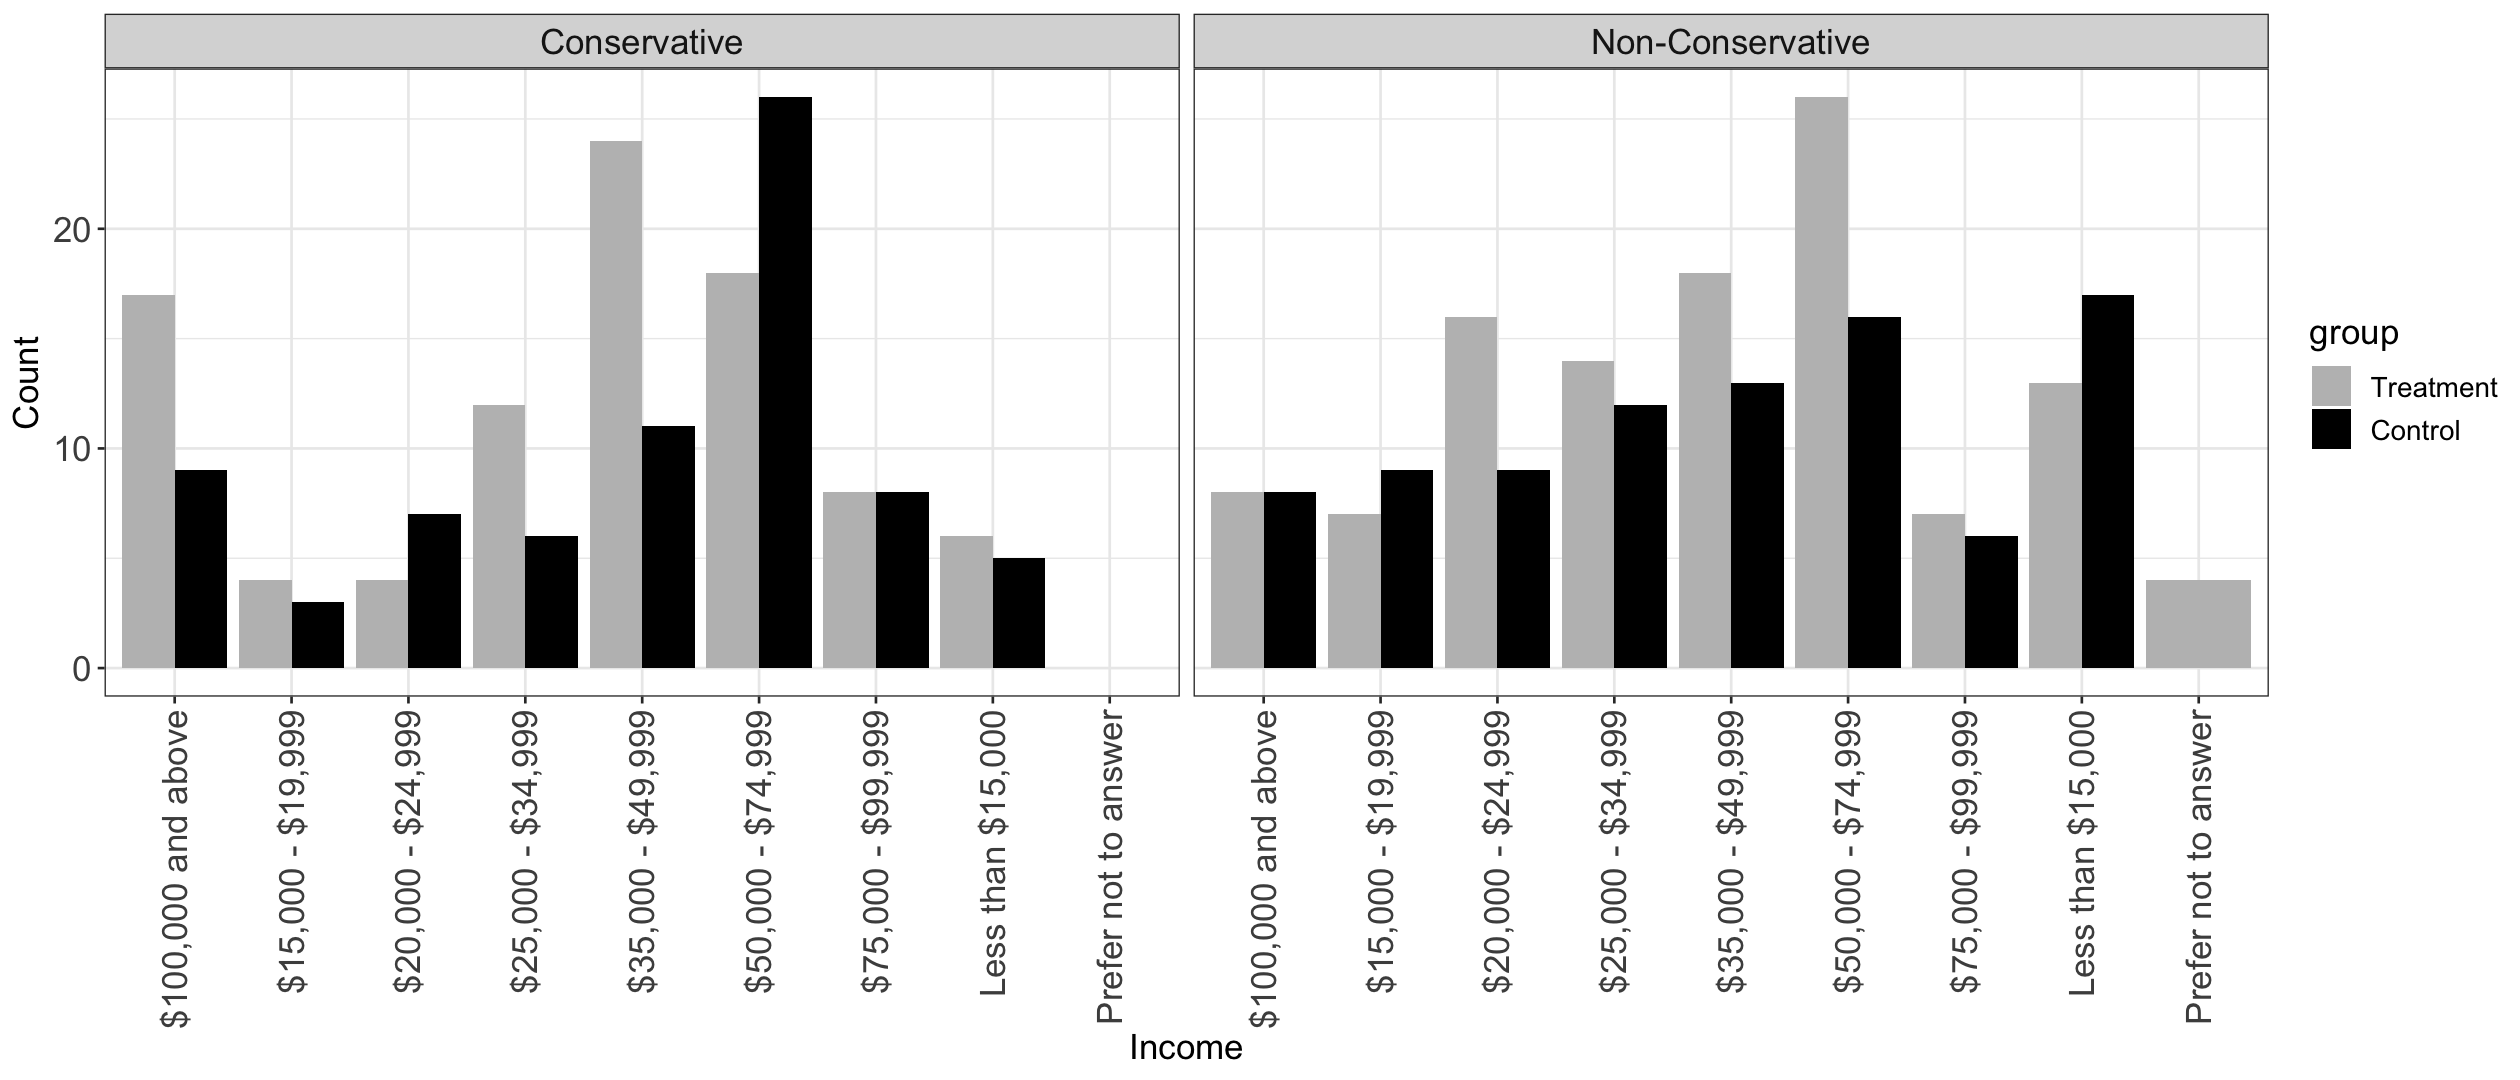

In [73]:
check_income = vcf_data %>% group_by(group, conservative, income) %>% tally() 
check_income$conservative <- check_income$conservative %>% as.character()
check_income$conservative[check_income$conservative == "conserv"] <- "Conservative"
check_income$conservative[check_income$conservative == "nonconserv"] <- "Non-Conservative"

options(repr.plot.width = 14, repr.plot.height = 6, repr.plot.res = 180)
check_income %>%
  ggplot(aes(x = income, y=n, fill=group)) +
  geom_bar(stat ='identity', position = position_dodge()) +
  theme_bw() + scale_fill_manual(values = c('gray', 'black')) +
  labs(x = "Income" , y= "Count") + 
  facet_wrap(~conservative, ncol = 2) +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        strip.text.x = element_text(size = 14),
        text = element_text(size = 14)) + 
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) 

In [74]:
chisq.test(table(vcf_data$income[vcf_data$conservative == "conserv"], 
                 vcf_data$group[vcf_data$conservative == "conserv"]))

ks.test(check_income$n[(check_income$group == 'Control') & (check_income$conservative == 'Conservative')],
        check_income$n[(check_income$group == 'Treatment' )& (check_income$conservative == 'Conservative')])

chisq.test(table(vcf_data$income[vcf_data$conservative == "nonconserv"], 
                 vcf_data$group[vcf_data$conservative == "nonconserv"]))

ks.test(check_income$n[(check_education$group == 'Control') & (check_income$conservative == 'Non-Conservative')],
        check_income$n[(check_education$group == 'Treatment' )& (check_income$conservative == 'Non-Conservative')])

Warning message in chisq.test(table(vcf_data$income[vcf_data$conservative == "conserv"], :
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(vcf_data$income[vcf_data$conservative == "conserv"], vcf_data$group[vcf_data$conservative ==     "conserv"])
X-squared = 9.9826, df = 7, p-value = 0.1896



	Exact two-sample Kolmogorov-Smirnov test

data:  check_income$n[(check_income$group == "Control") & (check_income$conservative == "Conservative")] and check_income$n[(check_income$group == "Treatment") & (check_income$conservative == "Conservative")]
D = 0.375, p-value = 0.6224
alternative hypothesis: two-sided


Warning message in chisq.test(table(vcf_data$income[vcf_data$conservative == "nonconserv"], :
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(vcf_data$income[vcf_data$conservative == "nonconserv"],     vcf_data$group[vcf_data$conservative == "nonconserv"])
X-squared = 7.6538, df = 8, p-value = 0.468


Warning message in (check_education$group == "Control") & (check_income$conservative == :
“longer object length is not a multiple of shorter object length”
Warning message in (check_education$group == "Treatment") & (check_income$conservative == :
“longer object length is not a multiple of shorter object length”



	Exact two-sample Kolmogorov-Smirnov test

data:  check_income$n[(check_education$group == "Control") & (check_income$conservative == "Non-Conservative")] and check_income$n[(check_education$group == "Treatment") & (check_income$conservative == "Non-Conservative")]
D = 0.41667, p-value = 0.3287
alternative hypothesis: two-sided


## Trusting vs. Distrusting PHIs

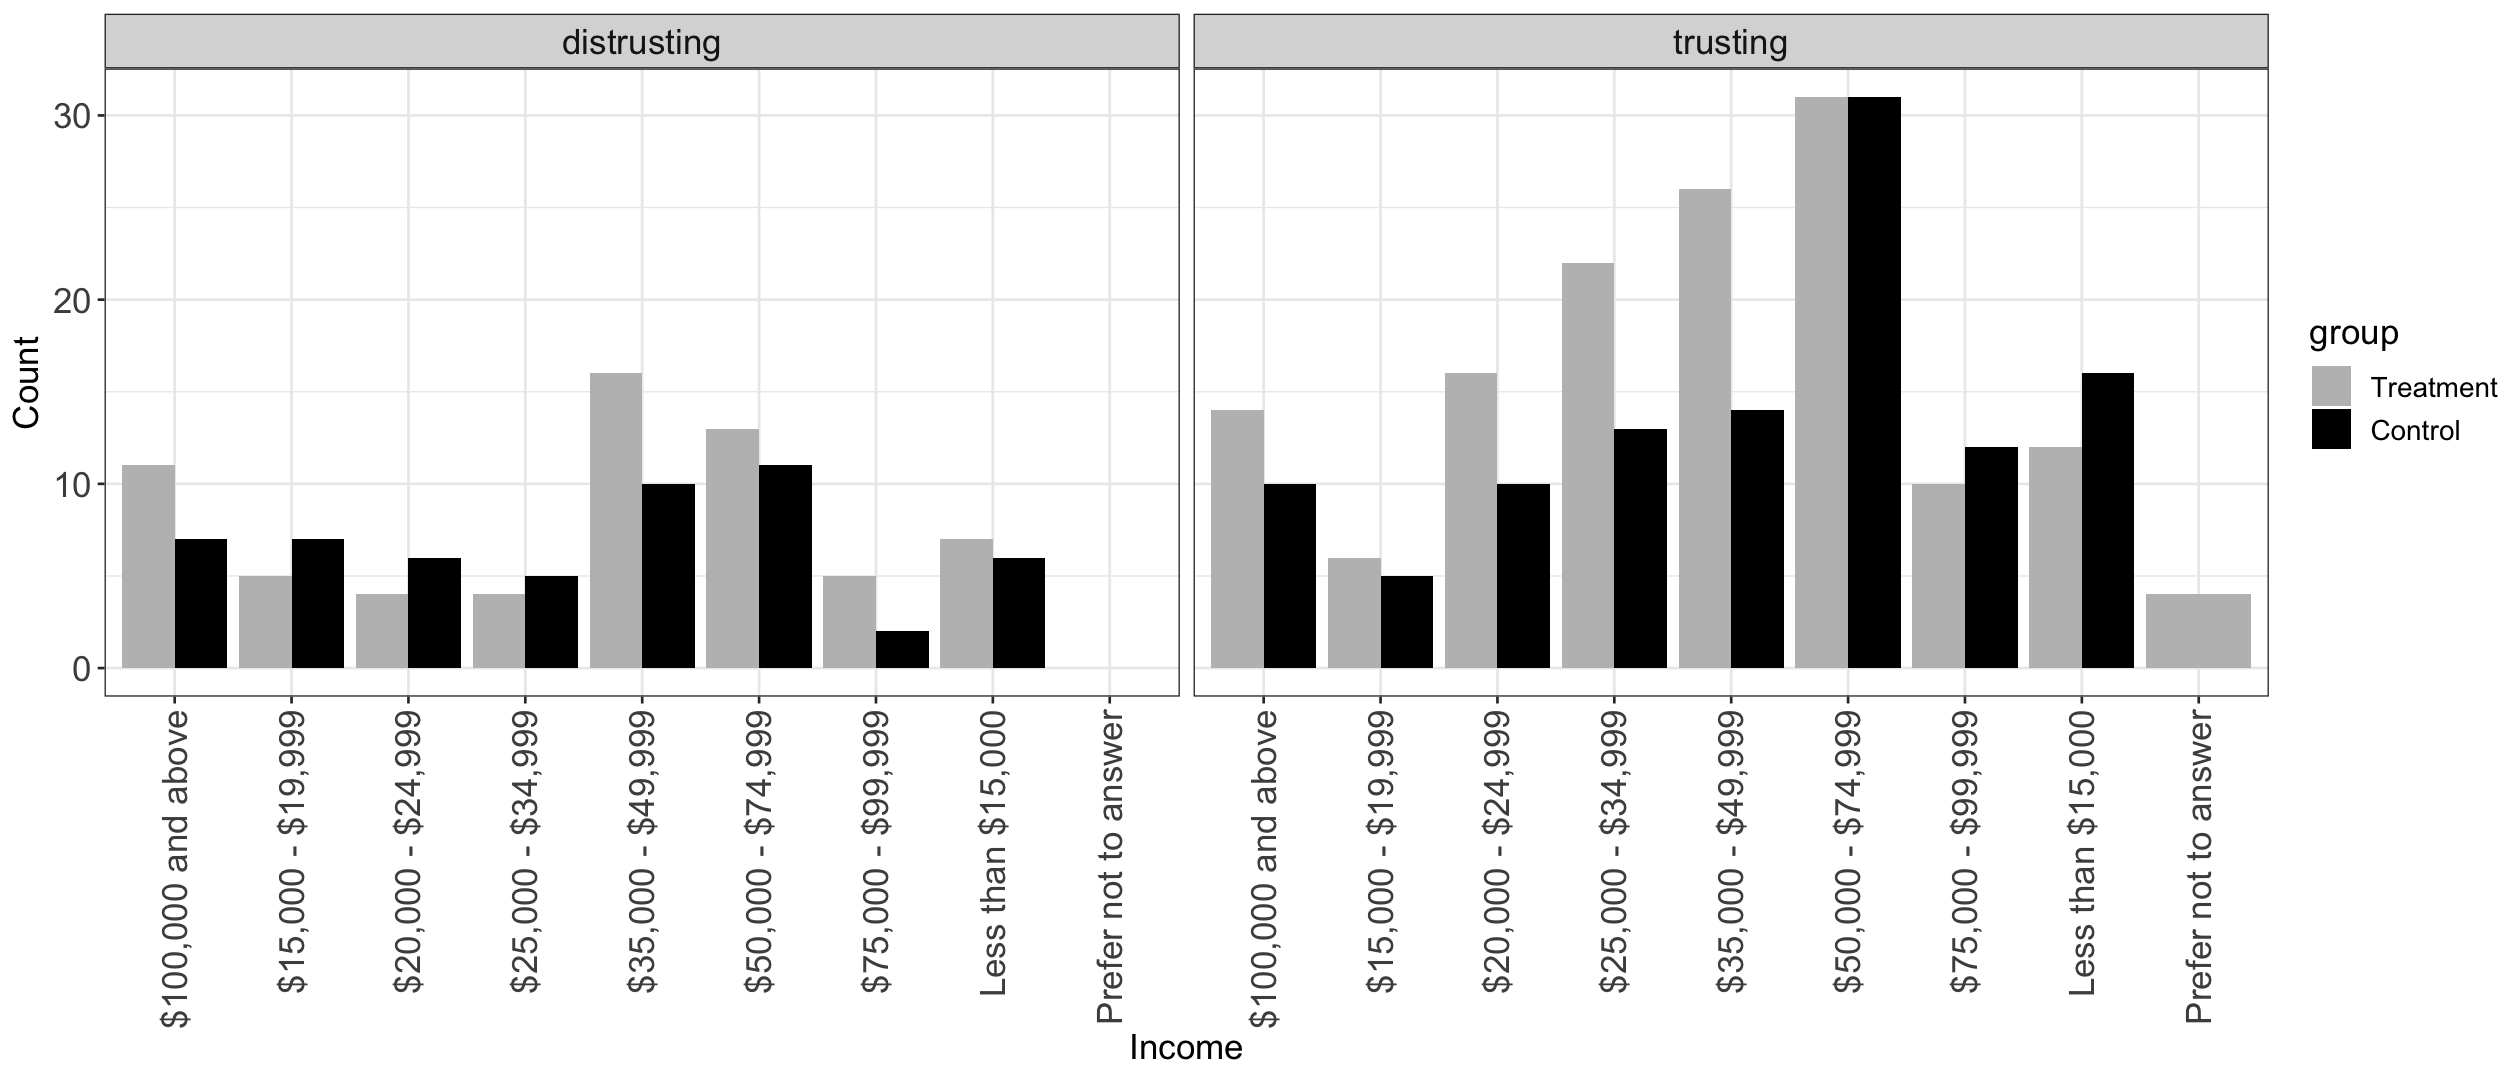

In [75]:
check_income = vcf_data %>% group_by(group, phi_trust_cat, income) %>% tally() 

options(repr.plot.width = 14, repr.plot.height = 6, repr.plot.res = 180)
check_income %>%
  ggplot(aes(x = income, y=n, fill=group)) +
  geom_bar(stat ='identity', position = position_dodge()) +
  theme_bw() + scale_fill_manual(values = c('gray', 'black')) +
  labs(x = "Income" , y= "Count") + 
  facet_wrap(~phi_trust_cat, ncol = 2) +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        strip.text.x = element_text(size = 14),
        text = element_text(size = 14)) + 
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) 

In [76]:
chisq.test(table(vcf_data$income[vcf_data$phi_trust_cat == "trusting"], 
                 vcf_data$group[vcf_data$phi_trust_cat == "trusting"]))

ks.test(check_income$n[(check_income$group == 'Control') & (check_income$phi_trust_cat == 'trusting')],
        check_income$n[(check_income$group == 'Treatment' )& (check_income$phi_trust_cat == 'trusting')])

chisq.test(table(vcf_data$income[vcf_data$phi_trust_cat == "distrusting"], 
                 vcf_data$group[vcf_data$phi_trust_cat == "distrusting"]))

ks.test(check_income$n[(check_income$group == 'Control') & (check_income$phi_trust_cat == 'distrusting')],
        check_income$n[(check_income$group == 'Treatment' )& (check_income$phi_trust_cat == 'distrusting')])

Warning message in chisq.test(table(vcf_data$income[vcf_data$phi_trust_cat == "trusting"], :
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(vcf_data$income[vcf_data$phi_trust_cat == "trusting"],     vcf_data$group[vcf_data$phi_trust_cat == "trusting"])
X-squared = 9.3711, df = 8, p-value = 0.312



	Exact two-sample Kolmogorov-Smirnov test

data:  check_income$n[(check_income$group == "Control") & (check_income$phi_trust_cat == "trusting")] and check_income$n[(check_income$group == "Treatment") & (check_income$phi_trust_cat == "trusting")]
D = 0.20833, p-value = 0.9296
alternative hypothesis: two-sided


Warning message in chisq.test(table(vcf_data$income[vcf_data$phi_trust_cat == "distrusting"], :
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(vcf_data$income[vcf_data$phi_trust_cat == "distrusting"],     vcf_data$group[vcf_data$phi_trust_cat == "distrusting"])
X-squared = 3.6617, df = 7, p-value = 0.8178



	Exact two-sample Kolmogorov-Smirnov test

data:  check_income$n[(check_income$group == "Control") & (check_income$phi_trust_cat == "distrusting")] and check_income$n[(check_income$group == "Treatment") & (check_income$phi_trust_cat == "distrusting")]
D = 0.25, p-value = 0.9329
alternative hypothesis: two-sided


## Trusting vs. Distrusting Governmental Institutions

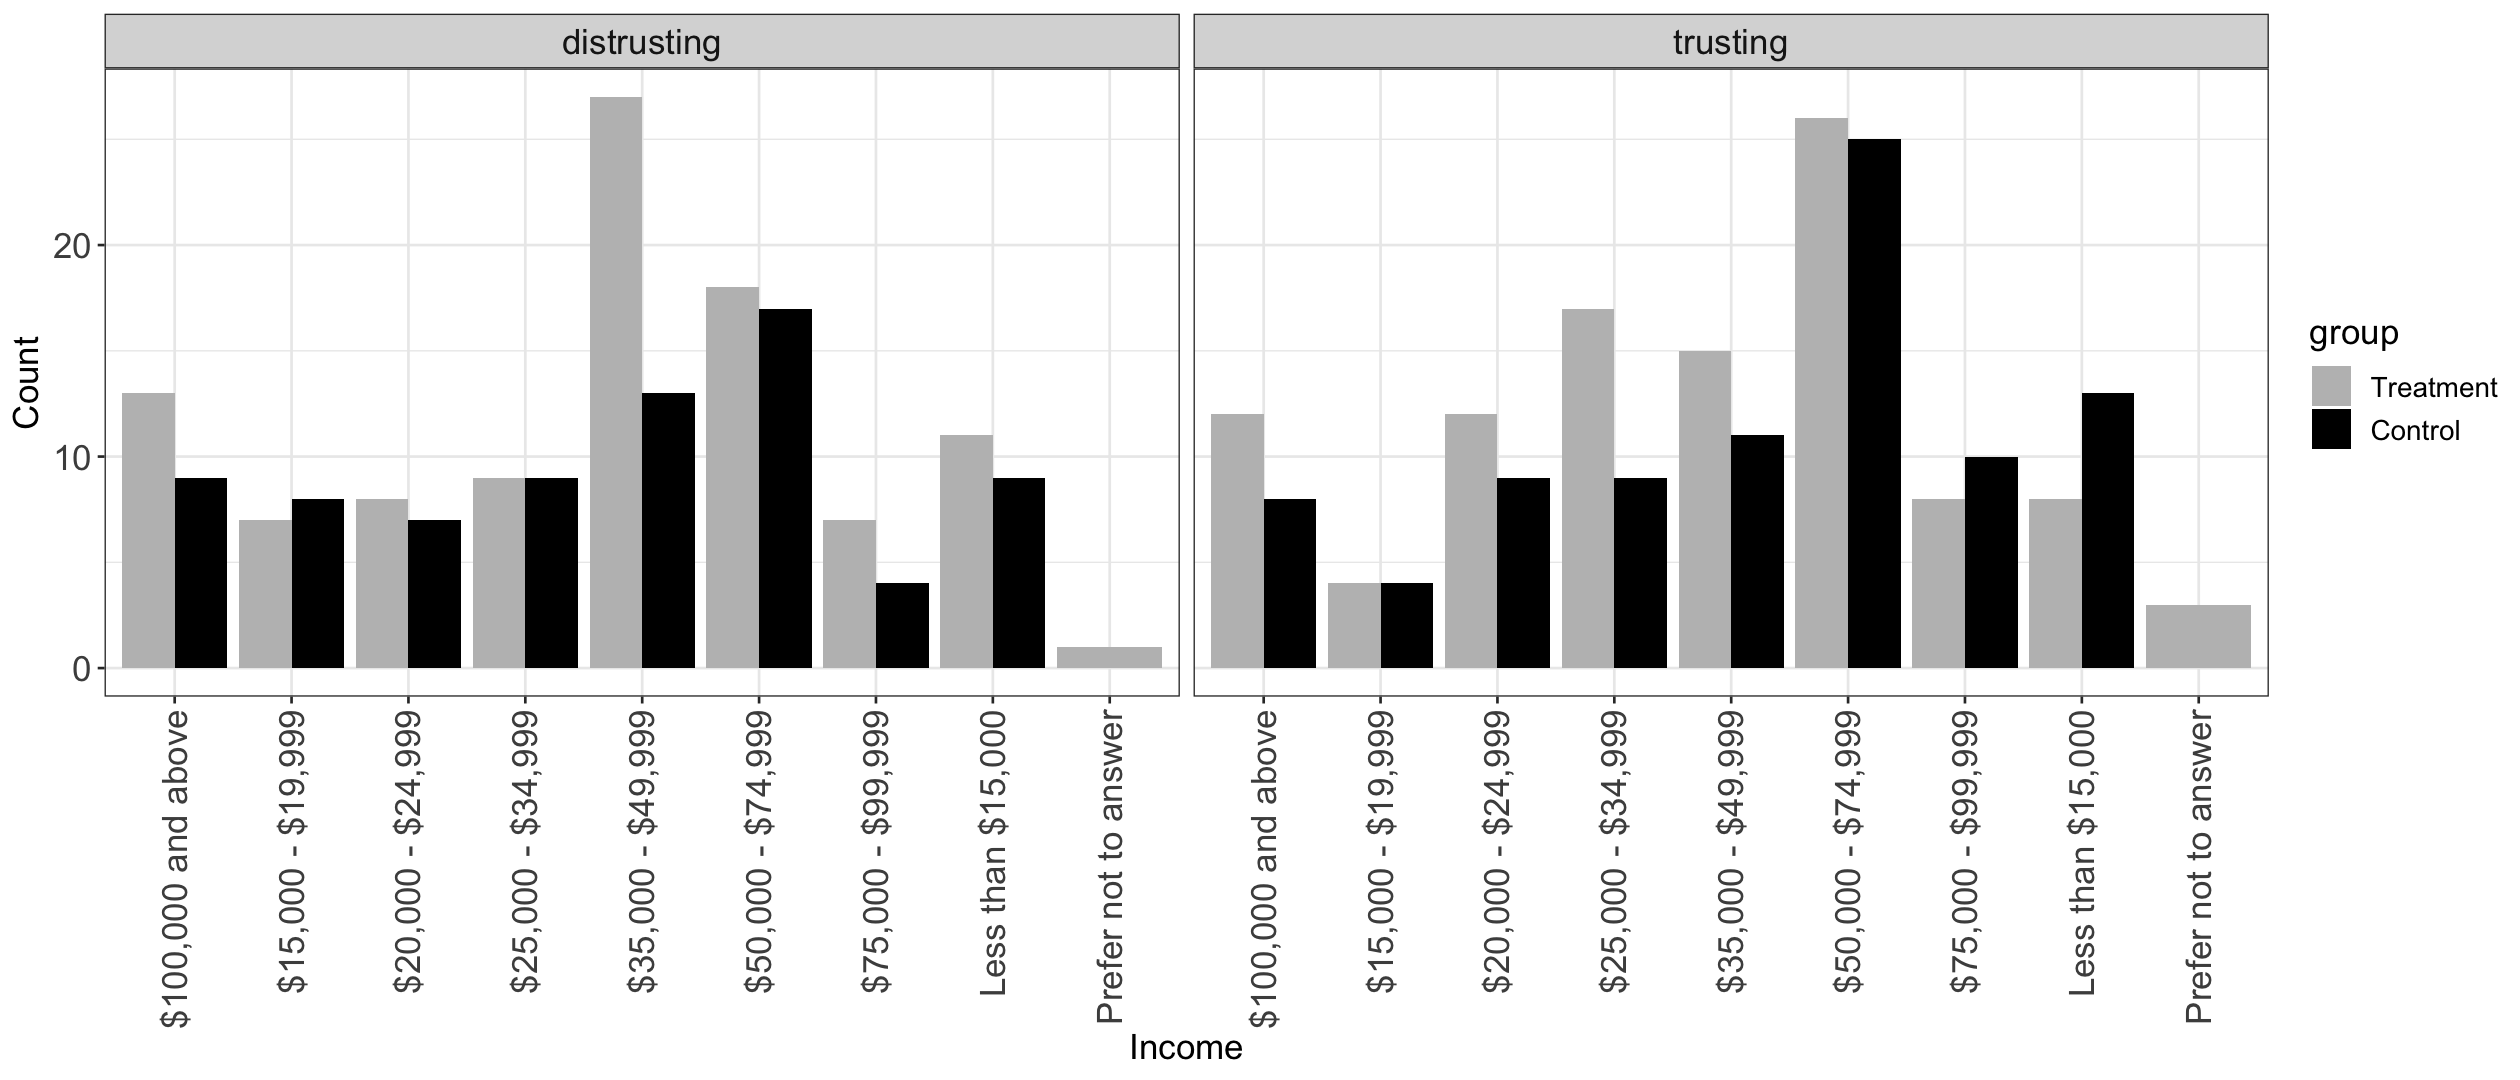

In [77]:
check_income = vcf_data %>% group_by(group, gov_trust_cat, income) %>% tally() 

options(repr.plot.width = 14, repr.plot.height = 6, repr.plot.res = 180)
check_income %>%
  ggplot(aes(x = income, y=n, fill=group)) +
  geom_bar(stat ='identity', position = position_dodge()) +
  theme_bw() + scale_fill_manual(values = c('gray', 'black')) +
  labs(x = "Income" , y= "Count") + 
  facet_wrap(~gov_trust_cat, ncol = 2) +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        strip.text.x = element_text(size = 14),
        text = element_text(size = 14)) + 
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) 

In [78]:
chisq.test(table(vcf_data$income[vcf_data$gov_trust_cat == "trusting"], 
                 vcf_data$group[vcf_data$gov_trust_cat == "trusting"]))

ks.test(check_income$n[(check_income$group == 'Control') & (check_income$gov_trust_cat == 'trusting')],
        check_income$n[(check_income$group == 'Treatment' )& (check_income$gov_trust_cat == 'trusting')])

chisq.test(table(vcf_data$income[vcf_data$gov_trust_cat == "distrusting"], 
                 vcf_data$group[vcf_data$gov_trust_cat == "distrusting"]))

ks.test(check_income$n[(check_income$group == 'Control') & (check_income$gov_trust_cat == 'distrusting')],
        check_income$n[(check_income$group == 'Treatment' )& (check_income$gov_trust_cat == 'distrusting')])

Warning message in chisq.test(table(vcf_data$income[vcf_data$gov_trust_cat == "trusting"], :
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(vcf_data$income[vcf_data$gov_trust_cat == "trusting"],     vcf_data$group[vcf_data$gov_trust_cat == "trusting"])
X-squared = 7.469, df = 8, p-value = 0.487



	Exact two-sample Kolmogorov-Smirnov test

data:  check_income$n[(check_income$group == "Control") & (check_income$gov_trust_cat == "trusting")] and check_income$n[(check_income$group == "Treatment") & (check_income$gov_trust_cat == "trusting")]
D = 0.30556, p-value = 0.6135
alternative hypothesis: two-sided


Warning message in chisq.test(table(vcf_data$income[vcf_data$gov_trust_cat == "distrusting"], :
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(vcf_data$income[vcf_data$gov_trust_cat == "distrusting"],     vcf_data$group[vcf_data$gov_trust_cat == "distrusting"])
X-squared = 4.3633, df = 8, p-value = 0.8229



	Exact two-sample Kolmogorov-Smirnov test

data:  check_income$n[(check_income$group == "Control") & (check_income$gov_trust_cat == "distrusting")] and check_income$n[(check_income$group == "Treatment") & (check_income$gov_trust_cat == "distrusting")]
D = 0.22222, p-value = 0.8667
alternative hypothesis: two-sided


# Check Political Affiliations

## Conservatives vs. Non-Conservatives

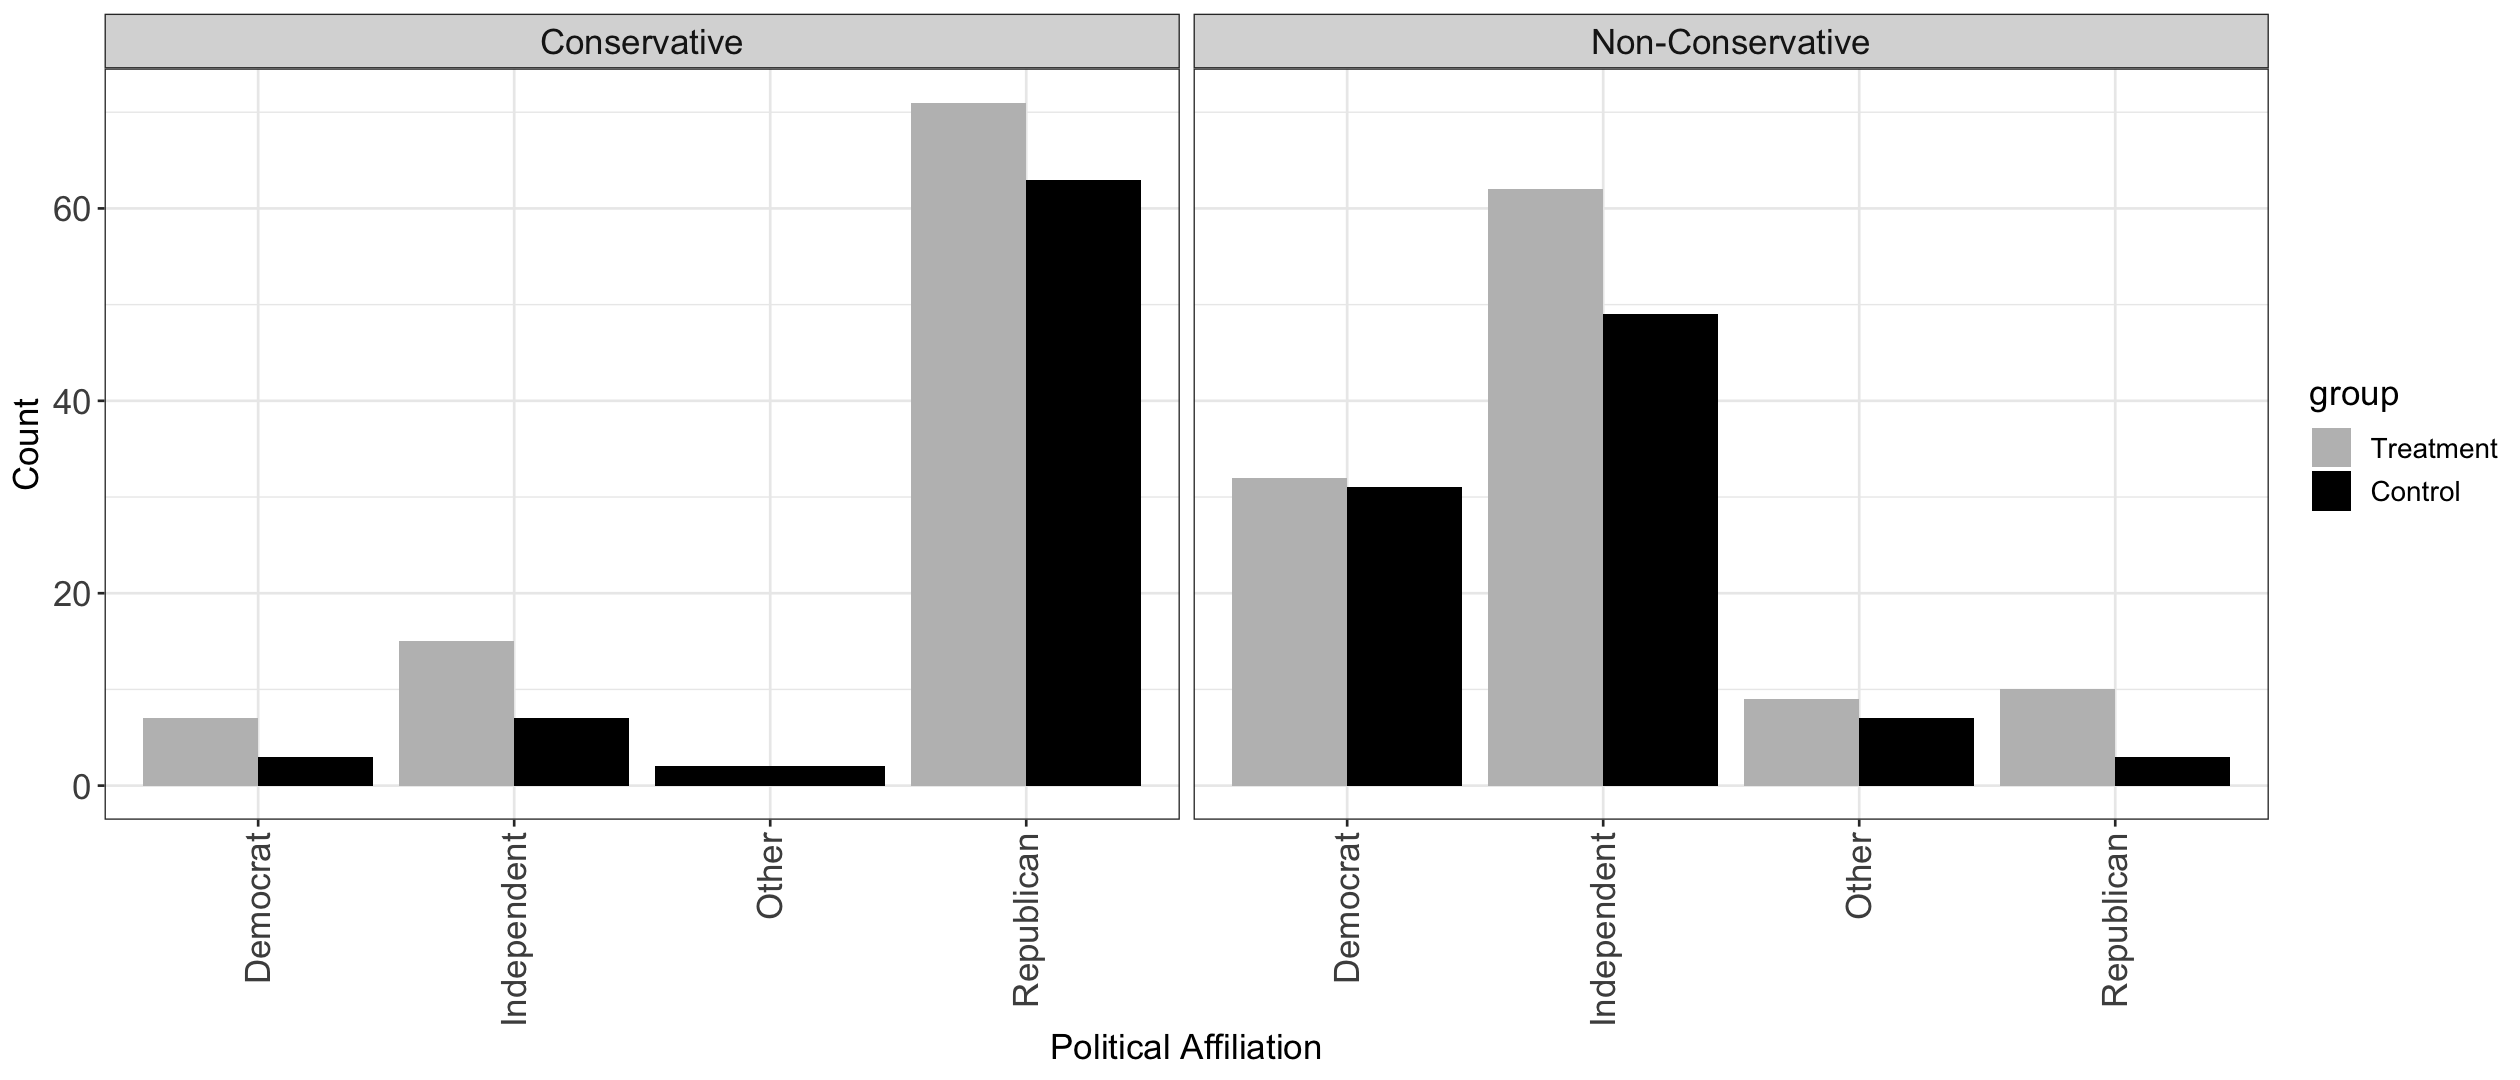

In [79]:
check_pol_affil = vcf_data %>% group_by(group, conservative, political_affiliation) %>% tally() 
check_pol_affil$conservative <- check_pol_affil$conservative %>% as.character()
check_pol_affil$conservative[check_pol_affil$conservative == "conserv"] <- "Conservative"
check_pol_affil$conservative[check_pol_affil$conservative == "nonconserv"] <- "Non-Conservative"

options(repr.plot.width = 14, repr.plot.height = 6, repr.plot.res = 180)
check_pol_affil %>%
  ggplot(aes(x = political_affiliation, y=n, fill=group)) +
  geom_bar(stat ='identity', position = position_dodge()) +
  theme_bw() + scale_fill_manual(values = c('gray', 'black')) +
  labs(x = "Political Affiliation" , y= "Count") + 
  facet_wrap(~conservative, ncol = 2) +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        strip.text.x = element_text(size = 14),
        text = element_text(size = 14)) + 
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) 

In [80]:
chisq.test(table(vcf_data$political_affiliation[vcf_data$conservative == "conserv"], 
                 vcf_data$group[vcf_data$conservative == "conserv"]))

ks.test(check_pol_affil$n[(check_pol_affil$group == 'Control') & (check_pol_affil$conservative == 'Conservative')],
        check_pol_affil$n[(check_pol_affil$group == 'Treatment' )& (check_pol_affil$conservative == 'Conservative')])

chisq.test(table(vcf_data$political_affiliation[vcf_data$conservative == "nonconserv"], 
                 vcf_data$group[vcf_data$conservative == "nonconserv"]))

ks.test(check_pol_affil$n[(check_pol_affil$group == 'Control') & (check_pol_affil$conservative == 'Non-Conservative')],
        check_pol_affil$n[(check_pol_affil$group == 'Treatment' )& (check_pol_affil$conservative == 'Non-Conservative')])

Warning message in chisq.test(table(vcf_data$political_affiliation[vcf_data$conservative == :
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(vcf_data$political_affiliation[vcf_data$conservative ==     "conserv"], vcf_data$group[vcf_data$conservative == "conserv"])
X-squared = 5.1169, df = 3, p-value = 0.1634



	Exact two-sample Kolmogorov-Smirnov test

data:  check_pol_affil$n[(check_pol_affil$group == "Control") & (check_pol_affil$conservative == "Conservative")] and check_pol_affil$n[(check_pol_affil$group == "Treatment") & (check_pol_affil$conservative == "Conservative")]
D = 0.5, p-value = 0.6571
alternative hypothesis: two-sided



	Pearson's Chi-squared test

data:  table(vcf_data$political_affiliation[vcf_data$conservative ==     "nonconserv"], vcf_data$group[vcf_data$conservative == "nonconserv"])
X-squared = 2.9901, df = 3, p-value = 0.3932



	Exact two-sample Kolmogorov-Smirnov test

data:  check_pol_affil$n[(check_pol_affil$group == "Control") & (check_pol_affil$conservative == "Non-Conservative")] and check_pol_affil$n[(check_pol_affil$group == "Treatment") & (check_pol_affil$conservative == "Non-Conservative")]
D = 0.5, p-value = 0.7714
alternative hypothesis: two-sided


## Trusting vs. Distrusting PHIs

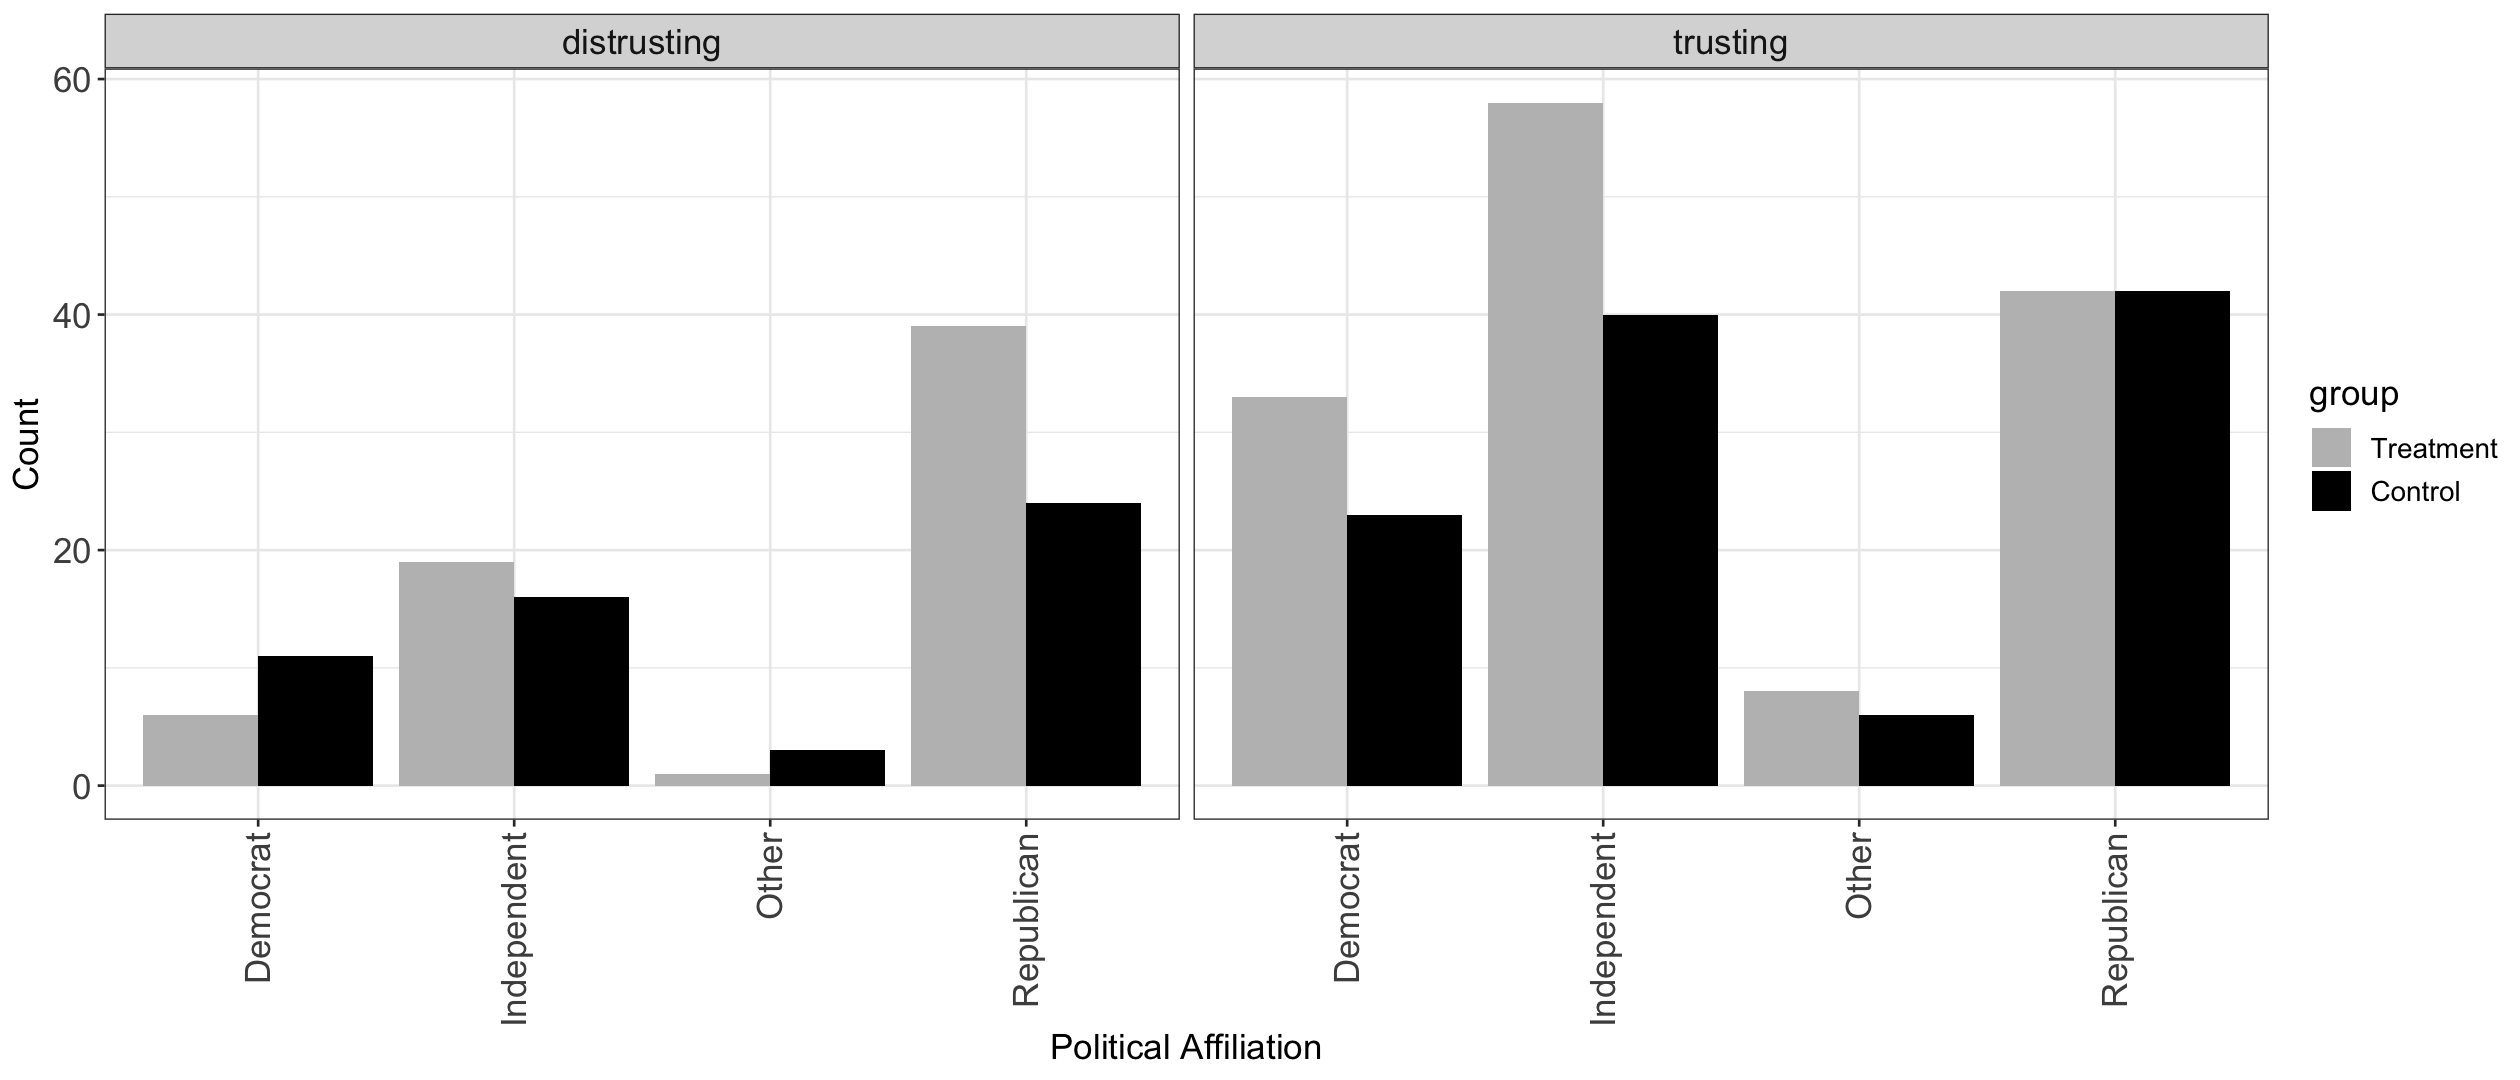

In [81]:
check_pol_affil = vcf_data %>% group_by(group, phi_trust_cat, political_affiliation) %>% tally() 

options(repr.plot.width = 14, repr.plot.height = 6, repr.plot.res = 180)
check_pol_affil %>%
  ggplot(aes(x = political_affiliation, y=n, fill=group)) +
  geom_bar(stat ='identity', position = position_dodge()) +
  theme_bw() + scale_fill_manual(values = c('gray', 'black')) +
  labs(x = "Political Affiliation" , y= "Count") + 
  facet_wrap(~phi_trust_cat, ncol = 2) +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        strip.text.x = element_text(size = 14),
        text = element_text(size = 14)) + 
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) 

In [82]:
chisq.test(table(vcf_data$political_affiliation[vcf_data$phi_trust_cat == "trusting"], 
                 vcf_data$group[vcf_data$phi_trust_cat == "trusting"]))

ks.test(check_pol_affil$n[(check_pol_affil$group == 'Control') & (check_pol_affil$phi_trust_cat == 'trusting')],
        check_pol_affil$n[(check_pol_affil$group == 'Treatment' )& (check_pol_affil$phi_trust_cat == 'trusting')])

chisq.test(table(vcf_data$political_affiliation[vcf_data$phi_trust_cat == "distrusting"], 
                 vcf_data$group[vcf_data$phi_trust_cat == "distrusting"]))

ks.test(check_pol_affil$n[(check_pol_affil$group == 'Control') & (check_pol_affil$phi_trust_cat == 'distrusting')],
        check_pol_affil$n[(check_pol_affil$group == 'Treatment' )& (check_pol_affil$phi_trust_cat == 'distrusting')])


	Pearson's Chi-squared test

data:  table(vcf_data$political_affiliation[vcf_data$phi_trust_cat ==     "trusting"], vcf_data$group[vcf_data$phi_trust_cat == "trusting"])
X-squared = 1.8321, df = 3, p-value = 0.608



	Exact two-sample Kolmogorov-Smirnov test

data:  check_pol_affil$n[(check_pol_affil$group == "Control") & (check_pol_affil$phi_trust_cat == "trusting")] and check_pol_affil$n[(check_pol_affil$group == "Treatment") & (check_pol_affil$phi_trust_cat == "trusting")]
D = 0.25, p-value = 1
alternative hypothesis: two-sided


Warning message in chisq.test(table(vcf_data$political_affiliation[vcf_data$phi_trust_cat == :
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(vcf_data$political_affiliation[vcf_data$phi_trust_cat ==     "distrusting"], vcf_data$group[vcf_data$phi_trust_cat ==     "distrusting"])
X-squared = 5.3279, df = 3, p-value = 0.1493



	Exact two-sample Kolmogorov-Smirnov test

data:  check_pol_affil$n[(check_pol_affil$group == "Control") & (check_pol_affil$phi_trust_cat == "distrusting")] and check_pol_affil$n[(check_pol_affil$group == "Treatment") & (check_pol_affil$phi_trust_cat == "distrusting")]
D = 0.25, p-value = 1
alternative hypothesis: two-sided


## Trusting vs. Distrusting Governmental Institutions

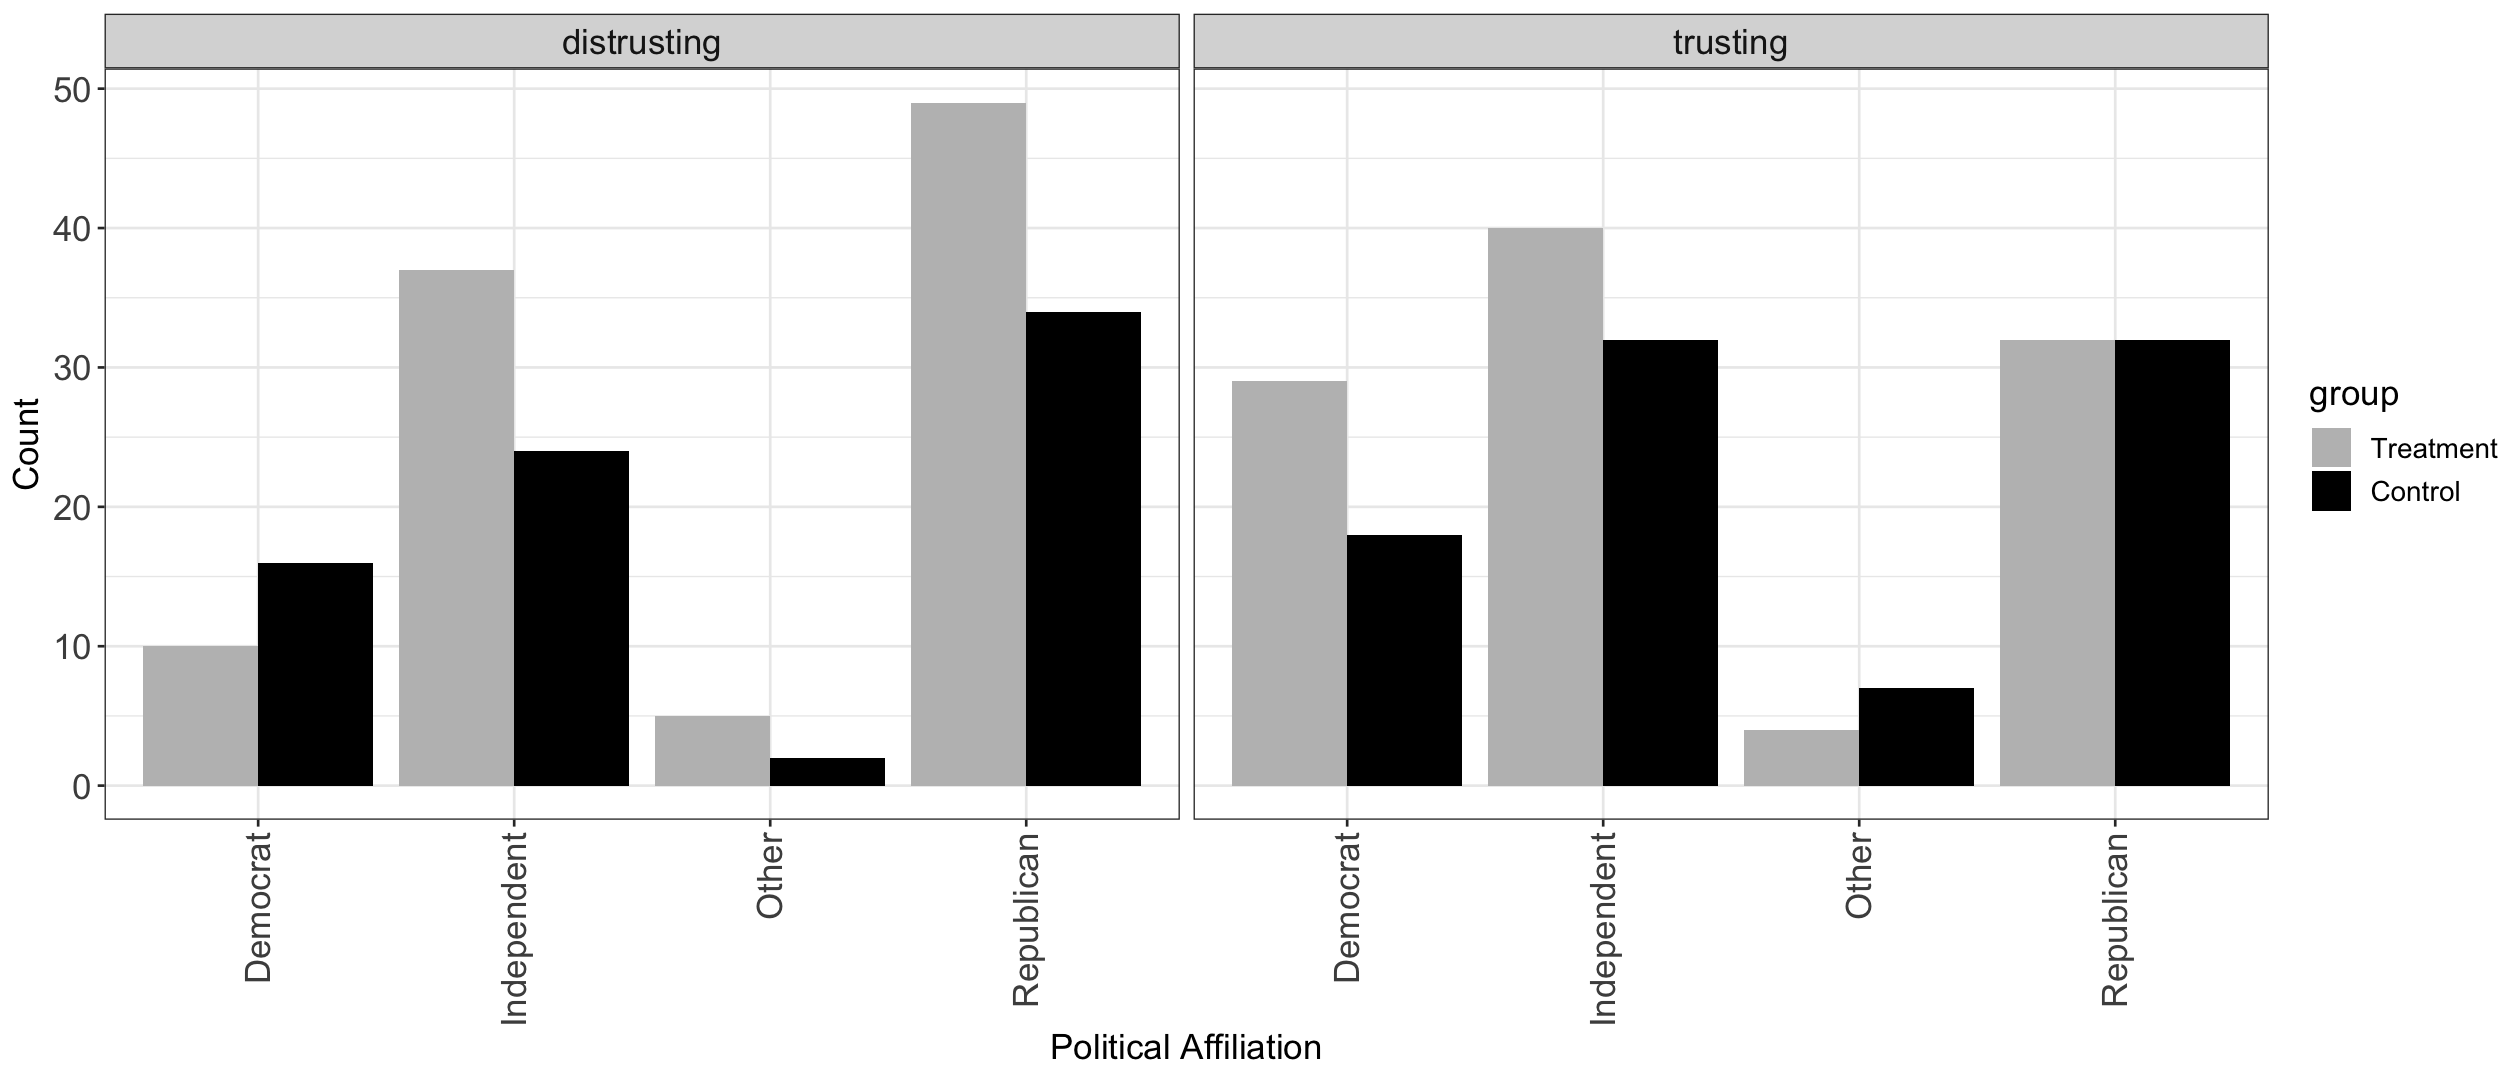

In [83]:
check_pol_affil = vcf_data %>% group_by(group, gov_trust_cat, political_affiliation) %>% tally() 

options(repr.plot.width = 14, repr.plot.height = 6, repr.plot.res = 180)
check_pol_affil %>%
  ggplot(aes(x = political_affiliation, y=n, fill=group)) +
  geom_bar(stat ='identity', position = position_dodge()) +
  theme_bw() + scale_fill_manual(values = c('gray', 'black')) +
  labs(x = "Political Affiliation" , y= "Count") + 
  facet_wrap(~gov_trust_cat, ncol = 2) +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        strip.text.x = element_text(size = 14),
        text = element_text(size = 14)) + 
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) 

In [84]:
chisq.test(table(vcf_data$political_affiliation[vcf_data$gov_trust_cat == "trusting"], 
                 vcf_data$group[vcf_data$gov_trust_cat == "trusting"]))

ks.test(check_pol_affil$n[(check_pol_affil$group == 'Control') & (check_pol_affil$gov_trust_cat == 'trusting')],
        check_pol_affil$n[(check_pol_affil$group == 'Treatment' )& (check_pol_affil$gov_trust_cat == 'trusting')])

chisq.test(table(vcf_data$political_affiliation[vcf_data$gov_trust_cat == "distrusting"], 
                 vcf_data$group[vcf_data$gov_trust_cat == "distrusting"]))

ks.test(check_pol_affil$n[(check_pol_affil$group == 'Control') & (check_pol_affil$gov_trust_cat == 'distrusting')],
        check_pol_affil$n[(check_pol_affil$group == 'Treatment' )& (check_pol_affil$gov_trust_cat == 'distrusting')])


	Pearson's Chi-squared test

data:  table(vcf_data$political_affiliation[vcf_data$gov_trust_cat ==     "trusting"], vcf_data$group[vcf_data$gov_trust_cat == "trusting"])
X-squared = 2.9822, df = 3, p-value = 0.3944



	Exact two-sample Kolmogorov-Smirnov test

data:  check_pol_affil$n[(check_pol_affil$group == "Control") & (check_pol_affil$gov_trust_cat == "trusting")] and check_pol_affil$n[(check_pol_affil$group == "Treatment") & (check_pol_affil$gov_trust_cat == "trusting")]
D = 0.25, p-value = 1
alternative hypothesis: two-sided


Warning message in chisq.test(table(vcf_data$political_affiliation[vcf_data$gov_trust_cat == :
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(vcf_data$political_affiliation[vcf_data$gov_trust_cat ==     "distrusting"], vcf_data$group[vcf_data$gov_trust_cat ==     "distrusting"])
X-squared = 4.7146, df = 3, p-value = 0.1939



	Exact two-sample Kolmogorov-Smirnov test

data:  check_pol_affil$n[(check_pol_affil$group == "Control") & (check_pol_affil$gov_trust_cat == "distrusting")] and check_pol_affil$n[(check_pol_affil$group == "Treatment") & (check_pol_affil$gov_trust_cat == "distrusting")]
D = 0.5, p-value = 0.7714
alternative hypothesis: two-sided


# Check Political Views

## Republican vs. Non-Republican

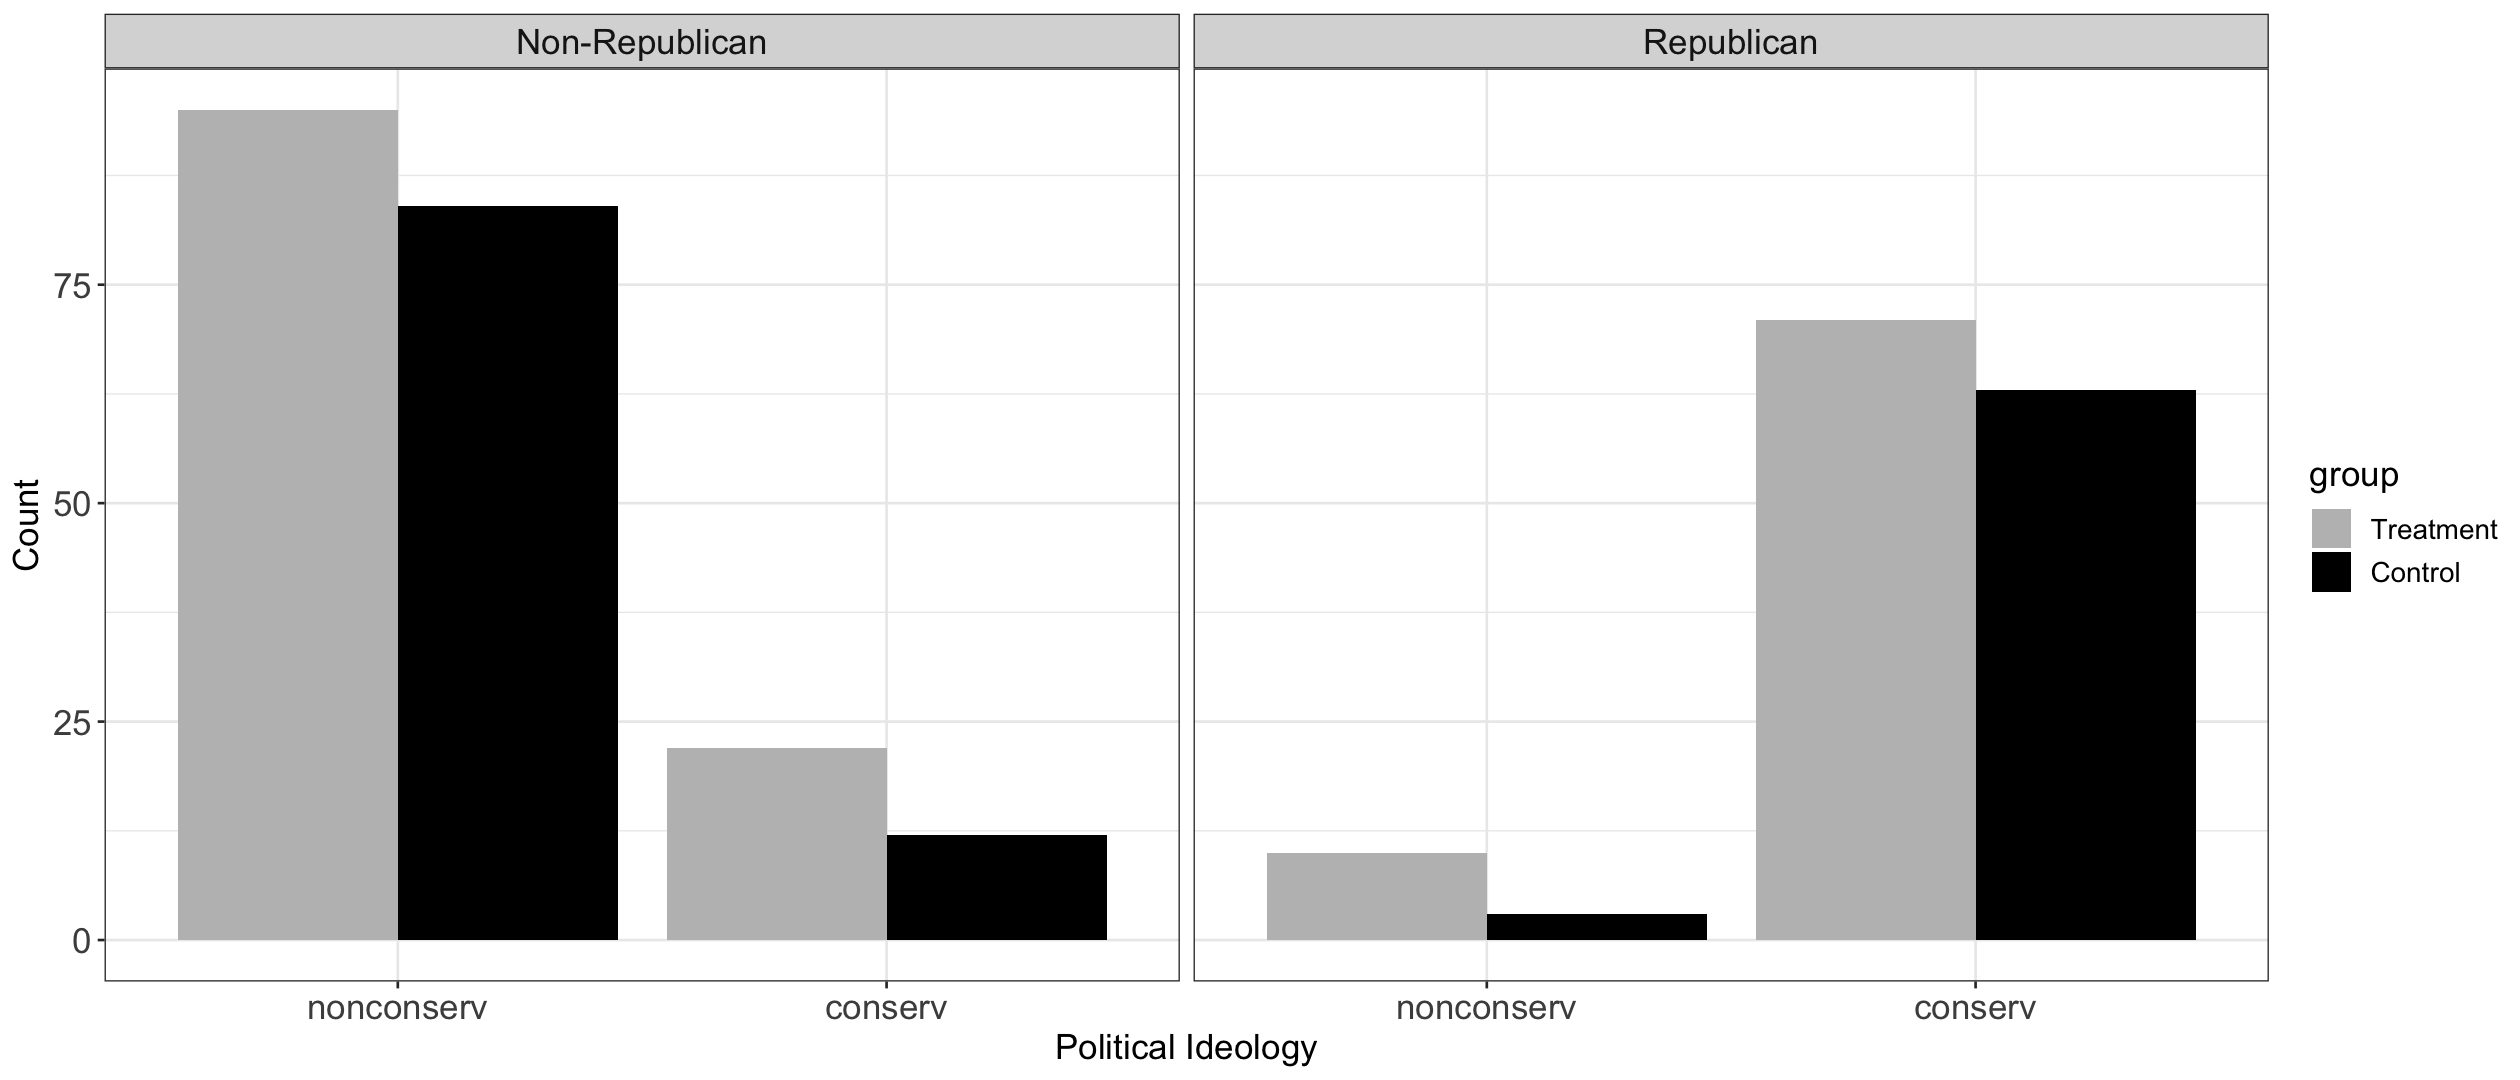

In [85]:
check_pol_views = vcf_data %>% filter(political_view2 != "No answer") %>% 
                            group_by(group, republican, conservative) %>% tally() 
check_pol_views$republican <- check_pol_views$republican %>% as.character()
check_pol_views$republican[check_pol_views$republican == "rep"] <- "Republican"
check_pol_views$republican[check_pol_views$republican == "nonrep"] <- "Non-Republican"

options(repr.plot.width = 14, repr.plot.height = 6, repr.plot.res = 180)
check_pol_views %>%
  ggplot(aes(x = conservative, y=n, fill=group)) +
  geom_bar(stat ='identity', position = position_dodge()) +
  theme_bw() + scale_fill_manual(values = c('gray', 'black')) +
  labs(x = "Political Ideology" , y= "Count") + 
  facet_wrap(~republican, ncol = 2) +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        strip.text.x = element_text(size = 14),
        text = element_text(size = 14)) 

In [86]:
chisq.test(table(vcf_data$conservative[vcf_data$republican == "rep"], 
                 vcf_data$group[vcf_data$republican == "rep"]))

ks.test(check_pol_views$n[(check_pol_views$group == 'Control') & (check_pol_views$republican == 'Republican')],
        check_pol_views$n[(check_pol_views$group == 'Treatment' )& (check_pol_views$republican == 'Republican')])

chisq.test(table(vcf_data$conservative[vcf_data$republican == "nonrep"], 
                 vcf_data$group[vcf_data$republican == "nonrep"]))

ks.test(check_pol_views$n[(check_pol_views$group == 'Control') & (check_pol_views$republican == 'Non-Republican')],
        check_pol_views$n[(check_pol_views$group == 'Treatment' )& (check_pol_views$republican == 'Non-Republican')])


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$conservative[vcf_data$republican == "rep"], vcf_data$group[vcf_data$republican ==     "rep"])
X-squared = 1.8625, df = 1, p-value = 0.1723



	Exact two-sample Kolmogorov-Smirnov test

data:  check_pol_views$n[(check_pol_views$group == "Control") & (check_pol_views$republican == "Republican")] and check_pol_views$n[(check_pol_views$group == "Treatment") & (check_pol_views$republican == "Republican")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided



	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$conservative[vcf_data$republican == "nonrep"],     vcf_data$group[vcf_data$republican == "nonrep"])
X-squared = 0.89764, df = 1, p-value = 0.3434



	Exact two-sample Kolmogorov-Smirnov test

data:  check_pol_views$n[(check_pol_views$group == "Control") & (check_pol_views$republican == "Non-Republican")] and check_pol_views$n[(check_pol_views$group == "Treatment") & (check_pol_views$republican == "Non-Republican")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided


## Trusting vs. Distrusting PHIs

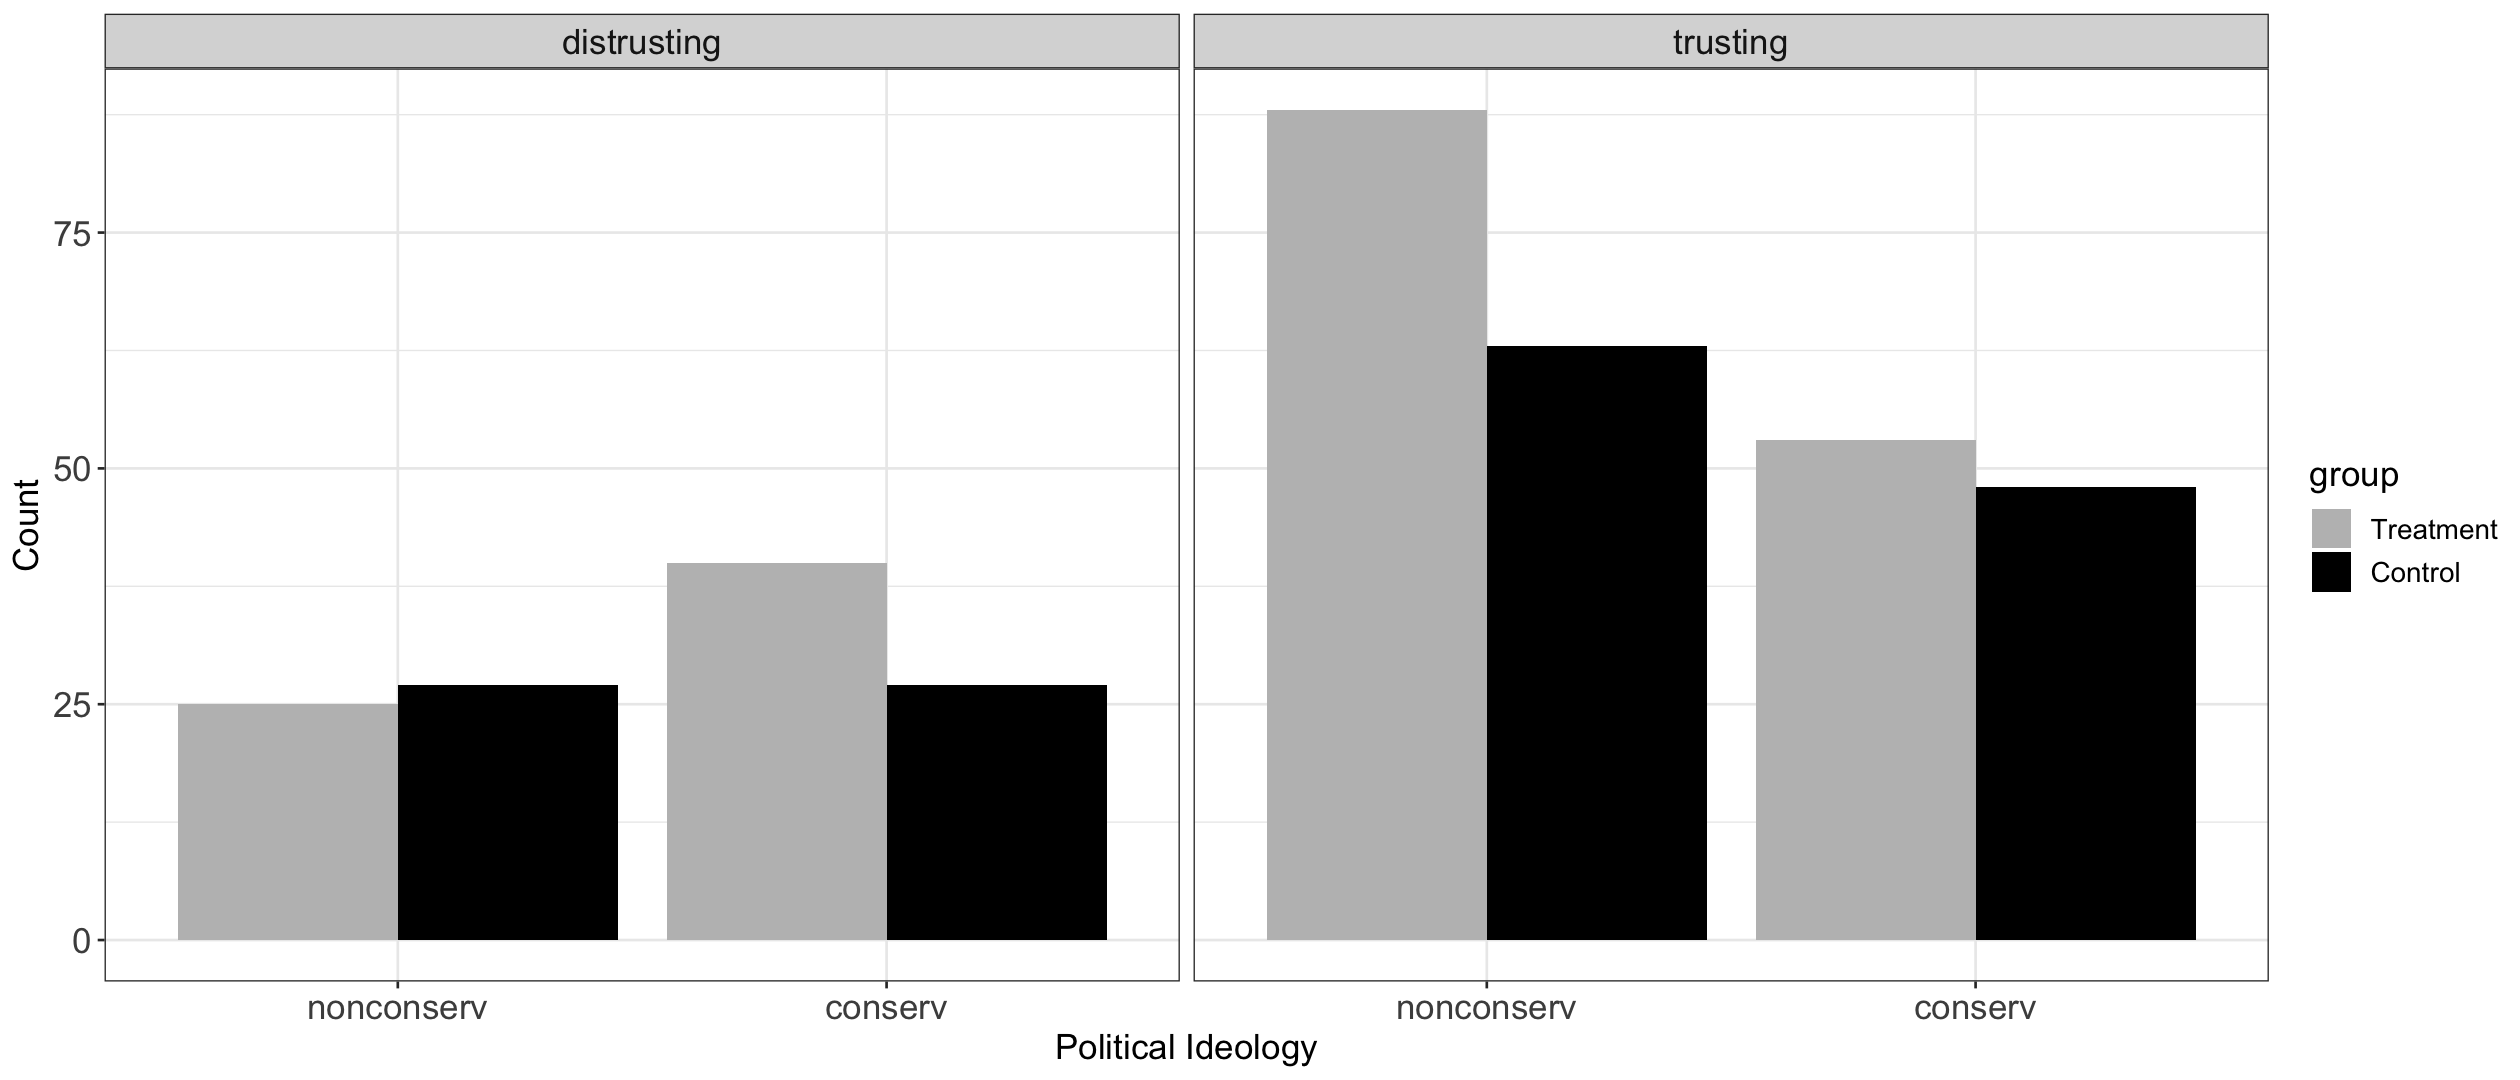

In [87]:
check_pol_views = vcf_data %>% group_by(group, phi_trust_cat, conservative) %>% tally() 

options(repr.plot.width = 14, repr.plot.height = 6, repr.plot.res = 180)
check_pol_views %>%
  ggplot(aes(x = conservative, y=n, fill=group)) +
  geom_bar(stat ='identity', position = position_dodge()) +
  theme_bw() + scale_fill_manual(values = c('gray', 'black')) +
  labs(x = "Political Ideology" , y= "Count") + 
  facet_wrap(~phi_trust_cat, ncol = 2) +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        strip.text.x = element_text(size = 14),
        text = element_text(size = 14)) 

In [88]:
chisq.test(table(vcf_data$conservative[vcf_data$phi_trust_cat == "trusting"], 
                 vcf_data$group[vcf_data$phi_trust_cat == "trusting"]))

ks.test(check_pol_views$n[(check_pol_views$group == 'Control') & (check_pol_views$phi_trust_cat == 'trusting')],
        check_pol_views$n[(check_pol_views$group == 'Treatment' )& (check_pol_views$phi_trust_cat == 'trusting')])

chisq.test(table(vcf_data$conservative[vcf_data$phi_trust_cat == "distrusting"], 
                 vcf_data$group[vcf_data$phi_trust_cat == "distrusting"]))

ks.test(check_pol_views$n[(check_pol_views$group == 'Control') & (check_pol_views$phi_trust_cat == 'distrusting')],
        check_pol_views$n[(check_pol_views$group == 'Treatment' )& (check_pol_views$phi_trust_cat == 'distrusting')])


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$conservative[vcf_data$phi_trust_cat == "trusting"],     vcf_data$group[vcf_data$phi_trust_cat == "trusting"])
X-squared = 0.6082, df = 1, p-value = 0.4355



	Exact two-sample Kolmogorov-Smirnov test

data:  check_pol_views$n[(check_pol_views$group == "Control") & (check_pol_views$phi_trust_cat == "trusting")] and check_pol_views$n[(check_pol_views$group == "Treatment") & (check_pol_views$phi_trust_cat == "trusting")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided



	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$conservative[vcf_data$phi_trust_cat == "distrusting"],     vcf_data$group[vcf_data$phi_trust_cat == "distrusting"])
X-squared = 1.1616, df = 1, p-value = 0.2811



	Exact two-sample Kolmogorov-Smirnov test

data:  check_pol_views$n[(check_pol_views$group == "Control") & (check_pol_views$phi_trust_cat == "distrusting")] and check_pol_views$n[(check_pol_views$group == "Treatment") & (check_pol_views$phi_trust_cat == "distrusting")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided


## Trusting vs. Distrusting Governmental Institutions

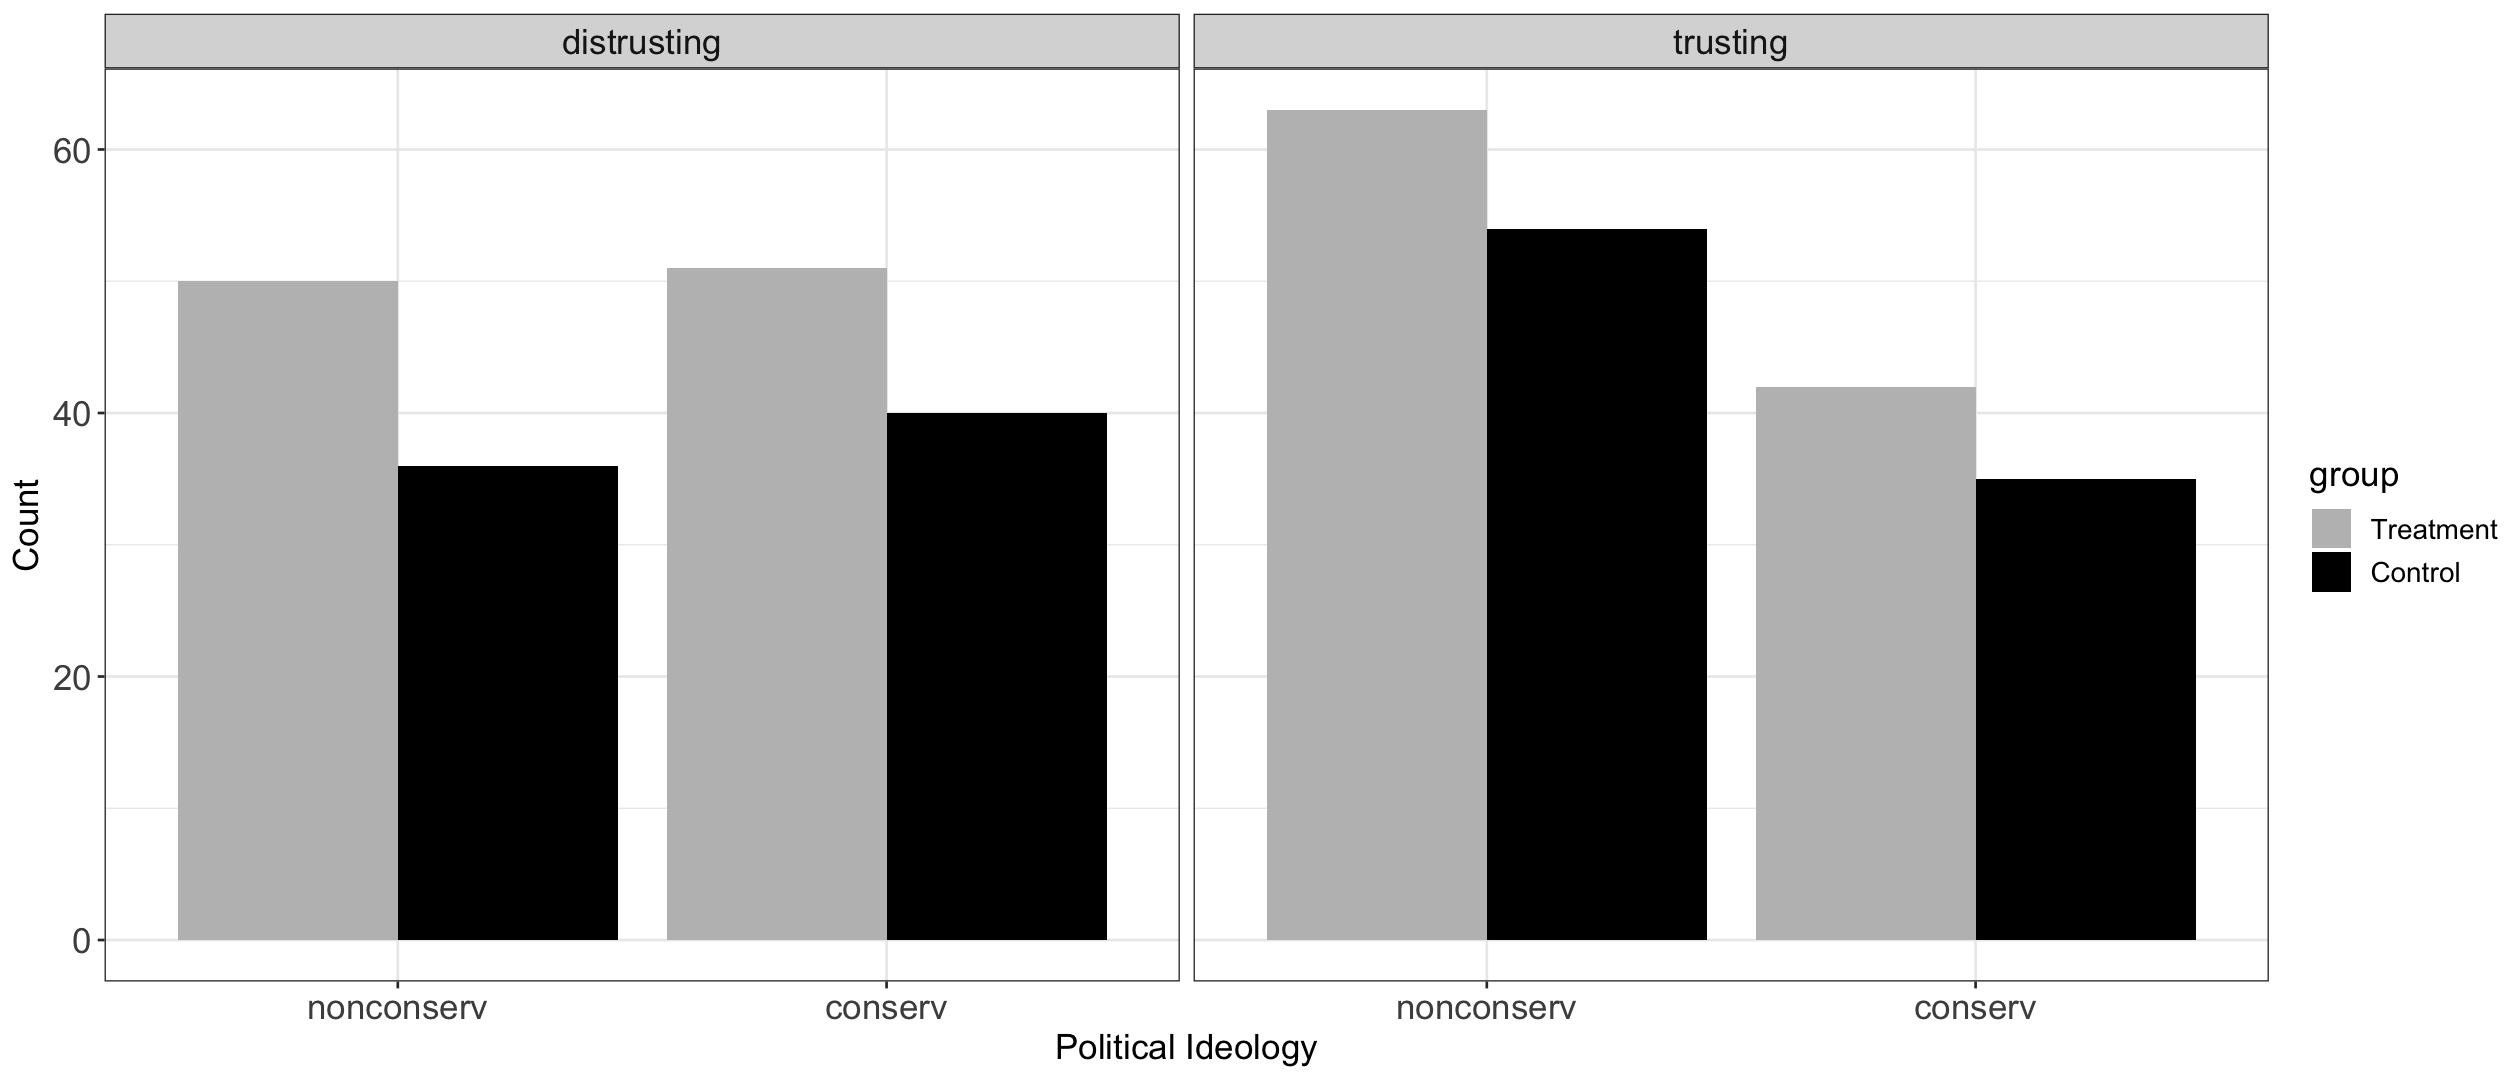

In [89]:
check_pol_views = vcf_data %>% group_by(group, gov_trust_cat, conservative) %>% tally() 

options(repr.plot.width = 14, repr.plot.height = 6, repr.plot.res = 180)
check_pol_views %>%
  ggplot(aes(x = conservative, y=n, fill=group)) +
  geom_bar(stat ='identity', position = position_dodge()) +
  theme_bw() + scale_fill_manual(values = c('gray', 'black')) +
  labs(x = "Political Ideology" , y= "Count") + 
  facet_wrap(~gov_trust_cat, ncol = 2) +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        strip.text.x = element_text(size = 14),
        text = element_text(size = 14)) 

In [90]:
chisq.test(table(vcf_data$conservative[vcf_data$gov_trust_cat == "trusting"], 
                 vcf_data$group[vcf_data$gov_trust_cat == "trusting"]))

ks.test(check_pol_views$n[(check_pol_views$group == 'Control') & (check_pol_views$gov_trust_cat == 'trusting')],
        check_pol_views$n[(check_pol_views$group == 'Treatment' )& (check_pol_views$gov_trust_cat == 'trusting')])

chisq.test(table(vcf_data$conservative[vcf_data$gov_trust_cat == "distrusting"], 
                 vcf_data$group[vcf_data$gov_trust_cat == "distrusting"]))

ks.test(check_pol_views$n[(check_pol_views$group == 'Control') & (check_pol_views$gov_trust_cat == 'distrusting')],
        check_pol_views$n[(check_pol_views$group == 'Treatment' )& (check_pol_views$gov_trust_cat == 'distrusting')])


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$conservative[vcf_data$gov_trust_cat == "trusting"],     vcf_data$group[vcf_data$gov_trust_cat == "trusting"])
X-squared = 0, df = 1, p-value = 1



	Exact two-sample Kolmogorov-Smirnov test

data:  check_pol_views$n[(check_pol_views$group == "Control") & (check_pol_views$gov_trust_cat == "trusting")] and check_pol_views$n[(check_pol_views$group == "Treatment") & (check_pol_views$gov_trust_cat == "trusting")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided



	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$conservative[vcf_data$gov_trust_cat == "distrusting"],     vcf_data$group[vcf_data$gov_trust_cat == "distrusting"])
X-squared = 0.016795, df = 1, p-value = 0.8969



	Exact two-sample Kolmogorov-Smirnov test

data:  check_pol_views$n[(check_pol_views$group == "Control") & (check_pol_views$gov_trust_cat == "distrusting")] and check_pol_views$n[(check_pol_views$group == "Treatment") & (check_pol_views$gov_trust_cat == "distrusting")]
D = 1, p-value = 0.3333
alternative hypothesis: two-sided


# Check PHI Trust Views

## Republican vs. Non-Republican

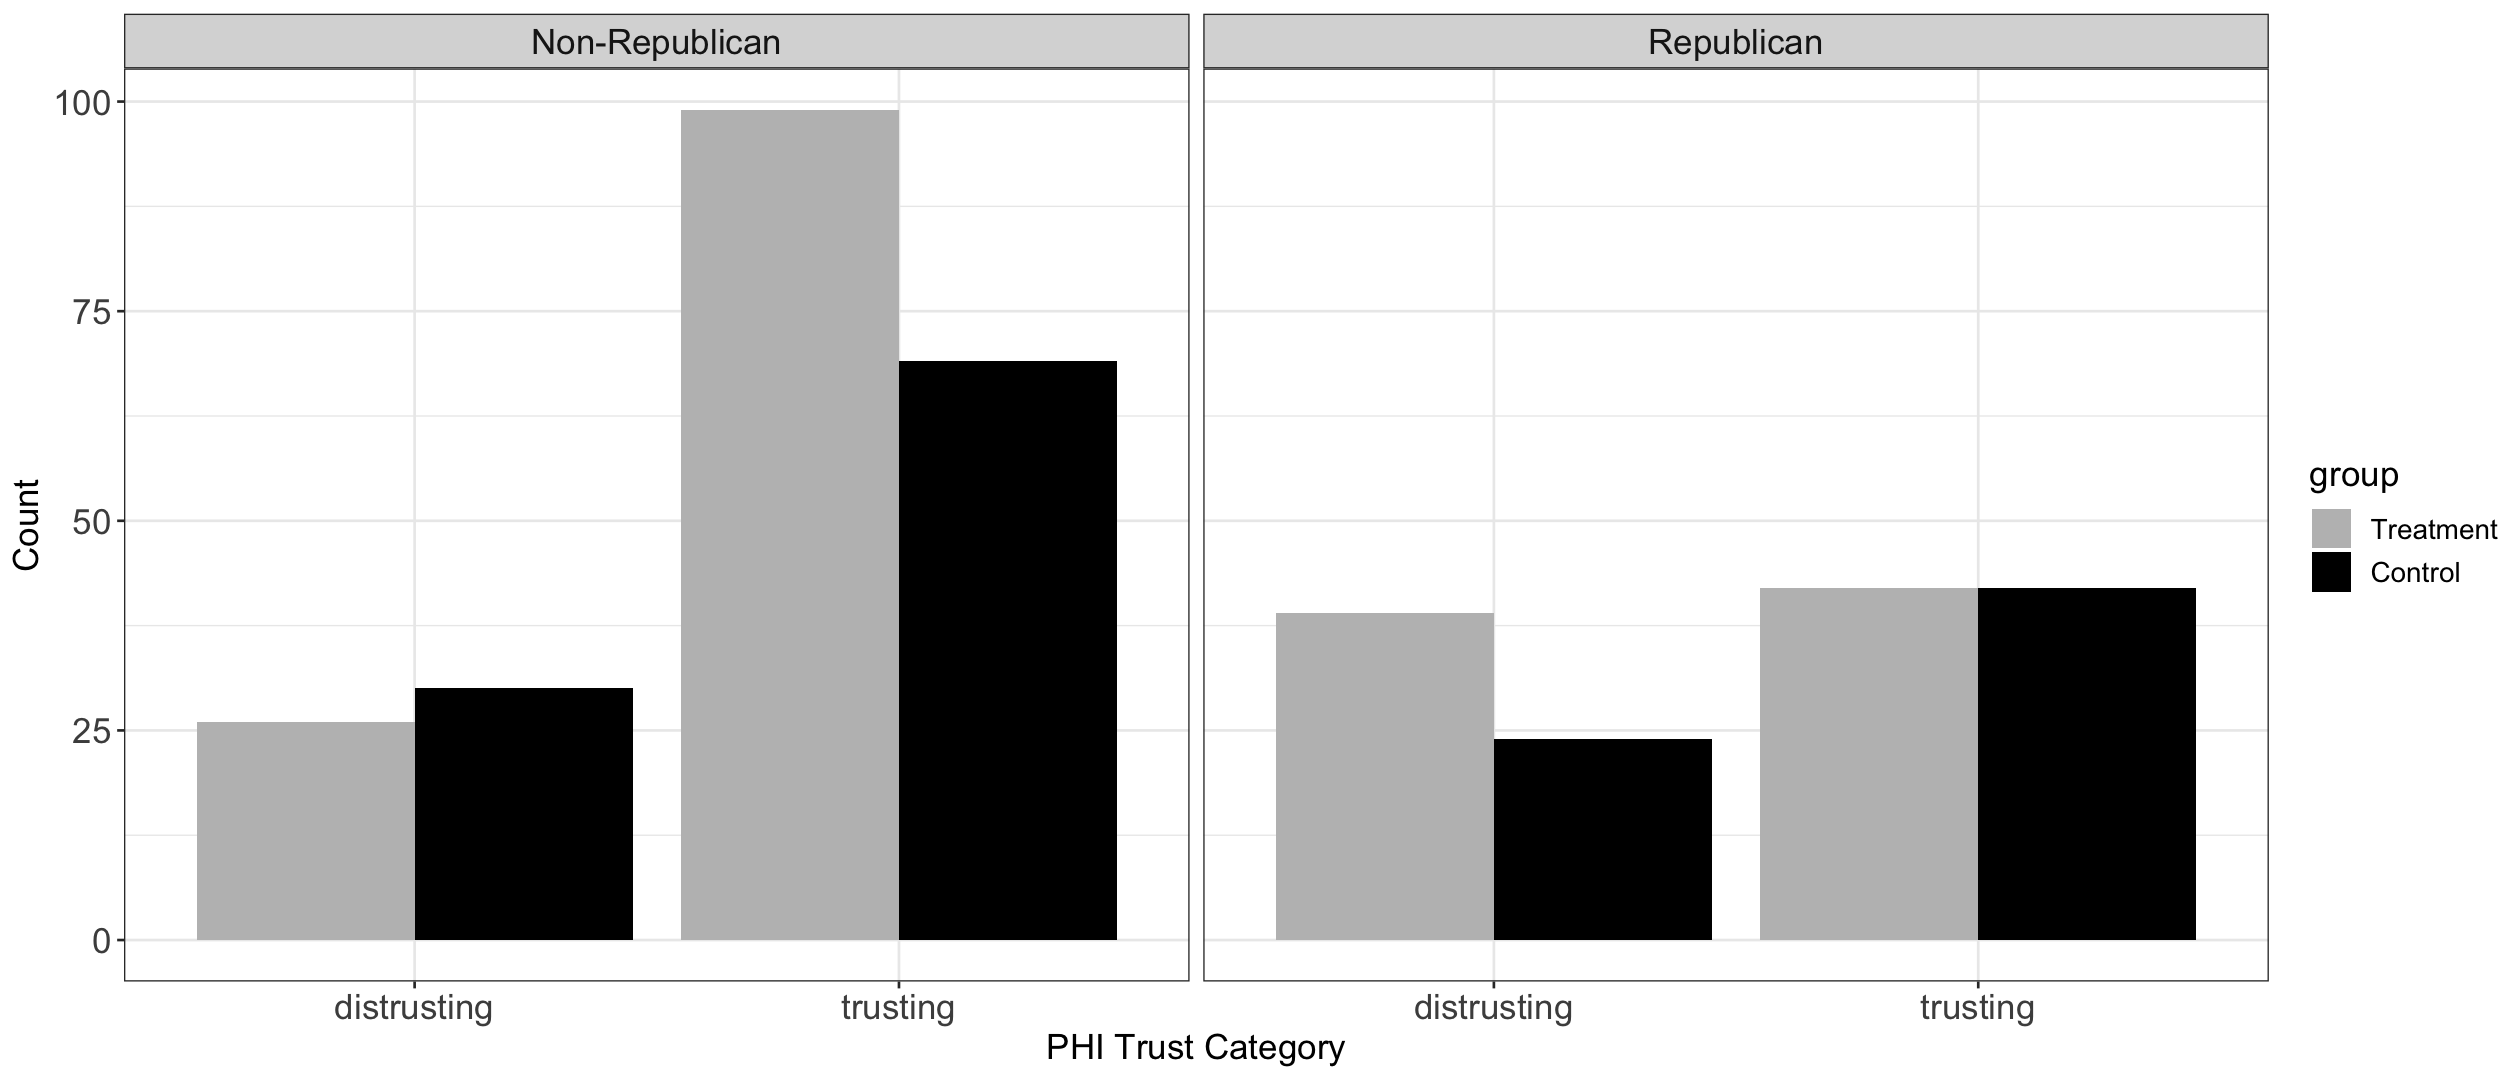

In [91]:
check_phi_trust = vcf_data %>% group_by(group, republican, phi_trust_cat) %>% tally() 
check_phi_trust$republican <- check_phi_trust$republican %>% as.character()
check_phi_trust$republican[check_phi_trust$republican == "rep"] <- "Republican"
check_phi_trust$republican[check_phi_trust$republican == "nonrep"] <- "Non-Republican"

options(repr.plot.width = 14, repr.plot.height = 6, repr.plot.res = 180)
check_phi_trust %>%
  ggplot(aes(x = phi_trust_cat, y=n, fill=group)) +
  geom_bar(stat ='identity', position = position_dodge()) +
  theme_bw() + scale_fill_manual(values = c('gray', 'black')) +
  labs(x = "PHI Trust Category" , y= "Count") + 
  facet_wrap(~republican, ncol = 2) +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        strip.text.x = element_text(size = 14),
        text = element_text(size = 14)) 

In [92]:
chisq.test(table(vcf_data$phi_trust_cat[vcf_data$republican == "rep"], 
                 vcf_data$group[vcf_data$republican == "rep"]))

ks.test(check_phi_trust$n[(check_phi_trust$group == 'Control') & (check_phi_trust$republican == 'Republican')],
        check_phi_trust$n[(check_phi_trust$group == 'Treatment' )& (check_phi_trust$republican == 'Republican')])

chisq.test(table(vcf_data$phi_trust_cat[vcf_data$republican == "nonrep"], 
                 vcf_data$group[vcf_data$republican == "nonrep"]))

ks.test(check_phi_trust$n[(check_phi_trust$group == 'Control') & (check_phi_trust$republican == 'Non-Republican')],
        check_phi_trust$n[(check_phi_trust$group == 'Treatment' )& (check_phi_trust$republican == 'Non-Republican')])


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$phi_trust_cat[vcf_data$republican == "rep"], vcf_data$group[vcf_data$republican ==     "rep"])
X-squared = 1.6092, df = 1, p-value = 0.2046



	Exact two-sample Kolmogorov-Smirnov test

data:  check_phi_trust$n[(check_phi_trust$group == "Control") & (check_phi_trust$republican == "Republican")] and check_phi_trust$n[(check_phi_trust$group == "Treatment") & (check_phi_trust$republican == "Republican")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided



	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$phi_trust_cat[vcf_data$republican == "nonrep"],     vcf_data$group[vcf_data$republican == "nonrep"])
X-squared = 2.1782, df = 1, p-value = 0.14



	Exact two-sample Kolmogorov-Smirnov test

data:  check_phi_trust$n[(check_phi_trust$group == "Control") & (check_phi_trust$republican == "Non-Republican")] and check_phi_trust$n[(check_phi_trust$group == "Treatment") & (check_phi_trust$republican == "Non-Republican")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided


## Conservatives vs. Non-Conservatives

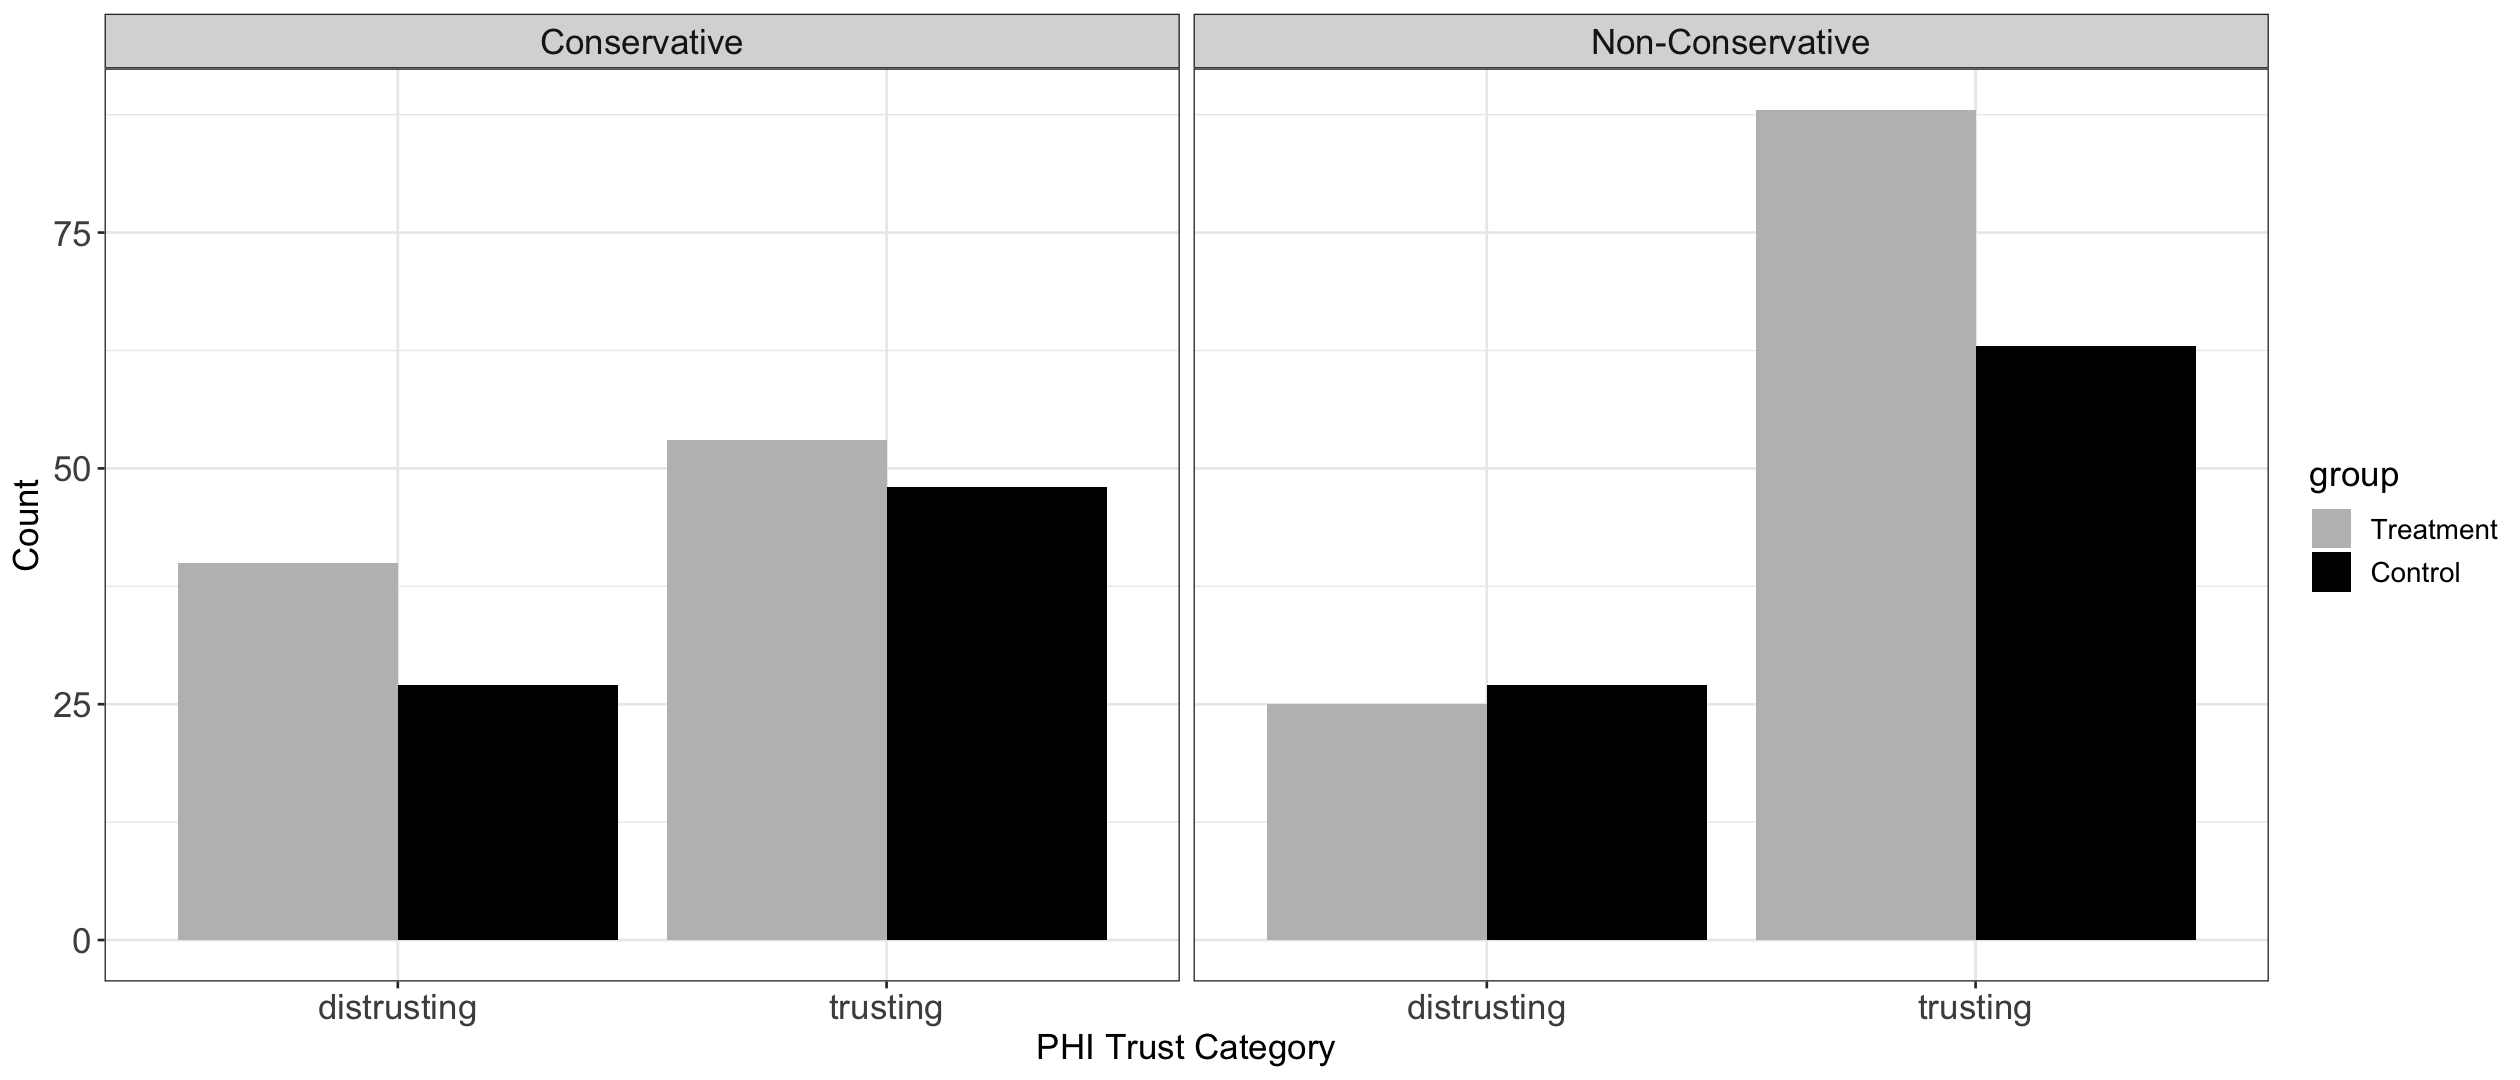

In [93]:
check_phi_trust = vcf_data %>% group_by(group, conservative, phi_trust_cat) %>% tally() 
check_phi_trust$conservative <- check_phi_trust$conservative %>% as.character()
check_phi_trust$conservative[check_phi_trust$conservative == "conserv"] <- "Conservative"
check_phi_trust$conservative[check_phi_trust$conservative == "nonconserv"] <- "Non-Conservative"

options(repr.plot.width = 14, repr.plot.height = 6, repr.plot.res = 180)
check_phi_trust %>%
  ggplot(aes(x = phi_trust_cat, y=n, fill=group)) +
  geom_bar(stat ='identity', position = position_dodge()) +
  theme_bw() + scale_fill_manual(values = c('gray', 'black')) +
  labs(x = "PHI Trust Category" , y= "Count") + 
  facet_wrap(~conservative, ncol = 2) +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        strip.text.x = element_text(size = 14),
        text = element_text(size = 14)) 

In [94]:
chisq.test(table(vcf_data$phi_trust_cat[vcf_data$conservative == "conserv"], 
                 vcf_data$group[vcf_data$conservative == "conserv"]))

ks.test(check_phi_trust$n[(check_phi_trust$group == 'Control') & (check_phi_trust$conservative == 'Conservative')],
        check_phi_trust$n[(check_phi_trust$group == 'Treatment' )& (check_phi_trust$conservative == 'Conservative')])

chisq.test(table(vcf_data$phi_trust_cat[vcf_data$conservative == "nonconserv"], 
                 vcf_data$group[vcf_data$conservative == "nonconserv"]))

ks.test(check_phi_trust$n[(check_phi_trust$group == 'Control') & (check_phi_trust$conservative == 'Non-Conservative')],
        check_phi_trust$n[(check_phi_trust$group == 'Treatment' )& (check_phi_trust$conservative == 'Non-Conservative')])


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$phi_trust_cat[vcf_data$conservative == "conserv"],     vcf_data$group[vcf_data$conservative == "conserv"])
X-squared = 0.58382, df = 1, p-value = 0.4448



	Exact two-sample Kolmogorov-Smirnov test

data:  check_phi_trust$n[(check_phi_trust$group == "Control") & (check_phi_trust$conservative == "Conservative")] and check_phi_trust$n[(check_phi_trust$group == "Treatment") & (check_phi_trust$conservative == "Conservative")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided



	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$phi_trust_cat[vcf_data$conservative == "nonconserv"],     vcf_data$group[vcf_data$conservative == "nonconserv"])
X-squared = 1.2439, df = 1, p-value = 0.2647



	Exact two-sample Kolmogorov-Smirnov test

data:  check_phi_trust$n[(check_phi_trust$group == "Control") & (check_phi_trust$conservative == "Non-Conservative")] and check_phi_trust$n[(check_phi_trust$group == "Treatment") & (check_phi_trust$conservative == "Non-Conservative")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided


## Trusting vs. Distrusting Governmental Institutions

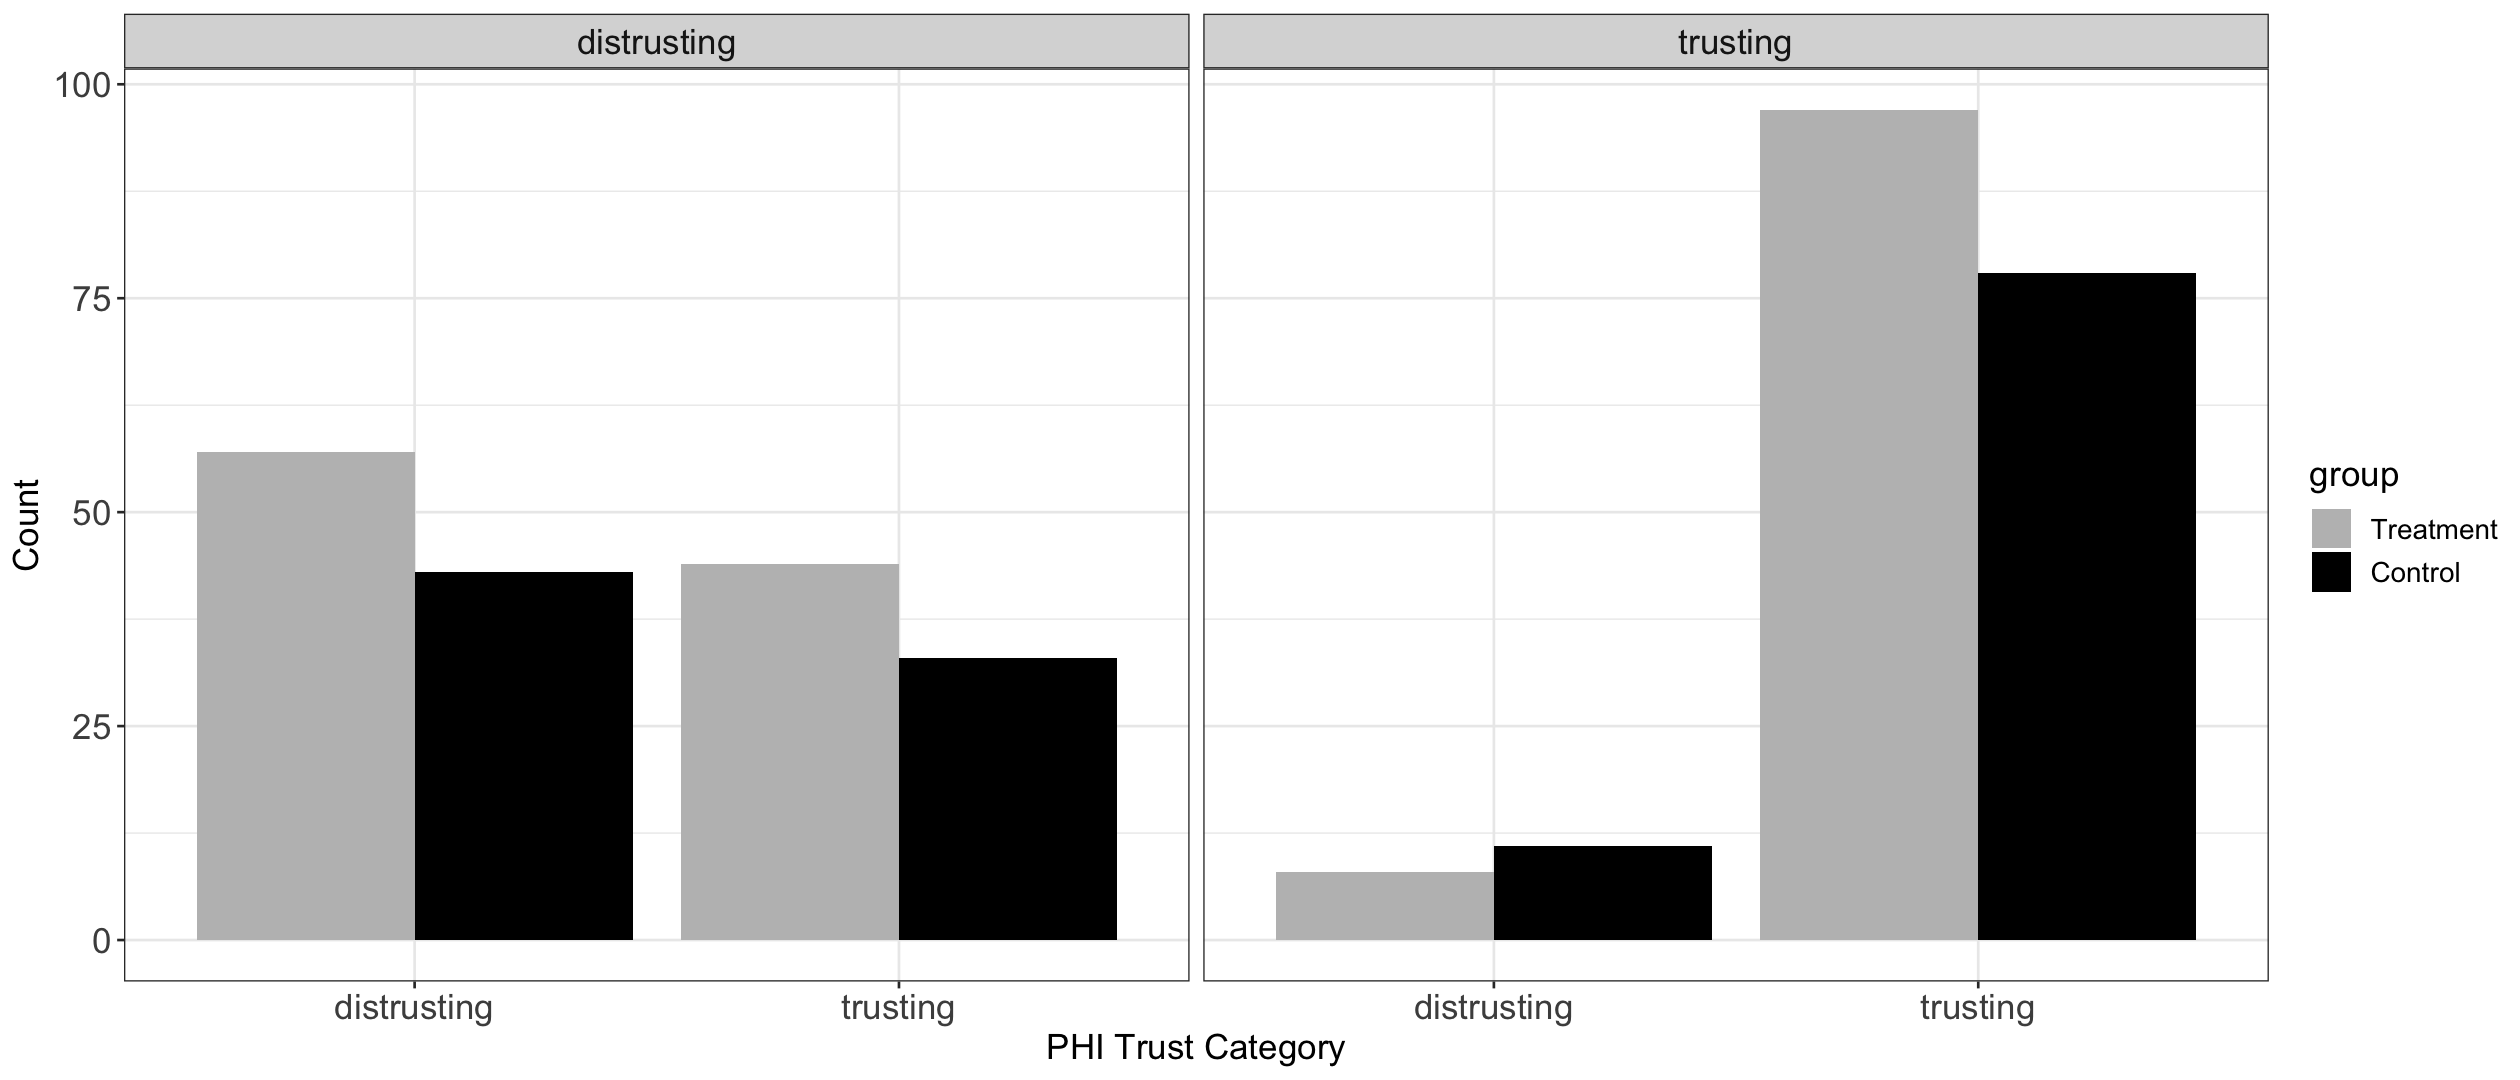

In [95]:
check_phi_trust = vcf_data %>% group_by(group, gov_trust_cat, phi_trust_cat) %>% tally() 

options(repr.plot.width = 14, repr.plot.height = 6, repr.plot.res = 180)
check_phi_trust %>%
  ggplot(aes(x = phi_trust_cat, y=n, fill=group)) +
  geom_bar(stat ='identity', position = position_dodge()) +
  theme_bw() + scale_fill_manual(values = c('gray', 'black')) +
  labs(x = "PHI Trust Category" , y= "Count") + 
  facet_wrap(~gov_trust_cat, ncol = 2) +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        strip.text.x = element_text(size = 14),
        text = element_text(size = 14)) 

In [96]:
chisq.test(table(vcf_data$phi_trust_cat[vcf_data$gov_trust_cat == "trusting"], 
                 vcf_data$group[vcf_data$gov_trust_cat == "trusting"]))

ks.test(check_phi_trust$n[(check_phi_trust$group == 'Control') & (check_phi_trust$gov_trust_cat == 'trusting')],
        check_phi_trust$n[(check_phi_trust$group == 'Treatment' )& (check_phi_trust$gov_trust_cat == 'trusting')])

chisq.test(table(vcf_data$phi_trust_cat[vcf_data$gov_trust_cat == "distrusting"], 
                 vcf_data$group[vcf_data$gov_trust_cat == "distrusting"]))

ks.test(check_phi_trust$n[(check_phi_trust$group == 'Control') & (check_phi_trust$gov_trust_cat == 'distrusting')],
        check_phi_trust$n[(check_phi_trust$group == 'Treatment' )& (check_phi_trust$gov_trust_cat == 'distrusting')])


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$phi_trust_cat[vcf_data$gov_trust_cat == "trusting"],     vcf_data$group[vcf_data$gov_trust_cat == "trusting"])
X-squared = 0.74745, df = 1, p-value = 0.3873



	Exact two-sample Kolmogorov-Smirnov test

data:  check_phi_trust$n[(check_phi_trust$group == "Control") & (check_phi_trust$gov_trust_cat == "trusting")] and check_phi_trust$n[(check_phi_trust$group == "Treatment") & (check_phi_trust$gov_trust_cat == "trusting")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided



	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$phi_trust_cat[vcf_data$gov_trust_cat == "distrusting"],     vcf_data$group[vcf_data$gov_trust_cat == "distrusting"])
X-squared = 0, df = 1, p-value = 1



	Exact two-sample Kolmogorov-Smirnov test

data:  check_phi_trust$n[(check_phi_trust$group == "Control") & (check_phi_trust$gov_trust_cat == "distrusting")] and check_phi_trust$n[(check_phi_trust$group == "Treatment") & (check_phi_trust$gov_trust_cat == "distrusting")]
D = 1, p-value = 0.3333
alternative hypothesis: two-sided


# Check Govt. Trust Views

## Republican vs. Non-Republican

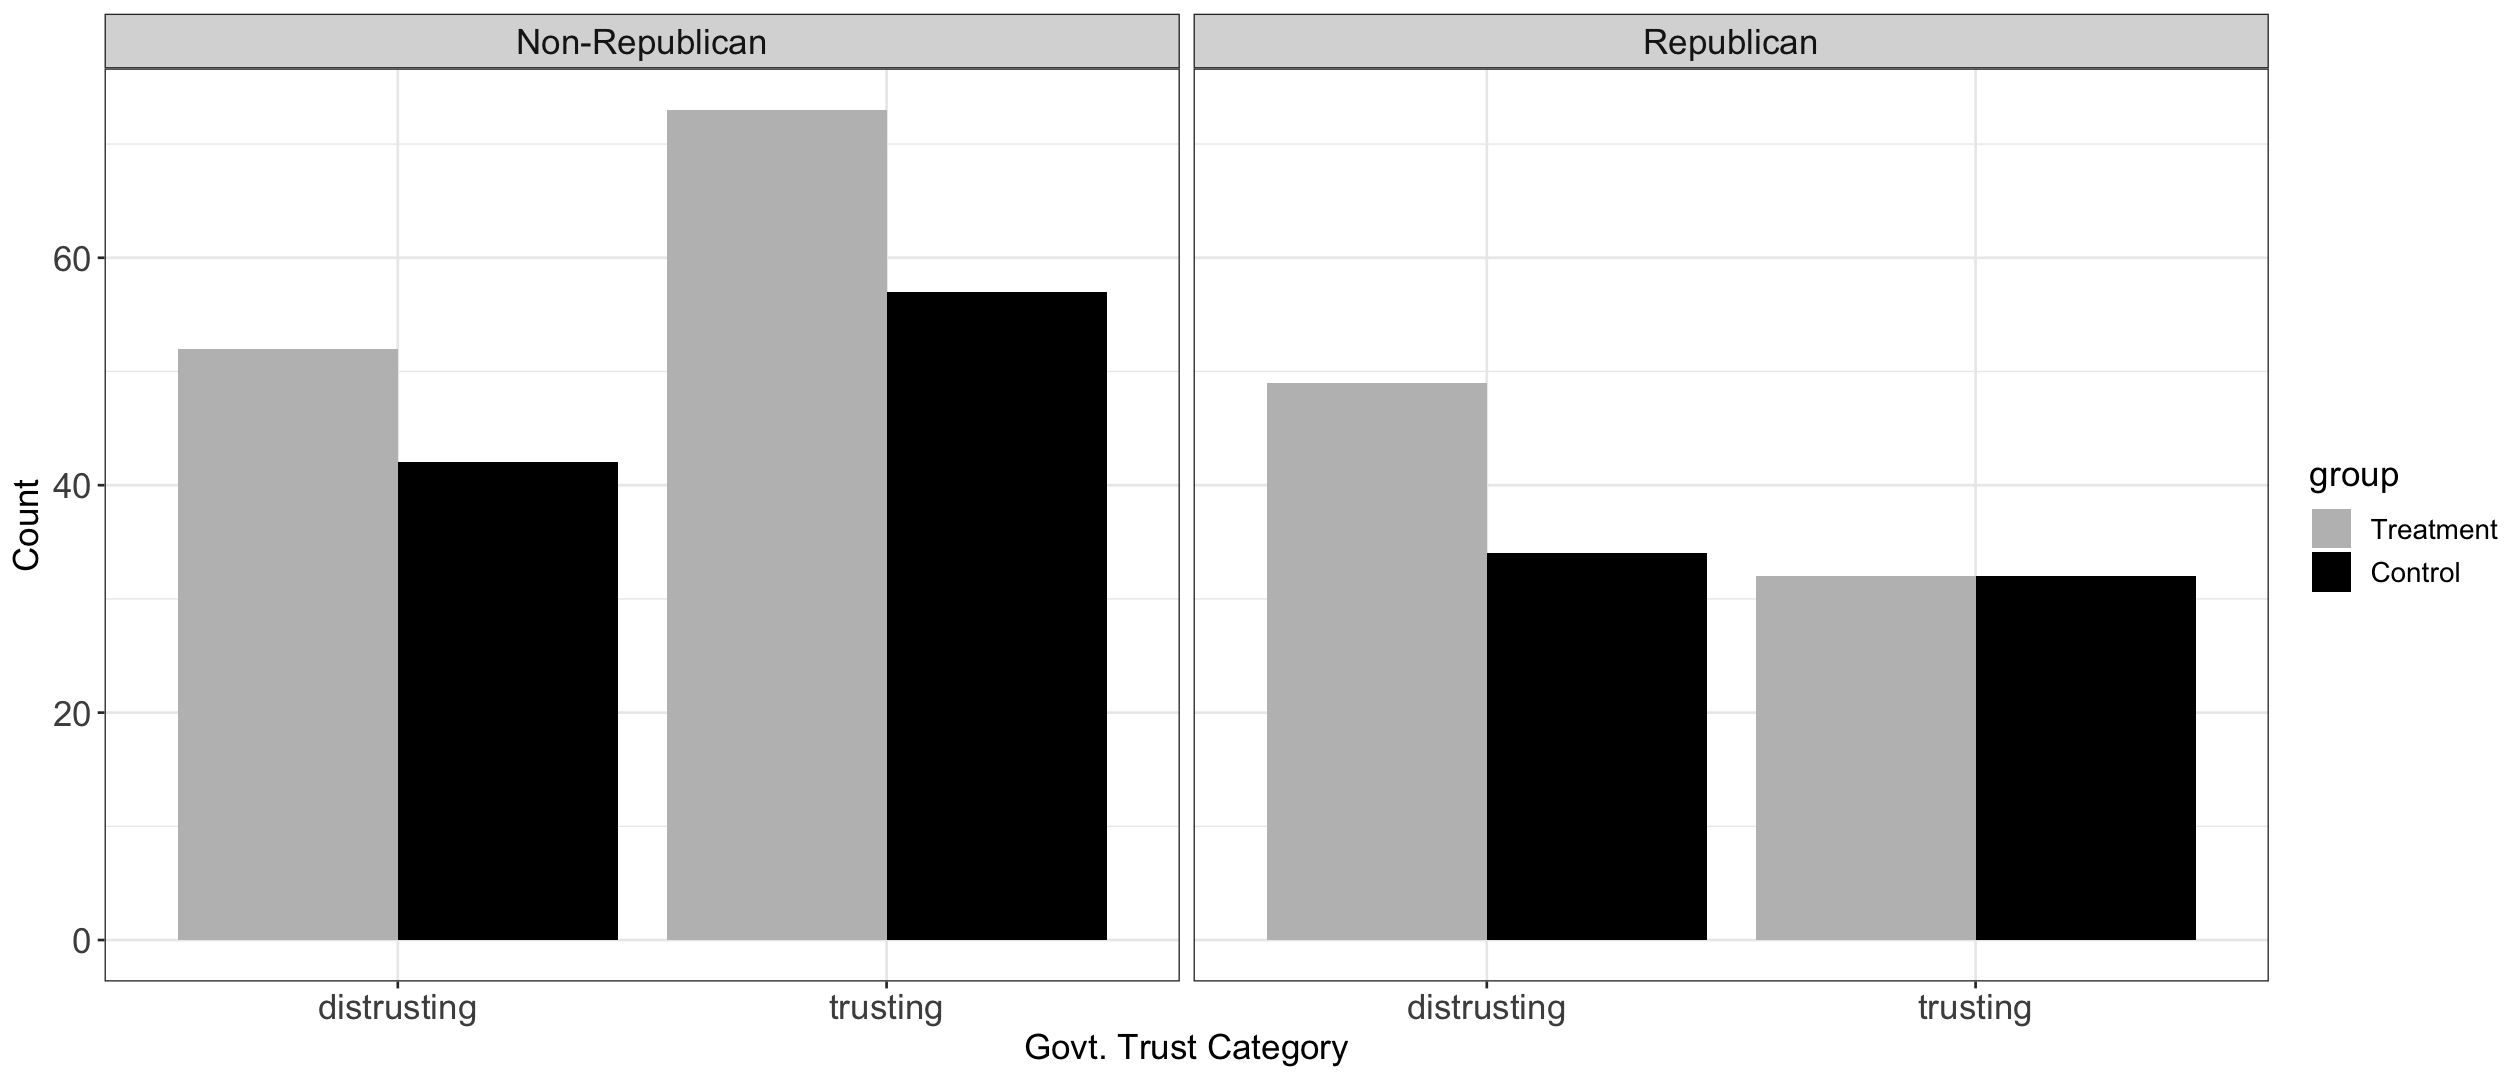

In [97]:
check_gov_trust = vcf_data %>% group_by(group, republican, gov_trust_cat) %>% tally() 
check_gov_trust$republican <- check_gov_trust$republican %>% as.character()
check_gov_trust$republican[check_gov_trust$republican == "rep"] <- "Republican"
check_gov_trust$republican[check_gov_trust$republican == "nonrep"] <- "Non-Republican"

options(repr.plot.width = 14, repr.plot.height = 6, repr.plot.res = 180)
check_gov_trust %>%
  ggplot(aes(x = gov_trust_cat, y=n, fill=group)) +
  geom_bar(stat ='identity', position = position_dodge()) +
  theme_bw() + scale_fill_manual(values = c('gray', 'black')) +
  labs(x = "Govt. Trust Category" , y= "Count") + 
  facet_wrap(~republican, ncol = 2) +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        strip.text.x = element_text(size = 14),
        text = element_text(size = 14)) 

In [98]:
chisq.test(table(vcf_data$gov_trust_cat[vcf_data$republican == "rep"], 
                 vcf_data$group[vcf_data$republican == "rep"]))

ks.test(check_gov_trust$n[(check_gov_trust$group == 'Control') & (check_gov_trust$republican == 'Republican')],
        check_gov_trust$n[(check_gov_trust$group == 'Treatment' )& (check_gov_trust$republican == 'Republican')])

chisq.test(table(vcf_data$gov_trust_cat[vcf_data$republican == "nonrep"], 
                 vcf_data$group[vcf_data$republican == "nonrep"]))

ks.test(check_gov_trust$n[(check_gov_trust$group == 'Control') & (check_gov_trust$republican == 'Non-Republican')],
        check_gov_trust$n[(check_gov_trust$group == 'Treatment' )& (check_gov_trust$republican == 'Non-Republican')])


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$gov_trust_cat[vcf_data$republican == "rep"], vcf_data$group[vcf_data$republican ==     "rep"])
X-squared = 0.85536, df = 1, p-value = 0.355



	Exact two-sample Kolmogorov-Smirnov test

data:  check_gov_trust$n[(check_gov_trust$group == "Control") & (check_gov_trust$republican == "Republican")] and check_gov_trust$n[(check_gov_trust$group == "Treatment") & (check_gov_trust$republican == "Republican")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided



	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$gov_trust_cat[vcf_data$republican == "nonrep"],     vcf_data$group[vcf_data$republican == "nonrep"])
X-squared = 3.0564e-30, df = 1, p-value = 1



	Exact two-sample Kolmogorov-Smirnov test

data:  check_gov_trust$n[(check_gov_trust$group == "Control") & (check_gov_trust$republican == "Non-Republican")] and check_gov_trust$n[(check_gov_trust$group == "Treatment") & (check_gov_trust$republican == "Non-Republican")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided


## Conservatives vs. Non-Conservatives

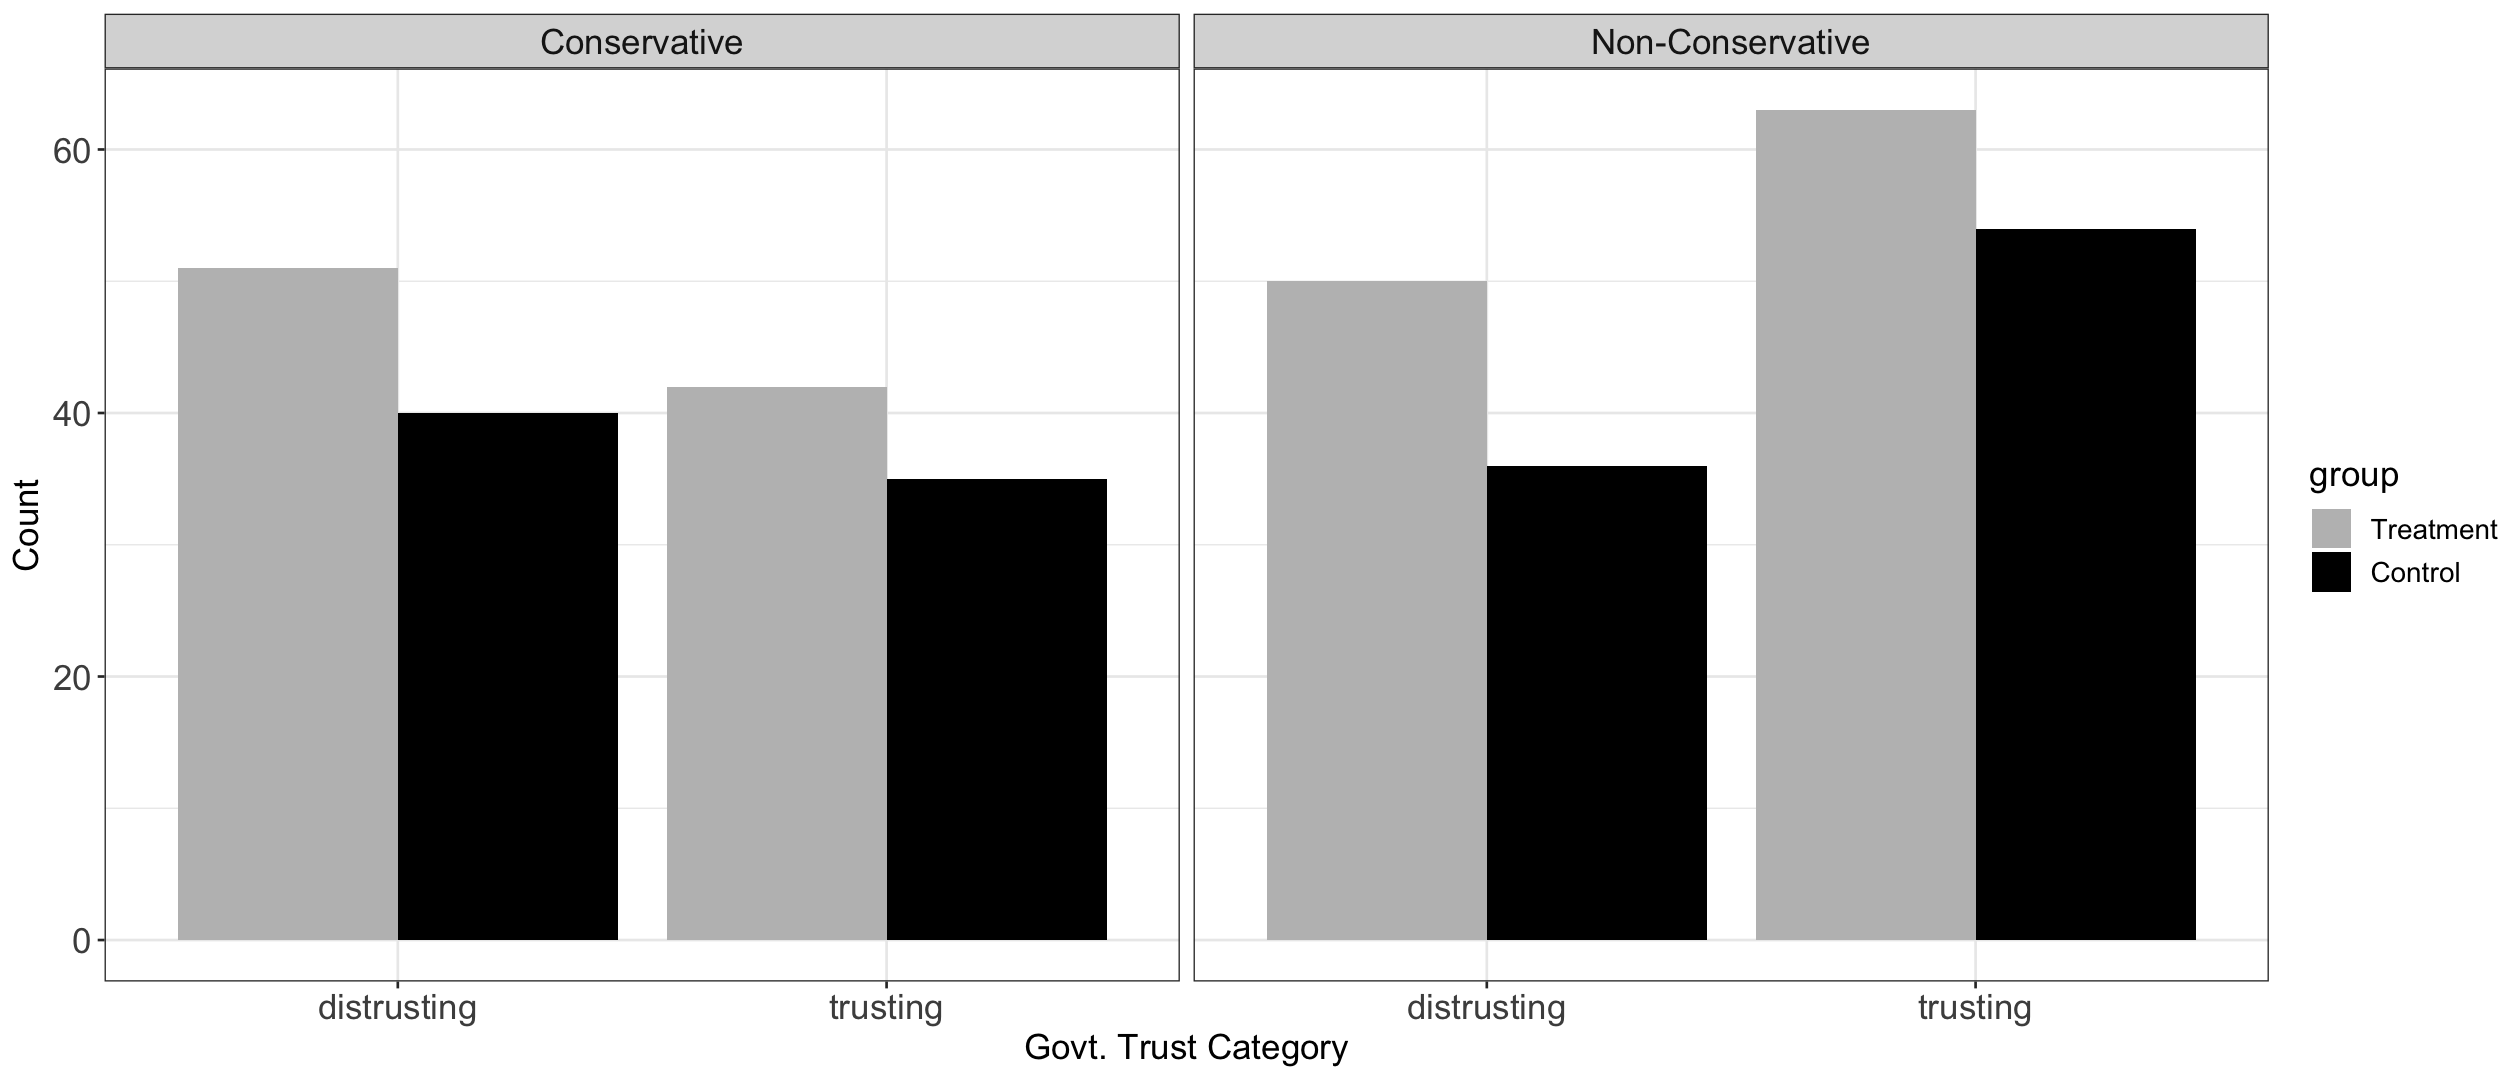

In [99]:
check_gov_trust = vcf_data %>% group_by(group, conservative, gov_trust_cat) %>% tally() 
check_gov_trust$conservative <- check_gov_trust$conservative %>% as.character()
check_gov_trust$conservative[check_gov_trust$conservative == "conserv"] <- "Conservative"
check_gov_trust$conservative[check_gov_trust$conservative == "nonconserv"] <- "Non-Conservative"

options(repr.plot.width = 14, repr.plot.height = 6, repr.plot.res = 180)
check_gov_trust %>%
  ggplot(aes(x = gov_trust_cat, y=n, fill=group)) +
  geom_bar(stat ='identity', position = position_dodge()) +
  theme_bw() + scale_fill_manual(values = c('gray', 'black')) +
  labs(x = "Govt. Trust Category" , y= "Count") + 
  facet_wrap(~conservative, ncol = 2) +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        strip.text.x = element_text(size = 14),
        text = element_text(size = 14)) 

In [100]:
chisq.test(table(vcf_data$gov_trust_cat[vcf_data$conservative == "conserv"], 
                 vcf_data$group[vcf_data$conservative == "conserv"]))

ks.test(check_gov_trust$n[(check_gov_trust$group == 'Control') & (check_gov_trust$conservative == 'Conservative')],
        check_gov_trust$n[(check_gov_trust$group == 'Treatment' )& (check_gov_trust$conservative == 'Conservative')])

chisq.test(table(vcf_data$gov_trust_cat[vcf_data$conservative == "nonconserv"], 
                 vcf_data$group[vcf_data$conservative == "nonconserv"]))

ks.test(check_gov_trust$n[(check_gov_trust$group == 'Control') & (check_gov_trust$conservative == 'Non-Conservative')],
        check_gov_trust$n[(check_gov_trust$group == 'Treatment' )& (check_gov_trust$conservative == 'Non-Conservative')])


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$gov_trust_cat[vcf_data$conservative == "conserv"],     vcf_data$group[vcf_data$conservative == "conserv"])
X-squared = 0.0015159, df = 1, p-value = 0.9689



	Exact two-sample Kolmogorov-Smirnov test

data:  check_gov_trust$n[(check_gov_trust$group == "Control") & (check_gov_trust$conservative == "Conservative")] and check_gov_trust$n[(check_gov_trust$group == "Treatment") & (check_gov_trust$conservative == "Conservative")]
D = 1, p-value = 0.3333
alternative hypothesis: two-sided



	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$gov_trust_cat[vcf_data$conservative == "nonconserv"],     vcf_data$group[vcf_data$conservative == "nonconserv"])
X-squared = 0.21669, df = 1, p-value = 0.6416



	Exact two-sample Kolmogorov-Smirnov test

data:  check_gov_trust$n[(check_gov_trust$group == "Control") & (check_gov_trust$conservative == "Non-Conservative")] and check_gov_trust$n[(check_gov_trust$group == "Treatment") & (check_gov_trust$conservative == "Non-Conservative")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided


## Trusting vs. Distrusting PHIs

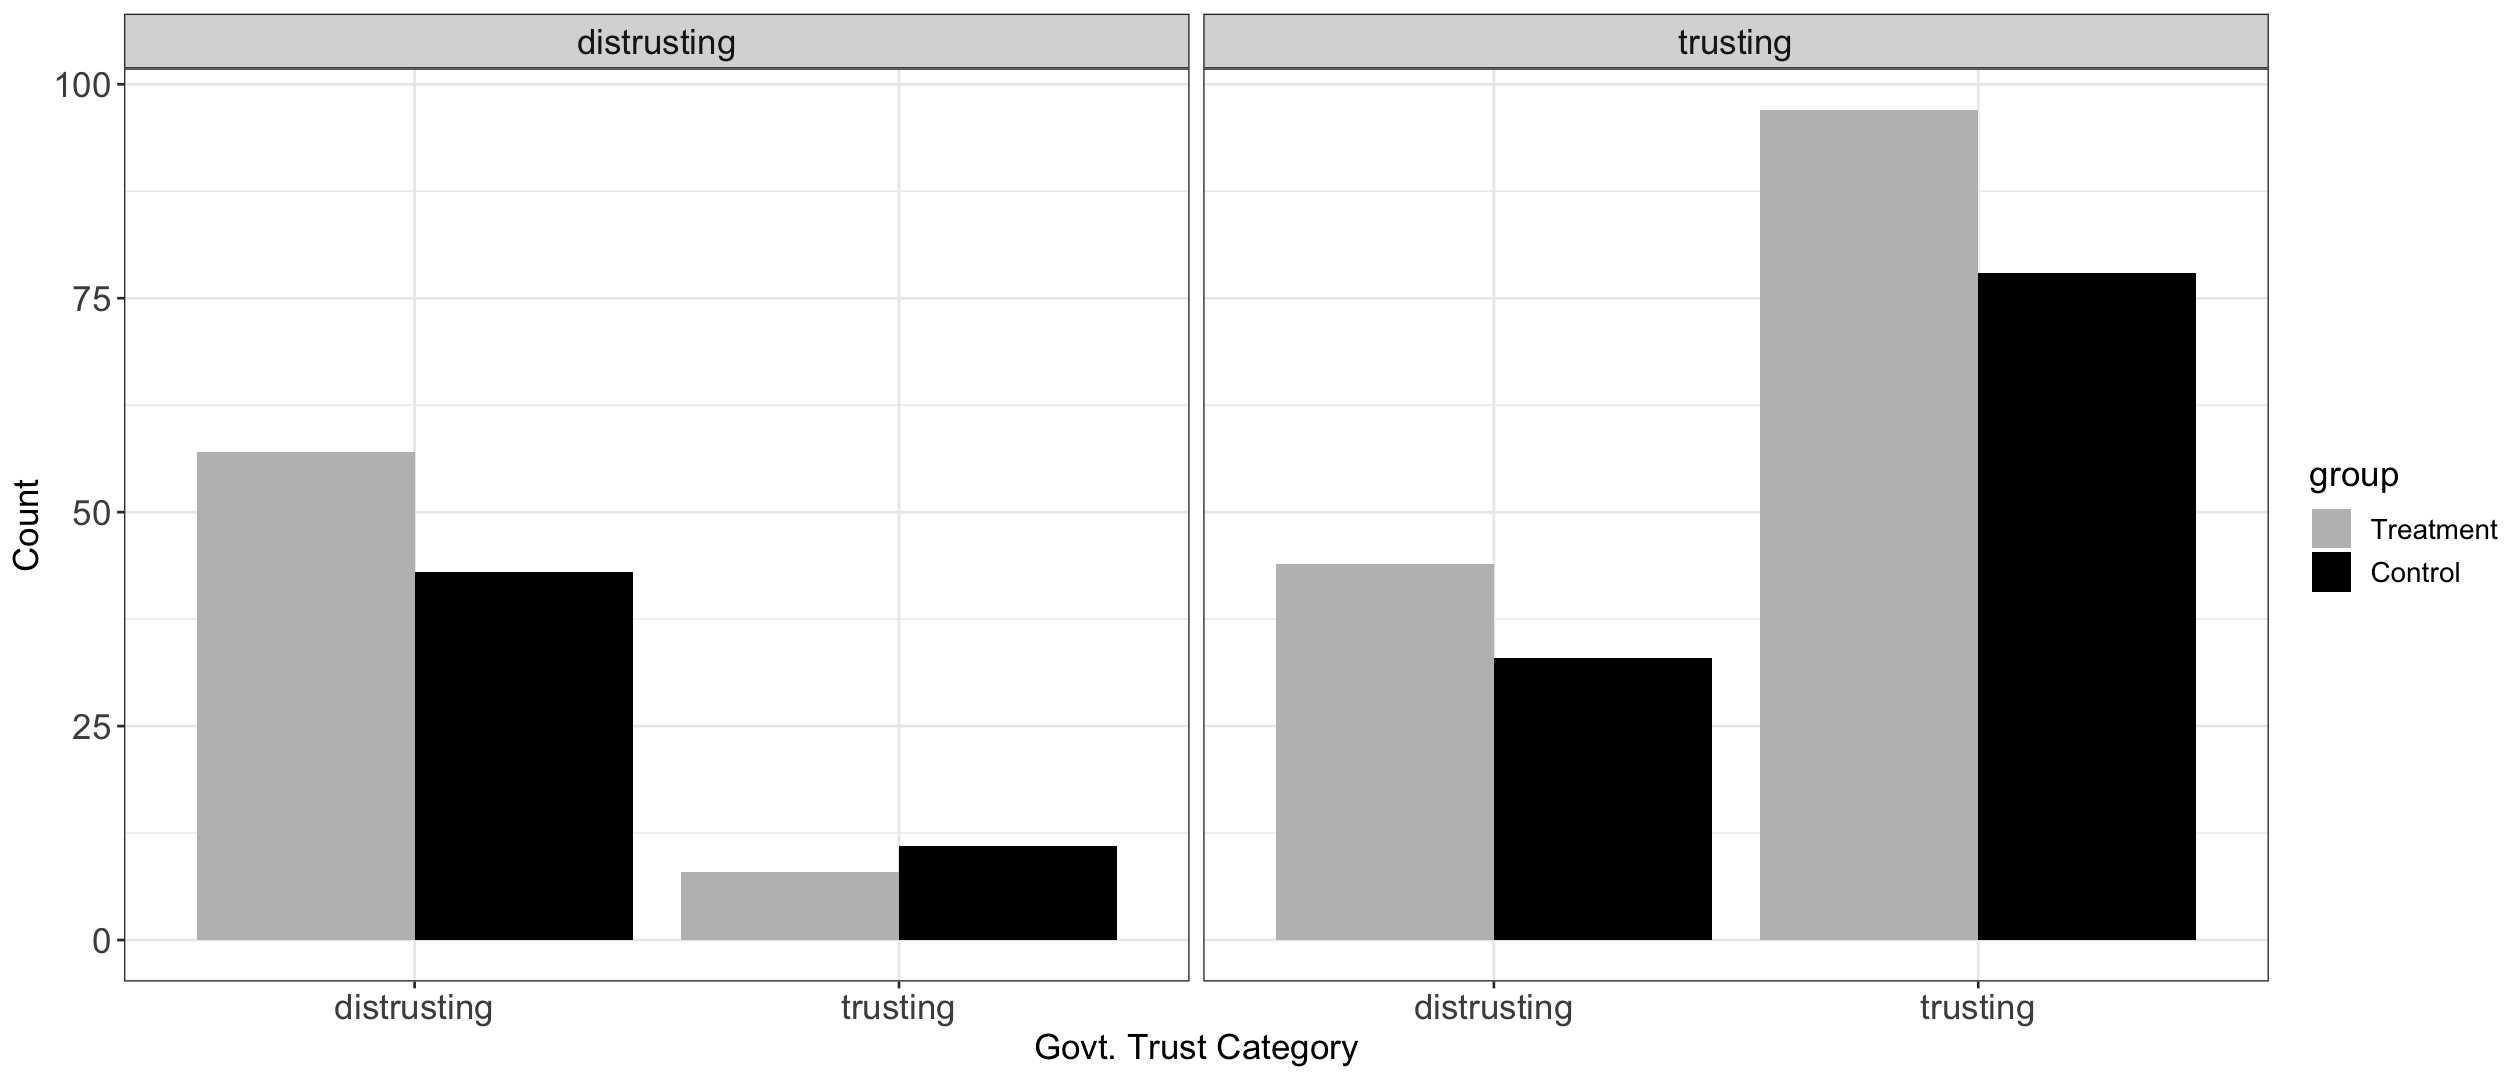

In [101]:
check_gov_trust = vcf_data %>% group_by(group, phi_trust_cat, gov_trust_cat) %>% tally() 

options(repr.plot.width = 14, repr.plot.height = 6, repr.plot.res = 180)
check_gov_trust %>%
  ggplot(aes(x = gov_trust_cat, y=n, fill=group)) +
  geom_bar(stat ='identity', position = position_dodge()) +
  theme_bw() + scale_fill_manual(values = c('gray', 'black')) +
  labs(x = "Govt. Trust Category" , y= "Count") + 
  facet_wrap(~phi_trust_cat, ncol = 2) +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        strip.text.x = element_text(size = 14),
        text = element_text(size = 14)) 

In [102]:
chisq.test(table(vcf_data$gov_trust_cat[vcf_data$phi_trust_cat == "trusting"], 
                 vcf_data$group[vcf_data$phi_trust_cat == "trusting"]))

ks.test(check_gov_trust$n[(check_gov_trust$group == 'Control') & (check_gov_trust$phi_trust_cat == 'trusting')],
        check_gov_trust$n[(check_gov_trust$group == 'Treatment' )& (check_gov_trust$phi_trust_cat == 'trusting')])

chisq.test(table(vcf_data$gov_trust_cat[vcf_data$phi_trust_cat == "distrusting"], 
                 vcf_data$group[vcf_data$phi_trust_cat == "distrusting"]))

ks.test(check_gov_trust$n[(check_gov_trust$group == 'Control') & (check_gov_trust$phi_trust_cat == 'distrusting')],
        check_gov_trust$n[(check_gov_trust$group == 'Treatment' )& (check_gov_trust$phi_trust_cat == 'distrusting')])


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$gov_trust_cat[vcf_data$phi_trust_cat == "trusting"],     vcf_data$group[vcf_data$phi_trust_cat == "trusting"])
X-squared = 0.013174, df = 1, p-value = 0.9086



	Exact two-sample Kolmogorov-Smirnov test

data:  check_gov_trust$n[(check_gov_trust$group == "Control") & (check_gov_trust$phi_trust_cat == "trusting")] and check_gov_trust$n[(check_gov_trust$group == "Treatment") & (check_gov_trust$phi_trust_cat == "trusting")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided



	Pearson's Chi-squared test with Yates' continuity correction

data:  table(vcf_data$gov_trust_cat[vcf_data$phi_trust_cat == "distrusting"],     vcf_data$group[vcf_data$phi_trust_cat == "distrusting"])
X-squared = 0.89134, df = 1, p-value = 0.3451



	Exact two-sample Kolmogorov-Smirnov test

data:  check_gov_trust$n[(check_gov_trust$group == "Control") & (check_gov_trust$phi_trust_cat == "distrusting")] and check_gov_trust$n[(check_gov_trust$group == "Treatment") & (check_gov_trust$phi_trust_cat == "distrusting")]
D = 0.5, p-value = 1
alternative hypothesis: two-sided
